## READING THE DIGIT MNIST FILE AND ADDING IN TO data_dict AS DICTIONARY

In [1]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '../Dataset/DigitMNIST/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            magic = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (magic == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(magic == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==40000):
                set = 'test'
            elif (length==240000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  emnist-digits-test-images-idx3-ubyte
Reading  emnist-digits-test-labels-idx1-ubyte
Reading  emnist-digits-train-images-idx3-ubyte
Reading  emnist-digits-train-labels-idx1-ubyte


## SAVING THE DIGIT IMAGES IN THE TRAIN AND TEST DIRECTORY

In [24]:
import os
from skimage.io import imsave
datapath = '../Dataset/DigitMNIST/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        
        
        #Converting properly for the shape of the image
        
        image=np.rot90(image,3)
        image=np.fliplr(image)
        
        arr=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        copyImage = np.copy(arr)
        copyImage[arr > 127] = 255
        copyImage[arr <= 127] = 0
        
        
        
        if not os.path.exists(datapath+set+'/'+str(label)+'/'):    # IF DIRECTORIES DO NOT EXIST THEN 
            os.makedirs (datapath+set+'/'+str(label)+'/')       # CREATE TRAIN/TEST DIRECTORY AND CLASS SPECIFIC SUBDIRECTORY
        filenumber = len(os.listdir(datapath+set+'/'+str(label)+'/'))  # NUMBER OF FILES IN THE DIRECTORY FOR NAMING THE FILE
        imsave(datapath+set+'/'+str(label)+'/%05d.png'%(filenumber),copyImage)  # SAVE THE IMAGE WITH PROPER NAME

train 0
train 1
train 2
train 3
train 4
train 5
train 6
train 7
train 8
train 9
train 10
train 11
train 12
train 13
train 14
train 15
train 16
train 17
train 18
train 19
train 20
train 21
train 22
train 23
train 24
train 25
train 26
train 27
train 28
train 29
train 30
train 31
train 32
train 33
train 34
train 35
train 36
train 37
train 38
train 39
train 40
train 41
train 42
train 43
train 44
train 45
train 46
train 47
train 48
train 49
train 50
train 51
train 52
train 53
train 54
train 55
train 56
train 57
train 58
train 59
train 60
train 61
train 62
train 63
train 64
train 65
train 66
train 67
train 68
train 69
train 70
train 71
train 72
train 73
train 74
train 75
train 76
train 77
train 78
train 79
train 80
train 81
train 82
train 83
train 84
train 85
train 86
train 87
train 88
train 89
train 90
train 91
train 92
train 93
train 94
train 95
train 96
train 97
train 98
train 99
train 100
train 101
train 102
train 103
train 104
train 105
train 106
train 107
train 108
train 109
train 110


train 870
train 871
train 872
train 873
train 874
train 875
train 876
train 877
train 878
train 879
train 880
train 881
train 882
train 883
train 884
train 885
train 886
train 887
train 888
train 889
train 890
train 891
train 892
train 893
train 894
train 895
train 896
train 897
train 898
train 899
train 900
train 901
train 902
train 903
train 904
train 905
train 906
train 907
train 908
train 909
train 910
train 911
train 912
train 913
train 914
train 915
train 916
train 917
train 918
train 919
train 920
train 921
train 922
train 923
train 924
train 925
train 926
train 927
train 928
train 929
train 930
train 931
train 932
train 933
train 934
train 935
train 936
train 937
train 938
train 939
train 940
train 941
train 942
train 943
train 944
train 945
train 946
train 947
train 948
train 949
train 950
train 951
train 952
train 953
train 954
train 955
train 956
train 957
train 958
train 959
train 960
train 961
train 962
train 963
train 964
train 965
train 966
train 967
train 968
train 969


train 1636
train 1637
train 1638
train 1639
train 1640
train 1641
train 1642
train 1643
train 1644
train 1645
train 1646
train 1647
train 1648
train 1649
train 1650
train 1651
train 1652
train 1653
train 1654
train 1655
train 1656
train 1657
train 1658
train 1659
train 1660
train 1661
train 1662
train 1663
train 1664
train 1665
train 1666
train 1667
train 1668
train 1669
train 1670
train 1671
train 1672
train 1673
train 1674
train 1675
train 1676
train 1677
train 1678
train 1679
train 1680
train 1681
train 1682
train 1683
train 1684
train 1685
train 1686
train 1687
train 1688
train 1689
train 1690
train 1691
train 1692
train 1693
train 1694
train 1695
train 1696
train 1697
train 1698
train 1699
train 1700
train 1701
train 1702
train 1703
train 1704
train 1705
train 1706
train 1707
train 1708
train 1709
train 1710
train 1711
train 1712
train 1713
train 1714
train 1715
train 1716
train 1717
train 1718
train 1719
train 1720
train 1721
train 1722
train 1723
train 1724
train 1725
train 1726

train 2428
train 2429
train 2430
train 2431
train 2432
train 2433
train 2434
train 2435
train 2436
train 2437
train 2438
train 2439
train 2440
train 2441
train 2442
train 2443
train 2444
train 2445
train 2446
train 2447
train 2448
train 2449
train 2450
train 2451
train 2452
train 2453
train 2454
train 2455
train 2456
train 2457
train 2458
train 2459
train 2460
train 2461
train 2462
train 2463
train 2464
train 2465
train 2466
train 2467
train 2468
train 2469
train 2470
train 2471
train 2472
train 2473
train 2474
train 2475
train 2476
train 2477
train 2478
train 2479
train 2480
train 2481
train 2482
train 2483
train 2484
train 2485
train 2486
train 2487
train 2488
train 2489
train 2490
train 2491
train 2492
train 2493
train 2494
train 2495
train 2496
train 2497
train 2498
train 2499
train 2500
train 2501
train 2502
train 2503
train 2504
train 2505
train 2506
train 2507
train 2508
train 2509
train 2510
train 2511
train 2512
train 2513
train 2514
train 2515
train 2516
train 2517
train 2518

train 3195
train 3196
train 3197
train 3198
train 3199
train 3200
train 3201
train 3202
train 3203
train 3204
train 3205
train 3206
train 3207
train 3208
train 3209
train 3210
train 3211
train 3212
train 3213
train 3214
train 3215
train 3216
train 3217
train 3218
train 3219
train 3220
train 3221
train 3222
train 3223
train 3224
train 3225
train 3226
train 3227
train 3228
train 3229
train 3230
train 3231
train 3232
train 3233
train 3234
train 3235
train 3236
train 3237
train 3238
train 3239
train 3240
train 3241
train 3242
train 3243
train 3244
train 3245
train 3246
train 3247
train 3248
train 3249
train 3250
train 3251
train 3252
train 3253
train 3254
train 3255
train 3256
train 3257
train 3258
train 3259
train 3260
train 3261
train 3262
train 3263
train 3264
train 3265
train 3266
train 3267
train 3268
train 3269
train 3270
train 3271
train 3272
train 3273
train 3274
train 3275
train 3276
train 3277
train 3278
train 3279
train 3280
train 3281
train 3282
train 3283
train 3284
train 3285

train 3989
train 3990
train 3991
train 3992
train 3993
train 3994
train 3995
train 3996
train 3997
train 3998
train 3999
train 4000
train 4001
train 4002
train 4003
train 4004
train 4005
train 4006
train 4007
train 4008
train 4009
train 4010
train 4011
train 4012
train 4013
train 4014
train 4015
train 4016
train 4017
train 4018
train 4019
train 4020
train 4021
train 4022
train 4023
train 4024
train 4025
train 4026
train 4027
train 4028
train 4029
train 4030
train 4031
train 4032
train 4033
train 4034
train 4035
train 4036
train 4037
train 4038
train 4039
train 4040
train 4041
train 4042
train 4043
train 4044
train 4045
train 4046
train 4047
train 4048
train 4049
train 4050
train 4051
train 4052
train 4053
train 4054
train 4055
train 4056
train 4057
train 4058
train 4059
train 4060
train 4061
train 4062
train 4063
train 4064
train 4065
train 4066
train 4067
train 4068
train 4069
train 4070
train 4071
train 4072
train 4073
train 4074
train 4075
train 4076
train 4077
train 4078
train 4079

train 4756
train 4757
train 4758
train 4759
train 4760
train 4761
train 4762
train 4763
train 4764
train 4765
train 4766
train 4767
train 4768
train 4769
train 4770
train 4771
train 4772
train 4773
train 4774
train 4775
train 4776
train 4777
train 4778
train 4779
train 4780
train 4781
train 4782
train 4783
train 4784
train 4785
train 4786
train 4787
train 4788
train 4789
train 4790
train 4791
train 4792
train 4793
train 4794
train 4795
train 4796
train 4797
train 4798
train 4799
train 4800
train 4801
train 4802
train 4803
train 4804
train 4805
train 4806
train 4807
train 4808
train 4809
train 4810
train 4811
train 4812
train 4813
train 4814
train 4815
train 4816
train 4817
train 4818
train 4819
train 4820
train 4821
train 4822
train 4823
train 4824
train 4825
train 4826
train 4827
train 4828
train 4829
train 4830
train 4831
train 4832
train 4833
train 4834
train 4835
train 4836
train 4837
train 4838
train 4839
train 4840
train 4841
train 4842
train 4843
train 4844
train 4845
train 4846

train 5521
train 5522
train 5523
train 5524
train 5525
train 5526
train 5527
train 5528
train 5529
train 5530
train 5531
train 5532
train 5533
train 5534
train 5535
train 5536
train 5537
train 5538
train 5539
train 5540
train 5541
train 5542
train 5543
train 5544
train 5545
train 5546
train 5547
train 5548
train 5549
train 5550
train 5551
train 5552
train 5553
train 5554
train 5555
train 5556
train 5557
train 5558
train 5559
train 5560
train 5561
train 5562
train 5563
train 5564
train 5565
train 5566
train 5567
train 5568
train 5569
train 5570
train 5571
train 5572
train 5573
train 5574
train 5575
train 5576
train 5577
train 5578
train 5579
train 5580
train 5581
train 5582
train 5583
train 5584
train 5585
train 5586
train 5587
train 5588
train 5589
train 5590
train 5591
train 5592
train 5593
train 5594
train 5595
train 5596
train 5597
train 5598
train 5599
train 5600
train 5601
train 5602
train 5603
train 5604
train 5605
train 5606
train 5607
train 5608
train 5609
train 5610
train 5611

train 6287
train 6288
train 6289
train 6290
train 6291
train 6292
train 6293
train 6294
train 6295
train 6296
train 6297
train 6298
train 6299
train 6300
train 6301
train 6302
train 6303
train 6304
train 6305
train 6306
train 6307
train 6308
train 6309
train 6310
train 6311
train 6312
train 6313
train 6314
train 6315
train 6316
train 6317
train 6318
train 6319
train 6320
train 6321
train 6322
train 6323
train 6324
train 6325
train 6326
train 6327
train 6328
train 6329
train 6330
train 6331
train 6332
train 6333
train 6334
train 6335
train 6336
train 6337
train 6338
train 6339
train 6340
train 6341
train 6342
train 6343
train 6344
train 6345
train 6346
train 6347
train 6348
train 6349
train 6350
train 6351
train 6352
train 6353
train 6354
train 6355
train 6356
train 6357
train 6358
train 6359
train 6360
train 6361
train 6362
train 6363
train 6364
train 6365
train 6366
train 6367
train 6368
train 6369
train 6370
train 6371
train 6372
train 6373
train 6374
train 6375
train 6376
train 6377

train 7070
train 7071
train 7072
train 7073
train 7074
train 7075
train 7076
train 7077
train 7078
train 7079
train 7080
train 7081
train 7082
train 7083
train 7084
train 7085
train 7086
train 7087
train 7088
train 7089
train 7090
train 7091
train 7092
train 7093
train 7094
train 7095
train 7096
train 7097
train 7098
train 7099
train 7100
train 7101
train 7102
train 7103
train 7104
train 7105
train 7106
train 7107
train 7108
train 7109
train 7110
train 7111
train 7112
train 7113
train 7114
train 7115
train 7116
train 7117
train 7118
train 7119
train 7120
train 7121
train 7122
train 7123
train 7124
train 7125
train 7126
train 7127
train 7128
train 7129
train 7130
train 7131
train 7132
train 7133
train 7134
train 7135
train 7136
train 7137
train 7138
train 7139
train 7140
train 7141
train 7142
train 7143
train 7144
train 7145
train 7146
train 7147
train 7148
train 7149
train 7150
train 7151
train 7152
train 7153
train 7154
train 7155
train 7156
train 7157
train 7158
train 7159
train 7160

train 7829
train 7830
train 7831
train 7832
train 7833
train 7834
train 7835
train 7836
train 7837
train 7838
train 7839
train 7840
train 7841
train 7842
train 7843
train 7844
train 7845
train 7846
train 7847
train 7848
train 7849
train 7850
train 7851
train 7852
train 7853
train 7854
train 7855
train 7856
train 7857
train 7858
train 7859
train 7860
train 7861
train 7862
train 7863
train 7864
train 7865
train 7866
train 7867
train 7868
train 7869
train 7870
train 7871
train 7872
train 7873
train 7874
train 7875
train 7876
train 7877
train 7878
train 7879
train 7880
train 7881
train 7882
train 7883
train 7884
train 7885
train 7886
train 7887
train 7888
train 7889
train 7890
train 7891
train 7892
train 7893
train 7894
train 7895
train 7896
train 7897
train 7898
train 7899
train 7900
train 7901
train 7902
train 7903
train 7904
train 7905
train 7906
train 7907
train 7908
train 7909
train 7910
train 7911
train 7912
train 7913
train 7914
train 7915
train 7916
train 7917
train 7918
train 7919

train 8588
train 8589
train 8590
train 8591
train 8592
train 8593
train 8594
train 8595
train 8596
train 8597
train 8598
train 8599
train 8600
train 8601
train 8602
train 8603
train 8604
train 8605
train 8606
train 8607
train 8608
train 8609
train 8610
train 8611
train 8612
train 8613
train 8614
train 8615
train 8616
train 8617
train 8618
train 8619
train 8620
train 8621
train 8622
train 8623
train 8624
train 8625
train 8626
train 8627
train 8628
train 8629
train 8630
train 8631
train 8632
train 8633
train 8634
train 8635
train 8636
train 8637
train 8638
train 8639
train 8640
train 8641
train 8642
train 8643
train 8644
train 8645
train 8646
train 8647
train 8648
train 8649
train 8650
train 8651
train 8652
train 8653
train 8654
train 8655
train 8656
train 8657
train 8658
train 8659
train 8660
train 8661
train 8662
train 8663
train 8664
train 8665
train 8666
train 8667
train 8668
train 8669
train 8670
train 8671
train 8672
train 8673
train 8674
train 8675
train 8676
train 8677
train 8678

train 9348
train 9349
train 9350
train 9351
train 9352
train 9353
train 9354
train 9355
train 9356
train 9357
train 9358
train 9359
train 9360
train 9361
train 9362
train 9363
train 9364
train 9365
train 9366
train 9367
train 9368
train 9369
train 9370
train 9371
train 9372
train 9373
train 9374
train 9375
train 9376
train 9377
train 9378
train 9379
train 9380
train 9381
train 9382
train 9383
train 9384
train 9385
train 9386
train 9387
train 9388
train 9389
train 9390
train 9391
train 9392
train 9393
train 9394
train 9395
train 9396
train 9397
train 9398
train 9399
train 9400
train 9401
train 9402
train 9403
train 9404
train 9405
train 9406
train 9407
train 9408
train 9409
train 9410
train 9411
train 9412
train 9413
train 9414
train 9415
train 9416
train 9417
train 9418
train 9419
train 9420
train 9421
train 9422
train 9423
train 9424
train 9425
train 9426
train 9427
train 9428
train 9429
train 9430
train 9431
train 9432
train 9433
train 9434
train 9435
train 9436
train 9437
train 9438

train 10101
train 10102
train 10103
train 10104
train 10105
train 10106
train 10107
train 10108
train 10109
train 10110
train 10111
train 10112
train 10113
train 10114
train 10115
train 10116
train 10117
train 10118
train 10119
train 10120
train 10121
train 10122
train 10123
train 10124
train 10125
train 10126
train 10127
train 10128
train 10129
train 10130
train 10131
train 10132
train 10133
train 10134
train 10135
train 10136
train 10137
train 10138
train 10139
train 10140
train 10141
train 10142
train 10143
train 10144
train 10145
train 10146
train 10147
train 10148
train 10149
train 10150
train 10151
train 10152
train 10153
train 10154
train 10155
train 10156
train 10157
train 10158
train 10159
train 10160
train 10161
train 10162
train 10163
train 10164
train 10165
train 10166
train 10167
train 10168
train 10169
train 10170
train 10171
train 10172
train 10173
train 10174
train 10175
train 10176
train 10177
train 10178
train 10179
train 10180
train 10181
train 10182
train 10183
trai

train 10835
train 10836
train 10837
train 10838
train 10839
train 10840
train 10841
train 10842
train 10843
train 10844
train 10845
train 10846
train 10847
train 10848
train 10849
train 10850
train 10851
train 10852
train 10853
train 10854
train 10855
train 10856
train 10857
train 10858
train 10859
train 10860
train 10861
train 10862
train 10863
train 10864
train 10865
train 10866
train 10867
train 10868
train 10869
train 10870
train 10871
train 10872
train 10873
train 10874
train 10875
train 10876
train 10877
train 10878
train 10879
train 10880
train 10881
train 10882
train 10883
train 10884
train 10885
train 10886
train 10887
train 10888
train 10889
train 10890
train 10891
train 10892
train 10893
train 10894
train 10895
train 10896
train 10897
train 10898
train 10899
train 10900
train 10901
train 10902
train 10903
train 10904
train 10905
train 10906
train 10907
train 10908
train 10909
train 10910
train 10911
train 10912
train 10913
train 10914
train 10915
train 10916
train 10917
trai

train 11564
train 11565
train 11566
train 11567
train 11568
train 11569
train 11570
train 11571
train 11572
train 11573
train 11574
train 11575
train 11576
train 11577
train 11578
train 11579
train 11580
train 11581
train 11582
train 11583
train 11584
train 11585
train 11586
train 11587
train 11588
train 11589
train 11590
train 11591
train 11592
train 11593
train 11594
train 11595
train 11596
train 11597
train 11598
train 11599
train 11600
train 11601
train 11602
train 11603
train 11604
train 11605
train 11606
train 11607
train 11608
train 11609
train 11610
train 11611
train 11612
train 11613
train 11614
train 11615
train 11616
train 11617
train 11618
train 11619
train 11620
train 11621
train 11622
train 11623
train 11624
train 11625
train 11626
train 11627
train 11628
train 11629
train 11630
train 11631
train 11632
train 11633
train 11634
train 11635
train 11636
train 11637
train 11638
train 11639
train 11640
train 11641
train 11642
train 11643
train 11644
train 11645
train 11646
trai

train 12251
train 12252
train 12253
train 12254
train 12255
train 12256
train 12257
train 12258
train 12259
train 12260
train 12261
train 12262
train 12263
train 12264
train 12265
train 12266
train 12267
train 12268
train 12269
train 12270
train 12271
train 12272
train 12273
train 12274
train 12275
train 12276
train 12277
train 12278
train 12279
train 12280
train 12281
train 12282
train 12283
train 12284
train 12285
train 12286
train 12287
train 12288
train 12289
train 12290
train 12291
train 12292
train 12293
train 12294
train 12295
train 12296
train 12297
train 12298
train 12299
train 12300
train 12301
train 12302
train 12303
train 12304
train 12305
train 12306
train 12307
train 12308
train 12309
train 12310
train 12311
train 12312
train 12313
train 12314
train 12315
train 12316
train 12317
train 12318
train 12319
train 12320
train 12321
train 12322
train 12323
train 12324
train 12325
train 12326
train 12327
train 12328
train 12329
train 12330
train 12331
train 12332
train 12333
trai

train 12941
train 12942
train 12943
train 12944
train 12945
train 12946
train 12947
train 12948
train 12949
train 12950
train 12951
train 12952
train 12953
train 12954
train 12955
train 12956
train 12957
train 12958
train 12959
train 12960
train 12961
train 12962
train 12963
train 12964
train 12965
train 12966
train 12967
train 12968
train 12969
train 12970
train 12971
train 12972
train 12973
train 12974
train 12975
train 12976
train 12977
train 12978
train 12979
train 12980
train 12981
train 12982
train 12983
train 12984
train 12985
train 12986
train 12987
train 12988
train 12989
train 12990
train 12991
train 12992
train 12993
train 12994
train 12995
train 12996
train 12997
train 12998
train 12999
train 13000
train 13001
train 13002
train 13003
train 13004
train 13005
train 13006
train 13007
train 13008
train 13009
train 13010
train 13011
train 13012
train 13013
train 13014
train 13015
train 13016
train 13017
train 13018
train 13019
train 13020
train 13021
train 13022
train 13023
trai

train 13642
train 13643
train 13644
train 13645
train 13646
train 13647
train 13648
train 13649
train 13650
train 13651
train 13652
train 13653
train 13654
train 13655
train 13656
train 13657
train 13658
train 13659
train 13660
train 13661
train 13662
train 13663
train 13664
train 13665
train 13666
train 13667
train 13668
train 13669
train 13670
train 13671
train 13672
train 13673
train 13674
train 13675
train 13676
train 13677
train 13678
train 13679
train 13680
train 13681
train 13682
train 13683
train 13684
train 13685
train 13686
train 13687
train 13688
train 13689
train 13690
train 13691
train 13692
train 13693
train 13694
train 13695
train 13696
train 13697
train 13698
train 13699
train 13700
train 13701
train 13702
train 13703
train 13704
train 13705
train 13706
train 13707
train 13708
train 13709
train 13710
train 13711
train 13712
train 13713
train 13714
train 13715
train 13716
train 13717
train 13718
train 13719
train 13720
train 13721
train 13722
train 13723
train 13724
trai

train 14352
train 14353
train 14354
train 14355
train 14356
train 14357
train 14358
train 14359
train 14360
train 14361
train 14362
train 14363
train 14364
train 14365
train 14366
train 14367
train 14368
train 14369
train 14370
train 14371
train 14372
train 14373
train 14374
train 14375
train 14376
train 14377
train 14378
train 14379
train 14380
train 14381
train 14382
train 14383
train 14384
train 14385
train 14386
train 14387
train 14388
train 14389
train 14390
train 14391
train 14392
train 14393
train 14394
train 14395
train 14396
train 14397
train 14398
train 14399
train 14400
train 14401
train 14402
train 14403
train 14404
train 14405
train 14406
train 14407
train 14408
train 14409
train 14410
train 14411
train 14412
train 14413
train 14414
train 14415
train 14416
train 14417
train 14418
train 14419
train 14420
train 14421
train 14422
train 14423
train 14424
train 14425
train 14426
train 14427
train 14428
train 14429
train 14430
train 14431
train 14432
train 14433
train 14434
trai

train 15053
train 15054
train 15055
train 15056
train 15057
train 15058
train 15059
train 15060
train 15061
train 15062
train 15063
train 15064
train 15065
train 15066
train 15067
train 15068
train 15069
train 15070
train 15071
train 15072
train 15073
train 15074
train 15075
train 15076
train 15077
train 15078
train 15079
train 15080
train 15081
train 15082
train 15083
train 15084
train 15085
train 15086
train 15087
train 15088
train 15089
train 15090
train 15091
train 15092
train 15093
train 15094
train 15095
train 15096
train 15097
train 15098
train 15099
train 15100
train 15101
train 15102
train 15103
train 15104
train 15105
train 15106
train 15107
train 15108
train 15109
train 15110
train 15111
train 15112
train 15113
train 15114
train 15115
train 15116
train 15117
train 15118
train 15119
train 15120
train 15121
train 15122
train 15123
train 15124
train 15125
train 15126
train 15127
train 15128
train 15129
train 15130
train 15131
train 15132
train 15133
train 15134
train 15135
trai

train 15779
train 15780
train 15781
train 15782
train 15783
train 15784
train 15785
train 15786
train 15787
train 15788
train 15789
train 15790
train 15791
train 15792
train 15793
train 15794
train 15795
train 15796
train 15797
train 15798
train 15799
train 15800
train 15801
train 15802
train 15803
train 15804
train 15805
train 15806
train 15807
train 15808
train 15809
train 15810
train 15811
train 15812
train 15813
train 15814
train 15815
train 15816
train 15817
train 15818
train 15819
train 15820
train 15821
train 15822
train 15823
train 15824
train 15825
train 15826
train 15827
train 15828
train 15829
train 15830
train 15831
train 15832
train 15833
train 15834
train 15835
train 15836
train 15837
train 15838
train 15839
train 15840
train 15841
train 15842
train 15843
train 15844
train 15845
train 15846
train 15847
train 15848
train 15849
train 15850
train 15851
train 15852
train 15853
train 15854
train 15855
train 15856
train 15857
train 15858
train 15859
train 15860
train 15861
trai

train 16466
train 16467
train 16468
train 16469
train 16470
train 16471
train 16472
train 16473
train 16474
train 16475
train 16476
train 16477
train 16478
train 16479
train 16480
train 16481
train 16482
train 16483
train 16484
train 16485
train 16486
train 16487
train 16488
train 16489
train 16490
train 16491
train 16492
train 16493
train 16494
train 16495
train 16496
train 16497
train 16498
train 16499
train 16500
train 16501
train 16502
train 16503
train 16504
train 16505
train 16506
train 16507
train 16508
train 16509
train 16510
train 16511
train 16512
train 16513
train 16514
train 16515
train 16516
train 16517
train 16518
train 16519
train 16520
train 16521
train 16522
train 16523
train 16524
train 16525
train 16526
train 16527
train 16528
train 16529
train 16530
train 16531
train 16532
train 16533
train 16534
train 16535
train 16536
train 16537
train 16538
train 16539
train 16540
train 16541
train 16542
train 16543
train 16544
train 16545
train 16546
train 16547
train 16548
trai

train 17184
train 17185
train 17186
train 17187
train 17188
train 17189
train 17190
train 17191
train 17192
train 17193
train 17194
train 17195
train 17196
train 17197
train 17198
train 17199
train 17200
train 17201
train 17202
train 17203
train 17204
train 17205
train 17206
train 17207
train 17208
train 17209
train 17210
train 17211
train 17212
train 17213
train 17214
train 17215
train 17216
train 17217
train 17218
train 17219
train 17220
train 17221
train 17222
train 17223
train 17224
train 17225
train 17226
train 17227
train 17228
train 17229
train 17230
train 17231
train 17232
train 17233
train 17234
train 17235
train 17236
train 17237
train 17238
train 17239
train 17240
train 17241
train 17242
train 17243
train 17244
train 17245
train 17246
train 17247
train 17248
train 17249
train 17250
train 17251
train 17252
train 17253
train 17254
train 17255
train 17256
train 17257
train 17258
train 17259
train 17260
train 17261
train 17262
train 17263
train 17264
train 17265
train 17266
trai

train 17889
train 17890
train 17891
train 17892
train 17893
train 17894
train 17895
train 17896
train 17897
train 17898
train 17899
train 17900
train 17901
train 17902
train 17903
train 17904
train 17905
train 17906
train 17907
train 17908
train 17909
train 17910
train 17911
train 17912
train 17913
train 17914
train 17915
train 17916
train 17917
train 17918
train 17919
train 17920
train 17921
train 17922
train 17923
train 17924
train 17925
train 17926
train 17927
train 17928
train 17929
train 17930
train 17931
train 17932
train 17933
train 17934
train 17935
train 17936
train 17937
train 17938
train 17939
train 17940
train 17941
train 17942
train 17943
train 17944
train 17945
train 17946
train 17947
train 17948
train 17949
train 17950
train 17951
train 17952
train 17953
train 17954
train 17955
train 17956
train 17957
train 17958
train 17959
train 17960
train 17961
train 17962
train 17963
train 17964
train 17965
train 17966
train 17967
train 17968
train 17969
train 17970
train 17971
trai

train 18610
train 18611
train 18612
train 18613
train 18614
train 18615
train 18616
train 18617
train 18618
train 18619
train 18620
train 18621
train 18622
train 18623
train 18624
train 18625
train 18626
train 18627
train 18628
train 18629
train 18630
train 18631
train 18632
train 18633
train 18634
train 18635
train 18636
train 18637
train 18638
train 18639
train 18640
train 18641
train 18642
train 18643
train 18644
train 18645
train 18646
train 18647
train 18648
train 18649
train 18650
train 18651
train 18652
train 18653
train 18654
train 18655
train 18656
train 18657
train 18658
train 18659
train 18660
train 18661
train 18662
train 18663
train 18664
train 18665
train 18666
train 18667
train 18668
train 18669
train 18670
train 18671
train 18672
train 18673
train 18674
train 18675
train 18676
train 18677
train 18678
train 18679
train 18680
train 18681
train 18682
train 18683
train 18684
train 18685
train 18686
train 18687
train 18688
train 18689
train 18690
train 18691
train 18692
trai

train 19310
train 19311
train 19312
train 19313
train 19314
train 19315
train 19316
train 19317
train 19318
train 19319
train 19320
train 19321
train 19322
train 19323
train 19324
train 19325
train 19326
train 19327
train 19328
train 19329
train 19330
train 19331
train 19332
train 19333
train 19334
train 19335
train 19336
train 19337
train 19338
train 19339
train 19340
train 19341
train 19342
train 19343
train 19344
train 19345
train 19346
train 19347
train 19348
train 19349
train 19350
train 19351
train 19352
train 19353
train 19354
train 19355
train 19356
train 19357
train 19358
train 19359
train 19360
train 19361
train 19362
train 19363
train 19364
train 19365
train 19366
train 19367
train 19368
train 19369
train 19370
train 19371
train 19372
train 19373
train 19374
train 19375
train 19376
train 19377
train 19378
train 19379
train 19380
train 19381
train 19382
train 19383
train 19384
train 19385
train 19386
train 19387
train 19388
train 19389
train 19390
train 19391
train 19392
trai

train 20010
train 20011
train 20012
train 20013
train 20014
train 20015
train 20016
train 20017
train 20018
train 20019
train 20020
train 20021
train 20022
train 20023
train 20024
train 20025
train 20026
train 20027
train 20028
train 20029
train 20030
train 20031
train 20032
train 20033
train 20034
train 20035
train 20036
train 20037
train 20038
train 20039
train 20040
train 20041
train 20042
train 20043
train 20044
train 20045
train 20046
train 20047
train 20048
train 20049
train 20050
train 20051
train 20052
train 20053
train 20054
train 20055
train 20056
train 20057
train 20058
train 20059
train 20060
train 20061
train 20062
train 20063
train 20064
train 20065
train 20066
train 20067
train 20068
train 20069
train 20070
train 20071
train 20072
train 20073
train 20074
train 20075
train 20076
train 20077
train 20078
train 20079
train 20080
train 20081
train 20082
train 20083
train 20084
train 20085
train 20086
train 20087
train 20088
train 20089
train 20090
train 20091
train 20092
trai

train 20731
train 20732
train 20733
train 20734
train 20735
train 20736
train 20737
train 20738
train 20739
train 20740
train 20741
train 20742
train 20743
train 20744
train 20745
train 20746
train 20747
train 20748
train 20749
train 20750
train 20751
train 20752
train 20753
train 20754
train 20755
train 20756
train 20757
train 20758
train 20759
train 20760
train 20761
train 20762
train 20763
train 20764
train 20765
train 20766
train 20767
train 20768
train 20769
train 20770
train 20771
train 20772
train 20773
train 20774
train 20775
train 20776
train 20777
train 20778
train 20779
train 20780
train 20781
train 20782
train 20783
train 20784
train 20785
train 20786
train 20787
train 20788
train 20789
train 20790
train 20791
train 20792
train 20793
train 20794
train 20795
train 20796
train 20797
train 20798
train 20799
train 20800
train 20801
train 20802
train 20803
train 20804
train 20805
train 20806
train 20807
train 20808
train 20809
train 20810
train 20811
train 20812
train 20813
trai

train 21456
train 21457
train 21458
train 21459
train 21460
train 21461
train 21462
train 21463
train 21464
train 21465
train 21466
train 21467
train 21468
train 21469
train 21470
train 21471
train 21472
train 21473
train 21474
train 21475
train 21476
train 21477
train 21478
train 21479
train 21480
train 21481
train 21482
train 21483
train 21484
train 21485
train 21486
train 21487
train 21488
train 21489
train 21490
train 21491
train 21492
train 21493
train 21494
train 21495
train 21496
train 21497
train 21498
train 21499
train 21500
train 21501
train 21502
train 21503
train 21504
train 21505
train 21506
train 21507
train 21508
train 21509
train 21510
train 21511
train 21512
train 21513
train 21514
train 21515
train 21516
train 21517
train 21518
train 21519
train 21520
train 21521
train 21522
train 21523
train 21524
train 21525
train 21526
train 21527
train 21528
train 21529
train 21530
train 21531
train 21532
train 21533
train 21534
train 21535
train 21536
train 21537
train 21538
trai

train 22180
train 22181
train 22182
train 22183
train 22184
train 22185
train 22186
train 22187
train 22188
train 22189
train 22190
train 22191
train 22192
train 22193
train 22194
train 22195
train 22196
train 22197
train 22198
train 22199
train 22200
train 22201
train 22202
train 22203
train 22204
train 22205
train 22206
train 22207
train 22208
train 22209
train 22210
train 22211
train 22212
train 22213
train 22214
train 22215
train 22216
train 22217
train 22218
train 22219
train 22220
train 22221
train 22222
train 22223
train 22224
train 22225
train 22226
train 22227
train 22228
train 22229
train 22230
train 22231
train 22232
train 22233
train 22234
train 22235
train 22236
train 22237
train 22238
train 22239
train 22240
train 22241
train 22242
train 22243
train 22244
train 22245
train 22246
train 22247
train 22248
train 22249
train 22250
train 22251
train 22252
train 22253
train 22254
train 22255
train 22256
train 22257
train 22258
train 22259
train 22260
train 22261
train 22262
trai

train 22890
train 22891
train 22892
train 22893
train 22894
train 22895
train 22896
train 22897
train 22898
train 22899
train 22900
train 22901
train 22902
train 22903
train 22904
train 22905
train 22906
train 22907
train 22908
train 22909
train 22910
train 22911
train 22912
train 22913
train 22914
train 22915
train 22916
train 22917
train 22918
train 22919
train 22920
train 22921
train 22922
train 22923
train 22924
train 22925
train 22926
train 22927
train 22928
train 22929
train 22930
train 22931
train 22932
train 22933
train 22934
train 22935
train 22936
train 22937
train 22938
train 22939
train 22940
train 22941
train 22942
train 22943
train 22944
train 22945
train 22946
train 22947
train 22948
train 22949
train 22950
train 22951
train 22952
train 22953
train 22954
train 22955
train 22956
train 22957
train 22958
train 22959
train 22960
train 22961
train 22962
train 22963
train 22964
train 22965
train 22966
train 22967
train 22968
train 22969
train 22970
train 22971
train 22972
trai

train 23592
train 23593
train 23594
train 23595
train 23596
train 23597
train 23598
train 23599
train 23600
train 23601
train 23602
train 23603
train 23604
train 23605
train 23606
train 23607
train 23608
train 23609
train 23610
train 23611
train 23612
train 23613
train 23614
train 23615
train 23616
train 23617
train 23618
train 23619
train 23620
train 23621
train 23622
train 23623
train 23624
train 23625
train 23626
train 23627
train 23628
train 23629
train 23630
train 23631
train 23632
train 23633
train 23634
train 23635
train 23636
train 23637
train 23638
train 23639
train 23640
train 23641
train 23642
train 23643
train 23644
train 23645
train 23646
train 23647
train 23648
train 23649
train 23650
train 23651
train 23652
train 23653
train 23654
train 23655
train 23656
train 23657
train 23658
train 23659
train 23660
train 23661
train 23662
train 23663
train 23664
train 23665
train 23666
train 23667
train 23668
train 23669
train 23670
train 23671
train 23672
train 23673
train 23674
trai

train 24313
train 24314
train 24315
train 24316
train 24317
train 24318
train 24319
train 24320
train 24321
train 24322
train 24323
train 24324
train 24325
train 24326
train 24327
train 24328
train 24329
train 24330
train 24331
train 24332
train 24333
train 24334
train 24335
train 24336
train 24337
train 24338
train 24339
train 24340
train 24341
train 24342
train 24343
train 24344
train 24345
train 24346
train 24347
train 24348
train 24349
train 24350
train 24351
train 24352
train 24353
train 24354
train 24355
train 24356
train 24357
train 24358
train 24359
train 24360
train 24361
train 24362
train 24363
train 24364
train 24365
train 24366
train 24367
train 24368
train 24369
train 24370
train 24371
train 24372
train 24373
train 24374
train 24375
train 24376
train 24377
train 24378
train 24379
train 24380
train 24381
train 24382
train 24383
train 24384
train 24385
train 24386
train 24387
train 24388
train 24389
train 24390
train 24391
train 24392
train 24393
train 24394
train 24395
trai

train 25027
train 25028
train 25029
train 25030
train 25031
train 25032
train 25033
train 25034
train 25035
train 25036
train 25037
train 25038
train 25039
train 25040
train 25041
train 25042
train 25043
train 25044
train 25045
train 25046
train 25047
train 25048
train 25049
train 25050
train 25051
train 25052
train 25053
train 25054
train 25055
train 25056
train 25057
train 25058
train 25059
train 25060
train 25061
train 25062
train 25063
train 25064
train 25065
train 25066
train 25067
train 25068
train 25069
train 25070
train 25071
train 25072
train 25073
train 25074
train 25075
train 25076
train 25077
train 25078
train 25079
train 25080
train 25081
train 25082
train 25083
train 25084
train 25085
train 25086
train 25087
train 25088
train 25089
train 25090
train 25091
train 25092
train 25093
train 25094
train 25095
train 25096
train 25097
train 25098
train 25099
train 25100
train 25101
train 25102
train 25103
train 25104
train 25105
train 25106
train 25107
train 25108
train 25109
trai

train 25747
train 25748
train 25749
train 25750
train 25751
train 25752
train 25753
train 25754
train 25755
train 25756
train 25757
train 25758
train 25759
train 25760
train 25761
train 25762
train 25763
train 25764
train 25765
train 25766
train 25767
train 25768
train 25769
train 25770
train 25771
train 25772
train 25773
train 25774
train 25775
train 25776
train 25777
train 25778
train 25779
train 25780
train 25781
train 25782
train 25783
train 25784
train 25785
train 25786
train 25787
train 25788
train 25789
train 25790
train 25791
train 25792
train 25793
train 25794
train 25795
train 25796
train 25797
train 25798
train 25799
train 25800
train 25801
train 25802
train 25803
train 25804
train 25805
train 25806
train 25807
train 25808
train 25809
train 25810
train 25811
train 25812
train 25813
train 25814
train 25815
train 25816
train 25817
train 25818
train 25819
train 25820
train 25821
train 25822
train 25823
train 25824
train 25825
train 25826
train 25827
train 25828
train 25829
trai

train 26450
train 26451
train 26452
train 26453
train 26454
train 26455
train 26456
train 26457
train 26458
train 26459
train 26460
train 26461
train 26462
train 26463
train 26464
train 26465
train 26466
train 26467
train 26468
train 26469
train 26470
train 26471
train 26472
train 26473
train 26474
train 26475
train 26476
train 26477
train 26478
train 26479
train 26480
train 26481
train 26482
train 26483
train 26484
train 26485
train 26486
train 26487
train 26488
train 26489
train 26490
train 26491
train 26492
train 26493
train 26494
train 26495
train 26496
train 26497
train 26498
train 26499
train 26500
train 26501
train 26502
train 26503
train 26504
train 26505
train 26506
train 26507
train 26508
train 26509
train 26510
train 26511
train 26512
train 26513
train 26514
train 26515
train 26516
train 26517
train 26518
train 26519
train 26520
train 26521
train 26522
train 26523
train 26524
train 26525
train 26526
train 26527
train 26528
train 26529
train 26530
train 26531
train 26532
trai

train 27135
train 27136
train 27137
train 27138
train 27139
train 27140
train 27141
train 27142
train 27143
train 27144
train 27145
train 27146
train 27147
train 27148
train 27149
train 27150
train 27151
train 27152
train 27153
train 27154
train 27155
train 27156
train 27157
train 27158
train 27159
train 27160
train 27161
train 27162
train 27163
train 27164
train 27165
train 27166
train 27167
train 27168
train 27169
train 27170
train 27171
train 27172
train 27173
train 27174
train 27175
train 27176
train 27177
train 27178
train 27179
train 27180
train 27181
train 27182
train 27183
train 27184
train 27185
train 27186
train 27187
train 27188
train 27189
train 27190
train 27191
train 27192
train 27193
train 27194
train 27195
train 27196
train 27197
train 27198
train 27199
train 27200
train 27201
train 27202
train 27203
train 27204
train 27205
train 27206
train 27207
train 27208
train 27209
train 27210
train 27211
train 27212
train 27213
train 27214
train 27215
train 27216
train 27217
trai

train 27848
train 27849
train 27850
train 27851
train 27852
train 27853
train 27854
train 27855
train 27856
train 27857
train 27858
train 27859
train 27860
train 27861
train 27862
train 27863
train 27864
train 27865
train 27866
train 27867
train 27868
train 27869
train 27870
train 27871
train 27872
train 27873
train 27874
train 27875
train 27876
train 27877
train 27878
train 27879
train 27880
train 27881
train 27882
train 27883
train 27884
train 27885
train 27886
train 27887
train 27888
train 27889
train 27890
train 27891
train 27892
train 27893
train 27894
train 27895
train 27896
train 27897
train 27898
train 27899
train 27900
train 27901
train 27902
train 27903
train 27904
train 27905
train 27906
train 27907
train 27908
train 27909
train 27910
train 27911
train 27912
train 27913
train 27914
train 27915
train 27916
train 27917
train 27918
train 27919
train 27920
train 27921
train 27922
train 27923
train 27924
train 27925
train 27926
train 27927
train 27928
train 27929
train 27930
trai

train 28554
train 28555
train 28556
train 28557
train 28558
train 28559
train 28560
train 28561
train 28562
train 28563
train 28564
train 28565
train 28566
train 28567
train 28568
train 28569
train 28570
train 28571
train 28572
train 28573
train 28574
train 28575
train 28576
train 28577
train 28578
train 28579
train 28580
train 28581
train 28582
train 28583
train 28584
train 28585
train 28586
train 28587
train 28588
train 28589
train 28590
train 28591
train 28592
train 28593
train 28594
train 28595
train 28596
train 28597
train 28598
train 28599
train 28600
train 28601
train 28602
train 28603
train 28604
train 28605
train 28606
train 28607
train 28608
train 28609
train 28610
train 28611
train 28612
train 28613
train 28614
train 28615
train 28616
train 28617
train 28618
train 28619
train 28620
train 28621
train 28622
train 28623
train 28624
train 28625
train 28626
train 28627
train 28628
train 28629
train 28630
train 28631
train 28632
train 28633
train 28634
train 28635
train 28636
trai

train 29260
train 29261
train 29262
train 29263
train 29264
train 29265
train 29266
train 29267
train 29268
train 29269
train 29270
train 29271
train 29272
train 29273
train 29274
train 29275
train 29276
train 29277
train 29278
train 29279
train 29280
train 29281
train 29282
train 29283
train 29284
train 29285
train 29286
train 29287
train 29288
train 29289
train 29290
train 29291
train 29292
train 29293
train 29294
train 29295
train 29296
train 29297
train 29298
train 29299
train 29300
train 29301
train 29302
train 29303
train 29304
train 29305
train 29306
train 29307
train 29308
train 29309
train 29310
train 29311
train 29312
train 29313
train 29314
train 29315
train 29316
train 29317
train 29318
train 29319
train 29320
train 29321
train 29322
train 29323
train 29324
train 29325
train 29326
train 29327
train 29328
train 29329
train 29330
train 29331
train 29332
train 29333
train 29334
train 29335
train 29336
train 29337
train 29338
train 29339
train 29340
train 29341
train 29342
trai

train 29953
train 29954
train 29955
train 29956
train 29957
train 29958
train 29959
train 29960
train 29961
train 29962
train 29963
train 29964
train 29965
train 29966
train 29967
train 29968
train 29969
train 29970
train 29971
train 29972
train 29973
train 29974
train 29975
train 29976
train 29977
train 29978
train 29979
train 29980
train 29981
train 29982
train 29983
train 29984
train 29985
train 29986
train 29987
train 29988
train 29989
train 29990
train 29991
train 29992
train 29993
train 29994
train 29995
train 29996
train 29997
train 29998
train 29999
train 30000
train 30001
train 30002
train 30003
train 30004
train 30005
train 30006
train 30007
train 30008
train 30009
train 30010
train 30011
train 30012
train 30013
train 30014
train 30015
train 30016
train 30017
train 30018
train 30019
train 30020
train 30021
train 30022
train 30023
train 30024
train 30025
train 30026
train 30027
train 30028
train 30029
train 30030
train 30031
train 30032
train 30033
train 30034
train 30035
trai

train 30657
train 30658
train 30659
train 30660
train 30661
train 30662
train 30663
train 30664
train 30665
train 30666
train 30667
train 30668
train 30669
train 30670
train 30671
train 30672
train 30673
train 30674
train 30675
train 30676
train 30677
train 30678
train 30679
train 30680
train 30681
train 30682
train 30683
train 30684
train 30685
train 30686
train 30687
train 30688
train 30689
train 30690
train 30691
train 30692
train 30693
train 30694
train 30695
train 30696
train 30697
train 30698
train 30699
train 30700
train 30701
train 30702
train 30703
train 30704
train 30705
train 30706
train 30707
train 30708
train 30709
train 30710
train 30711
train 30712
train 30713
train 30714
train 30715
train 30716
train 30717
train 30718
train 30719
train 30720
train 30721
train 30722
train 30723
train 30724
train 30725
train 30726
train 30727
train 30728
train 30729
train 30730
train 30731
train 30732
train 30733
train 30734
train 30735
train 30736
train 30737
train 30738
train 30739
trai

train 31356
train 31357
train 31358
train 31359
train 31360
train 31361
train 31362
train 31363
train 31364
train 31365
train 31366
train 31367
train 31368
train 31369
train 31370
train 31371
train 31372
train 31373
train 31374
train 31375
train 31376
train 31377
train 31378
train 31379
train 31380
train 31381
train 31382
train 31383
train 31384
train 31385
train 31386
train 31387
train 31388
train 31389
train 31390
train 31391
train 31392
train 31393
train 31394
train 31395
train 31396
train 31397
train 31398
train 31399
train 31400
train 31401
train 31402
train 31403
train 31404
train 31405
train 31406
train 31407
train 31408
train 31409
train 31410
train 31411
train 31412
train 31413
train 31414
train 31415
train 31416
train 31417
train 31418
train 31419
train 31420
train 31421
train 31422
train 31423
train 31424
train 31425
train 31426
train 31427
train 31428
train 31429
train 31430
train 31431
train 31432
train 31433
train 31434
train 31435
train 31436
train 31437
train 31438
trai

train 32064
train 32065
train 32066
train 32067
train 32068
train 32069
train 32070
train 32071
train 32072
train 32073
train 32074
train 32075
train 32076
train 32077
train 32078
train 32079
train 32080
train 32081
train 32082
train 32083
train 32084
train 32085
train 32086
train 32087
train 32088
train 32089
train 32090
train 32091
train 32092
train 32093
train 32094
train 32095
train 32096
train 32097
train 32098
train 32099
train 32100
train 32101
train 32102
train 32103
train 32104
train 32105
train 32106
train 32107
train 32108
train 32109
train 32110
train 32111
train 32112
train 32113
train 32114
train 32115
train 32116
train 32117
train 32118
train 32119
train 32120
train 32121
train 32122
train 32123
train 32124
train 32125
train 32126
train 32127
train 32128
train 32129
train 32130
train 32131
train 32132
train 32133
train 32134
train 32135
train 32136
train 32137
train 32138
train 32139
train 32140
train 32141
train 32142
train 32143
train 32144
train 32145
train 32146
trai

train 32759
train 32760
train 32761
train 32762
train 32763
train 32764
train 32765
train 32766
train 32767
train 32768
train 32769
train 32770
train 32771
train 32772
train 32773
train 32774
train 32775
train 32776
train 32777
train 32778
train 32779
train 32780
train 32781
train 32782
train 32783
train 32784
train 32785
train 32786
train 32787
train 32788
train 32789
train 32790
train 32791
train 32792
train 32793
train 32794
train 32795
train 32796
train 32797
train 32798
train 32799
train 32800
train 32801
train 32802
train 32803
train 32804
train 32805
train 32806
train 32807
train 32808
train 32809
train 32810
train 32811
train 32812
train 32813
train 32814
train 32815
train 32816
train 32817
train 32818
train 32819
train 32820
train 32821
train 32822
train 32823
train 32824
train 32825
train 32826
train 32827
train 32828
train 32829
train 32830
train 32831
train 32832
train 32833
train 32834
train 32835
train 32836
train 32837
train 32838
train 32839
train 32840
train 32841
trai

train 33458
train 33459
train 33460
train 33461
train 33462
train 33463
train 33464
train 33465
train 33466
train 33467
train 33468
train 33469
train 33470
train 33471
train 33472
train 33473
train 33474
train 33475
train 33476
train 33477
train 33478
train 33479
train 33480
train 33481
train 33482
train 33483
train 33484
train 33485
train 33486
train 33487
train 33488
train 33489
train 33490
train 33491
train 33492
train 33493
train 33494
train 33495
train 33496
train 33497
train 33498
train 33499
train 33500
train 33501
train 33502
train 33503
train 33504
train 33505
train 33506
train 33507
train 33508
train 33509
train 33510
train 33511
train 33512
train 33513
train 33514
train 33515
train 33516
train 33517
train 33518
train 33519
train 33520
train 33521
train 33522
train 33523
train 33524
train 33525
train 33526
train 33527
train 33528
train 33529
train 33530
train 33531
train 33532
train 33533
train 33534
train 33535
train 33536
train 33537
train 33538
train 33539
train 33540
trai

train 34171
train 34172
train 34173
train 34174
train 34175
train 34176
train 34177
train 34178
train 34179
train 34180
train 34181
train 34182
train 34183
train 34184
train 34185
train 34186
train 34187
train 34188
train 34189
train 34190
train 34191
train 34192
train 34193
train 34194
train 34195
train 34196
train 34197
train 34198
train 34199
train 34200
train 34201
train 34202
train 34203
train 34204
train 34205
train 34206
train 34207
train 34208
train 34209
train 34210
train 34211
train 34212
train 34213
train 34214
train 34215
train 34216
train 34217
train 34218
train 34219
train 34220
train 34221
train 34222
train 34223
train 34224
train 34225
train 34226
train 34227
train 34228
train 34229
train 34230
train 34231
train 34232
train 34233
train 34234
train 34235
train 34236
train 34237
train 34238
train 34239
train 34240
train 34241
train 34242
train 34243
train 34244
train 34245
train 34246
train 34247
train 34248
train 34249
train 34250
train 34251
train 34252
train 34253
trai

train 34863
train 34864
train 34865
train 34866
train 34867
train 34868
train 34869
train 34870
train 34871
train 34872
train 34873
train 34874
train 34875
train 34876
train 34877
train 34878
train 34879
train 34880
train 34881
train 34882
train 34883
train 34884
train 34885
train 34886
train 34887
train 34888
train 34889
train 34890
train 34891
train 34892
train 34893
train 34894
train 34895
train 34896
train 34897
train 34898
train 34899
train 34900
train 34901
train 34902
train 34903
train 34904
train 34905
train 34906
train 34907
train 34908
train 34909
train 34910
train 34911
train 34912
train 34913
train 34914
train 34915
train 34916
train 34917
train 34918
train 34919
train 34920
train 34921
train 34922
train 34923
train 34924
train 34925
train 34926
train 34927
train 34928
train 34929
train 34930
train 34931
train 34932
train 34933
train 34934
train 34935
train 34936
train 34937
train 34938
train 34939
train 34940
train 34941
train 34942
train 34943
train 34944
train 34945
trai

train 35570
train 35571
train 35572
train 35573
train 35574
train 35575
train 35576
train 35577
train 35578
train 35579
train 35580
train 35581
train 35582
train 35583
train 35584
train 35585
train 35586
train 35587
train 35588
train 35589
train 35590
train 35591
train 35592
train 35593
train 35594
train 35595
train 35596
train 35597
train 35598
train 35599
train 35600
train 35601
train 35602
train 35603
train 35604
train 35605
train 35606
train 35607
train 35608
train 35609
train 35610
train 35611
train 35612
train 35613
train 35614
train 35615
train 35616
train 35617
train 35618
train 35619
train 35620
train 35621
train 35622
train 35623
train 35624
train 35625
train 35626
train 35627
train 35628
train 35629
train 35630
train 35631
train 35632
train 35633
train 35634
train 35635
train 35636
train 35637
train 35638
train 35639
train 35640
train 35641
train 35642
train 35643
train 35644
train 35645
train 35646
train 35647
train 35648
train 35649
train 35650
train 35651
train 35652
trai

train 36260
train 36261
train 36262
train 36263
train 36264
train 36265
train 36266
train 36267
train 36268
train 36269
train 36270
train 36271
train 36272
train 36273
train 36274
train 36275
train 36276
train 36277
train 36278
train 36279
train 36280
train 36281
train 36282
train 36283
train 36284
train 36285
train 36286
train 36287
train 36288
train 36289
train 36290
train 36291
train 36292
train 36293
train 36294
train 36295
train 36296
train 36297
train 36298
train 36299
train 36300
train 36301
train 36302
train 36303
train 36304
train 36305
train 36306
train 36307
train 36308
train 36309
train 36310
train 36311
train 36312
train 36313
train 36314
train 36315
train 36316
train 36317
train 36318
train 36319
train 36320
train 36321
train 36322
train 36323
train 36324
train 36325
train 36326
train 36327
train 36328
train 36329
train 36330
train 36331
train 36332
train 36333
train 36334
train 36335
train 36336
train 36337
train 36338
train 36339
train 36340
train 36341
train 36342
trai

train 36946
train 36947
train 36948
train 36949
train 36950
train 36951
train 36952
train 36953
train 36954
train 36955
train 36956
train 36957
train 36958
train 36959
train 36960
train 36961
train 36962
train 36963
train 36964
train 36965
train 36966
train 36967
train 36968
train 36969
train 36970
train 36971
train 36972
train 36973
train 36974
train 36975
train 36976
train 36977
train 36978
train 36979
train 36980
train 36981
train 36982
train 36983
train 36984
train 36985
train 36986
train 36987
train 36988
train 36989
train 36990
train 36991
train 36992
train 36993
train 36994
train 36995
train 36996
train 36997
train 36998
train 36999
train 37000
train 37001
train 37002
train 37003
train 37004
train 37005
train 37006
train 37007
train 37008
train 37009
train 37010
train 37011
train 37012
train 37013
train 37014
train 37015
train 37016
train 37017
train 37018
train 37019
train 37020
train 37021
train 37022
train 37023
train 37024
train 37025
train 37026
train 37027
train 37028
trai

train 37656
train 37657
train 37658
train 37659
train 37660
train 37661
train 37662
train 37663
train 37664
train 37665
train 37666
train 37667
train 37668
train 37669
train 37670
train 37671
train 37672
train 37673
train 37674
train 37675
train 37676
train 37677
train 37678
train 37679
train 37680
train 37681
train 37682
train 37683
train 37684
train 37685
train 37686
train 37687
train 37688
train 37689
train 37690
train 37691
train 37692
train 37693
train 37694
train 37695
train 37696
train 37697
train 37698
train 37699
train 37700
train 37701
train 37702
train 37703
train 37704
train 37705
train 37706
train 37707
train 37708
train 37709
train 37710
train 37711
train 37712
train 37713
train 37714
train 37715
train 37716
train 37717
train 37718
train 37719
train 37720
train 37721
train 37722
train 37723
train 37724
train 37725
train 37726
train 37727
train 37728
train 37729
train 37730
train 37731
train 37732
train 37733
train 37734
train 37735
train 37736
train 37737
train 37738
trai

train 38367
train 38368
train 38369
train 38370
train 38371
train 38372
train 38373
train 38374
train 38375
train 38376
train 38377
train 38378
train 38379
train 38380
train 38381
train 38382
train 38383
train 38384
train 38385
train 38386
train 38387
train 38388
train 38389
train 38390
train 38391
train 38392
train 38393
train 38394
train 38395
train 38396
train 38397
train 38398
train 38399
train 38400
train 38401
train 38402
train 38403
train 38404
train 38405
train 38406
train 38407
train 38408
train 38409
train 38410
train 38411
train 38412
train 38413
train 38414
train 38415
train 38416
train 38417
train 38418
train 38419
train 38420
train 38421
train 38422
train 38423
train 38424
train 38425
train 38426
train 38427
train 38428
train 38429
train 38430
train 38431
train 38432
train 38433
train 38434
train 38435
train 38436
train 38437
train 38438
train 38439
train 38440
train 38441
train 38442
train 38443
train 38444
train 38445
train 38446
train 38447
train 38448
train 38449
trai

train 39067
train 39068
train 39069
train 39070
train 39071
train 39072
train 39073
train 39074
train 39075
train 39076
train 39077
train 39078
train 39079
train 39080
train 39081
train 39082
train 39083
train 39084
train 39085
train 39086
train 39087
train 39088
train 39089
train 39090
train 39091
train 39092
train 39093
train 39094
train 39095
train 39096
train 39097
train 39098
train 39099
train 39100
train 39101
train 39102
train 39103
train 39104
train 39105
train 39106
train 39107
train 39108
train 39109
train 39110
train 39111
train 39112
train 39113
train 39114
train 39115
train 39116
train 39117
train 39118
train 39119
train 39120
train 39121
train 39122
train 39123
train 39124
train 39125
train 39126
train 39127
train 39128
train 39129
train 39130
train 39131
train 39132
train 39133
train 39134
train 39135
train 39136
train 39137
train 39138
train 39139
train 39140
train 39141
train 39142
train 39143
train 39144
train 39145
train 39146
train 39147
train 39148
train 39149
trai

train 39779
train 39780
train 39781
train 39782
train 39783
train 39784
train 39785
train 39786
train 39787
train 39788
train 39789
train 39790
train 39791
train 39792
train 39793
train 39794
train 39795
train 39796
train 39797
train 39798
train 39799
train 39800
train 39801
train 39802
train 39803
train 39804
train 39805
train 39806
train 39807
train 39808
train 39809
train 39810
train 39811
train 39812
train 39813
train 39814
train 39815
train 39816
train 39817
train 39818
train 39819
train 39820
train 39821
train 39822
train 39823
train 39824
train 39825
train 39826
train 39827
train 39828
train 39829
train 39830
train 39831
train 39832
train 39833
train 39834
train 39835
train 39836
train 39837
train 39838
train 39839
train 39840
train 39841
train 39842
train 39843
train 39844
train 39845
train 39846
train 39847
train 39848
train 39849
train 39850
train 39851
train 39852
train 39853
train 39854
train 39855
train 39856
train 39857
train 39858
train 39859
train 39860
train 39861
trai

train 40474
train 40475
train 40476
train 40477
train 40478
train 40479
train 40480
train 40481
train 40482
train 40483
train 40484
train 40485
train 40486
train 40487
train 40488
train 40489
train 40490
train 40491
train 40492
train 40493
train 40494
train 40495
train 40496
train 40497
train 40498
train 40499
train 40500
train 40501
train 40502
train 40503
train 40504
train 40505
train 40506
train 40507
train 40508
train 40509
train 40510
train 40511
train 40512
train 40513
train 40514
train 40515
train 40516
train 40517
train 40518
train 40519
train 40520
train 40521
train 40522
train 40523
train 40524
train 40525
train 40526
train 40527
train 40528
train 40529
train 40530
train 40531
train 40532
train 40533
train 40534
train 40535
train 40536
train 40537
train 40538
train 40539
train 40540
train 40541
train 40542
train 40543
train 40544
train 40545
train 40546
train 40547
train 40548
train 40549
train 40550
train 40551
train 40552
train 40553
train 40554
train 40555
train 40556
trai

train 41159
train 41160
train 41161
train 41162
train 41163
train 41164
train 41165
train 41166
train 41167
train 41168
train 41169
train 41170
train 41171
train 41172
train 41173
train 41174
train 41175
train 41176
train 41177
train 41178
train 41179
train 41180
train 41181
train 41182
train 41183
train 41184
train 41185
train 41186
train 41187
train 41188
train 41189
train 41190
train 41191
train 41192
train 41193
train 41194
train 41195
train 41196
train 41197
train 41198
train 41199
train 41200
train 41201
train 41202
train 41203
train 41204
train 41205
train 41206
train 41207
train 41208
train 41209
train 41210
train 41211
train 41212
train 41213
train 41214
train 41215
train 41216
train 41217
train 41218
train 41219
train 41220
train 41221
train 41222
train 41223
train 41224
train 41225
train 41226
train 41227
train 41228
train 41229
train 41230
train 41231
train 41232
train 41233
train 41234
train 41235
train 41236
train 41237
train 41238
train 41239
train 41240
train 41241
trai

train 41863
train 41864
train 41865
train 41866
train 41867
train 41868
train 41869
train 41870
train 41871
train 41872
train 41873
train 41874
train 41875
train 41876
train 41877
train 41878
train 41879
train 41880
train 41881
train 41882
train 41883
train 41884
train 41885
train 41886
train 41887
train 41888
train 41889
train 41890
train 41891
train 41892
train 41893
train 41894
train 41895
train 41896
train 41897
train 41898
train 41899
train 41900
train 41901
train 41902
train 41903
train 41904
train 41905
train 41906
train 41907
train 41908
train 41909
train 41910
train 41911
train 41912
train 41913
train 41914
train 41915
train 41916
train 41917
train 41918
train 41919
train 41920
train 41921
train 41922
train 41923
train 41924
train 41925
train 41926
train 41927
train 41928
train 41929
train 41930
train 41931
train 41932
train 41933
train 41934
train 41935
train 41936
train 41937
train 41938
train 41939
train 41940
train 41941
train 41942
train 41943
train 41944
train 41945
trai

train 42572
train 42573
train 42574
train 42575
train 42576
train 42577
train 42578
train 42579
train 42580
train 42581
train 42582
train 42583
train 42584
train 42585
train 42586
train 42587
train 42588
train 42589
train 42590
train 42591
train 42592
train 42593
train 42594
train 42595
train 42596
train 42597
train 42598
train 42599
train 42600
train 42601
train 42602
train 42603
train 42604
train 42605
train 42606
train 42607
train 42608
train 42609
train 42610
train 42611
train 42612
train 42613
train 42614
train 42615
train 42616
train 42617
train 42618
train 42619
train 42620
train 42621
train 42622
train 42623
train 42624
train 42625
train 42626
train 42627
train 42628
train 42629
train 42630
train 42631
train 42632
train 42633
train 42634
train 42635
train 42636
train 42637
train 42638
train 42639
train 42640
train 42641
train 42642
train 42643
train 42644
train 42645
train 42646
train 42647
train 42648
train 42649
train 42650
train 42651
train 42652
train 42653
train 42654
trai

train 43260
train 43261
train 43262
train 43263
train 43264
train 43265
train 43266
train 43267
train 43268
train 43269
train 43270
train 43271
train 43272
train 43273
train 43274
train 43275
train 43276
train 43277
train 43278
train 43279
train 43280
train 43281
train 43282
train 43283
train 43284
train 43285
train 43286
train 43287
train 43288
train 43289
train 43290
train 43291
train 43292
train 43293
train 43294
train 43295
train 43296
train 43297
train 43298
train 43299
train 43300
train 43301
train 43302
train 43303
train 43304
train 43305
train 43306
train 43307
train 43308
train 43309
train 43310
train 43311
train 43312
train 43313
train 43314
train 43315
train 43316
train 43317
train 43318
train 43319
train 43320
train 43321
train 43322
train 43323
train 43324
train 43325
train 43326
train 43327
train 43328
train 43329
train 43330
train 43331
train 43332
train 43333
train 43334
train 43335
train 43336
train 43337
train 43338
train 43339
train 43340
train 43341
train 43342
trai

train 43948
train 43949
train 43950
train 43951
train 43952
train 43953
train 43954
train 43955
train 43956
train 43957
train 43958
train 43959
train 43960
train 43961
train 43962
train 43963
train 43964
train 43965
train 43966
train 43967
train 43968
train 43969
train 43970
train 43971
train 43972
train 43973
train 43974
train 43975
train 43976
train 43977
train 43978
train 43979
train 43980
train 43981
train 43982
train 43983
train 43984
train 43985
train 43986
train 43987
train 43988
train 43989
train 43990
train 43991
train 43992
train 43993
train 43994
train 43995
train 43996
train 43997
train 43998
train 43999
train 44000
train 44001
train 44002
train 44003
train 44004
train 44005
train 44006
train 44007
train 44008
train 44009
train 44010
train 44011
train 44012
train 44013
train 44014
train 44015
train 44016
train 44017
train 44018
train 44019
train 44020
train 44021
train 44022
train 44023
train 44024
train 44025
train 44026
train 44027
train 44028
train 44029
train 44030
trai

train 44648
train 44649
train 44650
train 44651
train 44652
train 44653
train 44654
train 44655
train 44656
train 44657
train 44658
train 44659
train 44660
train 44661
train 44662
train 44663
train 44664
train 44665
train 44666
train 44667
train 44668
train 44669
train 44670
train 44671
train 44672
train 44673
train 44674
train 44675
train 44676
train 44677
train 44678
train 44679
train 44680
train 44681
train 44682
train 44683
train 44684
train 44685
train 44686
train 44687
train 44688
train 44689
train 44690
train 44691
train 44692
train 44693
train 44694
train 44695
train 44696
train 44697
train 44698
train 44699
train 44700
train 44701
train 44702
train 44703
train 44704
train 44705
train 44706
train 44707
train 44708
train 44709
train 44710
train 44711
train 44712
train 44713
train 44714
train 44715
train 44716
train 44717
train 44718
train 44719
train 44720
train 44721
train 44722
train 44723
train 44724
train 44725
train 44726
train 44727
train 44728
train 44729
train 44730
trai

train 45334
train 45335
train 45336
train 45337
train 45338
train 45339
train 45340
train 45341
train 45342
train 45343
train 45344
train 45345
train 45346
train 45347
train 45348
train 45349
train 45350
train 45351
train 45352
train 45353
train 45354
train 45355
train 45356
train 45357
train 45358
train 45359
train 45360
train 45361
train 45362
train 45363
train 45364
train 45365
train 45366
train 45367
train 45368
train 45369
train 45370
train 45371
train 45372
train 45373
train 45374
train 45375
train 45376
train 45377
train 45378
train 45379
train 45380
train 45381
train 45382
train 45383
train 45384
train 45385
train 45386
train 45387
train 45388
train 45389
train 45390
train 45391
train 45392
train 45393
train 45394
train 45395
train 45396
train 45397
train 45398
train 45399
train 45400
train 45401
train 45402
train 45403
train 45404
train 45405
train 45406
train 45407
train 45408
train 45409
train 45410
train 45411
train 45412
train 45413
train 45414
train 45415
train 45416
trai

train 46039
train 46040
train 46041
train 46042
train 46043
train 46044
train 46045
train 46046
train 46047
train 46048
train 46049
train 46050
train 46051
train 46052
train 46053
train 46054
train 46055
train 46056
train 46057
train 46058
train 46059
train 46060
train 46061
train 46062
train 46063
train 46064
train 46065
train 46066
train 46067
train 46068
train 46069
train 46070
train 46071
train 46072
train 46073
train 46074
train 46075
train 46076
train 46077
train 46078
train 46079
train 46080
train 46081
train 46082
train 46083
train 46084
train 46085
train 46086
train 46087
train 46088
train 46089
train 46090
train 46091
train 46092
train 46093
train 46094
train 46095
train 46096
train 46097
train 46098
train 46099
train 46100
train 46101
train 46102
train 46103
train 46104
train 46105
train 46106
train 46107
train 46108
train 46109
train 46110
train 46111
train 46112
train 46113
train 46114
train 46115
train 46116
train 46117
train 46118
train 46119
train 46120
train 46121
trai

train 46743
train 46744
train 46745
train 46746
train 46747
train 46748
train 46749
train 46750
train 46751
train 46752
train 46753
train 46754
train 46755
train 46756
train 46757
train 46758
train 46759
train 46760
train 46761
train 46762
train 46763
train 46764
train 46765
train 46766
train 46767
train 46768
train 46769
train 46770
train 46771
train 46772
train 46773
train 46774
train 46775
train 46776
train 46777
train 46778
train 46779
train 46780
train 46781
train 46782
train 46783
train 46784
train 46785
train 46786
train 46787
train 46788
train 46789
train 46790
train 46791
train 46792
train 46793
train 46794
train 46795
train 46796
train 46797
train 46798
train 46799
train 46800
train 46801
train 46802
train 46803
train 46804
train 46805
train 46806
train 46807
train 46808
train 46809
train 46810
train 46811
train 46812
train 46813
train 46814
train 46815
train 46816
train 46817
train 46818
train 46819
train 46820
train 46821
train 46822
train 46823
train 46824
train 46825
trai

train 47442
train 47443
train 47444
train 47445
train 47446
train 47447
train 47448
train 47449
train 47450
train 47451
train 47452
train 47453
train 47454
train 47455
train 47456
train 47457
train 47458
train 47459
train 47460
train 47461
train 47462
train 47463
train 47464
train 47465
train 47466
train 47467
train 47468
train 47469
train 47470
train 47471
train 47472
train 47473
train 47474
train 47475
train 47476
train 47477
train 47478
train 47479
train 47480
train 47481
train 47482
train 47483
train 47484
train 47485
train 47486
train 47487
train 47488
train 47489
train 47490
train 47491
train 47492
train 47493
train 47494
train 47495
train 47496
train 47497
train 47498
train 47499
train 47500
train 47501
train 47502
train 47503
train 47504
train 47505
train 47506
train 47507
train 47508
train 47509
train 47510
train 47511
train 47512
train 47513
train 47514
train 47515
train 47516
train 47517
train 47518
train 47519
train 47520
train 47521
train 47522
train 47523
train 47524
trai

train 48138
train 48139
train 48140
train 48141
train 48142
train 48143
train 48144
train 48145
train 48146
train 48147
train 48148
train 48149
train 48150
train 48151
train 48152
train 48153
train 48154
train 48155
train 48156
train 48157
train 48158
train 48159
train 48160
train 48161
train 48162
train 48163
train 48164
train 48165
train 48166
train 48167
train 48168
train 48169
train 48170
train 48171
train 48172
train 48173
train 48174
train 48175
train 48176
train 48177
train 48178
train 48179
train 48180
train 48181
train 48182
train 48183
train 48184
train 48185
train 48186
train 48187
train 48188
train 48189
train 48190
train 48191
train 48192
train 48193
train 48194
train 48195
train 48196
train 48197
train 48198
train 48199
train 48200
train 48201
train 48202
train 48203
train 48204
train 48205
train 48206
train 48207
train 48208
train 48209
train 48210
train 48211
train 48212
train 48213
train 48214
train 48215
train 48216
train 48217
train 48218
train 48219
train 48220
trai

train 48823
train 48824
train 48825
train 48826
train 48827
train 48828
train 48829
train 48830
train 48831
train 48832
train 48833
train 48834
train 48835
train 48836
train 48837
train 48838
train 48839
train 48840
train 48841
train 48842
train 48843
train 48844
train 48845
train 48846
train 48847
train 48848
train 48849
train 48850
train 48851
train 48852
train 48853
train 48854
train 48855
train 48856
train 48857
train 48858
train 48859
train 48860
train 48861
train 48862
train 48863
train 48864
train 48865
train 48866
train 48867
train 48868
train 48869
train 48870
train 48871
train 48872
train 48873
train 48874
train 48875
train 48876
train 48877
train 48878
train 48879
train 48880
train 48881
train 48882
train 48883
train 48884
train 48885
train 48886
train 48887
train 48888
train 48889
train 48890
train 48891
train 48892
train 48893
train 48894
train 48895
train 48896
train 48897
train 48898
train 48899
train 48900
train 48901
train 48902
train 48903
train 48904
train 48905
trai

train 49526
train 49527
train 49528
train 49529
train 49530
train 49531
train 49532
train 49533
train 49534
train 49535
train 49536
train 49537
train 49538
train 49539
train 49540
train 49541
train 49542
train 49543
train 49544
train 49545
train 49546
train 49547
train 49548
train 49549
train 49550
train 49551
train 49552
train 49553
train 49554
train 49555
train 49556
train 49557
train 49558
train 49559
train 49560
train 49561
train 49562
train 49563
train 49564
train 49565
train 49566
train 49567
train 49568
train 49569
train 49570
train 49571
train 49572
train 49573
train 49574
train 49575
train 49576
train 49577
train 49578
train 49579
train 49580
train 49581
train 49582
train 49583
train 49584
train 49585
train 49586
train 49587
train 49588
train 49589
train 49590
train 49591
train 49592
train 49593
train 49594
train 49595
train 49596
train 49597
train 49598
train 49599
train 49600
train 49601
train 49602
train 49603
train 49604
train 49605
train 49606
train 49607
train 49608
trai

train 50218
train 50219
train 50220
train 50221
train 50222
train 50223
train 50224
train 50225
train 50226
train 50227
train 50228
train 50229
train 50230
train 50231
train 50232
train 50233
train 50234
train 50235
train 50236
train 50237
train 50238
train 50239
train 50240
train 50241
train 50242
train 50243
train 50244
train 50245
train 50246
train 50247
train 50248
train 50249
train 50250
train 50251
train 50252
train 50253
train 50254
train 50255
train 50256
train 50257
train 50258
train 50259
train 50260
train 50261
train 50262
train 50263
train 50264
train 50265
train 50266
train 50267
train 50268
train 50269
train 50270
train 50271
train 50272
train 50273
train 50274
train 50275
train 50276
train 50277
train 50278
train 50279
train 50280
train 50281
train 50282
train 50283
train 50284
train 50285
train 50286
train 50287
train 50288
train 50289
train 50290
train 50291
train 50292
train 50293
train 50294
train 50295
train 50296
train 50297
train 50298
train 50299
train 50300
trai

train 50925
train 50926
train 50927
train 50928
train 50929
train 50930
train 50931
train 50932
train 50933
train 50934
train 50935
train 50936
train 50937
train 50938
train 50939
train 50940
train 50941
train 50942
train 50943
train 50944
train 50945
train 50946
train 50947
train 50948
train 50949
train 50950
train 50951
train 50952
train 50953
train 50954
train 50955
train 50956
train 50957
train 50958
train 50959
train 50960
train 50961
train 50962
train 50963
train 50964
train 50965
train 50966
train 50967
train 50968
train 50969
train 50970
train 50971
train 50972
train 50973
train 50974
train 50975
train 50976
train 50977
train 50978
train 50979
train 50980
train 50981
train 50982
train 50983
train 50984
train 50985
train 50986
train 50987
train 50988
train 50989
train 50990
train 50991
train 50992
train 50993
train 50994
train 50995
train 50996
train 50997
train 50998
train 50999
train 51000
train 51001
train 51002
train 51003
train 51004
train 51005
train 51006
train 51007
trai

train 51628
train 51629
train 51630
train 51631
train 51632
train 51633
train 51634
train 51635
train 51636
train 51637
train 51638
train 51639
train 51640
train 51641
train 51642
train 51643
train 51644
train 51645
train 51646
train 51647
train 51648
train 51649
train 51650
train 51651
train 51652
train 51653
train 51654
train 51655
train 51656
train 51657
train 51658
train 51659
train 51660
train 51661
train 51662
train 51663
train 51664
train 51665
train 51666
train 51667
train 51668
train 51669
train 51670
train 51671
train 51672
train 51673
train 51674
train 51675
train 51676
train 51677
train 51678
train 51679
train 51680
train 51681
train 51682
train 51683
train 51684
train 51685
train 51686
train 51687
train 51688
train 51689
train 51690
train 51691
train 51692
train 51693
train 51694
train 51695
train 51696
train 51697
train 51698
train 51699
train 51700
train 51701
train 51702
train 51703
train 51704
train 51705
train 51706
train 51707
train 51708
train 51709
train 51710
trai

train 52333
train 52334
train 52335
train 52336
train 52337
train 52338
train 52339
train 52340
train 52341
train 52342
train 52343
train 52344
train 52345
train 52346
train 52347
train 52348
train 52349
train 52350
train 52351
train 52352
train 52353
train 52354
train 52355
train 52356
train 52357
train 52358
train 52359
train 52360
train 52361
train 52362
train 52363
train 52364
train 52365
train 52366
train 52367
train 52368
train 52369
train 52370
train 52371
train 52372
train 52373
train 52374
train 52375
train 52376
train 52377
train 52378
train 52379
train 52380
train 52381
train 52382
train 52383
train 52384
train 52385
train 52386
train 52387
train 52388
train 52389
train 52390
train 52391
train 52392
train 52393
train 52394
train 52395
train 52396
train 52397
train 52398
train 52399
train 52400
train 52401
train 52402
train 52403
train 52404
train 52405
train 52406
train 52407
train 52408
train 52409
train 52410
train 52411
train 52412
train 52413
train 52414
train 52415
trai

train 53035
train 53036
train 53037
train 53038
train 53039
train 53040
train 53041
train 53042
train 53043
train 53044
train 53045
train 53046
train 53047
train 53048
train 53049
train 53050
train 53051
train 53052
train 53053
train 53054
train 53055
train 53056
train 53057
train 53058
train 53059
train 53060
train 53061
train 53062
train 53063
train 53064
train 53065
train 53066
train 53067
train 53068
train 53069
train 53070
train 53071
train 53072
train 53073
train 53074
train 53075
train 53076
train 53077
train 53078
train 53079
train 53080
train 53081
train 53082
train 53083
train 53084
train 53085
train 53086
train 53087
train 53088
train 53089
train 53090
train 53091
train 53092
train 53093
train 53094
train 53095
train 53096
train 53097
train 53098
train 53099
train 53100
train 53101
train 53102
train 53103
train 53104
train 53105
train 53106
train 53107
train 53108
train 53109
train 53110
train 53111
train 53112
train 53113
train 53114
train 53115
train 53116
train 53117
trai

train 53732
train 53733
train 53734
train 53735
train 53736
train 53737
train 53738
train 53739
train 53740
train 53741
train 53742
train 53743
train 53744
train 53745
train 53746
train 53747
train 53748
train 53749
train 53750
train 53751
train 53752
train 53753
train 53754
train 53755
train 53756
train 53757
train 53758
train 53759
train 53760
train 53761
train 53762
train 53763
train 53764
train 53765
train 53766
train 53767
train 53768
train 53769
train 53770
train 53771
train 53772
train 53773
train 53774
train 53775
train 53776
train 53777
train 53778
train 53779
train 53780
train 53781
train 53782
train 53783
train 53784
train 53785
train 53786
train 53787
train 53788
train 53789
train 53790
train 53791
train 53792
train 53793
train 53794
train 53795
train 53796
train 53797
train 53798
train 53799
train 53800
train 53801
train 53802
train 53803
train 53804
train 53805
train 53806
train 53807
train 53808
train 53809
train 53810
train 53811
train 53812
train 53813
train 53814
trai

train 54424
train 54425
train 54426
train 54427
train 54428
train 54429
train 54430
train 54431
train 54432
train 54433
train 54434
train 54435
train 54436
train 54437
train 54438
train 54439
train 54440
train 54441
train 54442
train 54443
train 54444
train 54445
train 54446
train 54447
train 54448
train 54449
train 54450
train 54451
train 54452
train 54453
train 54454
train 54455
train 54456
train 54457
train 54458
train 54459
train 54460
train 54461
train 54462
train 54463
train 54464
train 54465
train 54466
train 54467
train 54468
train 54469
train 54470
train 54471
train 54472
train 54473
train 54474
train 54475
train 54476
train 54477
train 54478
train 54479
train 54480
train 54481
train 54482
train 54483
train 54484
train 54485
train 54486
train 54487
train 54488
train 54489
train 54490
train 54491
train 54492
train 54493
train 54494
train 54495
train 54496
train 54497
train 54498
train 54499
train 54500
train 54501
train 54502
train 54503
train 54504
train 54505
train 54506
trai

train 55114
train 55115
train 55116
train 55117
train 55118
train 55119
train 55120
train 55121
train 55122
train 55123
train 55124
train 55125
train 55126
train 55127
train 55128
train 55129
train 55130
train 55131
train 55132
train 55133
train 55134
train 55135
train 55136
train 55137
train 55138
train 55139
train 55140
train 55141
train 55142
train 55143
train 55144
train 55145
train 55146
train 55147
train 55148
train 55149
train 55150
train 55151
train 55152
train 55153
train 55154
train 55155
train 55156
train 55157
train 55158
train 55159
train 55160
train 55161
train 55162
train 55163
train 55164
train 55165
train 55166
train 55167
train 55168
train 55169
train 55170
train 55171
train 55172
train 55173
train 55174
train 55175
train 55176
train 55177
train 55178
train 55179
train 55180
train 55181
train 55182
train 55183
train 55184
train 55185
train 55186
train 55187
train 55188
train 55189
train 55190
train 55191
train 55192
train 55193
train 55194
train 55195
train 55196
trai

train 55815
train 55816
train 55817
train 55818
train 55819
train 55820
train 55821
train 55822
train 55823
train 55824
train 55825
train 55826
train 55827
train 55828
train 55829
train 55830
train 55831
train 55832
train 55833
train 55834
train 55835
train 55836
train 55837
train 55838
train 55839
train 55840
train 55841
train 55842
train 55843
train 55844
train 55845
train 55846
train 55847
train 55848
train 55849
train 55850
train 55851
train 55852
train 55853
train 55854
train 55855
train 55856
train 55857
train 55858
train 55859
train 55860
train 55861
train 55862
train 55863
train 55864
train 55865
train 55866
train 55867
train 55868
train 55869
train 55870
train 55871
train 55872
train 55873
train 55874
train 55875
train 55876
train 55877
train 55878
train 55879
train 55880
train 55881
train 55882
train 55883
train 55884
train 55885
train 55886
train 55887
train 55888
train 55889
train 55890
train 55891
train 55892
train 55893
train 55894
train 55895
train 55896
train 55897
trai

train 56522
train 56523
train 56524
train 56525
train 56526
train 56527
train 56528
train 56529
train 56530
train 56531
train 56532
train 56533
train 56534
train 56535
train 56536
train 56537
train 56538
train 56539
train 56540
train 56541
train 56542
train 56543
train 56544
train 56545
train 56546
train 56547
train 56548
train 56549
train 56550
train 56551
train 56552
train 56553
train 56554
train 56555
train 56556
train 56557
train 56558
train 56559
train 56560
train 56561
train 56562
train 56563
train 56564
train 56565
train 56566
train 56567
train 56568
train 56569
train 56570
train 56571
train 56572
train 56573
train 56574
train 56575
train 56576
train 56577
train 56578
train 56579
train 56580
train 56581
train 56582
train 56583
train 56584
train 56585
train 56586
train 56587
train 56588
train 56589
train 56590
train 56591
train 56592
train 56593
train 56594
train 56595
train 56596
train 56597
train 56598
train 56599
train 56600
train 56601
train 56602
train 56603
train 56604
trai

train 57223
train 57224
train 57225
train 57226
train 57227
train 57228
train 57229
train 57230
train 57231
train 57232
train 57233
train 57234
train 57235
train 57236
train 57237
train 57238
train 57239
train 57240
train 57241
train 57242
train 57243
train 57244
train 57245
train 57246
train 57247
train 57248
train 57249
train 57250
train 57251
train 57252
train 57253
train 57254
train 57255
train 57256
train 57257
train 57258
train 57259
train 57260
train 57261
train 57262
train 57263
train 57264
train 57265
train 57266
train 57267
train 57268
train 57269
train 57270
train 57271
train 57272
train 57273
train 57274
train 57275
train 57276
train 57277
train 57278
train 57279
train 57280
train 57281
train 57282
train 57283
train 57284
train 57285
train 57286
train 57287
train 57288
train 57289
train 57290
train 57291
train 57292
train 57293
train 57294
train 57295
train 57296
train 57297
train 57298
train 57299
train 57300
train 57301
train 57302
train 57303
train 57304
train 57305
trai

train 57911
train 57912
train 57913
train 57914
train 57915
train 57916
train 57917
train 57918
train 57919
train 57920
train 57921
train 57922
train 57923
train 57924
train 57925
train 57926
train 57927
train 57928
train 57929
train 57930
train 57931
train 57932
train 57933
train 57934
train 57935
train 57936
train 57937
train 57938
train 57939
train 57940
train 57941
train 57942
train 57943
train 57944
train 57945
train 57946
train 57947
train 57948
train 57949
train 57950
train 57951
train 57952
train 57953
train 57954
train 57955
train 57956
train 57957
train 57958
train 57959
train 57960
train 57961
train 57962
train 57963
train 57964
train 57965
train 57966
train 57967
train 57968
train 57969
train 57970
train 57971
train 57972
train 57973
train 57974
train 57975
train 57976
train 57977
train 57978
train 57979
train 57980
train 57981
train 57982
train 57983
train 57984
train 57985
train 57986
train 57987
train 57988
train 57989
train 57990
train 57991
train 57992
train 57993
trai

train 58599
train 58600
train 58601
train 58602
train 58603
train 58604
train 58605
train 58606
train 58607
train 58608
train 58609
train 58610
train 58611
train 58612
train 58613
train 58614
train 58615
train 58616
train 58617
train 58618
train 58619
train 58620
train 58621
train 58622
train 58623
train 58624
train 58625
train 58626
train 58627
train 58628
train 58629
train 58630
train 58631
train 58632
train 58633
train 58634
train 58635
train 58636
train 58637
train 58638
train 58639
train 58640
train 58641
train 58642
train 58643
train 58644
train 58645
train 58646
train 58647
train 58648
train 58649
train 58650
train 58651
train 58652
train 58653
train 58654
train 58655
train 58656
train 58657
train 58658
train 58659
train 58660
train 58661
train 58662
train 58663
train 58664
train 58665
train 58666
train 58667
train 58668
train 58669
train 58670
train 58671
train 58672
train 58673
train 58674
train 58675
train 58676
train 58677
train 58678
train 58679
train 58680
train 58681
trai

train 59302
train 59303
train 59304
train 59305
train 59306
train 59307
train 59308
train 59309
train 59310
train 59311
train 59312
train 59313
train 59314
train 59315
train 59316
train 59317
train 59318
train 59319
train 59320
train 59321
train 59322
train 59323
train 59324
train 59325
train 59326
train 59327
train 59328
train 59329
train 59330
train 59331
train 59332
train 59333
train 59334
train 59335
train 59336
train 59337
train 59338
train 59339
train 59340
train 59341
train 59342
train 59343
train 59344
train 59345
train 59346
train 59347
train 59348
train 59349
train 59350
train 59351
train 59352
train 59353
train 59354
train 59355
train 59356
train 59357
train 59358
train 59359
train 59360
train 59361
train 59362
train 59363
train 59364
train 59365
train 59366
train 59367
train 59368
train 59369
train 59370
train 59371
train 59372
train 59373
train 59374
train 59375
train 59376
train 59377
train 59378
train 59379
train 59380
train 59381
train 59382
train 59383
train 59384
trai

train 59991
train 59992
train 59993
train 59994
train 59995
train 59996
train 59997
train 59998
train 59999
train 60000
train 60001
train 60002
train 60003
train 60004
train 60005
train 60006
train 60007
train 60008
train 60009
train 60010
train 60011
train 60012
train 60013
train 60014
train 60015
train 60016
train 60017
train 60018
train 60019
train 60020
train 60021
train 60022
train 60023
train 60024
train 60025
train 60026
train 60027
train 60028
train 60029
train 60030
train 60031
train 60032
train 60033
train 60034
train 60035
train 60036
train 60037
train 60038
train 60039
train 60040
train 60041
train 60042
train 60043
train 60044
train 60045
train 60046
train 60047
train 60048
train 60049
train 60050
train 60051
train 60052
train 60053
train 60054
train 60055
train 60056
train 60057
train 60058
train 60059
train 60060
train 60061
train 60062
train 60063
train 60064
train 60065
train 60066
train 60067
train 60068
train 60069
train 60070
train 60071
train 60072
train 60073
trai

train 60684
train 60685
train 60686
train 60687
train 60688
train 60689
train 60690
train 60691
train 60692
train 60693
train 60694
train 60695
train 60696
train 60697
train 60698
train 60699
train 60700
train 60701
train 60702
train 60703
train 60704
train 60705
train 60706
train 60707
train 60708
train 60709
train 60710
train 60711
train 60712
train 60713
train 60714
train 60715
train 60716
train 60717
train 60718
train 60719
train 60720
train 60721
train 60722
train 60723
train 60724
train 60725
train 60726
train 60727
train 60728
train 60729
train 60730
train 60731
train 60732
train 60733
train 60734
train 60735
train 60736
train 60737
train 60738
train 60739
train 60740
train 60741
train 60742
train 60743
train 60744
train 60745
train 60746
train 60747
train 60748
train 60749
train 60750
train 60751
train 60752
train 60753
train 60754
train 60755
train 60756
train 60757
train 60758
train 60759
train 60760
train 60761
train 60762
train 60763
train 60764
train 60765
train 60766
trai

train 61382
train 61383
train 61384
train 61385
train 61386
train 61387
train 61388
train 61389
train 61390
train 61391
train 61392
train 61393
train 61394
train 61395
train 61396
train 61397
train 61398
train 61399
train 61400
train 61401
train 61402
train 61403
train 61404
train 61405
train 61406
train 61407
train 61408
train 61409
train 61410
train 61411
train 61412
train 61413
train 61414
train 61415
train 61416
train 61417
train 61418
train 61419
train 61420
train 61421
train 61422
train 61423
train 61424
train 61425
train 61426
train 61427
train 61428
train 61429
train 61430
train 61431
train 61432
train 61433
train 61434
train 61435
train 61436
train 61437
train 61438
train 61439
train 61440
train 61441
train 61442
train 61443
train 61444
train 61445
train 61446
train 61447
train 61448
train 61449
train 61450
train 61451
train 61452
train 61453
train 61454
train 61455
train 61456
train 61457
train 61458
train 61459
train 61460
train 61461
train 61462
train 61463
train 61464
trai

train 62072
train 62073
train 62074
train 62075
train 62076
train 62077
train 62078
train 62079
train 62080
train 62081
train 62082
train 62083
train 62084
train 62085
train 62086
train 62087
train 62088
train 62089
train 62090
train 62091
train 62092
train 62093
train 62094
train 62095
train 62096
train 62097
train 62098
train 62099
train 62100
train 62101
train 62102
train 62103
train 62104
train 62105
train 62106
train 62107
train 62108
train 62109
train 62110
train 62111
train 62112
train 62113
train 62114
train 62115
train 62116
train 62117
train 62118
train 62119
train 62120
train 62121
train 62122
train 62123
train 62124
train 62125
train 62126
train 62127
train 62128
train 62129
train 62130
train 62131
train 62132
train 62133
train 62134
train 62135
train 62136
train 62137
train 62138
train 62139
train 62140
train 62141
train 62142
train 62143
train 62144
train 62145
train 62146
train 62147
train 62148
train 62149
train 62150
train 62151
train 62152
train 62153
train 62154
trai

train 62756
train 62757
train 62758
train 62759
train 62760
train 62761
train 62762
train 62763
train 62764
train 62765
train 62766
train 62767
train 62768
train 62769
train 62770
train 62771
train 62772
train 62773
train 62774
train 62775
train 62776
train 62777
train 62778
train 62779
train 62780
train 62781
train 62782
train 62783
train 62784
train 62785
train 62786
train 62787
train 62788
train 62789
train 62790
train 62791
train 62792
train 62793
train 62794
train 62795
train 62796
train 62797
train 62798
train 62799
train 62800
train 62801
train 62802
train 62803
train 62804
train 62805
train 62806
train 62807
train 62808
train 62809
train 62810
train 62811
train 62812
train 62813
train 62814
train 62815
train 62816
train 62817
train 62818
train 62819
train 62820
train 62821
train 62822
train 62823
train 62824
train 62825
train 62826
train 62827
train 62828
train 62829
train 62830
train 62831
train 62832
train 62833
train 62834
train 62835
train 62836
train 62837
train 62838
trai

train 63449
train 63450
train 63451
train 63452
train 63453
train 63454
train 63455
train 63456
train 63457
train 63458
train 63459
train 63460
train 63461
train 63462
train 63463
train 63464
train 63465
train 63466
train 63467
train 63468
train 63469
train 63470
train 63471
train 63472
train 63473
train 63474
train 63475
train 63476
train 63477
train 63478
train 63479
train 63480
train 63481
train 63482
train 63483
train 63484
train 63485
train 63486
train 63487
train 63488
train 63489
train 63490
train 63491
train 63492
train 63493
train 63494
train 63495
train 63496
train 63497
train 63498
train 63499
train 63500
train 63501
train 63502
train 63503
train 63504
train 63505
train 63506
train 63507
train 63508
train 63509
train 63510
train 63511
train 63512
train 63513
train 63514
train 63515
train 63516
train 63517
train 63518
train 63519
train 63520
train 63521
train 63522
train 63523
train 63524
train 63525
train 63526
train 63527
train 63528
train 63529
train 63530
train 63531
trai

train 64149
train 64150
train 64151
train 64152
train 64153
train 64154
train 64155
train 64156
train 64157
train 64158
train 64159
train 64160
train 64161
train 64162
train 64163
train 64164
train 64165
train 64166
train 64167
train 64168
train 64169
train 64170
train 64171
train 64172
train 64173
train 64174
train 64175
train 64176
train 64177
train 64178
train 64179
train 64180
train 64181
train 64182
train 64183
train 64184
train 64185
train 64186
train 64187
train 64188
train 64189
train 64190
train 64191
train 64192
train 64193
train 64194
train 64195
train 64196
train 64197
train 64198
train 64199
train 64200
train 64201
train 64202
train 64203
train 64204
train 64205
train 64206
train 64207
train 64208
train 64209
train 64210
train 64211
train 64212
train 64213
train 64214
train 64215
train 64216
train 64217
train 64218
train 64219
train 64220
train 64221
train 64222
train 64223
train 64224
train 64225
train 64226
train 64227
train 64228
train 64229
train 64230
train 64231
trai

train 64835
train 64836
train 64837
train 64838
train 64839
train 64840
train 64841
train 64842
train 64843
train 64844
train 64845
train 64846
train 64847
train 64848
train 64849
train 64850
train 64851
train 64852
train 64853
train 64854
train 64855
train 64856
train 64857
train 64858
train 64859
train 64860
train 64861
train 64862
train 64863
train 64864
train 64865
train 64866
train 64867
train 64868
train 64869
train 64870
train 64871
train 64872
train 64873
train 64874
train 64875
train 64876
train 64877
train 64878
train 64879
train 64880
train 64881
train 64882
train 64883
train 64884
train 64885
train 64886
train 64887
train 64888
train 64889
train 64890
train 64891
train 64892
train 64893
train 64894
train 64895
train 64896
train 64897
train 64898
train 64899
train 64900
train 64901
train 64902
train 64903
train 64904
train 64905
train 64906
train 64907
train 64908
train 64909
train 64910
train 64911
train 64912
train 64913
train 64914
train 64915
train 64916
train 64917
trai

train 65523
train 65524
train 65525
train 65526
train 65527
train 65528
train 65529
train 65530
train 65531
train 65532
train 65533
train 65534
train 65535
train 65536
train 65537
train 65538
train 65539
train 65540
train 65541
train 65542
train 65543
train 65544
train 65545
train 65546
train 65547
train 65548
train 65549
train 65550
train 65551
train 65552
train 65553
train 65554
train 65555
train 65556
train 65557
train 65558
train 65559
train 65560
train 65561
train 65562
train 65563
train 65564
train 65565
train 65566
train 65567
train 65568
train 65569
train 65570
train 65571
train 65572
train 65573
train 65574
train 65575
train 65576
train 65577
train 65578
train 65579
train 65580
train 65581
train 65582
train 65583
train 65584
train 65585
train 65586
train 65587
train 65588
train 65589
train 65590
train 65591
train 65592
train 65593
train 65594
train 65595
train 65596
train 65597
train 65598
train 65599
train 65600
train 65601
train 65602
train 65603
train 65604
train 65605
trai

train 66218
train 66219
train 66220
train 66221
train 66222
train 66223
train 66224
train 66225
train 66226
train 66227
train 66228
train 66229
train 66230
train 66231
train 66232
train 66233
train 66234
train 66235
train 66236
train 66237
train 66238
train 66239
train 66240
train 66241
train 66242
train 66243
train 66244
train 66245
train 66246
train 66247
train 66248
train 66249
train 66250
train 66251
train 66252
train 66253
train 66254
train 66255
train 66256
train 66257
train 66258
train 66259
train 66260
train 66261
train 66262
train 66263
train 66264
train 66265
train 66266
train 66267
train 66268
train 66269
train 66270
train 66271
train 66272
train 66273
train 66274
train 66275
train 66276
train 66277
train 66278
train 66279
train 66280
train 66281
train 66282
train 66283
train 66284
train 66285
train 66286
train 66287
train 66288
train 66289
train 66290
train 66291
train 66292
train 66293
train 66294
train 66295
train 66296
train 66297
train 66298
train 66299
train 66300
trai

train 66917
train 66918
train 66919
train 66920
train 66921
train 66922
train 66923
train 66924
train 66925
train 66926
train 66927
train 66928
train 66929
train 66930
train 66931
train 66932
train 66933
train 66934
train 66935
train 66936
train 66937
train 66938
train 66939
train 66940
train 66941
train 66942
train 66943
train 66944
train 66945
train 66946
train 66947
train 66948
train 66949
train 66950
train 66951
train 66952
train 66953
train 66954
train 66955
train 66956
train 66957
train 66958
train 66959
train 66960
train 66961
train 66962
train 66963
train 66964
train 66965
train 66966
train 66967
train 66968
train 66969
train 66970
train 66971
train 66972
train 66973
train 66974
train 66975
train 66976
train 66977
train 66978
train 66979
train 66980
train 66981
train 66982
train 66983
train 66984
train 66985
train 66986
train 66987
train 66988
train 66989
train 66990
train 66991
train 66992
train 66993
train 66994
train 66995
train 66996
train 66997
train 66998
train 66999
trai

train 67601
train 67602
train 67603
train 67604
train 67605
train 67606
train 67607
train 67608
train 67609
train 67610
train 67611
train 67612
train 67613
train 67614
train 67615
train 67616
train 67617
train 67618
train 67619
train 67620
train 67621
train 67622
train 67623
train 67624
train 67625
train 67626
train 67627
train 67628
train 67629
train 67630
train 67631
train 67632
train 67633
train 67634
train 67635
train 67636
train 67637
train 67638
train 67639
train 67640
train 67641
train 67642
train 67643
train 67644
train 67645
train 67646
train 67647
train 67648
train 67649
train 67650
train 67651
train 67652
train 67653
train 67654
train 67655
train 67656
train 67657
train 67658
train 67659
train 67660
train 67661
train 67662
train 67663
train 67664
train 67665
train 67666
train 67667
train 67668
train 67669
train 67670
train 67671
train 67672
train 67673
train 67674
train 67675
train 67676
train 67677
train 67678
train 67679
train 67680
train 67681
train 67682
train 67683
trai

train 68289
train 68290
train 68291
train 68292
train 68293
train 68294
train 68295
train 68296
train 68297
train 68298
train 68299
train 68300
train 68301
train 68302
train 68303
train 68304
train 68305
train 68306
train 68307
train 68308
train 68309
train 68310
train 68311
train 68312
train 68313
train 68314
train 68315
train 68316
train 68317
train 68318
train 68319
train 68320
train 68321
train 68322
train 68323
train 68324
train 68325
train 68326
train 68327
train 68328
train 68329
train 68330
train 68331
train 68332
train 68333
train 68334
train 68335
train 68336
train 68337
train 68338
train 68339
train 68340
train 68341
train 68342
train 68343
train 68344
train 68345
train 68346
train 68347
train 68348
train 68349
train 68350
train 68351
train 68352
train 68353
train 68354
train 68355
train 68356
train 68357
train 68358
train 68359
train 68360
train 68361
train 68362
train 68363
train 68364
train 68365
train 68366
train 68367
train 68368
train 68369
train 68370
train 68371
trai

train 68973
train 68974
train 68975
train 68976
train 68977
train 68978
train 68979
train 68980
train 68981
train 68982
train 68983
train 68984
train 68985
train 68986
train 68987
train 68988
train 68989
train 68990
train 68991
train 68992
train 68993
train 68994
train 68995
train 68996
train 68997
train 68998
train 68999
train 69000
train 69001
train 69002
train 69003
train 69004
train 69005
train 69006
train 69007
train 69008
train 69009
train 69010
train 69011
train 69012
train 69013
train 69014
train 69015
train 69016
train 69017
train 69018
train 69019
train 69020
train 69021
train 69022
train 69023
train 69024
train 69025
train 69026
train 69027
train 69028
train 69029
train 69030
train 69031
train 69032
train 69033
train 69034
train 69035
train 69036
train 69037
train 69038
train 69039
train 69040
train 69041
train 69042
train 69043
train 69044
train 69045
train 69046
train 69047
train 69048
train 69049
train 69050
train 69051
train 69052
train 69053
train 69054
train 69055
trai

train 69677
train 69678
train 69679
train 69680
train 69681
train 69682
train 69683
train 69684
train 69685
train 69686
train 69687
train 69688
train 69689
train 69690
train 69691
train 69692
train 69693
train 69694
train 69695
train 69696
train 69697
train 69698
train 69699
train 69700
train 69701
train 69702
train 69703
train 69704
train 69705
train 69706
train 69707
train 69708
train 69709
train 69710
train 69711
train 69712
train 69713
train 69714
train 69715
train 69716
train 69717
train 69718
train 69719
train 69720
train 69721
train 69722
train 69723
train 69724
train 69725
train 69726
train 69727
train 69728
train 69729
train 69730
train 69731
train 69732
train 69733
train 69734
train 69735
train 69736
train 69737
train 69738
train 69739
train 69740
train 69741
train 69742
train 69743
train 69744
train 69745
train 69746
train 69747
train 69748
train 69749
train 69750
train 69751
train 69752
train 69753
train 69754
train 69755
train 69756
train 69757
train 69758
train 69759
trai

train 70377
train 70378
train 70379
train 70380
train 70381
train 70382
train 70383
train 70384
train 70385
train 70386
train 70387
train 70388
train 70389
train 70390
train 70391
train 70392
train 70393
train 70394
train 70395
train 70396
train 70397
train 70398
train 70399
train 70400
train 70401
train 70402
train 70403
train 70404
train 70405
train 70406
train 70407
train 70408
train 70409
train 70410
train 70411
train 70412
train 70413
train 70414
train 70415
train 70416
train 70417
train 70418
train 70419
train 70420
train 70421
train 70422
train 70423
train 70424
train 70425
train 70426
train 70427
train 70428
train 70429
train 70430
train 70431
train 70432
train 70433
train 70434
train 70435
train 70436
train 70437
train 70438
train 70439
train 70440
train 70441
train 70442
train 70443
train 70444
train 70445
train 70446
train 70447
train 70448
train 70449
train 70450
train 70451
train 70452
train 70453
train 70454
train 70455
train 70456
train 70457
train 70458
train 70459
trai

train 71075
train 71076
train 71077
train 71078
train 71079
train 71080
train 71081
train 71082
train 71083
train 71084
train 71085
train 71086
train 71087
train 71088
train 71089
train 71090
train 71091
train 71092
train 71093
train 71094
train 71095
train 71096
train 71097
train 71098
train 71099
train 71100
train 71101
train 71102
train 71103
train 71104
train 71105
train 71106
train 71107
train 71108
train 71109
train 71110
train 71111
train 71112
train 71113
train 71114
train 71115
train 71116
train 71117
train 71118
train 71119
train 71120
train 71121
train 71122
train 71123
train 71124
train 71125
train 71126
train 71127
train 71128
train 71129
train 71130
train 71131
train 71132
train 71133
train 71134
train 71135
train 71136
train 71137
train 71138
train 71139
train 71140
train 71141
train 71142
train 71143
train 71144
train 71145
train 71146
train 71147
train 71148
train 71149
train 71150
train 71151
train 71152
train 71153
train 71154
train 71155
train 71156
train 71157
trai

train 71767
train 71768
train 71769
train 71770
train 71771
train 71772
train 71773
train 71774
train 71775
train 71776
train 71777
train 71778
train 71779
train 71780
train 71781
train 71782
train 71783
train 71784
train 71785
train 71786
train 71787
train 71788
train 71789
train 71790
train 71791
train 71792
train 71793
train 71794
train 71795
train 71796
train 71797
train 71798
train 71799
train 71800
train 71801
train 71802
train 71803
train 71804
train 71805
train 71806
train 71807
train 71808
train 71809
train 71810
train 71811
train 71812
train 71813
train 71814
train 71815
train 71816
train 71817
train 71818
train 71819
train 71820
train 71821
train 71822
train 71823
train 71824
train 71825
train 71826
train 71827
train 71828
train 71829
train 71830
train 71831
train 71832
train 71833
train 71834
train 71835
train 71836
train 71837
train 71838
train 71839
train 71840
train 71841
train 71842
train 71843
train 71844
train 71845
train 71846
train 71847
train 71848
train 71849
trai

train 72470
train 72471
train 72472
train 72473
train 72474
train 72475
train 72476
train 72477
train 72478
train 72479
train 72480
train 72481
train 72482
train 72483
train 72484
train 72485
train 72486
train 72487
train 72488
train 72489
train 72490
train 72491
train 72492
train 72493
train 72494
train 72495
train 72496
train 72497
train 72498
train 72499
train 72500
train 72501
train 72502
train 72503
train 72504
train 72505
train 72506
train 72507
train 72508
train 72509
train 72510
train 72511
train 72512
train 72513
train 72514
train 72515
train 72516
train 72517
train 72518
train 72519
train 72520
train 72521
train 72522
train 72523
train 72524
train 72525
train 72526
train 72527
train 72528
train 72529
train 72530
train 72531
train 72532
train 72533
train 72534
train 72535
train 72536
train 72537
train 72538
train 72539
train 72540
train 72541
train 72542
train 72543
train 72544
train 72545
train 72546
train 72547
train 72548
train 72549
train 72550
train 72551
train 72552
trai

train 73163
train 73164
train 73165
train 73166
train 73167
train 73168
train 73169
train 73170
train 73171
train 73172
train 73173
train 73174
train 73175
train 73176
train 73177
train 73178
train 73179
train 73180
train 73181
train 73182
train 73183
train 73184
train 73185
train 73186
train 73187
train 73188
train 73189
train 73190
train 73191
train 73192
train 73193
train 73194
train 73195
train 73196
train 73197
train 73198
train 73199
train 73200
train 73201
train 73202
train 73203
train 73204
train 73205
train 73206
train 73207
train 73208
train 73209
train 73210
train 73211
train 73212
train 73213
train 73214
train 73215
train 73216
train 73217
train 73218
train 73219
train 73220
train 73221
train 73222
train 73223
train 73224
train 73225
train 73226
train 73227
train 73228
train 73229
train 73230
train 73231
train 73232
train 73233
train 73234
train 73235
train 73236
train 73237
train 73238
train 73239
train 73240
train 73241
train 73242
train 73243
train 73244
train 73245
trai

train 73851
train 73852
train 73853
train 73854
train 73855
train 73856
train 73857
train 73858
train 73859
train 73860
train 73861
train 73862
train 73863
train 73864
train 73865
train 73866
train 73867
train 73868
train 73869
train 73870
train 73871
train 73872
train 73873
train 73874
train 73875
train 73876
train 73877
train 73878
train 73879
train 73880
train 73881
train 73882
train 73883
train 73884
train 73885
train 73886
train 73887
train 73888
train 73889
train 73890
train 73891
train 73892
train 73893
train 73894
train 73895
train 73896
train 73897
train 73898
train 73899
train 73900
train 73901
train 73902
train 73903
train 73904
train 73905
train 73906
train 73907
train 73908
train 73909
train 73910
train 73911
train 73912
train 73913
train 73914
train 73915
train 73916
train 73917
train 73918
train 73919
train 73920
train 73921
train 73922
train 73923
train 73924
train 73925
train 73926
train 73927
train 73928
train 73929
train 73930
train 73931
train 73932
train 73933
trai

train 74543
train 74544
train 74545
train 74546
train 74547
train 74548
train 74549
train 74550
train 74551
train 74552
train 74553
train 74554
train 74555
train 74556
train 74557
train 74558
train 74559
train 74560
train 74561
train 74562
train 74563
train 74564
train 74565
train 74566
train 74567
train 74568
train 74569
train 74570
train 74571
train 74572
train 74573
train 74574
train 74575
train 74576
train 74577
train 74578
train 74579
train 74580
train 74581
train 74582
train 74583
train 74584
train 74585
train 74586
train 74587
train 74588
train 74589
train 74590
train 74591
train 74592
train 74593
train 74594
train 74595
train 74596
train 74597
train 74598
train 74599
train 74600
train 74601
train 74602
train 74603
train 74604
train 74605
train 74606
train 74607
train 74608
train 74609
train 74610
train 74611
train 74612
train 74613
train 74614
train 74615
train 74616
train 74617
train 74618
train 74619
train 74620
train 74621
train 74622
train 74623
train 74624
train 74625
trai

train 75231
train 75232
train 75233
train 75234
train 75235
train 75236
train 75237
train 75238
train 75239
train 75240
train 75241
train 75242
train 75243
train 75244
train 75245
train 75246
train 75247
train 75248
train 75249
train 75250
train 75251
train 75252
train 75253
train 75254
train 75255
train 75256
train 75257
train 75258
train 75259
train 75260
train 75261
train 75262
train 75263
train 75264
train 75265
train 75266
train 75267
train 75268
train 75269
train 75270
train 75271
train 75272
train 75273
train 75274
train 75275
train 75276
train 75277
train 75278
train 75279
train 75280
train 75281
train 75282
train 75283
train 75284
train 75285
train 75286
train 75287
train 75288
train 75289
train 75290
train 75291
train 75292
train 75293
train 75294
train 75295
train 75296
train 75297
train 75298
train 75299
train 75300
train 75301
train 75302
train 75303
train 75304
train 75305
train 75306
train 75307
train 75308
train 75309
train 75310
train 75311
train 75312
train 75313
trai

train 75917
train 75918
train 75919
train 75920
train 75921
train 75922
train 75923
train 75924
train 75925
train 75926
train 75927
train 75928
train 75929
train 75930
train 75931
train 75932
train 75933
train 75934
train 75935
train 75936
train 75937
train 75938
train 75939
train 75940
train 75941
train 75942
train 75943
train 75944
train 75945
train 75946
train 75947
train 75948
train 75949
train 75950
train 75951
train 75952
train 75953
train 75954
train 75955
train 75956
train 75957
train 75958
train 75959
train 75960
train 75961
train 75962
train 75963
train 75964
train 75965
train 75966
train 75967
train 75968
train 75969
train 75970
train 75971
train 75972
train 75973
train 75974
train 75975
train 75976
train 75977
train 75978
train 75979
train 75980
train 75981
train 75982
train 75983
train 75984
train 75985
train 75986
train 75987
train 75988
train 75989
train 75990
train 75991
train 75992
train 75993
train 75994
train 75995
train 75996
train 75997
train 75998
train 75999
trai

train 76614
train 76615
train 76616
train 76617
train 76618
train 76619
train 76620
train 76621
train 76622
train 76623
train 76624
train 76625
train 76626
train 76627
train 76628
train 76629
train 76630
train 76631
train 76632
train 76633
train 76634
train 76635
train 76636
train 76637
train 76638
train 76639
train 76640
train 76641
train 76642
train 76643
train 76644
train 76645
train 76646
train 76647
train 76648
train 76649
train 76650
train 76651
train 76652
train 76653
train 76654
train 76655
train 76656
train 76657
train 76658
train 76659
train 76660
train 76661
train 76662
train 76663
train 76664
train 76665
train 76666
train 76667
train 76668
train 76669
train 76670
train 76671
train 76672
train 76673
train 76674
train 76675
train 76676
train 76677
train 76678
train 76679
train 76680
train 76681
train 76682
train 76683
train 76684
train 76685
train 76686
train 76687
train 76688
train 76689
train 76690
train 76691
train 76692
train 76693
train 76694
train 76695
train 76696
trai

train 77302
train 77303
train 77304
train 77305
train 77306
train 77307
train 77308
train 77309
train 77310
train 77311
train 77312
train 77313
train 77314
train 77315
train 77316
train 77317
train 77318
train 77319
train 77320
train 77321
train 77322
train 77323
train 77324
train 77325
train 77326
train 77327
train 77328
train 77329
train 77330
train 77331
train 77332
train 77333
train 77334
train 77335
train 77336
train 77337
train 77338
train 77339
train 77340
train 77341
train 77342
train 77343
train 77344
train 77345
train 77346
train 77347
train 77348
train 77349
train 77350
train 77351
train 77352
train 77353
train 77354
train 77355
train 77356
train 77357
train 77358
train 77359
train 77360
train 77361
train 77362
train 77363
train 77364
train 77365
train 77366
train 77367
train 77368
train 77369
train 77370
train 77371
train 77372
train 77373
train 77374
train 77375
train 77376
train 77377
train 77378
train 77379
train 77380
train 77381
train 77382
train 77383
train 77384
trai

train 77985
train 77986
train 77987
train 77988
train 77989
train 77990
train 77991
train 77992
train 77993
train 77994
train 77995
train 77996
train 77997
train 77998
train 77999
train 78000
train 78001
train 78002
train 78003
train 78004
train 78005
train 78006
train 78007
train 78008
train 78009
train 78010
train 78011
train 78012
train 78013
train 78014
train 78015
train 78016
train 78017
train 78018
train 78019
train 78020
train 78021
train 78022
train 78023
train 78024
train 78025
train 78026
train 78027
train 78028
train 78029
train 78030
train 78031
train 78032
train 78033
train 78034
train 78035
train 78036
train 78037
train 78038
train 78039
train 78040
train 78041
train 78042
train 78043
train 78044
train 78045
train 78046
train 78047
train 78048
train 78049
train 78050
train 78051
train 78052
train 78053
train 78054
train 78055
train 78056
train 78057
train 78058
train 78059
train 78060
train 78061
train 78062
train 78063
train 78064
train 78065
train 78066
train 78067
trai

train 78675
train 78676
train 78677
train 78678
train 78679
train 78680
train 78681
train 78682
train 78683
train 78684
train 78685
train 78686
train 78687
train 78688
train 78689
train 78690
train 78691
train 78692
train 78693
train 78694
train 78695
train 78696
train 78697
train 78698
train 78699
train 78700
train 78701
train 78702
train 78703
train 78704
train 78705
train 78706
train 78707
train 78708
train 78709
train 78710
train 78711
train 78712
train 78713
train 78714
train 78715
train 78716
train 78717
train 78718
train 78719
train 78720
train 78721
train 78722
train 78723
train 78724
train 78725
train 78726
train 78727
train 78728
train 78729
train 78730
train 78731
train 78732
train 78733
train 78734
train 78735
train 78736
train 78737
train 78738
train 78739
train 78740
train 78741
train 78742
train 78743
train 78744
train 78745
train 78746
train 78747
train 78748
train 78749
train 78750
train 78751
train 78752
train 78753
train 78754
train 78755
train 78756
train 78757
trai

train 79377
train 79378
train 79379
train 79380
train 79381
train 79382
train 79383
train 79384
train 79385
train 79386
train 79387
train 79388
train 79389
train 79390
train 79391
train 79392
train 79393
train 79394
train 79395
train 79396
train 79397
train 79398
train 79399
train 79400
train 79401
train 79402
train 79403
train 79404
train 79405
train 79406
train 79407
train 79408
train 79409
train 79410
train 79411
train 79412
train 79413
train 79414
train 79415
train 79416
train 79417
train 79418
train 79419
train 79420
train 79421
train 79422
train 79423
train 79424
train 79425
train 79426
train 79427
train 79428
train 79429
train 79430
train 79431
train 79432
train 79433
train 79434
train 79435
train 79436
train 79437
train 79438
train 79439
train 79440
train 79441
train 79442
train 79443
train 79444
train 79445
train 79446
train 79447
train 79448
train 79449
train 79450
train 79451
train 79452
train 79453
train 79454
train 79455
train 79456
train 79457
train 79458
train 79459
trai

train 80074
train 80075
train 80076
train 80077
train 80078
train 80079
train 80080
train 80081
train 80082
train 80083
train 80084
train 80085
train 80086
train 80087
train 80088
train 80089
train 80090
train 80091
train 80092
train 80093
train 80094
train 80095
train 80096
train 80097
train 80098
train 80099
train 80100
train 80101
train 80102
train 80103
train 80104
train 80105
train 80106
train 80107
train 80108
train 80109
train 80110
train 80111
train 80112
train 80113
train 80114
train 80115
train 80116
train 80117
train 80118
train 80119
train 80120
train 80121
train 80122
train 80123
train 80124
train 80125
train 80126
train 80127
train 80128
train 80129
train 80130
train 80131
train 80132
train 80133
train 80134
train 80135
train 80136
train 80137
train 80138
train 80139
train 80140
train 80141
train 80142
train 80143
train 80144
train 80145
train 80146
train 80147
train 80148
train 80149
train 80150
train 80151
train 80152
train 80153
train 80154
train 80155
train 80156
trai

train 80766
train 80767
train 80768
train 80769
train 80770
train 80771
train 80772
train 80773
train 80774
train 80775
train 80776
train 80777
train 80778
train 80779
train 80780
train 80781
train 80782
train 80783
train 80784
train 80785
train 80786
train 80787
train 80788
train 80789
train 80790
train 80791
train 80792
train 80793
train 80794
train 80795
train 80796
train 80797
train 80798
train 80799
train 80800
train 80801
train 80802
train 80803
train 80804
train 80805
train 80806
train 80807
train 80808
train 80809
train 80810
train 80811
train 80812
train 80813
train 80814
train 80815
train 80816
train 80817
train 80818
train 80819
train 80820
train 80821
train 80822
train 80823
train 80824
train 80825
train 80826
train 80827
train 80828
train 80829
train 80830
train 80831
train 80832
train 80833
train 80834
train 80835
train 80836
train 80837
train 80838
train 80839
train 80840
train 80841
train 80842
train 80843
train 80844
train 80845
train 80846
train 80847
train 80848
trai

train 81451
train 81452
train 81453
train 81454
train 81455
train 81456
train 81457
train 81458
train 81459
train 81460
train 81461
train 81462
train 81463
train 81464
train 81465
train 81466
train 81467
train 81468
train 81469
train 81470
train 81471
train 81472
train 81473
train 81474
train 81475
train 81476
train 81477
train 81478
train 81479
train 81480
train 81481
train 81482
train 81483
train 81484
train 81485
train 81486
train 81487
train 81488
train 81489
train 81490
train 81491
train 81492
train 81493
train 81494
train 81495
train 81496
train 81497
train 81498
train 81499
train 81500
train 81501
train 81502
train 81503
train 81504
train 81505
train 81506
train 81507
train 81508
train 81509
train 81510
train 81511
train 81512
train 81513
train 81514
train 81515
train 81516
train 81517
train 81518
train 81519
train 81520
train 81521
train 81522
train 81523
train 81524
train 81525
train 81526
train 81527
train 81528
train 81529
train 81530
train 81531
train 81532
train 81533
trai

train 82140
train 82141
train 82142
train 82143
train 82144
train 82145
train 82146
train 82147
train 82148
train 82149
train 82150
train 82151
train 82152
train 82153
train 82154
train 82155
train 82156
train 82157
train 82158
train 82159
train 82160
train 82161
train 82162
train 82163
train 82164
train 82165
train 82166
train 82167
train 82168
train 82169
train 82170
train 82171
train 82172
train 82173
train 82174
train 82175
train 82176
train 82177
train 82178
train 82179
train 82180
train 82181
train 82182
train 82183
train 82184
train 82185
train 82186
train 82187
train 82188
train 82189
train 82190
train 82191
train 82192
train 82193
train 82194
train 82195
train 82196
train 82197
train 82198
train 82199
train 82200
train 82201
train 82202
train 82203
train 82204
train 82205
train 82206
train 82207
train 82208
train 82209
train 82210
train 82211
train 82212
train 82213
train 82214
train 82215
train 82216
train 82217
train 82218
train 82219
train 82220
train 82221
train 82222
trai

train 82828
train 82829
train 82830
train 82831
train 82832
train 82833
train 82834
train 82835
train 82836
train 82837
train 82838
train 82839
train 82840
train 82841
train 82842
train 82843
train 82844
train 82845
train 82846
train 82847
train 82848
train 82849
train 82850
train 82851
train 82852
train 82853
train 82854
train 82855
train 82856
train 82857
train 82858
train 82859
train 82860
train 82861
train 82862
train 82863
train 82864
train 82865
train 82866
train 82867
train 82868
train 82869
train 82870
train 82871
train 82872
train 82873
train 82874
train 82875
train 82876
train 82877
train 82878
train 82879
train 82880
train 82881
train 82882
train 82883
train 82884
train 82885
train 82886
train 82887
train 82888
train 82889
train 82890
train 82891
train 82892
train 82893
train 82894
train 82895
train 82896
train 82897
train 82898
train 82899
train 82900
train 82901
train 82902
train 82903
train 82904
train 82905
train 82906
train 82907
train 82908
train 82909
train 82910
trai

train 83528
train 83529
train 83530
train 83531
train 83532
train 83533
train 83534
train 83535
train 83536
train 83537
train 83538
train 83539
train 83540
train 83541
train 83542
train 83543
train 83544
train 83545
train 83546
train 83547
train 83548
train 83549
train 83550
train 83551
train 83552
train 83553
train 83554
train 83555
train 83556
train 83557
train 83558
train 83559
train 83560
train 83561
train 83562
train 83563
train 83564
train 83565
train 83566
train 83567
train 83568
train 83569
train 83570
train 83571
train 83572
train 83573
train 83574
train 83575
train 83576
train 83577
train 83578
train 83579
train 83580
train 83581
train 83582
train 83583
train 83584
train 83585
train 83586
train 83587
train 83588
train 83589
train 83590
train 83591
train 83592
train 83593
train 83594
train 83595
train 83596
train 83597
train 83598
train 83599
train 83600
train 83601
train 83602
train 83603
train 83604
train 83605
train 83606
train 83607
train 83608
train 83609
train 83610
trai

train 84215
train 84216
train 84217
train 84218
train 84219
train 84220
train 84221
train 84222
train 84223
train 84224
train 84225
train 84226
train 84227
train 84228
train 84229
train 84230
train 84231
train 84232
train 84233
train 84234
train 84235
train 84236
train 84237
train 84238
train 84239
train 84240
train 84241
train 84242
train 84243
train 84244
train 84245
train 84246
train 84247
train 84248
train 84249
train 84250
train 84251
train 84252
train 84253
train 84254
train 84255
train 84256
train 84257
train 84258
train 84259
train 84260
train 84261
train 84262
train 84263
train 84264
train 84265
train 84266
train 84267
train 84268
train 84269
train 84270
train 84271
train 84272
train 84273
train 84274
train 84275
train 84276
train 84277
train 84278
train 84279
train 84280
train 84281
train 84282
train 84283
train 84284
train 84285
train 84286
train 84287
train 84288
train 84289
train 84290
train 84291
train 84292
train 84293
train 84294
train 84295
train 84296
train 84297
trai

train 84914
train 84915
train 84916
train 84917
train 84918
train 84919
train 84920
train 84921
train 84922
train 84923
train 84924
train 84925
train 84926
train 84927
train 84928
train 84929
train 84930
train 84931
train 84932
train 84933
train 84934
train 84935
train 84936
train 84937
train 84938
train 84939
train 84940
train 84941
train 84942
train 84943
train 84944
train 84945
train 84946
train 84947
train 84948
train 84949
train 84950
train 84951
train 84952
train 84953
train 84954
train 84955
train 84956
train 84957
train 84958
train 84959
train 84960
train 84961
train 84962
train 84963
train 84964
train 84965
train 84966
train 84967
train 84968
train 84969
train 84970
train 84971
train 84972
train 84973
train 84974
train 84975
train 84976
train 84977
train 84978
train 84979
train 84980
train 84981
train 84982
train 84983
train 84984
train 84985
train 84986
train 84987
train 84988
train 84989
train 84990
train 84991
train 84992
train 84993
train 84994
train 84995
train 84996
trai

train 85606
train 85607
train 85608
train 85609
train 85610
train 85611
train 85612
train 85613
train 85614
train 85615
train 85616
train 85617
train 85618
train 85619
train 85620
train 85621
train 85622
train 85623
train 85624
train 85625
train 85626
train 85627
train 85628
train 85629
train 85630
train 85631
train 85632
train 85633
train 85634
train 85635
train 85636
train 85637
train 85638
train 85639
train 85640
train 85641
train 85642
train 85643
train 85644
train 85645
train 85646
train 85647
train 85648
train 85649
train 85650
train 85651
train 85652
train 85653
train 85654
train 85655
train 85656
train 85657
train 85658
train 85659
train 85660
train 85661
train 85662
train 85663
train 85664
train 85665
train 85666
train 85667
train 85668
train 85669
train 85670
train 85671
train 85672
train 85673
train 85674
train 85675
train 85676
train 85677
train 85678
train 85679
train 85680
train 85681
train 85682
train 85683
train 85684
train 85685
train 85686
train 85687
train 85688
trai

train 86305
train 86306
train 86307
train 86308
train 86309
train 86310
train 86311
train 86312
train 86313
train 86314
train 86315
train 86316
train 86317
train 86318
train 86319
train 86320
train 86321
train 86322
train 86323
train 86324
train 86325
train 86326
train 86327
train 86328
train 86329
train 86330
train 86331
train 86332
train 86333
train 86334
train 86335
train 86336
train 86337
train 86338
train 86339
train 86340
train 86341
train 86342
train 86343
train 86344
train 86345
train 86346
train 86347
train 86348
train 86349
train 86350
train 86351
train 86352
train 86353
train 86354
train 86355
train 86356
train 86357
train 86358
train 86359
train 86360
train 86361
train 86362
train 86363
train 86364
train 86365
train 86366
train 86367
train 86368
train 86369
train 86370
train 86371
train 86372
train 86373
train 86374
train 86375
train 86376
train 86377
train 86378
train 86379
train 86380
train 86381
train 86382
train 86383
train 86384
train 86385
train 86386
train 86387
trai

train 86994
train 86995
train 86996
train 86997
train 86998
train 86999
train 87000
train 87001
train 87002
train 87003
train 87004
train 87005
train 87006
train 87007
train 87008
train 87009
train 87010
train 87011
train 87012
train 87013
train 87014
train 87015
train 87016
train 87017
train 87018
train 87019
train 87020
train 87021
train 87022
train 87023
train 87024
train 87025
train 87026
train 87027
train 87028
train 87029
train 87030
train 87031
train 87032
train 87033
train 87034
train 87035
train 87036
train 87037
train 87038
train 87039
train 87040
train 87041
train 87042
train 87043
train 87044
train 87045
train 87046
train 87047
train 87048
train 87049
train 87050
train 87051
train 87052
train 87053
train 87054
train 87055
train 87056
train 87057
train 87058
train 87059
train 87060
train 87061
train 87062
train 87063
train 87064
train 87065
train 87066
train 87067
train 87068
train 87069
train 87070
train 87071
train 87072
train 87073
train 87074
train 87075
train 87076
trai

train 87685
train 87686
train 87687
train 87688
train 87689
train 87690
train 87691
train 87692
train 87693
train 87694
train 87695
train 87696
train 87697
train 87698
train 87699
train 87700
train 87701
train 87702
train 87703
train 87704
train 87705
train 87706
train 87707
train 87708
train 87709
train 87710
train 87711
train 87712
train 87713
train 87714
train 87715
train 87716
train 87717
train 87718
train 87719
train 87720
train 87721
train 87722
train 87723
train 87724
train 87725
train 87726
train 87727
train 87728
train 87729
train 87730
train 87731
train 87732
train 87733
train 87734
train 87735
train 87736
train 87737
train 87738
train 87739
train 87740
train 87741
train 87742
train 87743
train 87744
train 87745
train 87746
train 87747
train 87748
train 87749
train 87750
train 87751
train 87752
train 87753
train 87754
train 87755
train 87756
train 87757
train 87758
train 87759
train 87760
train 87761
train 87762
train 87763
train 87764
train 87765
train 87766
train 87767
trai

train 88381
train 88382
train 88383
train 88384
train 88385
train 88386
train 88387
train 88388
train 88389
train 88390
train 88391
train 88392
train 88393
train 88394
train 88395
train 88396
train 88397
train 88398
train 88399
train 88400
train 88401
train 88402
train 88403
train 88404
train 88405
train 88406
train 88407
train 88408
train 88409
train 88410
train 88411
train 88412
train 88413
train 88414
train 88415
train 88416
train 88417
train 88418
train 88419
train 88420
train 88421
train 88422
train 88423
train 88424
train 88425
train 88426
train 88427
train 88428
train 88429
train 88430
train 88431
train 88432
train 88433
train 88434
train 88435
train 88436
train 88437
train 88438
train 88439
train 88440
train 88441
train 88442
train 88443
train 88444
train 88445
train 88446
train 88447
train 88448
train 88449
train 88450
train 88451
train 88452
train 88453
train 88454
train 88455
train 88456
train 88457
train 88458
train 88459
train 88460
train 88461
train 88462
train 88463
trai

train 89064
train 89065
train 89066
train 89067
train 89068
train 89069
train 89070
train 89071
train 89072
train 89073
train 89074
train 89075
train 89076
train 89077
train 89078
train 89079
train 89080
train 89081
train 89082
train 89083
train 89084
train 89085
train 89086
train 89087
train 89088
train 89089
train 89090
train 89091
train 89092
train 89093
train 89094
train 89095
train 89096
train 89097
train 89098
train 89099
train 89100
train 89101
train 89102
train 89103
train 89104
train 89105
train 89106
train 89107
train 89108
train 89109
train 89110
train 89111
train 89112
train 89113
train 89114
train 89115
train 89116
train 89117
train 89118
train 89119
train 89120
train 89121
train 89122
train 89123
train 89124
train 89125
train 89126
train 89127
train 89128
train 89129
train 89130
train 89131
train 89132
train 89133
train 89134
train 89135
train 89136
train 89137
train 89138
train 89139
train 89140
train 89141
train 89142
train 89143
train 89144
train 89145
train 89146
trai

train 89756
train 89757
train 89758
train 89759
train 89760
train 89761
train 89762
train 89763
train 89764
train 89765
train 89766
train 89767
train 89768
train 89769
train 89770
train 89771
train 89772
train 89773
train 89774
train 89775
train 89776
train 89777
train 89778
train 89779
train 89780
train 89781
train 89782
train 89783
train 89784
train 89785
train 89786
train 89787
train 89788
train 89789
train 89790
train 89791
train 89792
train 89793
train 89794
train 89795
train 89796
train 89797
train 89798
train 89799
train 89800
train 89801
train 89802
train 89803
train 89804
train 89805
train 89806
train 89807
train 89808
train 89809
train 89810
train 89811
train 89812
train 89813
train 89814
train 89815
train 89816
train 89817
train 89818
train 89819
train 89820
train 89821
train 89822
train 89823
train 89824
train 89825
train 89826
train 89827
train 89828
train 89829
train 89830
train 89831
train 89832
train 89833
train 89834
train 89835
train 89836
train 89837
train 89838
trai

train 90440
train 90441
train 90442
train 90443
train 90444
train 90445
train 90446
train 90447
train 90448
train 90449
train 90450
train 90451
train 90452
train 90453
train 90454
train 90455
train 90456
train 90457
train 90458
train 90459
train 90460
train 90461
train 90462
train 90463
train 90464
train 90465
train 90466
train 90467
train 90468
train 90469
train 90470
train 90471
train 90472
train 90473
train 90474
train 90475
train 90476
train 90477
train 90478
train 90479
train 90480
train 90481
train 90482
train 90483
train 90484
train 90485
train 90486
train 90487
train 90488
train 90489
train 90490
train 90491
train 90492
train 90493
train 90494
train 90495
train 90496
train 90497
train 90498
train 90499
train 90500
train 90501
train 90502
train 90503
train 90504
train 90505
train 90506
train 90507
train 90508
train 90509
train 90510
train 90511
train 90512
train 90513
train 90514
train 90515
train 90516
train 90517
train 90518
train 90519
train 90520
train 90521
train 90522
trai

train 91129
train 91130
train 91131
train 91132
train 91133
train 91134
train 91135
train 91136
train 91137
train 91138
train 91139
train 91140
train 91141
train 91142
train 91143
train 91144
train 91145
train 91146
train 91147
train 91148
train 91149
train 91150
train 91151
train 91152
train 91153
train 91154
train 91155
train 91156
train 91157
train 91158
train 91159
train 91160
train 91161
train 91162
train 91163
train 91164
train 91165
train 91166
train 91167
train 91168
train 91169
train 91170
train 91171
train 91172
train 91173
train 91174
train 91175
train 91176
train 91177
train 91178
train 91179
train 91180
train 91181
train 91182
train 91183
train 91184
train 91185
train 91186
train 91187
train 91188
train 91189
train 91190
train 91191
train 91192
train 91193
train 91194
train 91195
train 91196
train 91197
train 91198
train 91199
train 91200
train 91201
train 91202
train 91203
train 91204
train 91205
train 91206
train 91207
train 91208
train 91209
train 91210
train 91211
trai

train 91815
train 91816
train 91817
train 91818
train 91819
train 91820
train 91821
train 91822
train 91823
train 91824
train 91825
train 91826
train 91827
train 91828
train 91829
train 91830
train 91831
train 91832
train 91833
train 91834
train 91835
train 91836
train 91837
train 91838
train 91839
train 91840
train 91841
train 91842
train 91843
train 91844
train 91845
train 91846
train 91847
train 91848
train 91849
train 91850
train 91851
train 91852
train 91853
train 91854
train 91855
train 91856
train 91857
train 91858
train 91859
train 91860
train 91861
train 91862
train 91863
train 91864
train 91865
train 91866
train 91867
train 91868
train 91869
train 91870
train 91871
train 91872
train 91873
train 91874
train 91875
train 91876
train 91877
train 91878
train 91879
train 91880
train 91881
train 91882
train 91883
train 91884
train 91885
train 91886
train 91887
train 91888
train 91889
train 91890
train 91891
train 91892
train 91893
train 91894
train 91895
train 91896
train 91897
trai

train 92502
train 92503
train 92504
train 92505
train 92506
train 92507
train 92508
train 92509
train 92510
train 92511
train 92512
train 92513
train 92514
train 92515
train 92516
train 92517
train 92518
train 92519
train 92520
train 92521
train 92522
train 92523
train 92524
train 92525
train 92526
train 92527
train 92528
train 92529
train 92530
train 92531
train 92532
train 92533
train 92534
train 92535
train 92536
train 92537
train 92538
train 92539
train 92540
train 92541
train 92542
train 92543
train 92544
train 92545
train 92546
train 92547
train 92548
train 92549
train 92550
train 92551
train 92552
train 92553
train 92554
train 92555
train 92556
train 92557
train 92558
train 92559
train 92560
train 92561
train 92562
train 92563
train 92564
train 92565
train 92566
train 92567
train 92568
train 92569
train 92570
train 92571
train 92572
train 92573
train 92574
train 92575
train 92576
train 92577
train 92578
train 92579
train 92580
train 92581
train 92582
train 92583
train 92584
trai

train 93186
train 93187
train 93188
train 93189
train 93190
train 93191
train 93192
train 93193
train 93194
train 93195
train 93196
train 93197
train 93198
train 93199
train 93200
train 93201
train 93202
train 93203
train 93204
train 93205
train 93206
train 93207
train 93208
train 93209
train 93210
train 93211
train 93212
train 93213
train 93214
train 93215
train 93216
train 93217
train 93218
train 93219
train 93220
train 93221
train 93222
train 93223
train 93224
train 93225
train 93226
train 93227
train 93228
train 93229
train 93230
train 93231
train 93232
train 93233
train 93234
train 93235
train 93236
train 93237
train 93238
train 93239
train 93240
train 93241
train 93242
train 93243
train 93244
train 93245
train 93246
train 93247
train 93248
train 93249
train 93250
train 93251
train 93252
train 93253
train 93254
train 93255
train 93256
train 93257
train 93258
train 93259
train 93260
train 93261
train 93262
train 93263
train 93264
train 93265
train 93266
train 93267
train 93268
trai

train 93887
train 93888
train 93889
train 93890
train 93891
train 93892
train 93893
train 93894
train 93895
train 93896
train 93897
train 93898
train 93899
train 93900
train 93901
train 93902
train 93903
train 93904
train 93905
train 93906
train 93907
train 93908
train 93909
train 93910
train 93911
train 93912
train 93913
train 93914
train 93915
train 93916
train 93917
train 93918
train 93919
train 93920
train 93921
train 93922
train 93923
train 93924
train 93925
train 93926
train 93927
train 93928
train 93929
train 93930
train 93931
train 93932
train 93933
train 93934
train 93935
train 93936
train 93937
train 93938
train 93939
train 93940
train 93941
train 93942
train 93943
train 93944
train 93945
train 93946
train 93947
train 93948
train 93949
train 93950
train 93951
train 93952
train 93953
train 93954
train 93955
train 93956
train 93957
train 93958
train 93959
train 93960
train 93961
train 93962
train 93963
train 93964
train 93965
train 93966
train 93967
train 93968
train 93969
trai

train 94570
train 94571
train 94572
train 94573
train 94574
train 94575
train 94576
train 94577
train 94578
train 94579
train 94580
train 94581
train 94582
train 94583
train 94584
train 94585
train 94586
train 94587
train 94588
train 94589
train 94590
train 94591
train 94592
train 94593
train 94594
train 94595
train 94596
train 94597
train 94598
train 94599
train 94600
train 94601
train 94602
train 94603
train 94604
train 94605
train 94606
train 94607
train 94608
train 94609
train 94610
train 94611
train 94612
train 94613
train 94614
train 94615
train 94616
train 94617
train 94618
train 94619
train 94620
train 94621
train 94622
train 94623
train 94624
train 94625
train 94626
train 94627
train 94628
train 94629
train 94630
train 94631
train 94632
train 94633
train 94634
train 94635
train 94636
train 94637
train 94638
train 94639
train 94640
train 94641
train 94642
train 94643
train 94644
train 94645
train 94646
train 94647
train 94648
train 94649
train 94650
train 94651
train 94652
trai

train 95267
train 95268
train 95269
train 95270
train 95271
train 95272
train 95273
train 95274
train 95275
train 95276
train 95277
train 95278
train 95279
train 95280
train 95281
train 95282
train 95283
train 95284
train 95285
train 95286
train 95287
train 95288
train 95289
train 95290
train 95291
train 95292
train 95293
train 95294
train 95295
train 95296
train 95297
train 95298
train 95299
train 95300
train 95301
train 95302
train 95303
train 95304
train 95305
train 95306
train 95307
train 95308
train 95309
train 95310
train 95311
train 95312
train 95313
train 95314
train 95315
train 95316
train 95317
train 95318
train 95319
train 95320
train 95321
train 95322
train 95323
train 95324
train 95325
train 95326
train 95327
train 95328
train 95329
train 95330
train 95331
train 95332
train 95333
train 95334
train 95335
train 95336
train 95337
train 95338
train 95339
train 95340
train 95341
train 95342
train 95343
train 95344
train 95345
train 95346
train 95347
train 95348
train 95349
trai

train 95964
train 95965
train 95966
train 95967
train 95968
train 95969
train 95970
train 95971
train 95972
train 95973
train 95974
train 95975
train 95976
train 95977
train 95978
train 95979
train 95980
train 95981
train 95982
train 95983
train 95984
train 95985
train 95986
train 95987
train 95988
train 95989
train 95990
train 95991
train 95992
train 95993
train 95994
train 95995
train 95996
train 95997
train 95998
train 95999
train 96000
train 96001
train 96002
train 96003
train 96004
train 96005
train 96006
train 96007
train 96008
train 96009
train 96010
train 96011
train 96012
train 96013
train 96014
train 96015
train 96016
train 96017
train 96018
train 96019
train 96020
train 96021
train 96022
train 96023
train 96024
train 96025
train 96026
train 96027
train 96028
train 96029
train 96030
train 96031
train 96032
train 96033
train 96034
train 96035
train 96036
train 96037
train 96038
train 96039
train 96040
train 96041
train 96042
train 96043
train 96044
train 96045
train 96046
trai

train 96650
train 96651
train 96652
train 96653
train 96654
train 96655
train 96656
train 96657
train 96658
train 96659
train 96660
train 96661
train 96662
train 96663
train 96664
train 96665
train 96666
train 96667
train 96668
train 96669
train 96670
train 96671
train 96672
train 96673
train 96674
train 96675
train 96676
train 96677
train 96678
train 96679
train 96680
train 96681
train 96682
train 96683
train 96684
train 96685
train 96686
train 96687
train 96688
train 96689
train 96690
train 96691
train 96692
train 96693
train 96694
train 96695
train 96696
train 96697
train 96698
train 96699
train 96700
train 96701
train 96702
train 96703
train 96704
train 96705
train 96706
train 96707
train 96708
train 96709
train 96710
train 96711
train 96712
train 96713
train 96714
train 96715
train 96716
train 96717
train 96718
train 96719
train 96720
train 96721
train 96722
train 96723
train 96724
train 96725
train 96726
train 96727
train 96728
train 96729
train 96730
train 96731
train 96732
trai

train 97350
train 97351
train 97352
train 97353
train 97354
train 97355
train 97356
train 97357
train 97358
train 97359
train 97360
train 97361
train 97362
train 97363
train 97364
train 97365
train 97366
train 97367
train 97368
train 97369
train 97370
train 97371
train 97372
train 97373
train 97374
train 97375
train 97376
train 97377
train 97378
train 97379
train 97380
train 97381
train 97382
train 97383
train 97384
train 97385
train 97386
train 97387
train 97388
train 97389
train 97390
train 97391
train 97392
train 97393
train 97394
train 97395
train 97396
train 97397
train 97398
train 97399
train 97400
train 97401
train 97402
train 97403
train 97404
train 97405
train 97406
train 97407
train 97408
train 97409
train 97410
train 97411
train 97412
train 97413
train 97414
train 97415
train 97416
train 97417
train 97418
train 97419
train 97420
train 97421
train 97422
train 97423
train 97424
train 97425
train 97426
train 97427
train 97428
train 97429
train 97430
train 97431
train 97432
trai

train 98033
train 98034
train 98035
train 98036
train 98037
train 98038
train 98039
train 98040
train 98041
train 98042
train 98043
train 98044
train 98045
train 98046
train 98047
train 98048
train 98049
train 98050
train 98051
train 98052
train 98053
train 98054
train 98055
train 98056
train 98057
train 98058
train 98059
train 98060
train 98061
train 98062
train 98063
train 98064
train 98065
train 98066
train 98067
train 98068
train 98069
train 98070
train 98071
train 98072
train 98073
train 98074
train 98075
train 98076
train 98077
train 98078
train 98079
train 98080
train 98081
train 98082
train 98083
train 98084
train 98085
train 98086
train 98087
train 98088
train 98089
train 98090
train 98091
train 98092
train 98093
train 98094
train 98095
train 98096
train 98097
train 98098
train 98099
train 98100
train 98101
train 98102
train 98103
train 98104
train 98105
train 98106
train 98107
train 98108
train 98109
train 98110
train 98111
train 98112
train 98113
train 98114
train 98115
trai

train 98725
train 98726
train 98727
train 98728
train 98729
train 98730
train 98731
train 98732
train 98733
train 98734
train 98735
train 98736
train 98737
train 98738
train 98739
train 98740
train 98741
train 98742
train 98743
train 98744
train 98745
train 98746
train 98747
train 98748
train 98749
train 98750
train 98751
train 98752
train 98753
train 98754
train 98755
train 98756
train 98757
train 98758
train 98759
train 98760
train 98761
train 98762
train 98763
train 98764
train 98765
train 98766
train 98767
train 98768
train 98769
train 98770
train 98771
train 98772
train 98773
train 98774
train 98775
train 98776
train 98777
train 98778
train 98779
train 98780
train 98781
train 98782
train 98783
train 98784
train 98785
train 98786
train 98787
train 98788
train 98789
train 98790
train 98791
train 98792
train 98793
train 98794
train 98795
train 98796
train 98797
train 98798
train 98799
train 98800
train 98801
train 98802
train 98803
train 98804
train 98805
train 98806
train 98807
trai

train 99418
train 99419
train 99420
train 99421
train 99422
train 99423
train 99424
train 99425
train 99426
train 99427
train 99428
train 99429
train 99430
train 99431
train 99432
train 99433
train 99434
train 99435
train 99436
train 99437
train 99438
train 99439
train 99440
train 99441
train 99442
train 99443
train 99444
train 99445
train 99446
train 99447
train 99448
train 99449
train 99450
train 99451
train 99452
train 99453
train 99454
train 99455
train 99456
train 99457
train 99458
train 99459
train 99460
train 99461
train 99462
train 99463
train 99464
train 99465
train 99466
train 99467
train 99468
train 99469
train 99470
train 99471
train 99472
train 99473
train 99474
train 99475
train 99476
train 99477
train 99478
train 99479
train 99480
train 99481
train 99482
train 99483
train 99484
train 99485
train 99486
train 99487
train 99488
train 99489
train 99490
train 99491
train 99492
train 99493
train 99494
train 99495
train 99496
train 99497
train 99498
train 99499
train 99500
trai

train 100097
train 100098
train 100099
train 100100
train 100101
train 100102
train 100103
train 100104
train 100105
train 100106
train 100107
train 100108
train 100109
train 100110
train 100111
train 100112
train 100113
train 100114
train 100115
train 100116
train 100117
train 100118
train 100119
train 100120
train 100121
train 100122
train 100123
train 100124
train 100125
train 100126
train 100127
train 100128
train 100129
train 100130
train 100131
train 100132
train 100133
train 100134
train 100135
train 100136
train 100137
train 100138
train 100139
train 100140
train 100141
train 100142
train 100143
train 100144
train 100145
train 100146
train 100147
train 100148
train 100149
train 100150
train 100151
train 100152
train 100153
train 100154
train 100155
train 100156
train 100157
train 100158
train 100159
train 100160
train 100161
train 100162
train 100163
train 100164
train 100165
train 100166
train 100167
train 100168
train 100169
train 100170
train 100171
train 100172
train 100173

train 100734
train 100735
train 100736
train 100737
train 100738
train 100739
train 100740
train 100741
train 100742
train 100743
train 100744
train 100745
train 100746
train 100747
train 100748
train 100749
train 100750
train 100751
train 100752
train 100753
train 100754
train 100755
train 100756
train 100757
train 100758
train 100759
train 100760
train 100761
train 100762
train 100763
train 100764
train 100765
train 100766
train 100767
train 100768
train 100769
train 100770
train 100771
train 100772
train 100773
train 100774
train 100775
train 100776
train 100777
train 100778
train 100779
train 100780
train 100781
train 100782
train 100783
train 100784
train 100785
train 100786
train 100787
train 100788
train 100789
train 100790
train 100791
train 100792
train 100793
train 100794
train 100795
train 100796
train 100797
train 100798
train 100799
train 100800
train 100801
train 100802
train 100803
train 100804
train 100805
train 100806
train 100807
train 100808
train 100809
train 100810

train 101370
train 101371
train 101372
train 101373
train 101374
train 101375
train 101376
train 101377
train 101378
train 101379
train 101380
train 101381
train 101382
train 101383
train 101384
train 101385
train 101386
train 101387
train 101388
train 101389
train 101390
train 101391
train 101392
train 101393
train 101394
train 101395
train 101396
train 101397
train 101398
train 101399
train 101400
train 101401
train 101402
train 101403
train 101404
train 101405
train 101406
train 101407
train 101408
train 101409
train 101410
train 101411
train 101412
train 101413
train 101414
train 101415
train 101416
train 101417
train 101418
train 101419
train 101420
train 101421
train 101422
train 101423
train 101424
train 101425
train 101426
train 101427
train 101428
train 101429
train 101430
train 101431
train 101432
train 101433
train 101434
train 101435
train 101436
train 101437
train 101438
train 101439
train 101440
train 101441
train 101442
train 101443
train 101444
train 101445
train 101446

train 102015
train 102016
train 102017
train 102018
train 102019
train 102020
train 102021
train 102022
train 102023
train 102024
train 102025
train 102026
train 102027
train 102028
train 102029
train 102030
train 102031
train 102032
train 102033
train 102034
train 102035
train 102036
train 102037
train 102038
train 102039
train 102040
train 102041
train 102042
train 102043
train 102044
train 102045
train 102046
train 102047
train 102048
train 102049
train 102050
train 102051
train 102052
train 102053
train 102054
train 102055
train 102056
train 102057
train 102058
train 102059
train 102060
train 102061
train 102062
train 102063
train 102064
train 102065
train 102066
train 102067
train 102068
train 102069
train 102070
train 102071
train 102072
train 102073
train 102074
train 102075
train 102076
train 102077
train 102078
train 102079
train 102080
train 102081
train 102082
train 102083
train 102084
train 102085
train 102086
train 102087
train 102088
train 102089
train 102090
train 102091

train 102650
train 102651
train 102652
train 102653
train 102654
train 102655
train 102656
train 102657
train 102658
train 102659
train 102660
train 102661
train 102662
train 102663
train 102664
train 102665
train 102666
train 102667
train 102668
train 102669
train 102670
train 102671
train 102672
train 102673
train 102674
train 102675
train 102676
train 102677
train 102678
train 102679
train 102680
train 102681
train 102682
train 102683
train 102684
train 102685
train 102686
train 102687
train 102688
train 102689
train 102690
train 102691
train 102692
train 102693
train 102694
train 102695
train 102696
train 102697
train 102698
train 102699
train 102700
train 102701
train 102702
train 102703
train 102704
train 102705
train 102706
train 102707
train 102708
train 102709
train 102710
train 102711
train 102712
train 102713
train 102714
train 102715
train 102716
train 102717
train 102718
train 102719
train 102720
train 102721
train 102722
train 102723
train 102724
train 102725
train 102726

train 103294
train 103295
train 103296
train 103297
train 103298
train 103299
train 103300
train 103301
train 103302
train 103303
train 103304
train 103305
train 103306
train 103307
train 103308
train 103309
train 103310
train 103311
train 103312
train 103313
train 103314
train 103315
train 103316
train 103317
train 103318
train 103319
train 103320
train 103321
train 103322
train 103323
train 103324
train 103325
train 103326
train 103327
train 103328
train 103329
train 103330
train 103331
train 103332
train 103333
train 103334
train 103335
train 103336
train 103337
train 103338
train 103339
train 103340
train 103341
train 103342
train 103343
train 103344
train 103345
train 103346
train 103347
train 103348
train 103349
train 103350
train 103351
train 103352
train 103353
train 103354
train 103355
train 103356
train 103357
train 103358
train 103359
train 103360
train 103361
train 103362
train 103363
train 103364
train 103365
train 103366
train 103367
train 103368
train 103369
train 103370

train 103926
train 103927
train 103928
train 103929
train 103930
train 103931
train 103932
train 103933
train 103934
train 103935
train 103936
train 103937
train 103938
train 103939
train 103940
train 103941
train 103942
train 103943
train 103944
train 103945
train 103946
train 103947
train 103948
train 103949
train 103950
train 103951
train 103952
train 103953
train 103954
train 103955
train 103956
train 103957
train 103958
train 103959
train 103960
train 103961
train 103962
train 103963
train 103964
train 103965
train 103966
train 103967
train 103968
train 103969
train 103970
train 103971
train 103972
train 103973
train 103974
train 103975
train 103976
train 103977
train 103978
train 103979
train 103980
train 103981
train 103982
train 103983
train 103984
train 103985
train 103986
train 103987
train 103988
train 103989
train 103990
train 103991
train 103992
train 103993
train 103994
train 103995
train 103996
train 103997
train 103998
train 103999
train 104000
train 104001
train 104002

train 104563
train 104564
train 104565
train 104566
train 104567
train 104568
train 104569
train 104570
train 104571
train 104572
train 104573
train 104574
train 104575
train 104576
train 104577
train 104578
train 104579
train 104580
train 104581
train 104582
train 104583
train 104584
train 104585
train 104586
train 104587
train 104588
train 104589
train 104590
train 104591
train 104592
train 104593
train 104594
train 104595
train 104596
train 104597
train 104598
train 104599
train 104600
train 104601
train 104602
train 104603
train 104604
train 104605
train 104606
train 104607
train 104608
train 104609
train 104610
train 104611
train 104612
train 104613
train 104614
train 104615
train 104616
train 104617
train 104618
train 104619
train 104620
train 104621
train 104622
train 104623
train 104624
train 104625
train 104626
train 104627
train 104628
train 104629
train 104630
train 104631
train 104632
train 104633
train 104634
train 104635
train 104636
train 104637
train 104638
train 104639

train 105194
train 105195
train 105196
train 105197
train 105198
train 105199
train 105200
train 105201
train 105202
train 105203
train 105204
train 105205
train 105206
train 105207
train 105208
train 105209
train 105210
train 105211
train 105212
train 105213
train 105214
train 105215
train 105216
train 105217
train 105218
train 105219
train 105220
train 105221
train 105222
train 105223
train 105224
train 105225
train 105226
train 105227
train 105228
train 105229
train 105230
train 105231
train 105232
train 105233
train 105234
train 105235
train 105236
train 105237
train 105238
train 105239
train 105240
train 105241
train 105242
train 105243
train 105244
train 105245
train 105246
train 105247
train 105248
train 105249
train 105250
train 105251
train 105252
train 105253
train 105254
train 105255
train 105256
train 105257
train 105258
train 105259
train 105260
train 105261
train 105262
train 105263
train 105264
train 105265
train 105266
train 105267
train 105268
train 105269
train 105270

train 105830
train 105831
train 105832
train 105833
train 105834
train 105835
train 105836
train 105837
train 105838
train 105839
train 105840
train 105841
train 105842
train 105843
train 105844
train 105845
train 105846
train 105847
train 105848
train 105849
train 105850
train 105851
train 105852
train 105853
train 105854
train 105855
train 105856
train 105857
train 105858
train 105859
train 105860
train 105861
train 105862
train 105863
train 105864
train 105865
train 105866
train 105867
train 105868
train 105869
train 105870
train 105871
train 105872
train 105873
train 105874
train 105875
train 105876
train 105877
train 105878
train 105879
train 105880
train 105881
train 105882
train 105883
train 105884
train 105885
train 105886
train 105887
train 105888
train 105889
train 105890
train 105891
train 105892
train 105893
train 105894
train 105895
train 105896
train 105897
train 105898
train 105899
train 105900
train 105901
train 105902
train 105903
train 105904
train 105905
train 105906

train 106475
train 106476
train 106477
train 106478
train 106479
train 106480
train 106481
train 106482
train 106483
train 106484
train 106485
train 106486
train 106487
train 106488
train 106489
train 106490
train 106491
train 106492
train 106493
train 106494
train 106495
train 106496
train 106497
train 106498
train 106499
train 106500
train 106501
train 106502
train 106503
train 106504
train 106505
train 106506
train 106507
train 106508
train 106509
train 106510
train 106511
train 106512
train 106513
train 106514
train 106515
train 106516
train 106517
train 106518
train 106519
train 106520
train 106521
train 106522
train 106523
train 106524
train 106525
train 106526
train 106527
train 106528
train 106529
train 106530
train 106531
train 106532
train 106533
train 106534
train 106535
train 106536
train 106537
train 106538
train 106539
train 106540
train 106541
train 106542
train 106543
train 106544
train 106545
train 106546
train 106547
train 106548
train 106549
train 106550
train 106551

train 107117
train 107118
train 107119
train 107120
train 107121
train 107122
train 107123
train 107124
train 107125
train 107126
train 107127
train 107128
train 107129
train 107130
train 107131
train 107132
train 107133
train 107134
train 107135
train 107136
train 107137
train 107138
train 107139
train 107140
train 107141
train 107142
train 107143
train 107144
train 107145
train 107146
train 107147
train 107148
train 107149
train 107150
train 107151
train 107152
train 107153
train 107154
train 107155
train 107156
train 107157
train 107158
train 107159
train 107160
train 107161
train 107162
train 107163
train 107164
train 107165
train 107166
train 107167
train 107168
train 107169
train 107170
train 107171
train 107172
train 107173
train 107174
train 107175
train 107176
train 107177
train 107178
train 107179
train 107180
train 107181
train 107182
train 107183
train 107184
train 107185
train 107186
train 107187
train 107188
train 107189
train 107190
train 107191
train 107192
train 107193

train 107753
train 107754
train 107755
train 107756
train 107757
train 107758
train 107759
train 107760
train 107761
train 107762
train 107763
train 107764
train 107765
train 107766
train 107767
train 107768
train 107769
train 107770
train 107771
train 107772
train 107773
train 107774
train 107775
train 107776
train 107777
train 107778
train 107779
train 107780
train 107781
train 107782
train 107783
train 107784
train 107785
train 107786
train 107787
train 107788
train 107789
train 107790
train 107791
train 107792
train 107793
train 107794
train 107795
train 107796
train 107797
train 107798
train 107799
train 107800
train 107801
train 107802
train 107803
train 107804
train 107805
train 107806
train 107807
train 107808
train 107809
train 107810
train 107811
train 107812
train 107813
train 107814
train 107815
train 107816
train 107817
train 107818
train 107819
train 107820
train 107821
train 107822
train 107823
train 107824
train 107825
train 107826
train 107827
train 107828
train 107829

train 108397
train 108398
train 108399
train 108400
train 108401
train 108402
train 108403
train 108404
train 108405
train 108406
train 108407
train 108408
train 108409
train 108410
train 108411
train 108412
train 108413
train 108414
train 108415
train 108416
train 108417
train 108418
train 108419
train 108420
train 108421
train 108422
train 108423
train 108424
train 108425
train 108426
train 108427
train 108428
train 108429
train 108430
train 108431
train 108432
train 108433
train 108434
train 108435
train 108436
train 108437
train 108438
train 108439
train 108440
train 108441
train 108442
train 108443
train 108444
train 108445
train 108446
train 108447
train 108448
train 108449
train 108450
train 108451
train 108452
train 108453
train 108454
train 108455
train 108456
train 108457
train 108458
train 108459
train 108460
train 108461
train 108462
train 108463
train 108464
train 108465
train 108466
train 108467
train 108468
train 108469
train 108470
train 108471
train 108472
train 108473

train 109034
train 109035
train 109036
train 109037
train 109038
train 109039
train 109040
train 109041
train 109042
train 109043
train 109044
train 109045
train 109046
train 109047
train 109048
train 109049
train 109050
train 109051
train 109052
train 109053
train 109054
train 109055
train 109056
train 109057
train 109058
train 109059
train 109060
train 109061
train 109062
train 109063
train 109064
train 109065
train 109066
train 109067
train 109068
train 109069
train 109070
train 109071
train 109072
train 109073
train 109074
train 109075
train 109076
train 109077
train 109078
train 109079
train 109080
train 109081
train 109082
train 109083
train 109084
train 109085
train 109086
train 109087
train 109088
train 109089
train 109090
train 109091
train 109092
train 109093
train 109094
train 109095
train 109096
train 109097
train 109098
train 109099
train 109100
train 109101
train 109102
train 109103
train 109104
train 109105
train 109106
train 109107
train 109108
train 109109
train 109110

train 109668
train 109669
train 109670
train 109671
train 109672
train 109673
train 109674
train 109675
train 109676
train 109677
train 109678
train 109679
train 109680
train 109681
train 109682
train 109683
train 109684
train 109685
train 109686
train 109687
train 109688
train 109689
train 109690
train 109691
train 109692
train 109693
train 109694
train 109695
train 109696
train 109697
train 109698
train 109699
train 109700
train 109701
train 109702
train 109703
train 109704
train 109705
train 109706
train 109707
train 109708
train 109709
train 109710
train 109711
train 109712
train 109713
train 109714
train 109715
train 109716
train 109717
train 109718
train 109719
train 109720
train 109721
train 109722
train 109723
train 109724
train 109725
train 109726
train 109727
train 109728
train 109729
train 109730
train 109731
train 109732
train 109733
train 109734
train 109735
train 109736
train 109737
train 109738
train 109739
train 109740
train 109741
train 109742
train 109743
train 109744

train 110306
train 110307
train 110308
train 110309
train 110310
train 110311
train 110312
train 110313
train 110314
train 110315
train 110316
train 110317
train 110318
train 110319
train 110320
train 110321
train 110322
train 110323
train 110324
train 110325
train 110326
train 110327
train 110328
train 110329
train 110330
train 110331
train 110332
train 110333
train 110334
train 110335
train 110336
train 110337
train 110338
train 110339
train 110340
train 110341
train 110342
train 110343
train 110344
train 110345
train 110346
train 110347
train 110348
train 110349
train 110350
train 110351
train 110352
train 110353
train 110354
train 110355
train 110356
train 110357
train 110358
train 110359
train 110360
train 110361
train 110362
train 110363
train 110364
train 110365
train 110366
train 110367
train 110368
train 110369
train 110370
train 110371
train 110372
train 110373
train 110374
train 110375
train 110376
train 110377
train 110378
train 110379
train 110380
train 110381
train 110382

train 110942
train 110943
train 110944
train 110945
train 110946
train 110947
train 110948
train 110949
train 110950
train 110951
train 110952
train 110953
train 110954
train 110955
train 110956
train 110957
train 110958
train 110959
train 110960
train 110961
train 110962
train 110963
train 110964
train 110965
train 110966
train 110967
train 110968
train 110969
train 110970
train 110971
train 110972
train 110973
train 110974
train 110975
train 110976
train 110977
train 110978
train 110979
train 110980
train 110981
train 110982
train 110983
train 110984
train 110985
train 110986
train 110987
train 110988
train 110989
train 110990
train 110991
train 110992
train 110993
train 110994
train 110995
train 110996
train 110997
train 110998
train 110999
train 111000
train 111001
train 111002
train 111003
train 111004
train 111005
train 111006
train 111007
train 111008
train 111009
train 111010
train 111011
train 111012
train 111013
train 111014
train 111015
train 111016
train 111017
train 111018

train 111580
train 111581
train 111582
train 111583
train 111584
train 111585
train 111586
train 111587
train 111588
train 111589
train 111590
train 111591
train 111592
train 111593
train 111594
train 111595
train 111596
train 111597
train 111598
train 111599
train 111600
train 111601
train 111602
train 111603
train 111604
train 111605
train 111606
train 111607
train 111608
train 111609
train 111610
train 111611
train 111612
train 111613
train 111614
train 111615
train 111616
train 111617
train 111618
train 111619
train 111620
train 111621
train 111622
train 111623
train 111624
train 111625
train 111626
train 111627
train 111628
train 111629
train 111630
train 111631
train 111632
train 111633
train 111634
train 111635
train 111636
train 111637
train 111638
train 111639
train 111640
train 111641
train 111642
train 111643
train 111644
train 111645
train 111646
train 111647
train 111648
train 111649
train 111650
train 111651
train 111652
train 111653
train 111654
train 111655
train 111656

train 112216
train 112217
train 112218
train 112219
train 112220
train 112221
train 112222
train 112223
train 112224
train 112225
train 112226
train 112227
train 112228
train 112229
train 112230
train 112231
train 112232
train 112233
train 112234
train 112235
train 112236
train 112237
train 112238
train 112239
train 112240
train 112241
train 112242
train 112243
train 112244
train 112245
train 112246
train 112247
train 112248
train 112249
train 112250
train 112251
train 112252
train 112253
train 112254
train 112255
train 112256
train 112257
train 112258
train 112259
train 112260
train 112261
train 112262
train 112263
train 112264
train 112265
train 112266
train 112267
train 112268
train 112269
train 112270
train 112271
train 112272
train 112273
train 112274
train 112275
train 112276
train 112277
train 112278
train 112279
train 112280
train 112281
train 112282
train 112283
train 112284
train 112285
train 112286
train 112287
train 112288
train 112289
train 112290
train 112291
train 112292

train 112854
train 112855
train 112856
train 112857
train 112858
train 112859
train 112860
train 112861
train 112862
train 112863
train 112864
train 112865
train 112866
train 112867
train 112868
train 112869
train 112870
train 112871
train 112872
train 112873
train 112874
train 112875
train 112876
train 112877
train 112878
train 112879
train 112880
train 112881
train 112882
train 112883
train 112884
train 112885
train 112886
train 112887
train 112888
train 112889
train 112890
train 112891
train 112892
train 112893
train 112894
train 112895
train 112896
train 112897
train 112898
train 112899
train 112900
train 112901
train 112902
train 112903
train 112904
train 112905
train 112906
train 112907
train 112908
train 112909
train 112910
train 112911
train 112912
train 112913
train 112914
train 112915
train 112916
train 112917
train 112918
train 112919
train 112920
train 112921
train 112922
train 112923
train 112924
train 112925
train 112926
train 112927
train 112928
train 112929
train 112930

train 113489
train 113490
train 113491
train 113492
train 113493
train 113494
train 113495
train 113496
train 113497
train 113498
train 113499
train 113500
train 113501
train 113502
train 113503
train 113504
train 113505
train 113506
train 113507
train 113508
train 113509
train 113510
train 113511
train 113512
train 113513
train 113514
train 113515
train 113516
train 113517
train 113518
train 113519
train 113520
train 113521
train 113522
train 113523
train 113524
train 113525
train 113526
train 113527
train 113528
train 113529
train 113530
train 113531
train 113532
train 113533
train 113534
train 113535
train 113536
train 113537
train 113538
train 113539
train 113540
train 113541
train 113542
train 113543
train 113544
train 113545
train 113546
train 113547
train 113548
train 113549
train 113550
train 113551
train 113552
train 113553
train 113554
train 113555
train 113556
train 113557
train 113558
train 113559
train 113560
train 113561
train 113562
train 113563
train 113564
train 113565

train 114128
train 114129
train 114130
train 114131
train 114132
train 114133
train 114134
train 114135
train 114136
train 114137
train 114138
train 114139
train 114140
train 114141
train 114142
train 114143
train 114144
train 114145
train 114146
train 114147
train 114148
train 114149
train 114150
train 114151
train 114152
train 114153
train 114154
train 114155
train 114156
train 114157
train 114158
train 114159
train 114160
train 114161
train 114162
train 114163
train 114164
train 114165
train 114166
train 114167
train 114168
train 114169
train 114170
train 114171
train 114172
train 114173
train 114174
train 114175
train 114176
train 114177
train 114178
train 114179
train 114180
train 114181
train 114182
train 114183
train 114184
train 114185
train 114186
train 114187
train 114188
train 114189
train 114190
train 114191
train 114192
train 114193
train 114194
train 114195
train 114196
train 114197
train 114198
train 114199
train 114200
train 114201
train 114202
train 114203
train 114204

train 114764
train 114765
train 114766
train 114767
train 114768
train 114769
train 114770
train 114771
train 114772
train 114773
train 114774
train 114775
train 114776
train 114777
train 114778
train 114779
train 114780
train 114781
train 114782
train 114783
train 114784
train 114785
train 114786
train 114787
train 114788
train 114789
train 114790
train 114791
train 114792
train 114793
train 114794
train 114795
train 114796
train 114797
train 114798
train 114799
train 114800
train 114801
train 114802
train 114803
train 114804
train 114805
train 114806
train 114807
train 114808
train 114809
train 114810
train 114811
train 114812
train 114813
train 114814
train 114815
train 114816
train 114817
train 114818
train 114819
train 114820
train 114821
train 114822
train 114823
train 114824
train 114825
train 114826
train 114827
train 114828
train 114829
train 114830
train 114831
train 114832
train 114833
train 114834
train 114835
train 114836
train 114837
train 114838
train 114839
train 114840

train 115403
train 115404
train 115405
train 115406
train 115407
train 115408
train 115409
train 115410
train 115411
train 115412
train 115413
train 115414
train 115415
train 115416
train 115417
train 115418
train 115419
train 115420
train 115421
train 115422
train 115423
train 115424
train 115425
train 115426
train 115427
train 115428
train 115429
train 115430
train 115431
train 115432
train 115433
train 115434
train 115435
train 115436
train 115437
train 115438
train 115439
train 115440
train 115441
train 115442
train 115443
train 115444
train 115445
train 115446
train 115447
train 115448
train 115449
train 115450
train 115451
train 115452
train 115453
train 115454
train 115455
train 115456
train 115457
train 115458
train 115459
train 115460
train 115461
train 115462
train 115463
train 115464
train 115465
train 115466
train 115467
train 115468
train 115469
train 115470
train 115471
train 115472
train 115473
train 115474
train 115475
train 115476
train 115477
train 115478
train 115479

train 116034
train 116035
train 116036
train 116037
train 116038
train 116039
train 116040
train 116041
train 116042
train 116043
train 116044
train 116045
train 116046
train 116047
train 116048
train 116049
train 116050
train 116051
train 116052
train 116053
train 116054
train 116055
train 116056
train 116057
train 116058
train 116059
train 116060
train 116061
train 116062
train 116063
train 116064
train 116065
train 116066
train 116067
train 116068
train 116069
train 116070
train 116071
train 116072
train 116073
train 116074
train 116075
train 116076
train 116077
train 116078
train 116079
train 116080
train 116081
train 116082
train 116083
train 116084
train 116085
train 116086
train 116087
train 116088
train 116089
train 116090
train 116091
train 116092
train 116093
train 116094
train 116095
train 116096
train 116097
train 116098
train 116099
train 116100
train 116101
train 116102
train 116103
train 116104
train 116105
train 116106
train 116107
train 116108
train 116109
train 116110

train 116665
train 116666
train 116667
train 116668
train 116669
train 116670
train 116671
train 116672
train 116673
train 116674
train 116675
train 116676
train 116677
train 116678
train 116679
train 116680
train 116681
train 116682
train 116683
train 116684
train 116685
train 116686
train 116687
train 116688
train 116689
train 116690
train 116691
train 116692
train 116693
train 116694
train 116695
train 116696
train 116697
train 116698
train 116699
train 116700
train 116701
train 116702
train 116703
train 116704
train 116705
train 116706
train 116707
train 116708
train 116709
train 116710
train 116711
train 116712
train 116713
train 116714
train 116715
train 116716
train 116717
train 116718
train 116719
train 116720
train 116721
train 116722
train 116723
train 116724
train 116725
train 116726
train 116727
train 116728
train 116729
train 116730
train 116731
train 116732
train 116733
train 116734
train 116735
train 116736
train 116737
train 116738
train 116739
train 116740
train 116741

train 117307
train 117308
train 117309
train 117310
train 117311
train 117312
train 117313
train 117314
train 117315
train 117316
train 117317
train 117318
train 117319
train 117320
train 117321
train 117322
train 117323
train 117324
train 117325
train 117326
train 117327
train 117328
train 117329
train 117330
train 117331
train 117332
train 117333
train 117334
train 117335
train 117336
train 117337
train 117338
train 117339
train 117340
train 117341
train 117342
train 117343
train 117344
train 117345
train 117346
train 117347
train 117348
train 117349
train 117350
train 117351
train 117352
train 117353
train 117354
train 117355
train 117356
train 117357
train 117358
train 117359
train 117360
train 117361
train 117362
train 117363
train 117364
train 117365
train 117366
train 117367
train 117368
train 117369
train 117370
train 117371
train 117372
train 117373
train 117374
train 117375
train 117376
train 117377
train 117378
train 117379
train 117380
train 117381
train 117382
train 117383

train 117948
train 117949
train 117950
train 117951
train 117952
train 117953
train 117954
train 117955
train 117956
train 117957
train 117958
train 117959
train 117960
train 117961
train 117962
train 117963
train 117964
train 117965
train 117966
train 117967
train 117968
train 117969
train 117970
train 117971
train 117972
train 117973
train 117974
train 117975
train 117976
train 117977
train 117978
train 117979
train 117980
train 117981
train 117982
train 117983
train 117984
train 117985
train 117986
train 117987
train 117988
train 117989
train 117990
train 117991
train 117992
train 117993
train 117994
train 117995
train 117996
train 117997
train 117998
train 117999
train 118000
train 118001
train 118002
train 118003
train 118004
train 118005
train 118006
train 118007
train 118008
train 118009
train 118010
train 118011
train 118012
train 118013
train 118014
train 118015
train 118016
train 118017
train 118018
train 118019
train 118020
train 118021
train 118022
train 118023
train 118024

train 118579
train 118580
train 118581
train 118582
train 118583
train 118584
train 118585
train 118586
train 118587
train 118588
train 118589
train 118590
train 118591
train 118592
train 118593
train 118594
train 118595
train 118596
train 118597
train 118598
train 118599
train 118600
train 118601
train 118602
train 118603
train 118604
train 118605
train 118606
train 118607
train 118608
train 118609
train 118610
train 118611
train 118612
train 118613
train 118614
train 118615
train 118616
train 118617
train 118618
train 118619
train 118620
train 118621
train 118622
train 118623
train 118624
train 118625
train 118626
train 118627
train 118628
train 118629
train 118630
train 118631
train 118632
train 118633
train 118634
train 118635
train 118636
train 118637
train 118638
train 118639
train 118640
train 118641
train 118642
train 118643
train 118644
train 118645
train 118646
train 118647
train 118648
train 118649
train 118650
train 118651
train 118652
train 118653
train 118654
train 118655

train 119221
train 119222
train 119223
train 119224
train 119225
train 119226
train 119227
train 119228
train 119229
train 119230
train 119231
train 119232
train 119233
train 119234
train 119235
train 119236
train 119237
train 119238
train 119239
train 119240
train 119241
train 119242
train 119243
train 119244
train 119245
train 119246
train 119247
train 119248
train 119249
train 119250
train 119251
train 119252
train 119253
train 119254
train 119255
train 119256
train 119257
train 119258
train 119259
train 119260
train 119261
train 119262
train 119263
train 119264
train 119265
train 119266
train 119267
train 119268
train 119269
train 119270
train 119271
train 119272
train 119273
train 119274
train 119275
train 119276
train 119277
train 119278
train 119279
train 119280
train 119281
train 119282
train 119283
train 119284
train 119285
train 119286
train 119287
train 119288
train 119289
train 119290
train 119291
train 119292
train 119293
train 119294
train 119295
train 119296
train 119297

train 119852
train 119853
train 119854
train 119855
train 119856
train 119857
train 119858
train 119859
train 119860
train 119861
train 119862
train 119863
train 119864
train 119865
train 119866
train 119867
train 119868
train 119869
train 119870
train 119871
train 119872
train 119873
train 119874
train 119875
train 119876
train 119877
train 119878
train 119879
train 119880
train 119881
train 119882
train 119883
train 119884
train 119885
train 119886
train 119887
train 119888
train 119889
train 119890
train 119891
train 119892
train 119893
train 119894
train 119895
train 119896
train 119897
train 119898
train 119899
train 119900
train 119901
train 119902
train 119903
train 119904
train 119905
train 119906
train 119907
train 119908
train 119909
train 119910
train 119911
train 119912
train 119913
train 119914
train 119915
train 119916
train 119917
train 119918
train 119919
train 119920
train 119921
train 119922
train 119923
train 119924
train 119925
train 119926
train 119927
train 119928

train 120487
train 120488
train 120489
train 120490
train 120491
train 120492
train 120493
train 120494
train 120495
train 120496
train 120497
train 120498
train 120499
train 120500
train 120501
train 120502
train 120503
train 120504
train 120505
train 120506
train 120507
train 120508
train 120509
train 120510
train 120511
train 120512
train 120513
train 120514
train 120515
train 120516
train 120517
train 120518
train 120519
train 120520
train 120521
train 120522
train 120523
train 120524
train 120525
train 120526
train 120527
train 120528
train 120529
train 120530
train 120531
train 120532
train 120533
train 120534
train 120535
train 120536
train 120537
train 120538
train 120539
train 120540
train 120541
train 120542
train 120543
train 120544
train 120545
train 120546
train 120547
train 120548
train 120549
train 120550
train 120551
train 120552
train 120553
train 120554
train 120555
train 120556
train 120557
train 120558
train 120559
train 120560
train 120561
train 120562
train 120563

train 121120
train 121121
train 121122
train 121123
train 121124
train 121125
train 121126
train 121127
train 121128
train 121129
train 121130
train 121131
train 121132
train 121133
train 121134
train 121135
train 121136
train 121137
train 121138
train 121139
train 121140
train 121141
train 121142
train 121143
train 121144
train 121145
train 121146
train 121147
train 121148
train 121149
train 121150
train 121151
train 121152
train 121153
train 121154
train 121155
train 121156
train 121157
train 121158
train 121159
train 121160
train 121161
train 121162
train 121163
train 121164
train 121165
train 121166
train 121167
train 121168
train 121169
train 121170
train 121171
train 121172
train 121173
train 121174
train 121175
train 121176
train 121177
train 121178
train 121179
train 121180
train 121181
train 121182
train 121183
train 121184
train 121185
train 121186
train 121187
train 121188
train 121189
train 121190
train 121191
train 121192
train 121193
train 121194
train 121195
train 121196

train 121759
train 121760
train 121761
train 121762
train 121763
train 121764
train 121765
train 121766
train 121767
train 121768
train 121769
train 121770
train 121771
train 121772
train 121773
train 121774
train 121775
train 121776
train 121777
train 121778
train 121779
train 121780
train 121781
train 121782
train 121783
train 121784
train 121785
train 121786
train 121787
train 121788
train 121789
train 121790
train 121791
train 121792
train 121793
train 121794
train 121795
train 121796
train 121797
train 121798
train 121799
train 121800
train 121801
train 121802
train 121803
train 121804
train 121805
train 121806
train 121807
train 121808
train 121809
train 121810
train 121811
train 121812
train 121813
train 121814
train 121815
train 121816
train 121817
train 121818
train 121819
train 121820
train 121821
train 121822
train 121823
train 121824
train 121825
train 121826
train 121827
train 121828
train 121829
train 121830
train 121831
train 121832
train 121833
train 121834
train 121835

train 122392
train 122393
train 122394
train 122395
train 122396
train 122397
train 122398
train 122399
train 122400
train 122401
train 122402
train 122403
train 122404
train 122405
train 122406
train 122407
train 122408
train 122409
train 122410
train 122411
train 122412
train 122413
train 122414
train 122415
train 122416
train 122417
train 122418
train 122419
train 122420
train 122421
train 122422
train 122423
train 122424
train 122425
train 122426
train 122427
train 122428
train 122429
train 122430
train 122431
train 122432
train 122433
train 122434
train 122435
train 122436
train 122437
train 122438
train 122439
train 122440
train 122441
train 122442
train 122443
train 122444
train 122445
train 122446
train 122447
train 122448
train 122449
train 122450
train 122451
train 122452
train 122453
train 122454
train 122455
train 122456
train 122457
train 122458
train 122459
train 122460
train 122461
train 122462
train 122463
train 122464
train 122465
train 122466
train 122467
train 122468

train 123034
train 123035
train 123036
train 123037
train 123038
train 123039
train 123040
train 123041
train 123042
train 123043
train 123044
train 123045
train 123046
train 123047
train 123048
train 123049
train 123050
train 123051
train 123052
train 123053
train 123054
train 123055
train 123056
train 123057
train 123058
train 123059
train 123060
train 123061
train 123062
train 123063
train 123064
train 123065
train 123066
train 123067
train 123068
train 123069
train 123070
train 123071
train 123072
train 123073
train 123074
train 123075
train 123076
train 123077
train 123078
train 123079
train 123080
train 123081
train 123082
train 123083
train 123084
train 123085
train 123086
train 123087
train 123088
train 123089
train 123090
train 123091
train 123092
train 123093
train 123094
train 123095
train 123096
train 123097
train 123098
train 123099
train 123100
train 123101
train 123102
train 123103
train 123104
train 123105
train 123106
train 123107
train 123108
train 123109
train 123110

train 123670
train 123671
train 123672
train 123673
train 123674
train 123675
train 123676
train 123677
train 123678
train 123679
train 123680
train 123681
train 123682
train 123683
train 123684
train 123685
train 123686
train 123687
train 123688
train 123689
train 123690
train 123691
train 123692
train 123693
train 123694
train 123695
train 123696
train 123697
train 123698
train 123699
train 123700
train 123701
train 123702
train 123703
train 123704
train 123705
train 123706
train 123707
train 123708
train 123709
train 123710
train 123711
train 123712
train 123713
train 123714
train 123715
train 123716
train 123717
train 123718
train 123719
train 123720
train 123721
train 123722
train 123723
train 123724
train 123725
train 123726
train 123727
train 123728
train 123729
train 123730
train 123731
train 123732
train 123733
train 123734
train 123735
train 123736
train 123737
train 123738
train 123739
train 123740
train 123741
train 123742
train 123743
train 123744
train 123745
train 123746

train 124315
train 124316
train 124317
train 124318
train 124319
train 124320
train 124321
train 124322
train 124323
train 124324
train 124325
train 124326
train 124327
train 124328
train 124329
train 124330
train 124331
train 124332
train 124333
train 124334
train 124335
train 124336
train 124337
train 124338
train 124339
train 124340
train 124341
train 124342
train 124343
train 124344
train 124345
train 124346
train 124347
train 124348
train 124349
train 124350
train 124351
train 124352
train 124353
train 124354
train 124355
train 124356
train 124357
train 124358
train 124359
train 124360
train 124361
train 124362
train 124363
train 124364
train 124365
train 124366
train 124367
train 124368
train 124369
train 124370
train 124371
train 124372
train 124373
train 124374
train 124375
train 124376
train 124377
train 124378
train 124379
train 124380
train 124381
train 124382
train 124383
train 124384
train 124385
train 124386
train 124387
train 124388
train 124389
train 124390
train 124391

train 124950
train 124951
train 124952
train 124953
train 124954
train 124955
train 124956
train 124957
train 124958
train 124959
train 124960
train 124961
train 124962
train 124963
train 124964
train 124965
train 124966
train 124967
train 124968
train 124969
train 124970
train 124971
train 124972
train 124973
train 124974
train 124975
train 124976
train 124977
train 124978
train 124979
train 124980
train 124981
train 124982
train 124983
train 124984
train 124985
train 124986
train 124987
train 124988
train 124989
train 124990
train 124991
train 124992
train 124993
train 124994
train 124995
train 124996
train 124997
train 124998
train 124999
train 125000
train 125001
train 125002
train 125003
train 125004
train 125005
train 125006
train 125007
train 125008
train 125009
train 125010
train 125011
train 125012
train 125013
train 125014
train 125015
train 125016
train 125017
train 125018
train 125019
train 125020
train 125021
train 125022
train 125023
train 125024
train 125025
train 125026

train 125594
train 125595
train 125596
train 125597
train 125598
train 125599
train 125600
train 125601
train 125602
train 125603
train 125604
train 125605
train 125606
train 125607
train 125608
train 125609
train 125610
train 125611
train 125612
train 125613
train 125614
train 125615
train 125616
train 125617
train 125618
train 125619
train 125620
train 125621
train 125622
train 125623
train 125624
train 125625
train 125626
train 125627
train 125628
train 125629
train 125630
train 125631
train 125632
train 125633
train 125634
train 125635
train 125636
train 125637
train 125638
train 125639
train 125640
train 125641
train 125642
train 125643
train 125644
train 125645
train 125646
train 125647
train 125648
train 125649
train 125650
train 125651
train 125652
train 125653
train 125654
train 125655
train 125656
train 125657
train 125658
train 125659
train 125660
train 125661
train 125662
train 125663
train 125664
train 125665
train 125666
train 125667
train 125668
train 125669
train 125670

train 126238
train 126239
train 126240
train 126241
train 126242
train 126243
train 126244
train 126245
train 126246
train 126247
train 126248
train 126249
train 126250
train 126251
train 126252
train 126253
train 126254
train 126255
train 126256
train 126257
train 126258
train 126259
train 126260
train 126261
train 126262
train 126263
train 126264
train 126265
train 126266
train 126267
train 126268
train 126269
train 126270
train 126271
train 126272
train 126273
train 126274
train 126275
train 126276
train 126277
train 126278
train 126279
train 126280
train 126281
train 126282
train 126283
train 126284
train 126285
train 126286
train 126287
train 126288
train 126289
train 126290
train 126291
train 126292
train 126293
train 126294
train 126295
train 126296
train 126297
train 126298
train 126299
train 126300
train 126301
train 126302
train 126303
train 126304
train 126305
train 126306
train 126307
train 126308
train 126309
train 126310
train 126311
train 126312
train 126313
train 126314

train 126873
train 126874
train 126875
train 126876
train 126877
train 126878
train 126879
train 126880
train 126881
train 126882
train 126883
train 126884
train 126885
train 126886
train 126887
train 126888
train 126889
train 126890
train 126891
train 126892
train 126893
train 126894
train 126895
train 126896
train 126897
train 126898
train 126899
train 126900
train 126901
train 126902
train 126903
train 126904
train 126905
train 126906
train 126907
train 126908
train 126909
train 126910
train 126911
train 126912
train 126913
train 126914
train 126915
train 126916
train 126917
train 126918
train 126919
train 126920
train 126921
train 126922
train 126923
train 126924
train 126925
train 126926
train 126927
train 126928
train 126929
train 126930
train 126931
train 126932
train 126933
train 126934
train 126935
train 126936
train 126937
train 126938
train 126939
train 126940
train 126941
train 126942
train 126943
train 126944
train 126945
train 126946
train 126947
train 126948
train 126949

train 127510
train 127511
train 127512
train 127513
train 127514
train 127515
train 127516
train 127517
train 127518
train 127519
train 127520
train 127521
train 127522
train 127523
train 127524
train 127525
train 127526
train 127527
train 127528
train 127529
train 127530
train 127531
train 127532
train 127533
train 127534
train 127535
train 127536
train 127537
train 127538
train 127539
train 127540
train 127541
train 127542
train 127543
train 127544
train 127545
train 127546
train 127547
train 127548
train 127549
train 127550
train 127551
train 127552
train 127553
train 127554
train 127555
train 127556
train 127557
train 127558
train 127559
train 127560
train 127561
train 127562
train 127563
train 127564
train 127565
train 127566
train 127567
train 127568
train 127569
train 127570
train 127571
train 127572
train 127573
train 127574
train 127575
train 127576
train 127577
train 127578
train 127579
train 127580
train 127581
train 127582
train 127583
train 127584
train 127585
train 127586

train 128142
train 128143
train 128144
train 128145
train 128146
train 128147
train 128148
train 128149
train 128150
train 128151
train 128152
train 128153
train 128154
train 128155
train 128156
train 128157
train 128158
train 128159
train 128160
train 128161
train 128162
train 128163
train 128164
train 128165
train 128166
train 128167
train 128168
train 128169
train 128170
train 128171
train 128172
train 128173
train 128174
train 128175
train 128176
train 128177
train 128178
train 128179
train 128180
train 128181
train 128182
train 128183
train 128184
train 128185
train 128186
train 128187
train 128188
train 128189
train 128190
train 128191
train 128192
train 128193
train 128194
train 128195
train 128196
train 128197
train 128198
train 128199
train 128200
train 128201
train 128202
train 128203
train 128204
train 128205
train 128206
train 128207
train 128208
train 128209
train 128210
train 128211
train 128212
train 128213
train 128214
train 128215
train 128216
train 128217
train 128218

train 128776
train 128777
train 128778
train 128779
train 128780
train 128781
train 128782
train 128783
train 128784
train 128785
train 128786
train 128787
train 128788
train 128789
train 128790
train 128791
train 128792
train 128793
train 128794
train 128795
train 128796
train 128797
train 128798
train 128799
train 128800
train 128801
train 128802
train 128803
train 128804
train 128805
train 128806
train 128807
train 128808
train 128809
train 128810
train 128811
train 128812
train 128813
train 128814
train 128815
train 128816
train 128817
train 128818
train 128819
train 128820
train 128821
train 128822
train 128823
train 128824
train 128825
train 128826
train 128827
train 128828
train 128829
train 128830
train 128831
train 128832
train 128833
train 128834
train 128835
train 128836
train 128837
train 128838
train 128839
train 128840
train 128841
train 128842
train 128843
train 128844
train 128845
train 128846
train 128847
train 128848
train 128849
train 128850
train 128851
train 128852

train 129418
train 129419
train 129420
train 129421
train 129422
train 129423
train 129424
train 129425
train 129426
train 129427
train 129428
train 129429
train 129430
train 129431
train 129432
train 129433
train 129434
train 129435
train 129436
train 129437
train 129438
train 129439
train 129440
train 129441
train 129442
train 129443
train 129444
train 129445
train 129446
train 129447
train 129448
train 129449
train 129450
train 129451
train 129452
train 129453
train 129454
train 129455
train 129456
train 129457
train 129458
train 129459
train 129460
train 129461
train 129462
train 129463
train 129464
train 129465
train 129466
train 129467
train 129468
train 129469
train 129470
train 129471
train 129472
train 129473
train 129474
train 129475
train 129476
train 129477
train 129478
train 129479
train 129480
train 129481
train 129482
train 129483
train 129484
train 129485
train 129486
train 129487
train 129488
train 129489
train 129490
train 129491
train 129492
train 129493
train 129494

train 130057
train 130058
train 130059
train 130060
train 130061
train 130062
train 130063
train 130064
train 130065
train 130066
train 130067
train 130068
train 130069
train 130070
train 130071
train 130072
train 130073
train 130074
train 130075
train 130076
train 130077
train 130078
train 130079
train 130080
train 130081
train 130082
train 130083
train 130084
train 130085
train 130086
train 130087
train 130088
train 130089
train 130090
train 130091
train 130092
train 130093
train 130094
train 130095
train 130096
train 130097
train 130098
train 130099
train 130100
train 130101
train 130102
train 130103
train 130104
train 130105
train 130106
train 130107
train 130108
train 130109
train 130110
train 130111
train 130112
train 130113
train 130114
train 130115
train 130116
train 130117
train 130118
train 130119
train 130120
train 130121
train 130122
train 130123
train 130124
train 130125
train 130126
train 130127
train 130128
train 130129
train 130130
train 130131
train 130132
train 130133

train 130697
train 130698
train 130699
train 130700
train 130701
train 130702
train 130703
train 130704
train 130705
train 130706
train 130707
train 130708
train 130709
train 130710
train 130711
train 130712
train 130713
train 130714
train 130715
train 130716
train 130717
train 130718
train 130719
train 130720
train 130721
train 130722
train 130723
train 130724
train 130725
train 130726
train 130727
train 130728
train 130729
train 130730
train 130731
train 130732
train 130733
train 130734
train 130735
train 130736
train 130737
train 130738
train 130739
train 130740
train 130741
train 130742
train 130743
train 130744
train 130745
train 130746
train 130747
train 130748
train 130749
train 130750
train 130751
train 130752
train 130753
train 130754
train 130755
train 130756
train 130757
train 130758
train 130759
train 130760
train 130761
train 130762
train 130763
train 130764
train 130765
train 130766
train 130767
train 130768
train 130769
train 130770
train 130771
train 130772
train 130773

train 131341
train 131342
train 131343
train 131344
train 131345
train 131346
train 131347
train 131348
train 131349
train 131350
train 131351
train 131352
train 131353
train 131354
train 131355
train 131356
train 131357
train 131358
train 131359
train 131360
train 131361
train 131362
train 131363
train 131364
train 131365
train 131366
train 131367
train 131368
train 131369
train 131370
train 131371
train 131372
train 131373
train 131374
train 131375
train 131376
train 131377
train 131378
train 131379
train 131380
train 131381
train 131382
train 131383
train 131384
train 131385
train 131386
train 131387
train 131388
train 131389
train 131390
train 131391
train 131392
train 131393
train 131394
train 131395
train 131396
train 131397
train 131398
train 131399
train 131400
train 131401
train 131402
train 131403
train 131404
train 131405
train 131406
train 131407
train 131408
train 131409
train 131410
train 131411
train 131412
train 131413
train 131414
train 131415
train 131416
train 131417

train 131981
train 131982
train 131983
train 131984
train 131985
train 131986
train 131987
train 131988
train 131989
train 131990
train 131991
train 131992
train 131993
train 131994
train 131995
train 131996
train 131997
train 131998
train 131999
train 132000
train 132001
train 132002
train 132003
train 132004
train 132005
train 132006
train 132007
train 132008
train 132009
train 132010
train 132011
train 132012
train 132013
train 132014
train 132015
train 132016
train 132017
train 132018
train 132019
train 132020
train 132021
train 132022
train 132023
train 132024
train 132025
train 132026
train 132027
train 132028
train 132029
train 132030
train 132031
train 132032
train 132033
train 132034
train 132035
train 132036
train 132037
train 132038
train 132039
train 132040
train 132041
train 132042
train 132043
train 132044
train 132045
train 132046
train 132047
train 132048
train 132049
train 132050
train 132051
train 132052
train 132053
train 132054
train 132055
train 132056
train 132057

train 132624
train 132625
train 132626
train 132627
train 132628
train 132629
train 132630
train 132631
train 132632
train 132633
train 132634
train 132635
train 132636
train 132637
train 132638
train 132639
train 132640
train 132641
train 132642
train 132643
train 132644
train 132645
train 132646
train 132647
train 132648
train 132649
train 132650
train 132651
train 132652
train 132653
train 132654
train 132655
train 132656
train 132657
train 132658
train 132659
train 132660
train 132661
train 132662
train 132663
train 132664
train 132665
train 132666
train 132667
train 132668
train 132669
train 132670
train 132671
train 132672
train 132673
train 132674
train 132675
train 132676
train 132677
train 132678
train 132679
train 132680
train 132681
train 132682
train 132683
train 132684
train 132685
train 132686
train 132687
train 132688
train 132689
train 132690
train 132691
train 132692
train 132693
train 132694
train 132695
train 132696
train 132697
train 132698
train 132699
train 132700

train 133259
train 133260
train 133261
train 133262
train 133263
train 133264
train 133265
train 133266
train 133267
train 133268
train 133269
train 133270
train 133271
train 133272
train 133273
train 133274
train 133275
train 133276
train 133277
train 133278
train 133279
train 133280
train 133281
train 133282
train 133283
train 133284
train 133285
train 133286
train 133287
train 133288
train 133289
train 133290
train 133291
train 133292
train 133293
train 133294
train 133295
train 133296
train 133297
train 133298
train 133299
train 133300
train 133301
train 133302
train 133303
train 133304
train 133305
train 133306
train 133307
train 133308
train 133309
train 133310
train 133311
train 133312
train 133313
train 133314
train 133315
train 133316
train 133317
train 133318
train 133319
train 133320
train 133321
train 133322
train 133323
train 133324
train 133325
train 133326
train 133327
train 133328
train 133329
train 133330
train 133331
train 133332
train 133333
train 133334
train 133335

train 133897
train 133898
train 133899
train 133900
train 133901
train 133902
train 133903
train 133904
train 133905
train 133906
train 133907
train 133908
train 133909
train 133910
train 133911
train 133912
train 133913
train 133914
train 133915
train 133916
train 133917
train 133918
train 133919
train 133920
train 133921
train 133922
train 133923
train 133924
train 133925
train 133926
train 133927
train 133928
train 133929
train 133930
train 133931
train 133932
train 133933
train 133934
train 133935
train 133936
train 133937
train 133938
train 133939
train 133940
train 133941
train 133942
train 133943
train 133944
train 133945
train 133946
train 133947
train 133948
train 133949
train 133950
train 133951
train 133952
train 133953
train 133954
train 133955
train 133956
train 133957
train 133958
train 133959
train 133960
train 133961
train 133962
train 133963
train 133964
train 133965
train 133966
train 133967
train 133968
train 133969
train 133970
train 133971
train 133972
train 133973

train 134532
train 134533
train 134534
train 134535
train 134536
train 134537
train 134538
train 134539
train 134540
train 134541
train 134542
train 134543
train 134544
train 134545
train 134546
train 134547
train 134548
train 134549
train 134550
train 134551
train 134552
train 134553
train 134554
train 134555
train 134556
train 134557
train 134558
train 134559
train 134560
train 134561
train 134562
train 134563
train 134564
train 134565
train 134566
train 134567
train 134568
train 134569
train 134570
train 134571
train 134572
train 134573
train 134574
train 134575
train 134576
train 134577
train 134578
train 134579
train 134580
train 134581
train 134582
train 134583
train 134584
train 134585
train 134586
train 134587
train 134588
train 134589
train 134590
train 134591
train 134592
train 134593
train 134594
train 134595
train 134596
train 134597
train 134598
train 134599
train 134600
train 134601
train 134602
train 134603
train 134604
train 134605
train 134606
train 134607
train 134608

train 135165
train 135166
train 135167
train 135168
train 135169
train 135170
train 135171
train 135172
train 135173
train 135174
train 135175
train 135176
train 135177
train 135178
train 135179
train 135180
train 135181
train 135182
train 135183
train 135184
train 135185
train 135186
train 135187
train 135188
train 135189
train 135190
train 135191
train 135192
train 135193
train 135194
train 135195
train 135196
train 135197
train 135198
train 135199
train 135200
train 135201
train 135202
train 135203
train 135204
train 135205
train 135206
train 135207
train 135208
train 135209
train 135210
train 135211
train 135212
train 135213
train 135214
train 135215
train 135216
train 135217
train 135218
train 135219
train 135220
train 135221
train 135222
train 135223
train 135224
train 135225
train 135226
train 135227
train 135228
train 135229
train 135230
train 135231
train 135232
train 135233
train 135234
train 135235
train 135236
train 135237
train 135238
train 135239
train 135240
train 135241

train 135809
train 135810
train 135811
train 135812
train 135813
train 135814
train 135815
train 135816
train 135817
train 135818
train 135819
train 135820
train 135821
train 135822
train 135823
train 135824
train 135825
train 135826
train 135827
train 135828
train 135829
train 135830
train 135831
train 135832
train 135833
train 135834
train 135835
train 135836
train 135837
train 135838
train 135839
train 135840
train 135841
train 135842
train 135843
train 135844
train 135845
train 135846
train 135847
train 135848
train 135849
train 135850
train 135851
train 135852
train 135853
train 135854
train 135855
train 135856
train 135857
train 135858
train 135859
train 135860
train 135861
train 135862
train 135863
train 135864
train 135865
train 135866
train 135867
train 135868
train 135869
train 135870
train 135871
train 135872
train 135873
train 135874
train 135875
train 135876
train 135877
train 135878
train 135879
train 135880
train 135881
train 135882
train 135883
train 135884
train 135885

train 136446
train 136447
train 136448
train 136449
train 136450
train 136451
train 136452
train 136453
train 136454
train 136455
train 136456
train 136457
train 136458
train 136459
train 136460
train 136461
train 136462
train 136463
train 136464
train 136465
train 136466
train 136467
train 136468
train 136469
train 136470
train 136471
train 136472
train 136473
train 136474
train 136475
train 136476
train 136477
train 136478
train 136479
train 136480
train 136481
train 136482
train 136483
train 136484
train 136485
train 136486
train 136487
train 136488
train 136489
train 136490
train 136491
train 136492
train 136493
train 136494
train 136495
train 136496
train 136497
train 136498
train 136499
train 136500
train 136501
train 136502
train 136503
train 136504
train 136505
train 136506
train 136507
train 136508
train 136509
train 136510
train 136511
train 136512
train 136513
train 136514
train 136515
train 136516
train 136517
train 136518
train 136519
train 136520
train 136521
train 136522

train 137081
train 137082
train 137083
train 137084
train 137085
train 137086
train 137087
train 137088
train 137089
train 137090
train 137091
train 137092
train 137093
train 137094
train 137095
train 137096
train 137097
train 137098
train 137099
train 137100
train 137101
train 137102
train 137103
train 137104
train 137105
train 137106
train 137107
train 137108
train 137109
train 137110
train 137111
train 137112
train 137113
train 137114
train 137115
train 137116
train 137117
train 137118
train 137119
train 137120
train 137121
train 137122
train 137123
train 137124
train 137125
train 137126
train 137127
train 137128
train 137129
train 137130
train 137131
train 137132
train 137133
train 137134
train 137135
train 137136
train 137137
train 137138
train 137139
train 137140
train 137141
train 137142
train 137143
train 137144
train 137145
train 137146
train 137147
train 137148
train 137149
train 137150
train 137151
train 137152
train 137153
train 137154
train 137155
train 137156
train 137157

train 137713
train 137714
train 137715
train 137716
train 137717
train 137718
train 137719
train 137720
train 137721
train 137722
train 137723
train 137724
train 137725
train 137726
train 137727
train 137728
train 137729
train 137730
train 137731
train 137732
train 137733
train 137734
train 137735
train 137736
train 137737
train 137738
train 137739
train 137740
train 137741
train 137742
train 137743
train 137744
train 137745
train 137746
train 137747
train 137748
train 137749
train 137750
train 137751
train 137752
train 137753
train 137754
train 137755
train 137756
train 137757
train 137758
train 137759
train 137760
train 137761
train 137762
train 137763
train 137764
train 137765
train 137766
train 137767
train 137768
train 137769
train 137770
train 137771
train 137772
train 137773
train 137774
train 137775
train 137776
train 137777
train 137778
train 137779
train 137780
train 137781
train 137782
train 137783
train 137784
train 137785
train 137786
train 137787
train 137788
train 137789

train 138345
train 138346
train 138347
train 138348
train 138349
train 138350
train 138351
train 138352
train 138353
train 138354
train 138355
train 138356
train 138357
train 138358
train 138359
train 138360
train 138361
train 138362
train 138363
train 138364
train 138365
train 138366
train 138367
train 138368
train 138369
train 138370
train 138371
train 138372
train 138373
train 138374
train 138375
train 138376
train 138377
train 138378
train 138379
train 138380
train 138381
train 138382
train 138383
train 138384
train 138385
train 138386
train 138387
train 138388
train 138389
train 138390
train 138391
train 138392
train 138393
train 138394
train 138395
train 138396
train 138397
train 138398
train 138399
train 138400
train 138401
train 138402
train 138403
train 138404
train 138405
train 138406
train 138407
train 138408
train 138409
train 138410
train 138411
train 138412
train 138413
train 138414
train 138415
train 138416
train 138417
train 138418
train 138419
train 138420
train 138421

train 138977
train 138978
train 138979
train 138980
train 138981
train 138982
train 138983
train 138984
train 138985
train 138986
train 138987
train 138988
train 138989
train 138990
train 138991
train 138992
train 138993
train 138994
train 138995
train 138996
train 138997
train 138998
train 138999
train 139000
train 139001
train 139002
train 139003
train 139004
train 139005
train 139006
train 139007
train 139008
train 139009
train 139010
train 139011
train 139012
train 139013
train 139014
train 139015
train 139016
train 139017
train 139018
train 139019
train 139020
train 139021
train 139022
train 139023
train 139024
train 139025
train 139026
train 139027
train 139028
train 139029
train 139030
train 139031
train 139032
train 139033
train 139034
train 139035
train 139036
train 139037
train 139038
train 139039
train 139040
train 139041
train 139042
train 139043
train 139044
train 139045
train 139046
train 139047
train 139048
train 139049
train 139050
train 139051
train 139052
train 139053

train 139619
train 139620
train 139621
train 139622
train 139623
train 139624
train 139625
train 139626
train 139627
train 139628
train 139629
train 139630
train 139631
train 139632
train 139633
train 139634
train 139635
train 139636
train 139637
train 139638
train 139639
train 139640
train 139641
train 139642
train 139643
train 139644
train 139645
train 139646
train 139647
train 139648
train 139649
train 139650
train 139651
train 139652
train 139653
train 139654
train 139655
train 139656
train 139657
train 139658
train 139659
train 139660
train 139661
train 139662
train 139663
train 139664
train 139665
train 139666
train 139667
train 139668
train 139669
train 139670
train 139671
train 139672
train 139673
train 139674
train 139675
train 139676
train 139677
train 139678
train 139679
train 139680
train 139681
train 139682
train 139683
train 139684
train 139685
train 139686
train 139687
train 139688
train 139689
train 139690
train 139691
train 139692
train 139693
train 139694
train 139695

train 140253
train 140254
train 140255
train 140256
train 140257
train 140258
train 140259
train 140260
train 140261
train 140262
train 140263
train 140264
train 140265
train 140266
train 140267
train 140268
train 140269
train 140270
train 140271
train 140272
train 140273
train 140274
train 140275
train 140276
train 140277
train 140278
train 140279
train 140280
train 140281
train 140282
train 140283
train 140284
train 140285
train 140286
train 140287
train 140288
train 140289
train 140290
train 140291
train 140292
train 140293
train 140294
train 140295
train 140296
train 140297
train 140298
train 140299
train 140300
train 140301
train 140302
train 140303
train 140304
train 140305
train 140306
train 140307
train 140308
train 140309
train 140310
train 140311
train 140312
train 140313
train 140314
train 140315
train 140316
train 140317
train 140318
train 140319
train 140320
train 140321
train 140322
train 140323
train 140324
train 140325
train 140326
train 140327
train 140328
train 140329

train 140894
train 140895
train 140896
train 140897
train 140898
train 140899
train 140900
train 140901
train 140902
train 140903
train 140904
train 140905
train 140906
train 140907
train 140908
train 140909
train 140910
train 140911
train 140912
train 140913
train 140914
train 140915
train 140916
train 140917
train 140918
train 140919
train 140920
train 140921
train 140922
train 140923
train 140924
train 140925
train 140926
train 140927
train 140928
train 140929
train 140930
train 140931
train 140932
train 140933
train 140934
train 140935
train 140936
train 140937
train 140938
train 140939
train 140940
train 140941
train 140942
train 140943
train 140944
train 140945
train 140946
train 140947
train 140948
train 140949
train 140950
train 140951
train 140952
train 140953
train 140954
train 140955
train 140956
train 140957
train 140958
train 140959
train 140960
train 140961
train 140962
train 140963
train 140964
train 140965
train 140966
train 140967
train 140968
train 140969
train 140970

train 141535
train 141536
train 141537
train 141538
train 141539
train 141540
train 141541
train 141542
train 141543
train 141544
train 141545
train 141546
train 141547
train 141548
train 141549
train 141550
train 141551
train 141552
train 141553
train 141554
train 141555
train 141556
train 141557
train 141558
train 141559
train 141560
train 141561
train 141562
train 141563
train 141564
train 141565
train 141566
train 141567
train 141568
train 141569
train 141570
train 141571
train 141572
train 141573
train 141574
train 141575
train 141576
train 141577
train 141578
train 141579
train 141580
train 141581
train 141582
train 141583
train 141584
train 141585
train 141586
train 141587
train 141588
train 141589
train 141590
train 141591
train 141592
train 141593
train 141594
train 141595
train 141596
train 141597
train 141598
train 141599
train 141600
train 141601
train 141602
train 141603
train 141604
train 141605
train 141606
train 141607
train 141608
train 141609
train 141610
train 141611

train 142176
train 142177
train 142178
train 142179
train 142180
train 142181
train 142182
train 142183
train 142184
train 142185
train 142186
train 142187
train 142188
train 142189
train 142190
train 142191
train 142192
train 142193
train 142194
train 142195
train 142196
train 142197
train 142198
train 142199
train 142200
train 142201
train 142202
train 142203
train 142204
train 142205
train 142206
train 142207
train 142208
train 142209
train 142210
train 142211
train 142212
train 142213
train 142214
train 142215
train 142216
train 142217
train 142218
train 142219
train 142220
train 142221
train 142222
train 142223
train 142224
train 142225
train 142226
train 142227
train 142228
train 142229
train 142230
train 142231
train 142232
train 142233
train 142234
train 142235
train 142236
train 142237
train 142238
train 142239
train 142240
train 142241
train 142242
train 142243
train 142244
train 142245
train 142246
train 142247
train 142248
train 142249
train 142250
train 142251
train 142252

train 142819
train 142820
train 142821
train 142822
train 142823
train 142824
train 142825
train 142826
train 142827
train 142828
train 142829
train 142830
train 142831
train 142832
train 142833
train 142834
train 142835
train 142836
train 142837
train 142838
train 142839
train 142840
train 142841
train 142842
train 142843
train 142844
train 142845
train 142846
train 142847
train 142848
train 142849
train 142850
train 142851
train 142852
train 142853
train 142854
train 142855
train 142856
train 142857
train 142858
train 142859
train 142860
train 142861
train 142862
train 142863
train 142864
train 142865
train 142866
train 142867
train 142868
train 142869
train 142870
train 142871
train 142872
train 142873
train 142874
train 142875
train 142876
train 142877
train 142878
train 142879
train 142880
train 142881
train 142882
train 142883
train 142884
train 142885
train 142886
train 142887
train 142888
train 142889
train 142890
train 142891
train 142892
train 142893
train 142894
train 142895

train 143451
train 143452
train 143453
train 143454
train 143455
train 143456
train 143457
train 143458
train 143459
train 143460
train 143461
train 143462
train 143463
train 143464
train 143465
train 143466
train 143467
train 143468
train 143469
train 143470
train 143471
train 143472
train 143473
train 143474
train 143475
train 143476
train 143477
train 143478
train 143479
train 143480
train 143481
train 143482
train 143483
train 143484
train 143485
train 143486
train 143487
train 143488
train 143489
train 143490
train 143491
train 143492
train 143493
train 143494
train 143495
train 143496
train 143497
train 143498
train 143499
train 143500
train 143501
train 143502
train 143503
train 143504
train 143505
train 143506
train 143507
train 143508
train 143509
train 143510
train 143511
train 143512
train 143513
train 143514
train 143515
train 143516
train 143517
train 143518
train 143519
train 143520
train 143521
train 143522
train 143523
train 143524
train 143525
train 143526
train 143527

train 144082
train 144083
train 144084
train 144085
train 144086
train 144087
train 144088
train 144089
train 144090
train 144091
train 144092
train 144093
train 144094
train 144095
train 144096
train 144097
train 144098
train 144099
train 144100
train 144101
train 144102
train 144103
train 144104
train 144105
train 144106
train 144107
train 144108
train 144109
train 144110
train 144111
train 144112
train 144113
train 144114
train 144115
train 144116
train 144117
train 144118
train 144119
train 144120
train 144121
train 144122
train 144123
train 144124
train 144125
train 144126
train 144127
train 144128
train 144129
train 144130
train 144131
train 144132
train 144133
train 144134
train 144135
train 144136
train 144137
train 144138
train 144139
train 144140
train 144141
train 144142
train 144143
train 144144
train 144145
train 144146
train 144147
train 144148
train 144149
train 144150
train 144151
train 144152
train 144153
train 144154
train 144155
train 144156
train 144157
train 144158

train 144725
train 144726
train 144727
train 144728
train 144729
train 144730
train 144731
train 144732
train 144733
train 144734
train 144735
train 144736
train 144737
train 144738
train 144739
train 144740
train 144741
train 144742
train 144743
train 144744
train 144745
train 144746
train 144747
train 144748
train 144749
train 144750
train 144751
train 144752
train 144753
train 144754
train 144755
train 144756
train 144757
train 144758
train 144759
train 144760
train 144761
train 144762
train 144763
train 144764
train 144765
train 144766
train 144767
train 144768
train 144769
train 144770
train 144771
train 144772
train 144773
train 144774
train 144775
train 144776
train 144777
train 144778
train 144779
train 144780
train 144781
train 144782
train 144783
train 144784
train 144785
train 144786
train 144787
train 144788
train 144789
train 144790
train 144791
train 144792
train 144793
train 144794
train 144795
train 144796
train 144797
train 144798
train 144799
train 144800
train 144801

train 145361
train 145362
train 145363
train 145364
train 145365
train 145366
train 145367
train 145368
train 145369
train 145370
train 145371
train 145372
train 145373
train 145374
train 145375
train 145376
train 145377
train 145378
train 145379
train 145380
train 145381
train 145382
train 145383
train 145384
train 145385
train 145386
train 145387
train 145388
train 145389
train 145390
train 145391
train 145392
train 145393
train 145394
train 145395
train 145396
train 145397
train 145398
train 145399
train 145400
train 145401
train 145402
train 145403
train 145404
train 145405
train 145406
train 145407
train 145408
train 145409
train 145410
train 145411
train 145412
train 145413
train 145414
train 145415
train 145416
train 145417
train 145418
train 145419
train 145420
train 145421
train 145422
train 145423
train 145424
train 145425
train 145426
train 145427
train 145428
train 145429
train 145430
train 145431
train 145432
train 145433
train 145434
train 145435
train 145436
train 145437

train 146001
train 146002
train 146003
train 146004
train 146005
train 146006
train 146007
train 146008
train 146009
train 146010
train 146011
train 146012
train 146013
train 146014
train 146015
train 146016
train 146017
train 146018
train 146019
train 146020
train 146021
train 146022
train 146023
train 146024
train 146025
train 146026
train 146027
train 146028
train 146029
train 146030
train 146031
train 146032
train 146033
train 146034
train 146035
train 146036
train 146037
train 146038
train 146039
train 146040
train 146041
train 146042
train 146043
train 146044
train 146045
train 146046
train 146047
train 146048
train 146049
train 146050
train 146051
train 146052
train 146053
train 146054
train 146055
train 146056
train 146057
train 146058
train 146059
train 146060
train 146061
train 146062
train 146063
train 146064
train 146065
train 146066
train 146067
train 146068
train 146069
train 146070
train 146071
train 146072
train 146073
train 146074
train 146075
train 146076
train 146077

train 146639
train 146640
train 146641
train 146642
train 146643
train 146644
train 146645
train 146646
train 146647
train 146648
train 146649
train 146650
train 146651
train 146652
train 146653
train 146654
train 146655
train 146656
train 146657
train 146658
train 146659
train 146660
train 146661
train 146662
train 146663
train 146664
train 146665
train 146666
train 146667
train 146668
train 146669
train 146670
train 146671
train 146672
train 146673
train 146674
train 146675
train 146676
train 146677
train 146678
train 146679
train 146680
train 146681
train 146682
train 146683
train 146684
train 146685
train 146686
train 146687
train 146688
train 146689
train 146690
train 146691
train 146692
train 146693
train 146694
train 146695
train 146696
train 146697
train 146698
train 146699
train 146700
train 146701
train 146702
train 146703
train 146704
train 146705
train 146706
train 146707
train 146708
train 146709
train 146710
train 146711
train 146712
train 146713
train 146714
train 146715

train 147270
train 147271
train 147272
train 147273
train 147274
train 147275
train 147276
train 147277
train 147278
train 147279
train 147280
train 147281
train 147282
train 147283
train 147284
train 147285
train 147286
train 147287
train 147288
train 147289
train 147290
train 147291
train 147292
train 147293
train 147294
train 147295
train 147296
train 147297
train 147298
train 147299
train 147300
train 147301
train 147302
train 147303
train 147304
train 147305
train 147306
train 147307
train 147308
train 147309
train 147310
train 147311
train 147312
train 147313
train 147314
train 147315
train 147316
train 147317
train 147318
train 147319
train 147320
train 147321
train 147322
train 147323
train 147324
train 147325
train 147326
train 147327
train 147328
train 147329
train 147330
train 147331
train 147332
train 147333
train 147334
train 147335
train 147336
train 147337
train 147338
train 147339
train 147340
train 147341
train 147342
train 147343
train 147344
train 147345
train 147346

train 147902
train 147903
train 147904
train 147905
train 147906
train 147907
train 147908
train 147909
train 147910
train 147911
train 147912
train 147913
train 147914
train 147915
train 147916
train 147917
train 147918
train 147919
train 147920
train 147921
train 147922
train 147923
train 147924
train 147925
train 147926
train 147927
train 147928
train 147929
train 147930
train 147931
train 147932
train 147933
train 147934
train 147935
train 147936
train 147937
train 147938
train 147939
train 147940
train 147941
train 147942
train 147943
train 147944
train 147945
train 147946
train 147947
train 147948
train 147949
train 147950
train 147951
train 147952
train 147953
train 147954
train 147955
train 147956
train 147957
train 147958
train 147959
train 147960
train 147961
train 147962
train 147963
train 147964
train 147965
train 147966
train 147967
train 147968
train 147969
train 147970
train 147971
train 147972
train 147973
train 147974
train 147975
train 147976
train 147977
train 147978

train 148533
train 148534
train 148535
train 148536
train 148537
train 148538
train 148539
train 148540
train 148541
train 148542
train 148543
train 148544
train 148545
train 148546
train 148547
train 148548
train 148549
train 148550
train 148551
train 148552
train 148553
train 148554
train 148555
train 148556
train 148557
train 148558
train 148559
train 148560
train 148561
train 148562
train 148563
train 148564
train 148565
train 148566
train 148567
train 148568
train 148569
train 148570
train 148571
train 148572
train 148573
train 148574
train 148575
train 148576
train 148577
train 148578
train 148579
train 148580
train 148581
train 148582
train 148583
train 148584
train 148585
train 148586
train 148587
train 148588
train 148589
train 148590
train 148591
train 148592
train 148593
train 148594
train 148595
train 148596
train 148597
train 148598
train 148599
train 148600
train 148601
train 148602
train 148603
train 148604
train 148605
train 148606
train 148607
train 148608
train 148609

train 149173
train 149174
train 149175
train 149176
train 149177
train 149178
train 149179
train 149180
train 149181
train 149182
train 149183
train 149184
train 149185
train 149186
train 149187
train 149188
train 149189
train 149190
train 149191
train 149192
train 149193
train 149194
train 149195
train 149196
train 149197
train 149198
train 149199
train 149200
train 149201
train 149202
train 149203
train 149204
train 149205
train 149206
train 149207
train 149208
train 149209
train 149210
train 149211
train 149212
train 149213
train 149214
train 149215
train 149216
train 149217
train 149218
train 149219
train 149220
train 149221
train 149222
train 149223
train 149224
train 149225
train 149226
train 149227
train 149228
train 149229
train 149230
train 149231
train 149232
train 149233
train 149234
train 149235
train 149236
train 149237
train 149238
train 149239
train 149240
train 149241
train 149242
train 149243
train 149244
train 149245
train 149246
train 149247
train 149248
train 149249

train 149809
train 149810
train 149811
train 149812
train 149813
train 149814
train 149815
train 149816
train 149817
train 149818
train 149819
train 149820
train 149821
train 149822
train 149823
train 149824
train 149825
train 149826
train 149827
train 149828
train 149829
train 149830
train 149831
train 149832
train 149833
train 149834
train 149835
train 149836
train 149837
train 149838
train 149839
train 149840
train 149841
train 149842
train 149843
train 149844
train 149845
train 149846
train 149847
train 149848
train 149849
train 149850
train 149851
train 149852
train 149853
train 149854
train 149855
train 149856
train 149857
train 149858
train 149859
train 149860
train 149861
train 149862
train 149863
train 149864
train 149865
train 149866
train 149867
train 149868
train 149869
train 149870
train 149871
train 149872
train 149873
train 149874
train 149875
train 149876
train 149877
train 149878
train 149879
train 149880
train 149881
train 149882
train 149883
train 149884
train 149885

train 150440
train 150441
train 150442
train 150443
train 150444
train 150445
train 150446
train 150447
train 150448
train 150449
train 150450
train 150451
train 150452
train 150453
train 150454
train 150455
train 150456
train 150457
train 150458
train 150459
train 150460
train 150461
train 150462
train 150463
train 150464
train 150465
train 150466
train 150467
train 150468
train 150469
train 150470
train 150471
train 150472
train 150473
train 150474
train 150475
train 150476
train 150477
train 150478
train 150479
train 150480
train 150481
train 150482
train 150483
train 150484
train 150485
train 150486
train 150487
train 150488
train 150489
train 150490
train 150491
train 150492
train 150493
train 150494
train 150495
train 150496
train 150497
train 150498
train 150499
train 150500
train 150501
train 150502
train 150503
train 150504
train 150505
train 150506
train 150507
train 150508
train 150509
train 150510
train 150511
train 150512
train 150513
train 150514
train 150515
train 150516

train 151070
train 151071
train 151072
train 151073
train 151074
train 151075
train 151076
train 151077
train 151078
train 151079
train 151080
train 151081
train 151082
train 151083
train 151084
train 151085
train 151086
train 151087
train 151088
train 151089
train 151090
train 151091
train 151092
train 151093
train 151094
train 151095
train 151096
train 151097
train 151098
train 151099
train 151100
train 151101
train 151102
train 151103
train 151104
train 151105
train 151106
train 151107
train 151108
train 151109
train 151110
train 151111
train 151112
train 151113
train 151114
train 151115
train 151116
train 151117
train 151118
train 151119
train 151120
train 151121
train 151122
train 151123
train 151124
train 151125
train 151126
train 151127
train 151128
train 151129
train 151130
train 151131
train 151132
train 151133
train 151134
train 151135
train 151136
train 151137
train 151138
train 151139
train 151140
train 151141
train 151142
train 151143
train 151144
train 151145
train 151146

train 151702
train 151703
train 151704
train 151705
train 151706
train 151707
train 151708
train 151709
train 151710
train 151711
train 151712
train 151713
train 151714
train 151715
train 151716
train 151717
train 151718
train 151719
train 151720
train 151721
train 151722
train 151723
train 151724
train 151725
train 151726
train 151727
train 151728
train 151729
train 151730
train 151731
train 151732
train 151733
train 151734
train 151735
train 151736
train 151737
train 151738
train 151739
train 151740
train 151741
train 151742
train 151743
train 151744
train 151745
train 151746
train 151747
train 151748
train 151749
train 151750
train 151751
train 151752
train 151753
train 151754
train 151755
train 151756
train 151757
train 151758
train 151759
train 151760
train 151761
train 151762
train 151763
train 151764
train 151765
train 151766
train 151767
train 151768
train 151769
train 151770
train 151771
train 151772
train 151773
train 151774
train 151775
train 151776
train 151777
train 151778

train 152338
train 152339
train 152340
train 152341
train 152342
train 152343
train 152344
train 152345
train 152346
train 152347
train 152348
train 152349
train 152350
train 152351
train 152352
train 152353
train 152354
train 152355
train 152356
train 152357
train 152358
train 152359
train 152360
train 152361
train 152362
train 152363
train 152364
train 152365
train 152366
train 152367
train 152368
train 152369
train 152370
train 152371
train 152372
train 152373
train 152374
train 152375
train 152376
train 152377
train 152378
train 152379
train 152380
train 152381
train 152382
train 152383
train 152384
train 152385
train 152386
train 152387
train 152388
train 152389
train 152390
train 152391
train 152392
train 152393
train 152394
train 152395
train 152396
train 152397
train 152398
train 152399
train 152400
train 152401
train 152402
train 152403
train 152404
train 152405
train 152406
train 152407
train 152408
train 152409
train 152410
train 152411
train 152412
train 152413
train 152414

train 152978
train 152979
train 152980
train 152981
train 152982
train 152983
train 152984
train 152985
train 152986
train 152987
train 152988
train 152989
train 152990
train 152991
train 152992
train 152993
train 152994
train 152995
train 152996
train 152997
train 152998
train 152999
train 153000
train 153001
train 153002
train 153003
train 153004
train 153005
train 153006
train 153007
train 153008
train 153009
train 153010
train 153011
train 153012
train 153013
train 153014
train 153015
train 153016
train 153017
train 153018
train 153019
train 153020
train 153021
train 153022
train 153023
train 153024
train 153025
train 153026
train 153027
train 153028
train 153029
train 153030
train 153031
train 153032
train 153033
train 153034
train 153035
train 153036
train 153037
train 153038
train 153039
train 153040
train 153041
train 153042
train 153043
train 153044
train 153045
train 153046
train 153047
train 153048
train 153049
train 153050
train 153051
train 153052
train 153053
train 153054

train 153617
train 153618
train 153619
train 153620
train 153621
train 153622
train 153623
train 153624
train 153625
train 153626
train 153627
train 153628
train 153629
train 153630
train 153631
train 153632
train 153633
train 153634
train 153635
train 153636
train 153637
train 153638
train 153639
train 153640
train 153641
train 153642
train 153643
train 153644
train 153645
train 153646
train 153647
train 153648
train 153649
train 153650
train 153651
train 153652
train 153653
train 153654
train 153655
train 153656
train 153657
train 153658
train 153659
train 153660
train 153661
train 153662
train 153663
train 153664
train 153665
train 153666
train 153667
train 153668
train 153669
train 153670
train 153671
train 153672
train 153673
train 153674
train 153675
train 153676
train 153677
train 153678
train 153679
train 153680
train 153681
train 153682
train 153683
train 153684
train 153685
train 153686
train 153687
train 153688
train 153689
train 153690
train 153691
train 153692
train 153693

train 154257
train 154258
train 154259
train 154260
train 154261
train 154262
train 154263
train 154264
train 154265
train 154266
train 154267
train 154268
train 154269
train 154270
train 154271
train 154272
train 154273
train 154274
train 154275
train 154276
train 154277
train 154278
train 154279
train 154280
train 154281
train 154282
train 154283
train 154284
train 154285
train 154286
train 154287
train 154288
train 154289
train 154290
train 154291
train 154292
train 154293
train 154294
train 154295
train 154296
train 154297
train 154298
train 154299
train 154300
train 154301
train 154302
train 154303
train 154304
train 154305
train 154306
train 154307
train 154308
train 154309
train 154310
train 154311
train 154312
train 154313
train 154314
train 154315
train 154316
train 154317
train 154318
train 154319
train 154320
train 154321
train 154322
train 154323
train 154324
train 154325
train 154326
train 154327
train 154328
train 154329
train 154330
train 154331
train 154332
train 154333

train 154897
train 154898
train 154899
train 154900
train 154901
train 154902
train 154903
train 154904
train 154905
train 154906
train 154907
train 154908
train 154909
train 154910
train 154911
train 154912
train 154913
train 154914
train 154915
train 154916
train 154917
train 154918
train 154919
train 154920
train 154921
train 154922
train 154923
train 154924
train 154925
train 154926
train 154927
train 154928
train 154929
train 154930
train 154931
train 154932
train 154933
train 154934
train 154935
train 154936
train 154937
train 154938
train 154939
train 154940
train 154941
train 154942
train 154943
train 154944
train 154945
train 154946
train 154947
train 154948
train 154949
train 154950
train 154951
train 154952
train 154953
train 154954
train 154955
train 154956
train 154957
train 154958
train 154959
train 154960
train 154961
train 154962
train 154963
train 154964
train 154965
train 154966
train 154967
train 154968
train 154969
train 154970
train 154971
train 154972
train 154973

train 155536
train 155537
train 155538
train 155539
train 155540
train 155541
train 155542
train 155543
train 155544
train 155545
train 155546
train 155547
train 155548
train 155549
train 155550
train 155551
train 155552
train 155553
train 155554
train 155555
train 155556
train 155557
train 155558
train 155559
train 155560
train 155561
train 155562
train 155563
train 155564
train 155565
train 155566
train 155567
train 155568
train 155569
train 155570
train 155571
train 155572
train 155573
train 155574
train 155575
train 155576
train 155577
train 155578
train 155579
train 155580
train 155581
train 155582
train 155583
train 155584
train 155585
train 155586
train 155587
train 155588
train 155589
train 155590
train 155591
train 155592
train 155593
train 155594
train 155595
train 155596
train 155597
train 155598
train 155599
train 155600
train 155601
train 155602
train 155603
train 155604
train 155605
train 155606
train 155607
train 155608
train 155609
train 155610
train 155611
train 155612

train 156175
train 156176
train 156177
train 156178
train 156179
train 156180
train 156181
train 156182
train 156183
train 156184
train 156185
train 156186
train 156187
train 156188
train 156189
train 156190
train 156191
train 156192
train 156193
train 156194
train 156195
train 156196
train 156197
train 156198
train 156199
train 156200
train 156201
train 156202
train 156203
train 156204
train 156205
train 156206
train 156207
train 156208
train 156209
train 156210
train 156211
train 156212
train 156213
train 156214
train 156215
train 156216
train 156217
train 156218
train 156219
train 156220
train 156221
train 156222
train 156223
train 156224
train 156225
train 156226
train 156227
train 156228
train 156229
train 156230
train 156231
train 156232
train 156233
train 156234
train 156235
train 156236
train 156237
train 156238
train 156239
train 156240
train 156241
train 156242
train 156243
train 156244
train 156245
train 156246
train 156247
train 156248
train 156249
train 156250
train 156251

train 156812
train 156813
train 156814
train 156815
train 156816
train 156817
train 156818
train 156819
train 156820
train 156821
train 156822
train 156823
train 156824
train 156825
train 156826
train 156827
train 156828
train 156829
train 156830
train 156831
train 156832
train 156833
train 156834
train 156835
train 156836
train 156837
train 156838
train 156839
train 156840
train 156841
train 156842
train 156843
train 156844
train 156845
train 156846
train 156847
train 156848
train 156849
train 156850
train 156851
train 156852
train 156853
train 156854
train 156855
train 156856
train 156857
train 156858
train 156859
train 156860
train 156861
train 156862
train 156863
train 156864
train 156865
train 156866
train 156867
train 156868
train 156869
train 156870
train 156871
train 156872
train 156873
train 156874
train 156875
train 156876
train 156877
train 156878
train 156879
train 156880
train 156881
train 156882
train 156883
train 156884
train 156885
train 156886
train 156887
train 156888

train 157451
train 157452
train 157453
train 157454
train 157455
train 157456
train 157457
train 157458
train 157459
train 157460
train 157461
train 157462
train 157463
train 157464
train 157465
train 157466
train 157467
train 157468
train 157469
train 157470
train 157471
train 157472
train 157473
train 157474
train 157475
train 157476
train 157477
train 157478
train 157479
train 157480
train 157481
train 157482
train 157483
train 157484
train 157485
train 157486
train 157487
train 157488
train 157489
train 157490
train 157491
train 157492
train 157493
train 157494
train 157495
train 157496
train 157497
train 157498
train 157499
train 157500
train 157501
train 157502
train 157503
train 157504
train 157505
train 157506
train 157507
train 157508
train 157509
train 157510
train 157511
train 157512
train 157513
train 157514
train 157515
train 157516
train 157517
train 157518
train 157519
train 157520
train 157521
train 157522
train 157523
train 157524
train 157525
train 157526
train 157527

train 158089
train 158090
train 158091
train 158092
train 158093
train 158094
train 158095
train 158096
train 158097
train 158098
train 158099
train 158100
train 158101
train 158102
train 158103
train 158104
train 158105
train 158106
train 158107
train 158108
train 158109
train 158110
train 158111
train 158112
train 158113
train 158114
train 158115
train 158116
train 158117
train 158118
train 158119
train 158120
train 158121
train 158122
train 158123
train 158124
train 158125
train 158126
train 158127
train 158128
train 158129
train 158130
train 158131
train 158132
train 158133
train 158134
train 158135
train 158136
train 158137
train 158138
train 158139
train 158140
train 158141
train 158142
train 158143
train 158144
train 158145
train 158146
train 158147
train 158148
train 158149
train 158150
train 158151
train 158152
train 158153
train 158154
train 158155
train 158156
train 158157
train 158158
train 158159
train 158160
train 158161
train 158162
train 158163
train 158164
train 158165

train 158721
train 158722
train 158723
train 158724
train 158725
train 158726
train 158727
train 158728
train 158729
train 158730
train 158731
train 158732
train 158733
train 158734
train 158735
train 158736
train 158737
train 158738
train 158739
train 158740
train 158741
train 158742
train 158743
train 158744
train 158745
train 158746
train 158747
train 158748
train 158749
train 158750
train 158751
train 158752
train 158753
train 158754
train 158755
train 158756
train 158757
train 158758
train 158759
train 158760
train 158761
train 158762
train 158763
train 158764
train 158765
train 158766
train 158767
train 158768
train 158769
train 158770
train 158771
train 158772
train 158773
train 158774
train 158775
train 158776
train 158777
train 158778
train 158779
train 158780
train 158781
train 158782
train 158783
train 158784
train 158785
train 158786
train 158787
train 158788
train 158789
train 158790
train 158791
train 158792
train 158793
train 158794
train 158795
train 158796
train 158797

train 159361
train 159362
train 159363
train 159364
train 159365
train 159366
train 159367
train 159368
train 159369
train 159370
train 159371
train 159372
train 159373
train 159374
train 159375
train 159376
train 159377
train 159378
train 159379
train 159380
train 159381
train 159382
train 159383
train 159384
train 159385
train 159386
train 159387
train 159388
train 159389
train 159390
train 159391
train 159392
train 159393
train 159394
train 159395
train 159396
train 159397
train 159398
train 159399
train 159400
train 159401
train 159402
train 159403
train 159404
train 159405
train 159406
train 159407
train 159408
train 159409
train 159410
train 159411
train 159412
train 159413
train 159414
train 159415
train 159416
train 159417
train 159418
train 159419
train 159420
train 159421
train 159422
train 159423
train 159424
train 159425
train 159426
train 159427
train 159428
train 159429
train 159430
train 159431
train 159432
train 159433
train 159434
train 159435
train 159436
train 159437

train 159994
train 159995
train 159996
train 159997
train 159998
train 159999
train 160000
train 160001
train 160002
train 160003
train 160004
train 160005
train 160006
train 160007
train 160008
train 160009
train 160010
train 160011
train 160012
train 160013
train 160014
train 160015
train 160016
train 160017
train 160018
train 160019
train 160020
train 160021
train 160022
train 160023
train 160024
train 160025
train 160026
train 160027
train 160028
train 160029
train 160030
train 160031
train 160032
train 160033
train 160034
train 160035
train 160036
train 160037
train 160038
train 160039
train 160040
train 160041
train 160042
train 160043
train 160044
train 160045
train 160046
train 160047
train 160048
train 160049
train 160050
train 160051
train 160052
train 160053
train 160054
train 160055
train 160056
train 160057
train 160058
train 160059
train 160060
train 160061
train 160062
train 160063
train 160064
train 160065
train 160066
train 160067
train 160068
train 160069
train 160070

train 160631
train 160632
train 160633
train 160634
train 160635
train 160636
train 160637
train 160638
train 160639
train 160640
train 160641
train 160642
train 160643
train 160644
train 160645
train 160646
train 160647
train 160648
train 160649
train 160650
train 160651
train 160652
train 160653
train 160654
train 160655
train 160656
train 160657
train 160658
train 160659
train 160660
train 160661
train 160662
train 160663
train 160664
train 160665
train 160666
train 160667
train 160668
train 160669
train 160670
train 160671
train 160672
train 160673
train 160674
train 160675
train 160676
train 160677
train 160678
train 160679
train 160680
train 160681
train 160682
train 160683
train 160684
train 160685
train 160686
train 160687
train 160688
train 160689
train 160690
train 160691
train 160692
train 160693
train 160694
train 160695
train 160696
train 160697
train 160698
train 160699
train 160700
train 160701
train 160702
train 160703
train 160704
train 160705
train 160706
train 160707

train 161263
train 161264
train 161265
train 161266
train 161267
train 161268
train 161269
train 161270
train 161271
train 161272
train 161273
train 161274
train 161275
train 161276
train 161277
train 161278
train 161279
train 161280
train 161281
train 161282
train 161283
train 161284
train 161285
train 161286
train 161287
train 161288
train 161289
train 161290
train 161291
train 161292
train 161293
train 161294
train 161295
train 161296
train 161297
train 161298
train 161299
train 161300
train 161301
train 161302
train 161303
train 161304
train 161305
train 161306
train 161307
train 161308
train 161309
train 161310
train 161311
train 161312
train 161313
train 161314
train 161315
train 161316
train 161317
train 161318
train 161319
train 161320
train 161321
train 161322
train 161323
train 161324
train 161325
train 161326
train 161327
train 161328
train 161329
train 161330
train 161331
train 161332
train 161333
train 161334
train 161335
train 161336
train 161337
train 161338
train 161339

train 161899
train 161900
train 161901
train 161902
train 161903
train 161904
train 161905
train 161906
train 161907
train 161908
train 161909
train 161910
train 161911
train 161912
train 161913
train 161914
train 161915
train 161916
train 161917
train 161918
train 161919
train 161920
train 161921
train 161922
train 161923
train 161924
train 161925
train 161926
train 161927
train 161928
train 161929
train 161930
train 161931
train 161932
train 161933
train 161934
train 161935
train 161936
train 161937
train 161938
train 161939
train 161940
train 161941
train 161942
train 161943
train 161944
train 161945
train 161946
train 161947
train 161948
train 161949
train 161950
train 161951
train 161952
train 161953
train 161954
train 161955
train 161956
train 161957
train 161958
train 161959
train 161960
train 161961
train 161962
train 161963
train 161964
train 161965
train 161966
train 161967
train 161968
train 161969
train 161970
train 161971
train 161972
train 161973
train 161974
train 161975

train 162537
train 162538
train 162539
train 162540
train 162541
train 162542
train 162543
train 162544
train 162545
train 162546
train 162547
train 162548
train 162549
train 162550
train 162551
train 162552
train 162553
train 162554
train 162555
train 162556
train 162557
train 162558
train 162559
train 162560
train 162561
train 162562
train 162563
train 162564
train 162565
train 162566
train 162567
train 162568
train 162569
train 162570
train 162571
train 162572
train 162573
train 162574
train 162575
train 162576
train 162577
train 162578
train 162579
train 162580
train 162581
train 162582
train 162583
train 162584
train 162585
train 162586
train 162587
train 162588
train 162589
train 162590
train 162591
train 162592
train 162593
train 162594
train 162595
train 162596
train 162597
train 162598
train 162599
train 162600
train 162601
train 162602
train 162603
train 162604
train 162605
train 162606
train 162607
train 162608
train 162609
train 162610
train 162611
train 162612
train 162613

train 163179
train 163180
train 163181
train 163182
train 163183
train 163184
train 163185
train 163186
train 163187
train 163188
train 163189
train 163190
train 163191
train 163192
train 163193
train 163194
train 163195
train 163196
train 163197
train 163198
train 163199
train 163200
train 163201
train 163202
train 163203
train 163204
train 163205
train 163206
train 163207
train 163208
train 163209
train 163210
train 163211
train 163212
train 163213
train 163214
train 163215
train 163216
train 163217
train 163218
train 163219
train 163220
train 163221
train 163222
train 163223
train 163224
train 163225
train 163226
train 163227
train 163228
train 163229
train 163230
train 163231
train 163232
train 163233
train 163234
train 163235
train 163236
train 163237
train 163238
train 163239
train 163240
train 163241
train 163242
train 163243
train 163244
train 163245
train 163246
train 163247
train 163248
train 163249
train 163250
train 163251
train 163252
train 163253
train 163254
train 163255

train 163816
train 163817
train 163818
train 163819
train 163820
train 163821
train 163822
train 163823
train 163824
train 163825
train 163826
train 163827
train 163828
train 163829
train 163830
train 163831
train 163832
train 163833
train 163834
train 163835
train 163836
train 163837
train 163838
train 163839
train 163840
train 163841
train 163842
train 163843
train 163844
train 163845
train 163846
train 163847
train 163848
train 163849
train 163850
train 163851
train 163852
train 163853
train 163854
train 163855
train 163856
train 163857
train 163858
train 163859
train 163860
train 163861
train 163862
train 163863
train 163864
train 163865
train 163866
train 163867
train 163868
train 163869
train 163870
train 163871
train 163872
train 163873
train 163874
train 163875
train 163876
train 163877
train 163878
train 163879
train 163880
train 163881
train 163882
train 163883
train 163884
train 163885
train 163886
train 163887
train 163888
train 163889
train 163890
train 163891
train 163892

train 164455
train 164456
train 164457
train 164458
train 164459
train 164460
train 164461
train 164462
train 164463
train 164464
train 164465
train 164466
train 164467
train 164468
train 164469
train 164470
train 164471
train 164472
train 164473
train 164474
train 164475
train 164476
train 164477
train 164478
train 164479
train 164480
train 164481
train 164482
train 164483
train 164484
train 164485
train 164486
train 164487
train 164488
train 164489
train 164490
train 164491
train 164492
train 164493
train 164494
train 164495
train 164496
train 164497
train 164498
train 164499
train 164500
train 164501
train 164502
train 164503
train 164504
train 164505
train 164506
train 164507
train 164508
train 164509
train 164510
train 164511
train 164512
train 164513
train 164514
train 164515
train 164516
train 164517
train 164518
train 164519
train 164520
train 164521
train 164522
train 164523
train 164524
train 164525
train 164526
train 164527
train 164528
train 164529
train 164530
train 164531

train 165086
train 165087
train 165088
train 165089
train 165090
train 165091
train 165092
train 165093
train 165094
train 165095
train 165096
train 165097
train 165098
train 165099
train 165100
train 165101
train 165102
train 165103
train 165104
train 165105
train 165106
train 165107
train 165108
train 165109
train 165110
train 165111
train 165112
train 165113
train 165114
train 165115
train 165116
train 165117
train 165118
train 165119
train 165120
train 165121
train 165122
train 165123
train 165124
train 165125
train 165126
train 165127
train 165128
train 165129
train 165130
train 165131
train 165132
train 165133
train 165134
train 165135
train 165136
train 165137
train 165138
train 165139
train 165140
train 165141
train 165142
train 165143
train 165144
train 165145
train 165146
train 165147
train 165148
train 165149
train 165150
train 165151
train 165152
train 165153
train 165154
train 165155
train 165156
train 165157
train 165158
train 165159
train 165160
train 165161
train 165162

train 165718
train 165719
train 165720
train 165721
train 165722
train 165723
train 165724
train 165725
train 165726
train 165727
train 165728
train 165729
train 165730
train 165731
train 165732
train 165733
train 165734
train 165735
train 165736
train 165737
train 165738
train 165739
train 165740
train 165741
train 165742
train 165743
train 165744
train 165745
train 165746
train 165747
train 165748
train 165749
train 165750
train 165751
train 165752
train 165753
train 165754
train 165755
train 165756
train 165757
train 165758
train 165759
train 165760
train 165761
train 165762
train 165763
train 165764
train 165765
train 165766
train 165767
train 165768
train 165769
train 165770
train 165771
train 165772
train 165773
train 165774
train 165775
train 165776
train 165777
train 165778
train 165779
train 165780
train 165781
train 165782
train 165783
train 165784
train 165785
train 165786
train 165787
train 165788
train 165789
train 165790
train 165791
train 165792
train 165793
train 165794

train 166350
train 166351
train 166352
train 166353
train 166354
train 166355
train 166356
train 166357
train 166358
train 166359
train 166360
train 166361
train 166362
train 166363
train 166364
train 166365
train 166366
train 166367
train 166368
train 166369
train 166370
train 166371
train 166372
train 166373
train 166374
train 166375
train 166376
train 166377
train 166378
train 166379
train 166380
train 166381
train 166382
train 166383
train 166384
train 166385
train 166386
train 166387
train 166388
train 166389
train 166390
train 166391
train 166392
train 166393
train 166394
train 166395
train 166396
train 166397
train 166398
train 166399
train 166400
train 166401
train 166402
train 166403
train 166404
train 166405
train 166406
train 166407
train 166408
train 166409
train 166410
train 166411
train 166412
train 166413
train 166414
train 166415
train 166416
train 166417
train 166418
train 166419
train 166420
train 166421
train 166422
train 166423
train 166424
train 166425
train 166426

train 166992
train 166993
train 166994
train 166995
train 166996
train 166997
train 166998
train 166999
train 167000
train 167001
train 167002
train 167003
train 167004
train 167005
train 167006
train 167007
train 167008
train 167009
train 167010
train 167011
train 167012
train 167013
train 167014
train 167015
train 167016
train 167017
train 167018
train 167019
train 167020
train 167021
train 167022
train 167023
train 167024
train 167025
train 167026
train 167027
train 167028
train 167029
train 167030
train 167031
train 167032
train 167033
train 167034
train 167035
train 167036
train 167037
train 167038
train 167039
train 167040
train 167041
train 167042
train 167043
train 167044
train 167045
train 167046
train 167047
train 167048
train 167049
train 167050
train 167051
train 167052
train 167053
train 167054
train 167055
train 167056
train 167057
train 167058
train 167059
train 167060
train 167061
train 167062
train 167063
train 167064
train 167065
train 167066
train 167067
train 167068

train 167629
train 167630
train 167631
train 167632
train 167633
train 167634
train 167635
train 167636
train 167637
train 167638
train 167639
train 167640
train 167641
train 167642
train 167643
train 167644
train 167645
train 167646
train 167647
train 167648
train 167649
train 167650
train 167651
train 167652
train 167653
train 167654
train 167655
train 167656
train 167657
train 167658
train 167659
train 167660
train 167661
train 167662
train 167663
train 167664
train 167665
train 167666
train 167667
train 167668
train 167669
train 167670
train 167671
train 167672
train 167673
train 167674
train 167675
train 167676
train 167677
train 167678
train 167679
train 167680
train 167681
train 167682
train 167683
train 167684
train 167685
train 167686
train 167687
train 167688
train 167689
train 167690
train 167691
train 167692
train 167693
train 167694
train 167695
train 167696
train 167697
train 167698
train 167699
train 167700
train 167701
train 167702
train 167703
train 167704
train 167705

train 168266
train 168267
train 168268
train 168269
train 168270
train 168271
train 168272
train 168273
train 168274
train 168275
train 168276
train 168277
train 168278
train 168279
train 168280
train 168281
train 168282
train 168283
train 168284
train 168285
train 168286
train 168287
train 168288
train 168289
train 168290
train 168291
train 168292
train 168293
train 168294
train 168295
train 168296
train 168297
train 168298
train 168299
train 168300
train 168301
train 168302
train 168303
train 168304
train 168305
train 168306
train 168307
train 168308
train 168309
train 168310
train 168311
train 168312
train 168313
train 168314
train 168315
train 168316
train 168317
train 168318
train 168319
train 168320
train 168321
train 168322
train 168323
train 168324
train 168325
train 168326
train 168327
train 168328
train 168329
train 168330
train 168331
train 168332
train 168333
train 168334
train 168335
train 168336
train 168337
train 168338
train 168339
train 168340
train 168341
train 168342

train 168903
train 168904
train 168905
train 168906
train 168907
train 168908
train 168909
train 168910
train 168911
train 168912
train 168913
train 168914
train 168915
train 168916
train 168917
train 168918
train 168919
train 168920
train 168921
train 168922
train 168923
train 168924
train 168925
train 168926
train 168927
train 168928
train 168929
train 168930
train 168931
train 168932
train 168933
train 168934
train 168935
train 168936
train 168937
train 168938
train 168939
train 168940
train 168941
train 168942
train 168943
train 168944
train 168945
train 168946
train 168947
train 168948
train 168949
train 168950
train 168951
train 168952
train 168953
train 168954
train 168955
train 168956
train 168957
train 168958
train 168959
train 168960
train 168961
train 168962
train 168963
train 168964
train 168965
train 168966
train 168967
train 168968
train 168969
train 168970
train 168971
train 168972
train 168973
train 168974
train 168975
train 168976
train 168977
train 168978
train 168979

train 169538
train 169539
train 169540
train 169541
train 169542
train 169543
train 169544
train 169545
train 169546
train 169547
train 169548
train 169549
train 169550
train 169551
train 169552
train 169553
train 169554
train 169555
train 169556
train 169557
train 169558
train 169559
train 169560
train 169561
train 169562
train 169563
train 169564
train 169565
train 169566
train 169567
train 169568
train 169569
train 169570
train 169571
train 169572
train 169573
train 169574
train 169575
train 169576
train 169577
train 169578
train 169579
train 169580
train 169581
train 169582
train 169583
train 169584
train 169585
train 169586
train 169587
train 169588
train 169589
train 169590
train 169591
train 169592
train 169593
train 169594
train 169595
train 169596
train 169597
train 169598
train 169599
train 169600
train 169601
train 169602
train 169603
train 169604
train 169605
train 169606
train 169607
train 169608
train 169609
train 169610
train 169611
train 169612
train 169613
train 169614

train 170174
train 170175
train 170176
train 170177
train 170178
train 170179
train 170180
train 170181
train 170182
train 170183
train 170184
train 170185
train 170186
train 170187
train 170188
train 170189
train 170190
train 170191
train 170192
train 170193
train 170194
train 170195
train 170196
train 170197
train 170198
train 170199
train 170200
train 170201
train 170202
train 170203
train 170204
train 170205
train 170206
train 170207
train 170208
train 170209
train 170210
train 170211
train 170212
train 170213
train 170214
train 170215
train 170216
train 170217
train 170218
train 170219
train 170220
train 170221
train 170222
train 170223
train 170224
train 170225
train 170226
train 170227
train 170228
train 170229
train 170230
train 170231
train 170232
train 170233
train 170234
train 170235
train 170236
train 170237
train 170238
train 170239
train 170240
train 170241
train 170242
train 170243
train 170244
train 170245
train 170246
train 170247
train 170248
train 170249
train 170250

train 170812
train 170813
train 170814
train 170815
train 170816
train 170817
train 170818
train 170819
train 170820
train 170821
train 170822
train 170823
train 170824
train 170825
train 170826
train 170827
train 170828
train 170829
train 170830
train 170831
train 170832
train 170833
train 170834
train 170835
train 170836
train 170837
train 170838
train 170839
train 170840
train 170841
train 170842
train 170843
train 170844
train 170845
train 170846
train 170847
train 170848
train 170849
train 170850
train 170851
train 170852
train 170853
train 170854
train 170855
train 170856
train 170857
train 170858
train 170859
train 170860
train 170861
train 170862
train 170863
train 170864
train 170865
train 170866
train 170867
train 170868
train 170869
train 170870
train 170871
train 170872
train 170873
train 170874
train 170875
train 170876
train 170877
train 170878
train 170879
train 170880
train 170881
train 170882
train 170883
train 170884
train 170885
train 170886
train 170887
train 170888

train 171445
train 171446
train 171447
train 171448
train 171449
train 171450
train 171451
train 171452
train 171453
train 171454
train 171455
train 171456
train 171457
train 171458
train 171459
train 171460
train 171461
train 171462
train 171463
train 171464
train 171465
train 171466
train 171467
train 171468
train 171469
train 171470
train 171471
train 171472
train 171473
train 171474
train 171475
train 171476
train 171477
train 171478
train 171479
train 171480
train 171481
train 171482
train 171483
train 171484
train 171485
train 171486
train 171487
train 171488
train 171489
train 171490
train 171491
train 171492
train 171493
train 171494
train 171495
train 171496
train 171497
train 171498
train 171499
train 171500
train 171501
train 171502
train 171503
train 171504
train 171505
train 171506
train 171507
train 171508
train 171509
train 171510
train 171511
train 171512
train 171513
train 171514
train 171515
train 171516
train 171517
train 171518
train 171519
train 171520
train 171521

train 172076
train 172077
train 172078
train 172079
train 172080
train 172081
train 172082
train 172083
train 172084
train 172085
train 172086
train 172087
train 172088
train 172089
train 172090
train 172091
train 172092
train 172093
train 172094
train 172095
train 172096
train 172097
train 172098
train 172099
train 172100
train 172101
train 172102
train 172103
train 172104
train 172105
train 172106
train 172107
train 172108
train 172109
train 172110
train 172111
train 172112
train 172113
train 172114
train 172115
train 172116
train 172117
train 172118
train 172119
train 172120
train 172121
train 172122
train 172123
train 172124
train 172125
train 172126
train 172127
train 172128
train 172129
train 172130
train 172131
train 172132
train 172133
train 172134
train 172135
train 172136
train 172137
train 172138
train 172139
train 172140
train 172141
train 172142
train 172143
train 172144
train 172145
train 172146
train 172147
train 172148
train 172149
train 172150
train 172151
train 172152

train 172712
train 172713
train 172714
train 172715
train 172716
train 172717
train 172718
train 172719
train 172720
train 172721
train 172722
train 172723
train 172724
train 172725
train 172726
train 172727
train 172728
train 172729
train 172730
train 172731
train 172732
train 172733
train 172734
train 172735
train 172736
train 172737
train 172738
train 172739
train 172740
train 172741
train 172742
train 172743
train 172744
train 172745
train 172746
train 172747
train 172748
train 172749
train 172750
train 172751
train 172752
train 172753
train 172754
train 172755
train 172756
train 172757
train 172758
train 172759
train 172760
train 172761
train 172762
train 172763
train 172764
train 172765
train 172766
train 172767
train 172768
train 172769
train 172770
train 172771
train 172772
train 172773
train 172774
train 172775
train 172776
train 172777
train 172778
train 172779
train 172780
train 172781
train 172782
train 172783
train 172784
train 172785
train 172786
train 172787
train 172788

train 173351
train 173352
train 173353
train 173354
train 173355
train 173356
train 173357
train 173358
train 173359
train 173360
train 173361
train 173362
train 173363
train 173364
train 173365
train 173366
train 173367
train 173368
train 173369
train 173370
train 173371
train 173372
train 173373
train 173374
train 173375
train 173376
train 173377
train 173378
train 173379
train 173380
train 173381
train 173382
train 173383
train 173384
train 173385
train 173386
train 173387
train 173388
train 173389
train 173390
train 173391
train 173392
train 173393
train 173394
train 173395
train 173396
train 173397
train 173398
train 173399
train 173400
train 173401
train 173402
train 173403
train 173404
train 173405
train 173406
train 173407
train 173408
train 173409
train 173410
train 173411
train 173412
train 173413
train 173414
train 173415
train 173416
train 173417
train 173418
train 173419
train 173420
train 173421
train 173422
train 173423
train 173424
train 173425
train 173426
train 173427

train 173984
train 173985
train 173986
train 173987
train 173988
train 173989
train 173990
train 173991
train 173992
train 173993
train 173994
train 173995
train 173996
train 173997
train 173998
train 173999
train 174000
train 174001
train 174002
train 174003
train 174004
train 174005
train 174006
train 174007
train 174008
train 174009
train 174010
train 174011
train 174012
train 174013
train 174014
train 174015
train 174016
train 174017
train 174018
train 174019
train 174020
train 174021
train 174022
train 174023
train 174024
train 174025
train 174026
train 174027
train 174028
train 174029
train 174030
train 174031
train 174032
train 174033
train 174034
train 174035
train 174036
train 174037
train 174038
train 174039
train 174040
train 174041
train 174042
train 174043
train 174044
train 174045
train 174046
train 174047
train 174048
train 174049
train 174050
train 174051
train 174052
train 174053
train 174054
train 174055
train 174056
train 174057
train 174058
train 174059
train 174060

train 174617
train 174618
train 174619
train 174620
train 174621
train 174622
train 174623
train 174624
train 174625
train 174626
train 174627
train 174628
train 174629
train 174630
train 174631
train 174632
train 174633
train 174634
train 174635
train 174636
train 174637
train 174638
train 174639
train 174640
train 174641
train 174642
train 174643
train 174644
train 174645
train 174646
train 174647
train 174648
train 174649
train 174650
train 174651
train 174652
train 174653
train 174654
train 174655
train 174656
train 174657
train 174658
train 174659
train 174660
train 174661
train 174662
train 174663
train 174664
train 174665
train 174666
train 174667
train 174668
train 174669
train 174670
train 174671
train 174672
train 174673
train 174674
train 174675
train 174676
train 174677
train 174678
train 174679
train 174680
train 174681
train 174682
train 174683
train 174684
train 174685
train 174686
train 174687
train 174688
train 174689
train 174690
train 174691
train 174692
train 174693

train 175249
train 175250
train 175251
train 175252
train 175253
train 175254
train 175255
train 175256
train 175257
train 175258
train 175259
train 175260
train 175261
train 175262
train 175263
train 175264
train 175265
train 175266
train 175267
train 175268
train 175269
train 175270
train 175271
train 175272
train 175273
train 175274
train 175275
train 175276
train 175277
train 175278
train 175279
train 175280
train 175281
train 175282
train 175283
train 175284
train 175285
train 175286
train 175287
train 175288
train 175289
train 175290
train 175291
train 175292
train 175293
train 175294
train 175295
train 175296
train 175297
train 175298
train 175299
train 175300
train 175301
train 175302
train 175303
train 175304
train 175305
train 175306
train 175307
train 175308
train 175309
train 175310
train 175311
train 175312
train 175313
train 175314
train 175315
train 175316
train 175317
train 175318
train 175319
train 175320
train 175321
train 175322
train 175323
train 175324
train 175325

train 175884
train 175885
train 175886
train 175887
train 175888
train 175889
train 175890
train 175891
train 175892
train 175893
train 175894
train 175895
train 175896
train 175897
train 175898
train 175899
train 175900
train 175901
train 175902
train 175903
train 175904
train 175905
train 175906
train 175907
train 175908
train 175909
train 175910
train 175911
train 175912
train 175913
train 175914
train 175915
train 175916
train 175917
train 175918
train 175919
train 175920
train 175921
train 175922
train 175923
train 175924
train 175925
train 175926
train 175927
train 175928
train 175929
train 175930
train 175931
train 175932
train 175933
train 175934
train 175935
train 175936
train 175937
train 175938
train 175939
train 175940
train 175941
train 175942
train 175943
train 175944
train 175945
train 175946
train 175947
train 175948
train 175949
train 175950
train 175951
train 175952
train 175953
train 175954
train 175955
train 175956
train 175957
train 175958
train 175959
train 175960

train 176516
train 176517
train 176518
train 176519
train 176520
train 176521
train 176522
train 176523
train 176524
train 176525
train 176526
train 176527
train 176528
train 176529
train 176530
train 176531
train 176532
train 176533
train 176534
train 176535
train 176536
train 176537
train 176538
train 176539
train 176540
train 176541
train 176542
train 176543
train 176544
train 176545
train 176546
train 176547
train 176548
train 176549
train 176550
train 176551
train 176552
train 176553
train 176554
train 176555
train 176556
train 176557
train 176558
train 176559
train 176560
train 176561
train 176562
train 176563
train 176564
train 176565
train 176566
train 176567
train 176568
train 176569
train 176570
train 176571
train 176572
train 176573
train 176574
train 176575
train 176576
train 176577
train 176578
train 176579
train 176580
train 176581
train 176582
train 176583
train 176584
train 176585
train 176586
train 176587
train 176588
train 176589
train 176590
train 176591
train 176592

train 177150
train 177151
train 177152
train 177153
train 177154
train 177155
train 177156
train 177157
train 177158
train 177159
train 177160
train 177161
train 177162
train 177163
train 177164
train 177165
train 177166
train 177167
train 177168
train 177169
train 177170
train 177171
train 177172
train 177173
train 177174
train 177175
train 177176
train 177177
train 177178
train 177179
train 177180
train 177181
train 177182
train 177183
train 177184
train 177185
train 177186
train 177187
train 177188
train 177189
train 177190
train 177191
train 177192
train 177193
train 177194
train 177195
train 177196
train 177197
train 177198
train 177199
train 177200
train 177201
train 177202
train 177203
train 177204
train 177205
train 177206
train 177207
train 177208
train 177209
train 177210
train 177211
train 177212
train 177213
train 177214
train 177215
train 177216
train 177217
train 177218
train 177219
train 177220
train 177221
train 177222
train 177223
train 177224
train 177225
train 177226

train 177783
train 177784
train 177785
train 177786
train 177787
train 177788
train 177789
train 177790
train 177791
train 177792
train 177793
train 177794
train 177795
train 177796
train 177797
train 177798
train 177799
train 177800
train 177801
train 177802
train 177803
train 177804
train 177805
train 177806
train 177807
train 177808
train 177809
train 177810
train 177811
train 177812
train 177813
train 177814
train 177815
train 177816
train 177817
train 177818
train 177819
train 177820
train 177821
train 177822
train 177823
train 177824
train 177825
train 177826
train 177827
train 177828
train 177829
train 177830
train 177831
train 177832
train 177833
train 177834
train 177835
train 177836
train 177837
train 177838
train 177839
train 177840
train 177841
train 177842
train 177843
train 177844
train 177845
train 177846
train 177847
train 177848
train 177849
train 177850
train 177851
train 177852
train 177853
train 177854
train 177855
train 177856
train 177857
train 177858
train 177859

train 178417
train 178418
train 178419
train 178420
train 178421
train 178422
train 178423
train 178424
train 178425
train 178426
train 178427
train 178428
train 178429
train 178430
train 178431
train 178432
train 178433
train 178434
train 178435
train 178436
train 178437
train 178438
train 178439
train 178440
train 178441
train 178442
train 178443
train 178444
train 178445
train 178446
train 178447
train 178448
train 178449
train 178450
train 178451
train 178452
train 178453
train 178454
train 178455
train 178456
train 178457
train 178458
train 178459
train 178460
train 178461
train 178462
train 178463
train 178464
train 178465
train 178466
train 178467
train 178468
train 178469
train 178470
train 178471
train 178472
train 178473
train 178474
train 178475
train 178476
train 178477
train 178478
train 178479
train 178480
train 178481
train 178482
train 178483
train 178484
train 178485
train 178486
train 178487
train 178488
train 178489
train 178490
train 178491
train 178492
train 178493

train 179054
train 179055
train 179056
train 179057
train 179058
train 179059
train 179060
train 179061
train 179062
train 179063
train 179064
train 179065
train 179066
train 179067
train 179068
train 179069
train 179070
train 179071
train 179072
train 179073
train 179074
train 179075
train 179076
train 179077
train 179078
train 179079
train 179080
train 179081
train 179082
train 179083
train 179084
train 179085
train 179086
train 179087
train 179088
train 179089
train 179090
train 179091
train 179092
train 179093
train 179094
train 179095
train 179096
train 179097
train 179098
train 179099
train 179100
train 179101
train 179102
train 179103
train 179104
train 179105
train 179106
train 179107
train 179108
train 179109
train 179110
train 179111
train 179112
train 179113
train 179114
train 179115
train 179116
train 179117
train 179118
train 179119
train 179120
train 179121
train 179122
train 179123
train 179124
train 179125
train 179126
train 179127
train 179128
train 179129
train 179130

train 179695
train 179696
train 179697
train 179698
train 179699
train 179700
train 179701
train 179702
train 179703
train 179704
train 179705
train 179706
train 179707
train 179708
train 179709
train 179710
train 179711
train 179712
train 179713
train 179714
train 179715
train 179716
train 179717
train 179718
train 179719
train 179720
train 179721
train 179722
train 179723
train 179724
train 179725
train 179726
train 179727
train 179728
train 179729
train 179730
train 179731
train 179732
train 179733
train 179734
train 179735
train 179736
train 179737
train 179738
train 179739
train 179740
train 179741
train 179742
train 179743
train 179744
train 179745
train 179746
train 179747
train 179748
train 179749
train 179750
train 179751
train 179752
train 179753
train 179754
train 179755
train 179756
train 179757
train 179758
train 179759
train 179760
train 179761
train 179762
train 179763
train 179764
train 179765
train 179766
train 179767
train 179768
train 179769
train 179770
train 179771

train 180326
train 180327
train 180328
train 180329
train 180330
train 180331
train 180332
train 180333
train 180334
train 180335
train 180336
train 180337
train 180338
train 180339
train 180340
train 180341
train 180342
train 180343
train 180344
train 180345
train 180346
train 180347
train 180348
train 180349
train 180350
train 180351
train 180352
train 180353
train 180354
train 180355
train 180356
train 180357
train 180358
train 180359
train 180360
train 180361
train 180362
train 180363
train 180364
train 180365
train 180366
train 180367
train 180368
train 180369
train 180370
train 180371
train 180372
train 180373
train 180374
train 180375
train 180376
train 180377
train 180378
train 180379
train 180380
train 180381
train 180382
train 180383
train 180384
train 180385
train 180386
train 180387
train 180388
train 180389
train 180390
train 180391
train 180392
train 180393
train 180394
train 180395
train 180396
train 180397
train 180398
train 180399
train 180400
train 180401
train 180402

train 180962
train 180963
train 180964
train 180965
train 180966
train 180967
train 180968
train 180969
train 180970
train 180971
train 180972
train 180973
train 180974
train 180975
train 180976
train 180977
train 180978
train 180979
train 180980
train 180981
train 180982
train 180983
train 180984
train 180985
train 180986
train 180987
train 180988
train 180989
train 180990
train 180991
train 180992
train 180993
train 180994
train 180995
train 180996
train 180997
train 180998
train 180999
train 181000
train 181001
train 181002
train 181003
train 181004
train 181005
train 181006
train 181007
train 181008
train 181009
train 181010
train 181011
train 181012
train 181013
train 181014
train 181015
train 181016
train 181017
train 181018
train 181019
train 181020
train 181021
train 181022
train 181023
train 181024
train 181025
train 181026
train 181027
train 181028
train 181029
train 181030
train 181031
train 181032
train 181033
train 181034
train 181035
train 181036
train 181037
train 181038

train 181602
train 181603
train 181604
train 181605
train 181606
train 181607
train 181608
train 181609
train 181610
train 181611
train 181612
train 181613
train 181614
train 181615
train 181616
train 181617
train 181618
train 181619
train 181620
train 181621
train 181622
train 181623
train 181624
train 181625
train 181626
train 181627
train 181628
train 181629
train 181630
train 181631
train 181632
train 181633
train 181634
train 181635
train 181636
train 181637
train 181638
train 181639
train 181640
train 181641
train 181642
train 181643
train 181644
train 181645
train 181646
train 181647
train 181648
train 181649
train 181650
train 181651
train 181652
train 181653
train 181654
train 181655
train 181656
train 181657
train 181658
train 181659
train 181660
train 181661
train 181662
train 181663
train 181664
train 181665
train 181666
train 181667
train 181668
train 181669
train 181670
train 181671
train 181672
train 181673
train 181674
train 181675
train 181676
train 181677
train 181678

train 182242
train 182243
train 182244
train 182245
train 182246
train 182247
train 182248
train 182249
train 182250
train 182251
train 182252
train 182253
train 182254
train 182255
train 182256
train 182257
train 182258
train 182259
train 182260
train 182261
train 182262
train 182263
train 182264
train 182265
train 182266
train 182267
train 182268
train 182269
train 182270
train 182271
train 182272
train 182273
train 182274
train 182275
train 182276
train 182277
train 182278
train 182279
train 182280
train 182281
train 182282
train 182283
train 182284
train 182285
train 182286
train 182287
train 182288
train 182289
train 182290
train 182291
train 182292
train 182293
train 182294
train 182295
train 182296
train 182297
train 182298
train 182299
train 182300
train 182301
train 182302
train 182303
train 182304
train 182305
train 182306
train 182307
train 182308
train 182309
train 182310
train 182311
train 182312
train 182313
train 182314
train 182315
train 182316
train 182317
train 182318

train 182877
train 182878
train 182879
train 182880
train 182881
train 182882
train 182883
train 182884
train 182885
train 182886
train 182887
train 182888
train 182889
train 182890
train 182891
train 182892
train 182893
train 182894
train 182895
train 182896
train 182897
train 182898
train 182899
train 182900
train 182901
train 182902
train 182903
train 182904
train 182905
train 182906
train 182907
train 182908
train 182909
train 182910
train 182911
train 182912
train 182913
train 182914
train 182915
train 182916
train 182917
train 182918
train 182919
train 182920
train 182921
train 182922
train 182923
train 182924
train 182925
train 182926
train 182927
train 182928
train 182929
train 182930
train 182931
train 182932
train 182933
train 182934
train 182935
train 182936
train 182937
train 182938
train 182939
train 182940
train 182941
train 182942
train 182943
train 182944
train 182945
train 182946
train 182947
train 182948
train 182949
train 182950
train 182951
train 182952
train 182953

train 183510
train 183511
train 183512
train 183513
train 183514
train 183515
train 183516
train 183517
train 183518
train 183519
train 183520
train 183521
train 183522
train 183523
train 183524
train 183525
train 183526
train 183527
train 183528
train 183529
train 183530
train 183531
train 183532
train 183533
train 183534
train 183535
train 183536
train 183537
train 183538
train 183539
train 183540
train 183541
train 183542
train 183543
train 183544
train 183545
train 183546
train 183547
train 183548
train 183549
train 183550
train 183551
train 183552
train 183553
train 183554
train 183555
train 183556
train 183557
train 183558
train 183559
train 183560
train 183561
train 183562
train 183563
train 183564
train 183565
train 183566
train 183567
train 183568
train 183569
train 183570
train 183571
train 183572
train 183573
train 183574
train 183575
train 183576
train 183577
train 183578
train 183579
train 183580
train 183581
train 183582
train 183583
train 183584
train 183585
train 183586

train 184146
train 184147
train 184148
train 184149
train 184150
train 184151
train 184152
train 184153
train 184154
train 184155
train 184156
train 184157
train 184158
train 184159
train 184160
train 184161
train 184162
train 184163
train 184164
train 184165
train 184166
train 184167
train 184168
train 184169
train 184170
train 184171
train 184172
train 184173
train 184174
train 184175
train 184176
train 184177
train 184178
train 184179
train 184180
train 184181
train 184182
train 184183
train 184184
train 184185
train 184186
train 184187
train 184188
train 184189
train 184190
train 184191
train 184192
train 184193
train 184194
train 184195
train 184196
train 184197
train 184198
train 184199
train 184200
train 184201
train 184202
train 184203
train 184204
train 184205
train 184206
train 184207
train 184208
train 184209
train 184210
train 184211
train 184212
train 184213
train 184214
train 184215
train 184216
train 184217
train 184218
train 184219
train 184220
train 184221
train 184222

train 184784
train 184785
train 184786
train 184787
train 184788
train 184789
train 184790
train 184791
train 184792
train 184793
train 184794
train 184795
train 184796
train 184797
train 184798
train 184799
train 184800
train 184801
train 184802
train 184803
train 184804
train 184805
train 184806
train 184807
train 184808
train 184809
train 184810
train 184811
train 184812
train 184813
train 184814
train 184815
train 184816
train 184817
train 184818
train 184819
train 184820
train 184821
train 184822
train 184823
train 184824
train 184825
train 184826
train 184827
train 184828
train 184829
train 184830
train 184831
train 184832
train 184833
train 184834
train 184835
train 184836
train 184837
train 184838
train 184839
train 184840
train 184841
train 184842
train 184843
train 184844
train 184845
train 184846
train 184847
train 184848
train 184849
train 184850
train 184851
train 184852
train 184853
train 184854
train 184855
train 184856
train 184857
train 184858
train 184859
train 184860

train 185420
train 185421
train 185422
train 185423
train 185424
train 185425
train 185426
train 185427
train 185428
train 185429
train 185430
train 185431
train 185432
train 185433
train 185434
train 185435
train 185436
train 185437
train 185438
train 185439
train 185440
train 185441
train 185442
train 185443
train 185444
train 185445
train 185446
train 185447
train 185448
train 185449
train 185450
train 185451
train 185452
train 185453
train 185454
train 185455
train 185456
train 185457
train 185458
train 185459
train 185460
train 185461
train 185462
train 185463
train 185464
train 185465
train 185466
train 185467
train 185468
train 185469
train 185470
train 185471
train 185472
train 185473
train 185474
train 185475
train 185476
train 185477
train 185478
train 185479
train 185480
train 185481
train 185482
train 185483
train 185484
train 185485
train 185486
train 185487
train 185488
train 185489
train 185490
train 185491
train 185492
train 185493
train 185494
train 185495
train 185496

train 186062
train 186063
train 186064
train 186065
train 186066
train 186067
train 186068
train 186069
train 186070
train 186071
train 186072
train 186073
train 186074
train 186075
train 186076
train 186077
train 186078
train 186079
train 186080
train 186081
train 186082
train 186083
train 186084
train 186085
train 186086
train 186087
train 186088
train 186089
train 186090
train 186091
train 186092
train 186093
train 186094
train 186095
train 186096
train 186097
train 186098
train 186099
train 186100
train 186101
train 186102
train 186103
train 186104
train 186105
train 186106
train 186107
train 186108
train 186109
train 186110
train 186111
train 186112
train 186113
train 186114
train 186115
train 186116
train 186117
train 186118
train 186119
train 186120
train 186121
train 186122
train 186123
train 186124
train 186125
train 186126
train 186127
train 186128
train 186129
train 186130
train 186131
train 186132
train 186133
train 186134
train 186135
train 186136
train 186137
train 186138

train 186701
train 186702
train 186703
train 186704
train 186705
train 186706
train 186707
train 186708
train 186709
train 186710
train 186711
train 186712
train 186713
train 186714
train 186715
train 186716
train 186717
train 186718
train 186719
train 186720
train 186721
train 186722
train 186723
train 186724
train 186725
train 186726
train 186727
train 186728
train 186729
train 186730
train 186731
train 186732
train 186733
train 186734
train 186735
train 186736
train 186737
train 186738
train 186739
train 186740
train 186741
train 186742
train 186743
train 186744
train 186745
train 186746
train 186747
train 186748
train 186749
train 186750
train 186751
train 186752
train 186753
train 186754
train 186755
train 186756
train 186757
train 186758
train 186759
train 186760
train 186761
train 186762
train 186763
train 186764
train 186765
train 186766
train 186767
train 186768
train 186769
train 186770
train 186771
train 186772
train 186773
train 186774
train 186775
train 186776
train 186777

train 187337
train 187338
train 187339
train 187340
train 187341
train 187342
train 187343
train 187344
train 187345
train 187346
train 187347
train 187348
train 187349
train 187350
train 187351
train 187352
train 187353
train 187354
train 187355
train 187356
train 187357
train 187358
train 187359
train 187360
train 187361
train 187362
train 187363
train 187364
train 187365
train 187366
train 187367
train 187368
train 187369
train 187370
train 187371
train 187372
train 187373
train 187374
train 187375
train 187376
train 187377
train 187378
train 187379
train 187380
train 187381
train 187382
train 187383
train 187384
train 187385
train 187386
train 187387
train 187388
train 187389
train 187390
train 187391
train 187392
train 187393
train 187394
train 187395
train 187396
train 187397
train 187398
train 187399
train 187400
train 187401
train 187402
train 187403
train 187404
train 187405
train 187406
train 187407
train 187408
train 187409
train 187410
train 187411
train 187412
train 187413

train 187977
train 187978
train 187979
train 187980
train 187981
train 187982
train 187983
train 187984
train 187985
train 187986
train 187987
train 187988
train 187989
train 187990
train 187991
train 187992
train 187993
train 187994
train 187995
train 187996
train 187997
train 187998
train 187999
train 188000
train 188001
train 188002
train 188003
train 188004
train 188005
train 188006
train 188007
train 188008
train 188009
train 188010
train 188011
train 188012
train 188013
train 188014
train 188015
train 188016
train 188017
train 188018
train 188019
train 188020
train 188021
train 188022
train 188023
train 188024
train 188025
train 188026
train 188027
train 188028
train 188029
train 188030
train 188031
train 188032
train 188033
train 188034
train 188035
train 188036
train 188037
train 188038
train 188039
train 188040
train 188041
train 188042
train 188043
train 188044
train 188045
train 188046
train 188047
train 188048
train 188049
train 188050
train 188051
train 188052
train 188053

train 188611
train 188612
train 188613
train 188614
train 188615
train 188616
train 188617
train 188618
train 188619
train 188620
train 188621
train 188622
train 188623
train 188624
train 188625
train 188626
train 188627
train 188628
train 188629
train 188630
train 188631
train 188632
train 188633
train 188634
train 188635
train 188636
train 188637
train 188638
train 188639
train 188640
train 188641
train 188642
train 188643
train 188644
train 188645
train 188646
train 188647
train 188648
train 188649
train 188650
train 188651
train 188652
train 188653
train 188654
train 188655
train 188656
train 188657
train 188658
train 188659
train 188660
train 188661
train 188662
train 188663
train 188664
train 188665
train 188666
train 188667
train 188668
train 188669
train 188670
train 188671
train 188672
train 188673
train 188674
train 188675
train 188676
train 188677
train 188678
train 188679
train 188680
train 188681
train 188682
train 188683
train 188684
train 188685
train 188686
train 188687

train 189250
train 189251
train 189252
train 189253
train 189254
train 189255
train 189256
train 189257
train 189258
train 189259
train 189260
train 189261
train 189262
train 189263
train 189264
train 189265
train 189266
train 189267
train 189268
train 189269
train 189270
train 189271
train 189272
train 189273
train 189274
train 189275
train 189276
train 189277
train 189278
train 189279
train 189280
train 189281
train 189282
train 189283
train 189284
train 189285
train 189286
train 189287
train 189288
train 189289
train 189290
train 189291
train 189292
train 189293
train 189294
train 189295
train 189296
train 189297
train 189298
train 189299
train 189300
train 189301
train 189302
train 189303
train 189304
train 189305
train 189306
train 189307
train 189308
train 189309
train 189310
train 189311
train 189312
train 189313
train 189314
train 189315
train 189316
train 189317
train 189318
train 189319
train 189320
train 189321
train 189322
train 189323
train 189324
train 189325
train 189326

train 189882
train 189883
train 189884
train 189885
train 189886
train 189887
train 189888
train 189889
train 189890
train 189891
train 189892
train 189893
train 189894
train 189895
train 189896
train 189897
train 189898
train 189899
train 189900
train 189901
train 189902
train 189903
train 189904
train 189905
train 189906
train 189907
train 189908
train 189909
train 189910
train 189911
train 189912
train 189913
train 189914
train 189915
train 189916
train 189917
train 189918
train 189919
train 189920
train 189921
train 189922
train 189923
train 189924
train 189925
train 189926
train 189927
train 189928
train 189929
train 189930
train 189931
train 189932
train 189933
train 189934
train 189935
train 189936
train 189937
train 189938
train 189939
train 189940
train 189941
train 189942
train 189943
train 189944
train 189945
train 189946
train 189947
train 189948
train 189949
train 189950
train 189951
train 189952
train 189953
train 189954
train 189955
train 189956
train 189957
train 189958

train 190521
train 190522
train 190523
train 190524
train 190525
train 190526
train 190527
train 190528
train 190529
train 190530
train 190531
train 190532
train 190533
train 190534
train 190535
train 190536
train 190537
train 190538
train 190539
train 190540
train 190541
train 190542
train 190543
train 190544
train 190545
train 190546
train 190547
train 190548
train 190549
train 190550
train 190551
train 190552
train 190553
train 190554
train 190555
train 190556
train 190557
train 190558
train 190559
train 190560
train 190561
train 190562
train 190563
train 190564
train 190565
train 190566
train 190567
train 190568
train 190569
train 190570
train 190571
train 190572
train 190573
train 190574
train 190575
train 190576
train 190577
train 190578
train 190579
train 190580
train 190581
train 190582
train 190583
train 190584
train 190585
train 190586
train 190587
train 190588
train 190589
train 190590
train 190591
train 190592
train 190593
train 190594
train 190595
train 190596
train 190597

train 191159
train 191160
train 191161
train 191162
train 191163
train 191164
train 191165
train 191166
train 191167
train 191168
train 191169
train 191170
train 191171
train 191172
train 191173
train 191174
train 191175
train 191176
train 191177
train 191178
train 191179
train 191180
train 191181
train 191182
train 191183
train 191184
train 191185
train 191186
train 191187
train 191188
train 191189
train 191190
train 191191
train 191192
train 191193
train 191194
train 191195
train 191196
train 191197
train 191198
train 191199
train 191200
train 191201
train 191202
train 191203
train 191204
train 191205
train 191206
train 191207
train 191208
train 191209
train 191210
train 191211
train 191212
train 191213
train 191214
train 191215
train 191216
train 191217
train 191218
train 191219
train 191220
train 191221
train 191222
train 191223
train 191224
train 191225
train 191226
train 191227
train 191228
train 191229
train 191230
train 191231
train 191232
train 191233
train 191234
train 191235

train 191795
train 191796
train 191797
train 191798
train 191799
train 191800
train 191801
train 191802
train 191803
train 191804
train 191805
train 191806
train 191807
train 191808
train 191809
train 191810
train 191811
train 191812
train 191813
train 191814
train 191815
train 191816
train 191817
train 191818
train 191819
train 191820
train 191821
train 191822
train 191823
train 191824
train 191825
train 191826
train 191827
train 191828
train 191829
train 191830
train 191831
train 191832
train 191833
train 191834
train 191835
train 191836
train 191837
train 191838
train 191839
train 191840
train 191841
train 191842
train 191843
train 191844
train 191845
train 191846
train 191847
train 191848
train 191849
train 191850
train 191851
train 191852
train 191853
train 191854
train 191855
train 191856
train 191857
train 191858
train 191859
train 191860
train 191861
train 191862
train 191863
train 191864
train 191865
train 191866
train 191867
train 191868
train 191869
train 191870
train 191871

train 192426
train 192427
train 192428
train 192429
train 192430
train 192431
train 192432
train 192433
train 192434
train 192435
train 192436
train 192437
train 192438
train 192439
train 192440
train 192441
train 192442
train 192443
train 192444
train 192445
train 192446
train 192447
train 192448
train 192449
train 192450
train 192451
train 192452
train 192453
train 192454
train 192455
train 192456
train 192457
train 192458
train 192459
train 192460
train 192461
train 192462
train 192463
train 192464
train 192465
train 192466
train 192467
train 192468
train 192469
train 192470
train 192471
train 192472
train 192473
train 192474
train 192475
train 192476
train 192477
train 192478
train 192479
train 192480
train 192481
train 192482
train 192483
train 192484
train 192485
train 192486
train 192487
train 192488
train 192489
train 192490
train 192491
train 192492
train 192493
train 192494
train 192495
train 192496
train 192497
train 192498
train 192499
train 192500
train 192501
train 192502

train 193060
train 193061
train 193062
train 193063
train 193064
train 193065
train 193066
train 193067
train 193068
train 193069
train 193070
train 193071
train 193072
train 193073
train 193074
train 193075
train 193076
train 193077
train 193078
train 193079
train 193080
train 193081
train 193082
train 193083
train 193084
train 193085
train 193086
train 193087
train 193088
train 193089
train 193090
train 193091
train 193092
train 193093
train 193094
train 193095
train 193096
train 193097
train 193098
train 193099
train 193100
train 193101
train 193102
train 193103
train 193104
train 193105
train 193106
train 193107
train 193108
train 193109
train 193110
train 193111
train 193112
train 193113
train 193114
train 193115
train 193116
train 193117
train 193118
train 193119
train 193120
train 193121
train 193122
train 193123
train 193124
train 193125
train 193126
train 193127
train 193128
train 193129
train 193130
train 193131
train 193132
train 193133
train 193134
train 193135
train 193136

train 193692
train 193693
train 193694
train 193695
train 193696
train 193697
train 193698
train 193699
train 193700
train 193701
train 193702
train 193703
train 193704
train 193705
train 193706
train 193707
train 193708
train 193709
train 193710
train 193711
train 193712
train 193713
train 193714
train 193715
train 193716
train 193717
train 193718
train 193719
train 193720
train 193721
train 193722
train 193723
train 193724
train 193725
train 193726
train 193727
train 193728
train 193729
train 193730
train 193731
train 193732
train 193733
train 193734
train 193735
train 193736
train 193737
train 193738
train 193739
train 193740
train 193741
train 193742
train 193743
train 193744
train 193745
train 193746
train 193747
train 193748
train 193749
train 193750
train 193751
train 193752
train 193753
train 193754
train 193755
train 193756
train 193757
train 193758
train 193759
train 193760
train 193761
train 193762
train 193763
train 193764
train 193765
train 193766
train 193767
train 193768

train 194327
train 194328
train 194329
train 194330
train 194331
train 194332
train 194333
train 194334
train 194335
train 194336
train 194337
train 194338
train 194339
train 194340
train 194341
train 194342
train 194343
train 194344
train 194345
train 194346
train 194347
train 194348
train 194349
train 194350
train 194351
train 194352
train 194353
train 194354
train 194355
train 194356
train 194357
train 194358
train 194359
train 194360
train 194361
train 194362
train 194363
train 194364
train 194365
train 194366
train 194367
train 194368
train 194369
train 194370
train 194371
train 194372
train 194373
train 194374
train 194375
train 194376
train 194377
train 194378
train 194379
train 194380
train 194381
train 194382
train 194383
train 194384
train 194385
train 194386
train 194387
train 194388
train 194389
train 194390
train 194391
train 194392
train 194393
train 194394
train 194395
train 194396
train 194397
train 194398
train 194399
train 194400
train 194401
train 194402
train 194403

train 194965
train 194966
train 194967
train 194968
train 194969
train 194970
train 194971
train 194972
train 194973
train 194974
train 194975
train 194976
train 194977
train 194978
train 194979
train 194980
train 194981
train 194982
train 194983
train 194984
train 194985
train 194986
train 194987
train 194988
train 194989
train 194990
train 194991
train 194992
train 194993
train 194994
train 194995
train 194996
train 194997
train 194998
train 194999
train 195000
train 195001
train 195002
train 195003
train 195004
train 195005
train 195006
train 195007
train 195008
train 195009
train 195010
train 195011
train 195012
train 195013
train 195014
train 195015
train 195016
train 195017
train 195018
train 195019
train 195020
train 195021
train 195022
train 195023
train 195024
train 195025
train 195026
train 195027
train 195028
train 195029
train 195030
train 195031
train 195032
train 195033
train 195034
train 195035
train 195036
train 195037
train 195038
train 195039
train 195040
train 195041

train 195597
train 195598
train 195599
train 195600
train 195601
train 195602
train 195603
train 195604
train 195605
train 195606
train 195607
train 195608
train 195609
train 195610
train 195611
train 195612
train 195613
train 195614
train 195615
train 195616
train 195617
train 195618
train 195619
train 195620
train 195621
train 195622
train 195623
train 195624
train 195625
train 195626
train 195627
train 195628
train 195629
train 195630
train 195631
train 195632
train 195633
train 195634
train 195635
train 195636
train 195637
train 195638
train 195639
train 195640
train 195641
train 195642
train 195643
train 195644
train 195645
train 195646
train 195647
train 195648
train 195649
train 195650
train 195651
train 195652
train 195653
train 195654
train 195655
train 195656
train 195657
train 195658
train 195659
train 195660
train 195661
train 195662
train 195663
train 195664
train 195665
train 195666
train 195667
train 195668
train 195669
train 195670
train 195671
train 195672
train 195673

train 196229
train 196230
train 196231
train 196232
train 196233
train 196234
train 196235
train 196236
train 196237
train 196238
train 196239
train 196240
train 196241
train 196242
train 196243
train 196244
train 196245
train 196246
train 196247
train 196248
train 196249
train 196250
train 196251
train 196252
train 196253
train 196254
train 196255
train 196256
train 196257
train 196258
train 196259
train 196260
train 196261
train 196262
train 196263
train 196264
train 196265
train 196266
train 196267
train 196268
train 196269
train 196270
train 196271
train 196272
train 196273
train 196274
train 196275
train 196276
train 196277
train 196278
train 196279
train 196280
train 196281
train 196282
train 196283
train 196284
train 196285
train 196286
train 196287
train 196288
train 196289
train 196290
train 196291
train 196292
train 196293
train 196294
train 196295
train 196296
train 196297
train 196298
train 196299
train 196300
train 196301
train 196302
train 196303
train 196304
train 196305

train 196868
train 196869
train 196870
train 196871
train 196872
train 196873
train 196874
train 196875
train 196876
train 196877
train 196878
train 196879
train 196880
train 196881
train 196882
train 196883
train 196884
train 196885
train 196886
train 196887
train 196888
train 196889
train 196890
train 196891
train 196892
train 196893
train 196894
train 196895
train 196896
train 196897
train 196898
train 196899
train 196900
train 196901
train 196902
train 196903
train 196904
train 196905
train 196906
train 196907
train 196908
train 196909
train 196910
train 196911
train 196912
train 196913
train 196914
train 196915
train 196916
train 196917
train 196918
train 196919
train 196920
train 196921
train 196922
train 196923
train 196924
train 196925
train 196926
train 196927
train 196928
train 196929
train 196930
train 196931
train 196932
train 196933
train 196934
train 196935
train 196936
train 196937
train 196938
train 196939
train 196940
train 196941
train 196942
train 196943
train 196944

train 197500
train 197501
train 197502
train 197503
train 197504
train 197505
train 197506
train 197507
train 197508
train 197509
train 197510
train 197511
train 197512
train 197513
train 197514
train 197515
train 197516
train 197517
train 197518
train 197519
train 197520
train 197521
train 197522
train 197523
train 197524
train 197525
train 197526
train 197527
train 197528
train 197529
train 197530
train 197531
train 197532
train 197533
train 197534
train 197535
train 197536
train 197537
train 197538
train 197539
train 197540
train 197541
train 197542
train 197543
train 197544
train 197545
train 197546
train 197547
train 197548
train 197549
train 197550
train 197551
train 197552
train 197553
train 197554
train 197555
train 197556
train 197557
train 197558
train 197559
train 197560
train 197561
train 197562
train 197563
train 197564
train 197565
train 197566
train 197567
train 197568
train 197569
train 197570
train 197571
train 197572
train 197573
train 197574
train 197575
train 197576

train 198132
train 198133
train 198134
train 198135
train 198136
train 198137
train 198138
train 198139
train 198140
train 198141
train 198142
train 198143
train 198144
train 198145
train 198146
train 198147
train 198148
train 198149
train 198150
train 198151
train 198152
train 198153
train 198154
train 198155
train 198156
train 198157
train 198158
train 198159
train 198160
train 198161
train 198162
train 198163
train 198164
train 198165
train 198166
train 198167
train 198168
train 198169
train 198170
train 198171
train 198172
train 198173
train 198174
train 198175
train 198176
train 198177
train 198178
train 198179
train 198180
train 198181
train 198182
train 198183
train 198184
train 198185
train 198186
train 198187
train 198188
train 198189
train 198190
train 198191
train 198192
train 198193
train 198194
train 198195
train 198196
train 198197
train 198198
train 198199
train 198200
train 198201
train 198202
train 198203
train 198204
train 198205
train 198206
train 198207
train 198208

train 198765
train 198766
train 198767
train 198768
train 198769
train 198770
train 198771
train 198772
train 198773
train 198774
train 198775
train 198776
train 198777
train 198778
train 198779
train 198780
train 198781
train 198782
train 198783
train 198784
train 198785
train 198786
train 198787
train 198788
train 198789
train 198790
train 198791
train 198792
train 198793
train 198794
train 198795
train 198796
train 198797
train 198798
train 198799
train 198800
train 198801
train 198802
train 198803
train 198804
train 198805
train 198806
train 198807
train 198808
train 198809
train 198810
train 198811
train 198812
train 198813
train 198814
train 198815
train 198816
train 198817
train 198818
train 198819
train 198820
train 198821
train 198822
train 198823
train 198824
train 198825
train 198826
train 198827
train 198828
train 198829
train 198830
train 198831
train 198832
train 198833
train 198834
train 198835
train 198836
train 198837
train 198838
train 198839
train 198840
train 198841

train 199397
train 199398
train 199399
train 199400
train 199401
train 199402
train 199403
train 199404
train 199405
train 199406
train 199407
train 199408
train 199409
train 199410
train 199411
train 199412
train 199413
train 199414
train 199415
train 199416
train 199417
train 199418
train 199419
train 199420
train 199421
train 199422
train 199423
train 199424
train 199425
train 199426
train 199427
train 199428
train 199429
train 199430
train 199431
train 199432
train 199433
train 199434
train 199435
train 199436
train 199437
train 199438
train 199439
train 199440
train 199441
train 199442
train 199443
train 199444
train 199445
train 199446
train 199447
train 199448
train 199449
train 199450
train 199451
train 199452
train 199453
train 199454
train 199455
train 199456
train 199457
train 199458
train 199459
train 199460
train 199461
train 199462
train 199463
train 199464
train 199465
train 199466
train 199467
train 199468
train 199469
train 199470
train 199471
train 199472
train 199473

train 200033
train 200034
train 200035
train 200036
train 200037
train 200038
train 200039
train 200040
train 200041
train 200042
train 200043
train 200044
train 200045
train 200046
train 200047
train 200048
train 200049
train 200050
train 200051
train 200052
train 200053
train 200054
train 200055
train 200056
train 200057
train 200058
train 200059
train 200060
train 200061
train 200062
train 200063
train 200064
train 200065
train 200066
train 200067
train 200068
train 200069
train 200070
train 200071
train 200072
train 200073
train 200074
train 200075
train 200076
train 200077
train 200078
train 200079
train 200080
train 200081
train 200082
train 200083
train 200084
train 200085
train 200086
train 200087
train 200088
train 200089
train 200090
train 200091
train 200092
train 200093
train 200094
train 200095
train 200096
train 200097
train 200098
train 200099
train 200100
train 200101
train 200102
train 200103
train 200104
train 200105
train 200106
train 200107
train 200108
train 200109

train 200671
train 200672
train 200673
train 200674
train 200675
train 200676
train 200677
train 200678
train 200679
train 200680
train 200681
train 200682
train 200683
train 200684
train 200685
train 200686
train 200687
train 200688
train 200689
train 200690
train 200691
train 200692
train 200693
train 200694
train 200695
train 200696
train 200697
train 200698
train 200699
train 200700
train 200701
train 200702
train 200703
train 200704
train 200705
train 200706
train 200707
train 200708
train 200709
train 200710
train 200711
train 200712
train 200713
train 200714
train 200715
train 200716
train 200717
train 200718
train 200719
train 200720
train 200721
train 200722
train 200723
train 200724
train 200725
train 200726
train 200727
train 200728
train 200729
train 200730
train 200731
train 200732
train 200733
train 200734
train 200735
train 200736
train 200737
train 200738
train 200739
train 200740
train 200741
train 200742
train 200743
train 200744
train 200745
train 200746
train 200747

train 201311
train 201312
train 201313
train 201314
train 201315
train 201316
train 201317
train 201318
train 201319
train 201320
train 201321
train 201322
train 201323
train 201324
train 201325
train 201326
train 201327
train 201328
train 201329
train 201330
train 201331
train 201332
train 201333
train 201334
train 201335
train 201336
train 201337
train 201338
train 201339
train 201340
train 201341
train 201342
train 201343
train 201344
train 201345
train 201346
train 201347
train 201348
train 201349
train 201350
train 201351
train 201352
train 201353
train 201354
train 201355
train 201356
train 201357
train 201358
train 201359
train 201360
train 201361
train 201362
train 201363
train 201364
train 201365
train 201366
train 201367
train 201368
train 201369
train 201370
train 201371
train 201372
train 201373
train 201374
train 201375
train 201376
train 201377
train 201378
train 201379
train 201380
train 201381
train 201382
train 201383
train 201384
train 201385
train 201386
train 201387

train 201950
train 201951
train 201952
train 201953
train 201954
train 201955
train 201956
train 201957
train 201958
train 201959
train 201960
train 201961
train 201962
train 201963
train 201964
train 201965
train 201966
train 201967
train 201968
train 201969
train 201970
train 201971
train 201972
train 201973
train 201974
train 201975
train 201976
train 201977
train 201978
train 201979
train 201980
train 201981
train 201982
train 201983
train 201984
train 201985
train 201986
train 201987
train 201988
train 201989
train 201990
train 201991
train 201992
train 201993
train 201994
train 201995
train 201996
train 201997
train 201998
train 201999
train 202000
train 202001
train 202002
train 202003
train 202004
train 202005
train 202006
train 202007
train 202008
train 202009
train 202010
train 202011
train 202012
train 202013
train 202014
train 202015
train 202016
train 202017
train 202018
train 202019
train 202020
train 202021
train 202022
train 202023
train 202024
train 202025
train 202026

train 202586
train 202587
train 202588
train 202589
train 202590
train 202591
train 202592
train 202593
train 202594
train 202595
train 202596
train 202597
train 202598
train 202599
train 202600
train 202601
train 202602
train 202603
train 202604
train 202605
train 202606
train 202607
train 202608
train 202609
train 202610
train 202611
train 202612
train 202613
train 202614
train 202615
train 202616
train 202617
train 202618
train 202619
train 202620
train 202621
train 202622
train 202623
train 202624
train 202625
train 202626
train 202627
train 202628
train 202629
train 202630
train 202631
train 202632
train 202633
train 202634
train 202635
train 202636
train 202637
train 202638
train 202639
train 202640
train 202641
train 202642
train 202643
train 202644
train 202645
train 202646
train 202647
train 202648
train 202649
train 202650
train 202651
train 202652
train 202653
train 202654
train 202655
train 202656
train 202657
train 202658
train 202659
train 202660
train 202661
train 202662

train 203226
train 203227
train 203228
train 203229
train 203230
train 203231
train 203232
train 203233
train 203234
train 203235
train 203236
train 203237
train 203238
train 203239
train 203240
train 203241
train 203242
train 203243
train 203244
train 203245
train 203246
train 203247
train 203248
train 203249
train 203250
train 203251
train 203252
train 203253
train 203254
train 203255
train 203256
train 203257
train 203258
train 203259
train 203260
train 203261
train 203262
train 203263
train 203264
train 203265
train 203266
train 203267
train 203268
train 203269
train 203270
train 203271
train 203272
train 203273
train 203274
train 203275
train 203276
train 203277
train 203278
train 203279
train 203280
train 203281
train 203282
train 203283
train 203284
train 203285
train 203286
train 203287
train 203288
train 203289
train 203290
train 203291
train 203292
train 203293
train 203294
train 203295
train 203296
train 203297
train 203298
train 203299
train 203300
train 203301
train 203302

train 203863
train 203864
train 203865
train 203866
train 203867
train 203868
train 203869
train 203870
train 203871
train 203872
train 203873
train 203874
train 203875
train 203876
train 203877
train 203878
train 203879
train 203880
train 203881
train 203882
train 203883
train 203884
train 203885
train 203886
train 203887
train 203888
train 203889
train 203890
train 203891
train 203892
train 203893
train 203894
train 203895
train 203896
train 203897
train 203898
train 203899
train 203900
train 203901
train 203902
train 203903
train 203904
train 203905
train 203906
train 203907
train 203908
train 203909
train 203910
train 203911
train 203912
train 203913
train 203914
train 203915
train 203916
train 203917
train 203918
train 203919
train 203920
train 203921
train 203922
train 203923
train 203924
train 203925
train 203926
train 203927
train 203928
train 203929
train 203930
train 203931
train 203932
train 203933
train 203934
train 203935
train 203936
train 203937
train 203938
train 203939

train 204502
train 204503
train 204504
train 204505
train 204506
train 204507
train 204508
train 204509
train 204510
train 204511
train 204512
train 204513
train 204514
train 204515
train 204516
train 204517
train 204518
train 204519
train 204520
train 204521
train 204522
train 204523
train 204524
train 204525
train 204526
train 204527
train 204528
train 204529
train 204530
train 204531
train 204532
train 204533
train 204534
train 204535
train 204536
train 204537
train 204538
train 204539
train 204540
train 204541
train 204542
train 204543
train 204544
train 204545
train 204546
train 204547
train 204548
train 204549
train 204550
train 204551
train 204552
train 204553
train 204554
train 204555
train 204556
train 204557
train 204558
train 204559
train 204560
train 204561
train 204562
train 204563
train 204564
train 204565
train 204566
train 204567
train 204568
train 204569
train 204570
train 204571
train 204572
train 204573
train 204574
train 204575
train 204576
train 204577
train 204578

train 205142
train 205143
train 205144
train 205145
train 205146
train 205147
train 205148
train 205149
train 205150
train 205151
train 205152
train 205153
train 205154
train 205155
train 205156
train 205157
train 205158
train 205159
train 205160
train 205161
train 205162
train 205163
train 205164
train 205165
train 205166
train 205167
train 205168
train 205169
train 205170
train 205171
train 205172
train 205173
train 205174
train 205175
train 205176
train 205177
train 205178
train 205179
train 205180
train 205181
train 205182
train 205183
train 205184
train 205185
train 205186
train 205187
train 205188
train 205189
train 205190
train 205191
train 205192
train 205193
train 205194
train 205195
train 205196
train 205197
train 205198
train 205199
train 205200
train 205201
train 205202
train 205203
train 205204
train 205205
train 205206
train 205207
train 205208
train 205209
train 205210
train 205211
train 205212
train 205213
train 205214
train 205215
train 205216
train 205217
train 205218

train 205774
train 205775
train 205776
train 205777
train 205778
train 205779
train 205780
train 205781
train 205782
train 205783
train 205784
train 205785
train 205786
train 205787
train 205788
train 205789
train 205790
train 205791
train 205792
train 205793
train 205794
train 205795
train 205796
train 205797
train 205798
train 205799
train 205800
train 205801
train 205802
train 205803
train 205804
train 205805
train 205806
train 205807
train 205808
train 205809
train 205810
train 205811
train 205812
train 205813
train 205814
train 205815
train 205816
train 205817
train 205818
train 205819
train 205820
train 205821
train 205822
train 205823
train 205824
train 205825
train 205826
train 205827
train 205828
train 205829
train 205830
train 205831
train 205832
train 205833
train 205834
train 205835
train 205836
train 205837
train 205838
train 205839
train 205840
train 205841
train 205842
train 205843
train 205844
train 205845
train 205846
train 205847
train 205848
train 205849
train 205850

train 206405
train 206406
train 206407
train 206408
train 206409
train 206410
train 206411
train 206412
train 206413
train 206414
train 206415
train 206416
train 206417
train 206418
train 206419
train 206420
train 206421
train 206422
train 206423
train 206424
train 206425
train 206426
train 206427
train 206428
train 206429
train 206430
train 206431
train 206432
train 206433
train 206434
train 206435
train 206436
train 206437
train 206438
train 206439
train 206440
train 206441
train 206442
train 206443
train 206444
train 206445
train 206446
train 206447
train 206448
train 206449
train 206450
train 206451
train 206452
train 206453
train 206454
train 206455
train 206456
train 206457
train 206458
train 206459
train 206460
train 206461
train 206462
train 206463
train 206464
train 206465
train 206466
train 206467
train 206468
train 206469
train 206470
train 206471
train 206472
train 206473
train 206474
train 206475
train 206476
train 206477
train 206478
train 206479
train 206480
train 206481

train 207039
train 207040
train 207041
train 207042
train 207043
train 207044
train 207045
train 207046
train 207047
train 207048
train 207049
train 207050
train 207051
train 207052
train 207053
train 207054
train 207055
train 207056
train 207057
train 207058
train 207059
train 207060
train 207061
train 207062
train 207063
train 207064
train 207065
train 207066
train 207067
train 207068
train 207069
train 207070
train 207071
train 207072
train 207073
train 207074
train 207075
train 207076
train 207077
train 207078
train 207079
train 207080
train 207081
train 207082
train 207083
train 207084
train 207085
train 207086
train 207087
train 207088
train 207089
train 207090
train 207091
train 207092
train 207093
train 207094
train 207095
train 207096
train 207097
train 207098
train 207099
train 207100
train 207101
train 207102
train 207103
train 207104
train 207105
train 207106
train 207107
train 207108
train 207109
train 207110
train 207111
train 207112
train 207113
train 207114
train 207115

train 207670
train 207671
train 207672
train 207673
train 207674
train 207675
train 207676
train 207677
train 207678
train 207679
train 207680
train 207681
train 207682
train 207683
train 207684
train 207685
train 207686
train 207687
train 207688
train 207689
train 207690
train 207691
train 207692
train 207693
train 207694
train 207695
train 207696
train 207697
train 207698
train 207699
train 207700
train 207701
train 207702
train 207703
train 207704
train 207705
train 207706
train 207707
train 207708
train 207709
train 207710
train 207711
train 207712
train 207713
train 207714
train 207715
train 207716
train 207717
train 207718
train 207719
train 207720
train 207721
train 207722
train 207723
train 207724
train 207725
train 207726
train 207727
train 207728
train 207729
train 207730
train 207731
train 207732
train 207733
train 207734
train 207735
train 207736
train 207737
train 207738
train 207739
train 207740
train 207741
train 207742
train 207743
train 207744
train 207745
train 207746

train 208306
train 208307
train 208308
train 208309
train 208310
train 208311
train 208312
train 208313
train 208314
train 208315
train 208316
train 208317
train 208318
train 208319
train 208320
train 208321
train 208322
train 208323
train 208324
train 208325
train 208326
train 208327
train 208328
train 208329
train 208330
train 208331
train 208332
train 208333
train 208334
train 208335
train 208336
train 208337
train 208338
train 208339
train 208340
train 208341
train 208342
train 208343
train 208344
train 208345
train 208346
train 208347
train 208348
train 208349
train 208350
train 208351
train 208352
train 208353
train 208354
train 208355
train 208356
train 208357
train 208358
train 208359
train 208360
train 208361
train 208362
train 208363
train 208364
train 208365
train 208366
train 208367
train 208368
train 208369
train 208370
train 208371
train 208372
train 208373
train 208374
train 208375
train 208376
train 208377
train 208378
train 208379
train 208380
train 208381
train 208382

train 208939
train 208940
train 208941
train 208942
train 208943
train 208944
train 208945
train 208946
train 208947
train 208948
train 208949
train 208950
train 208951
train 208952
train 208953
train 208954
train 208955
train 208956
train 208957
train 208958
train 208959
train 208960
train 208961
train 208962
train 208963
train 208964
train 208965
train 208966
train 208967
train 208968
train 208969
train 208970
train 208971
train 208972
train 208973
train 208974
train 208975
train 208976
train 208977
train 208978
train 208979
train 208980
train 208981
train 208982
train 208983
train 208984
train 208985
train 208986
train 208987
train 208988
train 208989
train 208990
train 208991
train 208992
train 208993
train 208994
train 208995
train 208996
train 208997
train 208998
train 208999
train 209000
train 209001
train 209002
train 209003
train 209004
train 209005
train 209006
train 209007
train 209008
train 209009
train 209010
train 209011
train 209012
train 209013
train 209014
train 209015

train 209571
train 209572
train 209573
train 209574
train 209575
train 209576
train 209577
train 209578
train 209579
train 209580
train 209581
train 209582
train 209583
train 209584
train 209585
train 209586
train 209587
train 209588
train 209589
train 209590
train 209591
train 209592
train 209593
train 209594
train 209595
train 209596
train 209597
train 209598
train 209599
train 209600
train 209601
train 209602
train 209603
train 209604
train 209605
train 209606
train 209607
train 209608
train 209609
train 209610
train 209611
train 209612
train 209613
train 209614
train 209615
train 209616
train 209617
train 209618
train 209619
train 209620
train 209621
train 209622
train 209623
train 209624
train 209625
train 209626
train 209627
train 209628
train 209629
train 209630
train 209631
train 209632
train 209633
train 209634
train 209635
train 209636
train 209637
train 209638
train 209639
train 209640
train 209641
train 209642
train 209643
train 209644
train 209645
train 209646
train 209647

train 210212
train 210213
train 210214
train 210215
train 210216
train 210217
train 210218
train 210219
train 210220
train 210221
train 210222
train 210223
train 210224
train 210225
train 210226
train 210227
train 210228
train 210229
train 210230
train 210231
train 210232
train 210233
train 210234
train 210235
train 210236
train 210237
train 210238
train 210239
train 210240
train 210241
train 210242
train 210243
train 210244
train 210245
train 210246
train 210247
train 210248
train 210249
train 210250
train 210251
train 210252
train 210253
train 210254
train 210255
train 210256
train 210257
train 210258
train 210259
train 210260
train 210261
train 210262
train 210263
train 210264
train 210265
train 210266
train 210267
train 210268
train 210269
train 210270
train 210271
train 210272
train 210273
train 210274
train 210275
train 210276
train 210277
train 210278
train 210279
train 210280
train 210281
train 210282
train 210283
train 210284
train 210285
train 210286
train 210287
train 210288

train 210853
train 210854
train 210855
train 210856
train 210857
train 210858
train 210859
train 210860
train 210861
train 210862
train 210863
train 210864
train 210865
train 210866
train 210867
train 210868
train 210869
train 210870
train 210871
train 210872
train 210873
train 210874
train 210875
train 210876
train 210877
train 210878
train 210879
train 210880
train 210881
train 210882
train 210883
train 210884
train 210885
train 210886
train 210887
train 210888
train 210889
train 210890
train 210891
train 210892
train 210893
train 210894
train 210895
train 210896
train 210897
train 210898
train 210899
train 210900
train 210901
train 210902
train 210903
train 210904
train 210905
train 210906
train 210907
train 210908
train 210909
train 210910
train 210911
train 210912
train 210913
train 210914
train 210915
train 210916
train 210917
train 210918
train 210919
train 210920
train 210921
train 210922
train 210923
train 210924
train 210925
train 210926
train 210927
train 210928
train 210929

train 211488
train 211489
train 211490
train 211491
train 211492
train 211493
train 211494
train 211495
train 211496
train 211497
train 211498
train 211499
train 211500
train 211501
train 211502
train 211503
train 211504
train 211505
train 211506
train 211507
train 211508
train 211509
train 211510
train 211511
train 211512
train 211513
train 211514
train 211515
train 211516
train 211517
train 211518
train 211519
train 211520
train 211521
train 211522
train 211523
train 211524
train 211525
train 211526
train 211527
train 211528
train 211529
train 211530
train 211531
train 211532
train 211533
train 211534
train 211535
train 211536
train 211537
train 211538
train 211539
train 211540
train 211541
train 211542
train 211543
train 211544
train 211545
train 211546
train 211547
train 211548
train 211549
train 211550
train 211551
train 211552
train 211553
train 211554
train 211555
train 211556
train 211557
train 211558
train 211559
train 211560
train 211561
train 211562
train 211563
train 211564

train 212125
train 212126
train 212127
train 212128
train 212129
train 212130
train 212131
train 212132
train 212133
train 212134
train 212135
train 212136
train 212137
train 212138
train 212139
train 212140
train 212141
train 212142
train 212143
train 212144
train 212145
train 212146
train 212147
train 212148
train 212149
train 212150
train 212151
train 212152
train 212153
train 212154
train 212155
train 212156
train 212157
train 212158
train 212159
train 212160
train 212161
train 212162
train 212163
train 212164
train 212165
train 212166
train 212167
train 212168
train 212169
train 212170
train 212171
train 212172
train 212173
train 212174
train 212175
train 212176
train 212177
train 212178
train 212179
train 212180
train 212181
train 212182
train 212183
train 212184
train 212185
train 212186
train 212187
train 212188
train 212189
train 212190
train 212191
train 212192
train 212193
train 212194
train 212195
train 212196
train 212197
train 212198
train 212199
train 212200
train 212201

train 212758
train 212759
train 212760
train 212761
train 212762
train 212763
train 212764
train 212765
train 212766
train 212767
train 212768
train 212769
train 212770
train 212771
train 212772
train 212773
train 212774
train 212775
train 212776
train 212777
train 212778
train 212779
train 212780
train 212781
train 212782
train 212783
train 212784
train 212785
train 212786
train 212787
train 212788
train 212789
train 212790
train 212791
train 212792
train 212793
train 212794
train 212795
train 212796
train 212797
train 212798
train 212799
train 212800
train 212801
train 212802
train 212803
train 212804
train 212805
train 212806
train 212807
train 212808
train 212809
train 212810
train 212811
train 212812
train 212813
train 212814
train 212815
train 212816
train 212817
train 212818
train 212819
train 212820
train 212821
train 212822
train 212823
train 212824
train 212825
train 212826
train 212827
train 212828
train 212829
train 212830
train 212831
train 212832
train 212833
train 212834

train 213389
train 213390
train 213391
train 213392
train 213393
train 213394
train 213395
train 213396
train 213397
train 213398
train 213399
train 213400
train 213401
train 213402
train 213403
train 213404
train 213405
train 213406
train 213407
train 213408
train 213409
train 213410
train 213411
train 213412
train 213413
train 213414
train 213415
train 213416
train 213417
train 213418
train 213419
train 213420
train 213421
train 213422
train 213423
train 213424
train 213425
train 213426
train 213427
train 213428
train 213429
train 213430
train 213431
train 213432
train 213433
train 213434
train 213435
train 213436
train 213437
train 213438
train 213439
train 213440
train 213441
train 213442
train 213443
train 213444
train 213445
train 213446
train 213447
train 213448
train 213449
train 213450
train 213451
train 213452
train 213453
train 213454
train 213455
train 213456
train 213457
train 213458
train 213459
train 213460
train 213461
train 213462
train 213463
train 213464
train 213465

train 214028
train 214029
train 214030
train 214031
train 214032
train 214033
train 214034
train 214035
train 214036
train 214037
train 214038
train 214039
train 214040
train 214041
train 214042
train 214043
train 214044
train 214045
train 214046
train 214047
train 214048
train 214049
train 214050
train 214051
train 214052
train 214053
train 214054
train 214055
train 214056
train 214057
train 214058
train 214059
train 214060
train 214061
train 214062
train 214063
train 214064
train 214065
train 214066
train 214067
train 214068
train 214069
train 214070
train 214071
train 214072
train 214073
train 214074
train 214075
train 214076
train 214077
train 214078
train 214079
train 214080
train 214081
train 214082
train 214083
train 214084
train 214085
train 214086
train 214087
train 214088
train 214089
train 214090
train 214091
train 214092
train 214093
train 214094
train 214095
train 214096
train 214097
train 214098
train 214099
train 214100
train 214101
train 214102
train 214103
train 214104

train 214659
train 214660
train 214661
train 214662
train 214663
train 214664
train 214665
train 214666
train 214667
train 214668
train 214669
train 214670
train 214671
train 214672
train 214673
train 214674
train 214675
train 214676
train 214677
train 214678
train 214679
train 214680
train 214681
train 214682
train 214683
train 214684
train 214685
train 214686
train 214687
train 214688
train 214689
train 214690
train 214691
train 214692
train 214693
train 214694
train 214695
train 214696
train 214697
train 214698
train 214699
train 214700
train 214701
train 214702
train 214703
train 214704
train 214705
train 214706
train 214707
train 214708
train 214709
train 214710
train 214711
train 214712
train 214713
train 214714
train 214715
train 214716
train 214717
train 214718
train 214719
train 214720
train 214721
train 214722
train 214723
train 214724
train 214725
train 214726
train 214727
train 214728
train 214729
train 214730
train 214731
train 214732
train 214733
train 214734
train 214735

train 215300
train 215301
train 215302
train 215303
train 215304
train 215305
train 215306
train 215307
train 215308
train 215309
train 215310
train 215311
train 215312
train 215313
train 215314
train 215315
train 215316
train 215317
train 215318
train 215319
train 215320
train 215321
train 215322
train 215323
train 215324
train 215325
train 215326
train 215327
train 215328
train 215329
train 215330
train 215331
train 215332
train 215333
train 215334
train 215335
train 215336
train 215337
train 215338
train 215339
train 215340
train 215341
train 215342
train 215343
train 215344
train 215345
train 215346
train 215347
train 215348
train 215349
train 215350
train 215351
train 215352
train 215353
train 215354
train 215355
train 215356
train 215357
train 215358
train 215359
train 215360
train 215361
train 215362
train 215363
train 215364
train 215365
train 215366
train 215367
train 215368
train 215369
train 215370
train 215371
train 215372
train 215373
train 215374
train 215375
train 215376

train 215941
train 215942
train 215943
train 215944
train 215945
train 215946
train 215947
train 215948
train 215949
train 215950
train 215951
train 215952
train 215953
train 215954
train 215955
train 215956
train 215957
train 215958
train 215959
train 215960
train 215961
train 215962
train 215963
train 215964
train 215965
train 215966
train 215967
train 215968
train 215969
train 215970
train 215971
train 215972
train 215973
train 215974
train 215975
train 215976
train 215977
train 215978
train 215979
train 215980
train 215981
train 215982
train 215983
train 215984
train 215985
train 215986
train 215987
train 215988
train 215989
train 215990
train 215991
train 215992
train 215993
train 215994
train 215995
train 215996
train 215997
train 215998
train 215999
train 216000
train 216001
train 216002
train 216003
train 216004
train 216005
train 216006
train 216007
train 216008
train 216009
train 216010
train 216011
train 216012
train 216013
train 216014
train 216015
train 216016
train 216017

train 216580
train 216581
train 216582
train 216583
train 216584
train 216585
train 216586
train 216587
train 216588
train 216589
train 216590
train 216591
train 216592
train 216593
train 216594
train 216595
train 216596
train 216597
train 216598
train 216599
train 216600
train 216601
train 216602
train 216603
train 216604
train 216605
train 216606
train 216607
train 216608
train 216609
train 216610
train 216611
train 216612
train 216613
train 216614
train 216615
train 216616
train 216617
train 216618
train 216619
train 216620
train 216621
train 216622
train 216623
train 216624
train 216625
train 216626
train 216627
train 216628
train 216629
train 216630
train 216631
train 216632
train 216633
train 216634
train 216635
train 216636
train 216637
train 216638
train 216639
train 216640
train 216641
train 216642
train 216643
train 216644
train 216645
train 216646
train 216647
train 216648
train 216649
train 216650
train 216651
train 216652
train 216653
train 216654
train 216655
train 216656

train 217219
train 217220
train 217221
train 217222
train 217223
train 217224
train 217225
train 217226
train 217227
train 217228
train 217229
train 217230
train 217231
train 217232
train 217233
train 217234
train 217235
train 217236
train 217237
train 217238
train 217239
train 217240
train 217241
train 217242
train 217243
train 217244
train 217245
train 217246
train 217247
train 217248
train 217249
train 217250
train 217251
train 217252
train 217253
train 217254
train 217255
train 217256
train 217257
train 217258
train 217259
train 217260
train 217261
train 217262
train 217263
train 217264
train 217265
train 217266
train 217267
train 217268
train 217269
train 217270
train 217271
train 217272
train 217273
train 217274
train 217275
train 217276
train 217277
train 217278
train 217279
train 217280
train 217281
train 217282
train 217283
train 217284
train 217285
train 217286
train 217287
train 217288
train 217289
train 217290
train 217291
train 217292
train 217293
train 217294
train 217295

train 217860
train 217861
train 217862
train 217863
train 217864
train 217865
train 217866
train 217867
train 217868
train 217869
train 217870
train 217871
train 217872
train 217873
train 217874
train 217875
train 217876
train 217877
train 217878
train 217879
train 217880
train 217881
train 217882
train 217883
train 217884
train 217885
train 217886
train 217887
train 217888
train 217889
train 217890
train 217891
train 217892
train 217893
train 217894
train 217895
train 217896
train 217897
train 217898
train 217899
train 217900
train 217901
train 217902
train 217903
train 217904
train 217905
train 217906
train 217907
train 217908
train 217909
train 217910
train 217911
train 217912
train 217913
train 217914
train 217915
train 217916
train 217917
train 217918
train 217919
train 217920
train 217921
train 217922
train 217923
train 217924
train 217925
train 217926
train 217927
train 217928
train 217929
train 217930
train 217931
train 217932
train 217933
train 217934
train 217935
train 217936

train 218496
train 218497
train 218498
train 218499
train 218500
train 218501
train 218502
train 218503
train 218504
train 218505
train 218506
train 218507
train 218508
train 218509
train 218510
train 218511
train 218512
train 218513
train 218514
train 218515
train 218516
train 218517
train 218518
train 218519
train 218520
train 218521
train 218522
train 218523
train 218524
train 218525
train 218526
train 218527
train 218528
train 218529
train 218530
train 218531
train 218532
train 218533
train 218534
train 218535
train 218536
train 218537
train 218538
train 218539
train 218540
train 218541
train 218542
train 218543
train 218544
train 218545
train 218546
train 218547
train 218548
train 218549
train 218550
train 218551
train 218552
train 218553
train 218554
train 218555
train 218556
train 218557
train 218558
train 218559
train 218560
train 218561
train 218562
train 218563
train 218564
train 218565
train 218566
train 218567
train 218568
train 218569
train 218570
train 218571
train 218572

train 219134
train 219135
train 219136
train 219137
train 219138
train 219139
train 219140
train 219141
train 219142
train 219143
train 219144
train 219145
train 219146
train 219147
train 219148
train 219149
train 219150
train 219151
train 219152
train 219153
train 219154
train 219155
train 219156
train 219157
train 219158
train 219159
train 219160
train 219161
train 219162
train 219163
train 219164
train 219165
train 219166
train 219167
train 219168
train 219169
train 219170
train 219171
train 219172
train 219173
train 219174
train 219175
train 219176
train 219177
train 219178
train 219179
train 219180
train 219181
train 219182
train 219183
train 219184
train 219185
train 219186
train 219187
train 219188
train 219189
train 219190
train 219191
train 219192
train 219193
train 219194
train 219195
train 219196
train 219197
train 219198
train 219199
train 219200
train 219201
train 219202
train 219203
train 219204
train 219205
train 219206
train 219207
train 219208
train 219209
train 219210

train 219771
train 219772
train 219773
train 219774
train 219775
train 219776
train 219777
train 219778
train 219779
train 219780
train 219781
train 219782
train 219783
train 219784
train 219785
train 219786
train 219787
train 219788
train 219789
train 219790
train 219791
train 219792
train 219793
train 219794
train 219795
train 219796
train 219797
train 219798
train 219799
train 219800
train 219801
train 219802
train 219803
train 219804
train 219805
train 219806
train 219807
train 219808
train 219809
train 219810
train 219811
train 219812
train 219813
train 219814
train 219815
train 219816
train 219817
train 219818
train 219819
train 219820
train 219821
train 219822
train 219823
train 219824
train 219825
train 219826
train 219827
train 219828
train 219829
train 219830
train 219831
train 219832
train 219833
train 219834
train 219835
train 219836
train 219837
train 219838
train 219839
train 219840
train 219841
train 219842
train 219843
train 219844
train 219845
train 219846
train 219847

train 220405
train 220406
train 220407
train 220408
train 220409
train 220410
train 220411
train 220412
train 220413
train 220414
train 220415
train 220416
train 220417
train 220418
train 220419
train 220420
train 220421
train 220422
train 220423
train 220424
train 220425
train 220426
train 220427
train 220428
train 220429
train 220430
train 220431
train 220432
train 220433
train 220434
train 220435
train 220436
train 220437
train 220438
train 220439
train 220440
train 220441
train 220442
train 220443
train 220444
train 220445
train 220446
train 220447
train 220448
train 220449
train 220450
train 220451
train 220452
train 220453
train 220454
train 220455
train 220456
train 220457
train 220458
train 220459
train 220460
train 220461
train 220462
train 220463
train 220464
train 220465
train 220466
train 220467
train 220468
train 220469
train 220470
train 220471
train 220472
train 220473
train 220474
train 220475
train 220476
train 220477
train 220478
train 220479
train 220480
train 220481

train 221044
train 221045
train 221046
train 221047
train 221048
train 221049
train 221050
train 221051
train 221052
train 221053
train 221054
train 221055
train 221056
train 221057
train 221058
train 221059
train 221060
train 221061
train 221062
train 221063
train 221064
train 221065
train 221066
train 221067
train 221068
train 221069
train 221070
train 221071
train 221072
train 221073
train 221074
train 221075
train 221076
train 221077
train 221078
train 221079
train 221080
train 221081
train 221082
train 221083
train 221084
train 221085
train 221086
train 221087
train 221088
train 221089
train 221090
train 221091
train 221092
train 221093
train 221094
train 221095
train 221096
train 221097
train 221098
train 221099
train 221100
train 221101
train 221102
train 221103
train 221104
train 221105
train 221106
train 221107
train 221108
train 221109
train 221110
train 221111
train 221112
train 221113
train 221114
train 221115
train 221116
train 221117
train 221118
train 221119
train 221120

train 221677
train 221678
train 221679
train 221680
train 221681
train 221682
train 221683
train 221684
train 221685
train 221686
train 221687
train 221688
train 221689
train 221690
train 221691
train 221692
train 221693
train 221694
train 221695
train 221696
train 221697
train 221698
train 221699
train 221700
train 221701
train 221702
train 221703
train 221704
train 221705
train 221706
train 221707
train 221708
train 221709
train 221710
train 221711
train 221712
train 221713
train 221714
train 221715
train 221716
train 221717
train 221718
train 221719
train 221720
train 221721
train 221722
train 221723
train 221724
train 221725
train 221726
train 221727
train 221728
train 221729
train 221730
train 221731
train 221732
train 221733
train 221734
train 221735
train 221736
train 221737
train 221738
train 221739
train 221740
train 221741
train 221742
train 221743
train 221744
train 221745
train 221746
train 221747
train 221748
train 221749
train 221750
train 221751
train 221752
train 221753

train 222310
train 222311
train 222312
train 222313
train 222314
train 222315
train 222316
train 222317
train 222318
train 222319
train 222320
train 222321
train 222322
train 222323
train 222324
train 222325
train 222326
train 222327
train 222328
train 222329
train 222330
train 222331
train 222332
train 222333
train 222334
train 222335
train 222336
train 222337
train 222338
train 222339
train 222340
train 222341
train 222342
train 222343
train 222344
train 222345
train 222346
train 222347
train 222348
train 222349
train 222350
train 222351
train 222352
train 222353
train 222354
train 222355
train 222356
train 222357
train 222358
train 222359
train 222360
train 222361
train 222362
train 222363
train 222364
train 222365
train 222366
train 222367
train 222368
train 222369
train 222370
train 222371
train 222372
train 222373
train 222374
train 222375
train 222376
train 222377
train 222378
train 222379
train 222380
train 222381
train 222382
train 222383
train 222384
train 222385
train 222386

train 222943
train 222944
train 222945
train 222946
train 222947
train 222948
train 222949
train 222950
train 222951
train 222952
train 222953
train 222954
train 222955
train 222956
train 222957
train 222958
train 222959
train 222960
train 222961
train 222962
train 222963
train 222964
train 222965
train 222966
train 222967
train 222968
train 222969
train 222970
train 222971
train 222972
train 222973
train 222974
train 222975
train 222976
train 222977
train 222978
train 222979
train 222980
train 222981
train 222982
train 222983
train 222984
train 222985
train 222986
train 222987
train 222988
train 222989
train 222990
train 222991
train 222992
train 222993
train 222994
train 222995
train 222996
train 222997
train 222998
train 222999
train 223000
train 223001
train 223002
train 223003
train 223004
train 223005
train 223006
train 223007
train 223008
train 223009
train 223010
train 223011
train 223012
train 223013
train 223014
train 223015
train 223016
train 223017
train 223018
train 223019

train 223582
train 223583
train 223584
train 223585
train 223586
train 223587
train 223588
train 223589
train 223590
train 223591
train 223592
train 223593
train 223594
train 223595
train 223596
train 223597
train 223598
train 223599
train 223600
train 223601
train 223602
train 223603
train 223604
train 223605
train 223606
train 223607
train 223608
train 223609
train 223610
train 223611
train 223612
train 223613
train 223614
train 223615
train 223616
train 223617
train 223618
train 223619
train 223620
train 223621
train 223622
train 223623
train 223624
train 223625
train 223626
train 223627
train 223628
train 223629
train 223630
train 223631
train 223632
train 223633
train 223634
train 223635
train 223636
train 223637
train 223638
train 223639
train 223640
train 223641
train 223642
train 223643
train 223644
train 223645
train 223646
train 223647
train 223648
train 223649
train 223650
train 223651
train 223652
train 223653
train 223654
train 223655
train 223656
train 223657
train 223658

train 224214
train 224215
train 224216
train 224217
train 224218
train 224219
train 224220
train 224221
train 224222
train 224223
train 224224
train 224225
train 224226
train 224227
train 224228
train 224229
train 224230
train 224231
train 224232
train 224233
train 224234
train 224235
train 224236
train 224237
train 224238
train 224239
train 224240
train 224241
train 224242
train 224243
train 224244
train 224245
train 224246
train 224247
train 224248
train 224249
train 224250
train 224251
train 224252
train 224253
train 224254
train 224255
train 224256
train 224257
train 224258
train 224259
train 224260
train 224261
train 224262
train 224263
train 224264
train 224265
train 224266
train 224267
train 224268
train 224269
train 224270
train 224271
train 224272
train 224273
train 224274
train 224275
train 224276
train 224277
train 224278
train 224279
train 224280
train 224281
train 224282
train 224283
train 224284
train 224285
train 224286
train 224287
train 224288
train 224289
train 224290

train 224847
train 224848
train 224849
train 224850
train 224851
train 224852
train 224853
train 224854
train 224855
train 224856
train 224857
train 224858
train 224859
train 224860
train 224861
train 224862
train 224863
train 224864
train 224865
train 224866
train 224867
train 224868
train 224869
train 224870
train 224871
train 224872
train 224873
train 224874
train 224875
train 224876
train 224877
train 224878
train 224879
train 224880
train 224881
train 224882
train 224883
train 224884
train 224885
train 224886
train 224887
train 224888
train 224889
train 224890
train 224891
train 224892
train 224893
train 224894
train 224895
train 224896
train 224897
train 224898
train 224899
train 224900
train 224901
train 224902
train 224903
train 224904
train 224905
train 224906
train 224907
train 224908
train 224909
train 224910
train 224911
train 224912
train 224913
train 224914
train 224915
train 224916
train 224917
train 224918
train 224919
train 224920
train 224921
train 224922
train 224923

train 225484
train 225485
train 225486
train 225487
train 225488
train 225489
train 225490
train 225491
train 225492
train 225493
train 225494
train 225495
train 225496
train 225497
train 225498
train 225499
train 225500
train 225501
train 225502
train 225503
train 225504
train 225505
train 225506
train 225507
train 225508
train 225509
train 225510
train 225511
train 225512
train 225513
train 225514
train 225515
train 225516
train 225517
train 225518
train 225519
train 225520
train 225521
train 225522
train 225523
train 225524
train 225525
train 225526
train 225527
train 225528
train 225529
train 225530
train 225531
train 225532
train 225533
train 225534
train 225535
train 225536
train 225537
train 225538
train 225539
train 225540
train 225541
train 225542
train 225543
train 225544
train 225545
train 225546
train 225547
train 225548
train 225549
train 225550
train 225551
train 225552
train 225553
train 225554
train 225555
train 225556
train 225557
train 225558
train 225559
train 225560

train 226115
train 226116
train 226117
train 226118
train 226119
train 226120
train 226121
train 226122
train 226123
train 226124
train 226125
train 226126
train 226127
train 226128
train 226129
train 226130
train 226131
train 226132
train 226133
train 226134
train 226135
train 226136
train 226137
train 226138
train 226139
train 226140
train 226141
train 226142
train 226143
train 226144
train 226145
train 226146
train 226147
train 226148
train 226149
train 226150
train 226151
train 226152
train 226153
train 226154
train 226155
train 226156
train 226157
train 226158
train 226159
train 226160
train 226161
train 226162
train 226163
train 226164
train 226165
train 226166
train 226167
train 226168
train 226169
train 226170
train 226171
train 226172
train 226173
train 226174
train 226175
train 226176
train 226177
train 226178
train 226179
train 226180
train 226181
train 226182
train 226183
train 226184
train 226185
train 226186
train 226187
train 226188
train 226189
train 226190
train 226191

train 226753
train 226754
train 226755
train 226756
train 226757
train 226758
train 226759
train 226760
train 226761
train 226762
train 226763
train 226764
train 226765
train 226766
train 226767
train 226768
train 226769
train 226770
train 226771
train 226772
train 226773
train 226774
train 226775
train 226776
train 226777
train 226778
train 226779
train 226780
train 226781
train 226782
train 226783
train 226784
train 226785
train 226786
train 226787
train 226788
train 226789
train 226790
train 226791
train 226792
train 226793
train 226794
train 226795
train 226796
train 226797
train 226798
train 226799
train 226800
train 226801
train 226802
train 226803
train 226804
train 226805
train 226806
train 226807
train 226808
train 226809
train 226810
train 226811
train 226812
train 226813
train 226814
train 226815
train 226816
train 226817
train 226818
train 226819
train 226820
train 226821
train 226822
train 226823
train 226824
train 226825
train 226826
train 226827
train 226828
train 226829

train 227386
train 227387
train 227388
train 227389
train 227390
train 227391
train 227392
train 227393
train 227394
train 227395
train 227396
train 227397
train 227398
train 227399
train 227400
train 227401
train 227402
train 227403
train 227404
train 227405
train 227406
train 227407
train 227408
train 227409
train 227410
train 227411
train 227412
train 227413
train 227414
train 227415
train 227416
train 227417
train 227418
train 227419
train 227420
train 227421
train 227422
train 227423
train 227424
train 227425
train 227426
train 227427
train 227428
train 227429
train 227430
train 227431
train 227432
train 227433
train 227434
train 227435
train 227436
train 227437
train 227438
train 227439
train 227440
train 227441
train 227442
train 227443
train 227444
train 227445
train 227446
train 227447
train 227448
train 227449
train 227450
train 227451
train 227452
train 227453
train 227454
train 227455
train 227456
train 227457
train 227458
train 227459
train 227460
train 227461
train 227462

train 228025
train 228026
train 228027
train 228028
train 228029
train 228030
train 228031
train 228032
train 228033
train 228034
train 228035
train 228036
train 228037
train 228038
train 228039
train 228040
train 228041
train 228042
train 228043
train 228044
train 228045
train 228046
train 228047
train 228048
train 228049
train 228050
train 228051
train 228052
train 228053
train 228054
train 228055
train 228056
train 228057
train 228058
train 228059
train 228060
train 228061
train 228062
train 228063
train 228064
train 228065
train 228066
train 228067
train 228068
train 228069
train 228070
train 228071
train 228072
train 228073
train 228074
train 228075
train 228076
train 228077
train 228078
train 228079
train 228080
train 228081
train 228082
train 228083
train 228084
train 228085
train 228086
train 228087
train 228088
train 228089
train 228090
train 228091
train 228092
train 228093
train 228094
train 228095
train 228096
train 228097
train 228098
train 228099
train 228100
train 228101

train 228665
train 228666
train 228667
train 228668
train 228669
train 228670
train 228671
train 228672
train 228673
train 228674
train 228675
train 228676
train 228677
train 228678
train 228679
train 228680
train 228681
train 228682
train 228683
train 228684
train 228685
train 228686
train 228687
train 228688
train 228689
train 228690
train 228691
train 228692
train 228693
train 228694
train 228695
train 228696
train 228697
train 228698
train 228699
train 228700
train 228701
train 228702
train 228703
train 228704
train 228705
train 228706
train 228707
train 228708
train 228709
train 228710
train 228711
train 228712
train 228713
train 228714
train 228715
train 228716
train 228717
train 228718
train 228719
train 228720
train 228721
train 228722
train 228723
train 228724
train 228725
train 228726
train 228727
train 228728
train 228729
train 228730
train 228731
train 228732
train 228733
train 228734
train 228735
train 228736
train 228737
train 228738
train 228739
train 228740
train 228741

train 229298
train 229299
train 229300
train 229301
train 229302
train 229303
train 229304
train 229305
train 229306
train 229307
train 229308
train 229309
train 229310
train 229311
train 229312
train 229313
train 229314
train 229315
train 229316
train 229317
train 229318
train 229319
train 229320
train 229321
train 229322
train 229323
train 229324
train 229325
train 229326
train 229327
train 229328
train 229329
train 229330
train 229331
train 229332
train 229333
train 229334
train 229335
train 229336
train 229337
train 229338
train 229339
train 229340
train 229341
train 229342
train 229343
train 229344
train 229345
train 229346
train 229347
train 229348
train 229349
train 229350
train 229351
train 229352
train 229353
train 229354
train 229355
train 229356
train 229357
train 229358
train 229359
train 229360
train 229361
train 229362
train 229363
train 229364
train 229365
train 229366
train 229367
train 229368
train 229369
train 229370
train 229371
train 229372
train 229373
train 229374

train 229937
train 229938
train 229939
train 229940
train 229941
train 229942
train 229943
train 229944
train 229945
train 229946
train 229947
train 229948
train 229949
train 229950
train 229951
train 229952
train 229953
train 229954
train 229955
train 229956
train 229957
train 229958
train 229959
train 229960
train 229961
train 229962
train 229963
train 229964
train 229965
train 229966
train 229967
train 229968
train 229969
train 229970
train 229971
train 229972
train 229973
train 229974
train 229975
train 229976
train 229977
train 229978
train 229979
train 229980
train 229981
train 229982
train 229983
train 229984
train 229985
train 229986
train 229987
train 229988
train 229989
train 229990
train 229991
train 229992
train 229993
train 229994
train 229995
train 229996
train 229997
train 229998
train 229999
train 230000
train 230001
train 230002
train 230003
train 230004
train 230005
train 230006
train 230007
train 230008
train 230009
train 230010
train 230011
train 230012
train 230013

train 230568
train 230569
train 230570
train 230571
train 230572
train 230573
train 230574
train 230575
train 230576
train 230577
train 230578
train 230579
train 230580
train 230581
train 230582
train 230583
train 230584
train 230585
train 230586
train 230587
train 230588
train 230589
train 230590
train 230591
train 230592
train 230593
train 230594
train 230595
train 230596
train 230597
train 230598
train 230599
train 230600
train 230601
train 230602
train 230603
train 230604
train 230605
train 230606
train 230607
train 230608
train 230609
train 230610
train 230611
train 230612
train 230613
train 230614
train 230615
train 230616
train 230617
train 230618
train 230619
train 230620
train 230621
train 230622
train 230623
train 230624
train 230625
train 230626
train 230627
train 230628
train 230629
train 230630
train 230631
train 230632
train 230633
train 230634
train 230635
train 230636
train 230637
train 230638
train 230639
train 230640
train 230641
train 230642
train 230643
train 230644

train 231203
train 231204
train 231205
train 231206
train 231207
train 231208
train 231209
train 231210
train 231211
train 231212
train 231213
train 231214
train 231215
train 231216
train 231217
train 231218
train 231219
train 231220
train 231221
train 231222
train 231223
train 231224
train 231225
train 231226
train 231227
train 231228
train 231229
train 231230
train 231231
train 231232
train 231233
train 231234
train 231235
train 231236
train 231237
train 231238
train 231239
train 231240
train 231241
train 231242
train 231243
train 231244
train 231245
train 231246
train 231247
train 231248
train 231249
train 231250
train 231251
train 231252
train 231253
train 231254
train 231255
train 231256
train 231257
train 231258
train 231259
train 231260
train 231261
train 231262
train 231263
train 231264
train 231265
train 231266
train 231267
train 231268
train 231269
train 231270
train 231271
train 231272
train 231273
train 231274
train 231275
train 231276
train 231277
train 231278
train 231279

train 231834
train 231835
train 231836
train 231837
train 231838
train 231839
train 231840
train 231841
train 231842
train 231843
train 231844
train 231845
train 231846
train 231847
train 231848
train 231849
train 231850
train 231851
train 231852
train 231853
train 231854
train 231855
train 231856
train 231857
train 231858
train 231859
train 231860
train 231861
train 231862
train 231863
train 231864
train 231865
train 231866
train 231867
train 231868
train 231869
train 231870
train 231871
train 231872
train 231873
train 231874
train 231875
train 231876
train 231877
train 231878
train 231879
train 231880
train 231881
train 231882
train 231883
train 231884
train 231885
train 231886
train 231887
train 231888
train 231889
train 231890
train 231891
train 231892
train 231893
train 231894
train 231895
train 231896
train 231897
train 231898
train 231899
train 231900
train 231901
train 231902
train 231903
train 231904
train 231905
train 231906
train 231907
train 231908
train 231909
train 231910

train 232466
train 232467
train 232468
train 232469
train 232470
train 232471
train 232472
train 232473
train 232474
train 232475
train 232476
train 232477
train 232478
train 232479
train 232480
train 232481
train 232482
train 232483
train 232484
train 232485
train 232486
train 232487
train 232488
train 232489
train 232490
train 232491
train 232492
train 232493
train 232494
train 232495
train 232496
train 232497
train 232498
train 232499
train 232500
train 232501
train 232502
train 232503
train 232504
train 232505
train 232506
train 232507
train 232508
train 232509
train 232510
train 232511
train 232512
train 232513
train 232514
train 232515
train 232516
train 232517
train 232518
train 232519
train 232520
train 232521
train 232522
train 232523
train 232524
train 232525
train 232526
train 232527
train 232528
train 232529
train 232530
train 232531
train 232532
train 232533
train 232534
train 232535
train 232536
train 232537
train 232538
train 232539
train 232540
train 232541
train 232542

train 233102
train 233103
train 233104
train 233105
train 233106
train 233107
train 233108
train 233109
train 233110
train 233111
train 233112
train 233113
train 233114
train 233115
train 233116
train 233117
train 233118
train 233119
train 233120
train 233121
train 233122
train 233123
train 233124
train 233125
train 233126
train 233127
train 233128
train 233129
train 233130
train 233131
train 233132
train 233133
train 233134
train 233135
train 233136
train 233137
train 233138
train 233139
train 233140
train 233141
train 233142
train 233143
train 233144
train 233145
train 233146
train 233147
train 233148
train 233149
train 233150
train 233151
train 233152
train 233153
train 233154
train 233155
train 233156
train 233157
train 233158
train 233159
train 233160
train 233161
train 233162
train 233163
train 233164
train 233165
train 233166
train 233167
train 233168
train 233169
train 233170
train 233171
train 233172
train 233173
train 233174
train 233175
train 233176
train 233177
train 233178

train 233734
train 233735
train 233736
train 233737
train 233738
train 233739
train 233740
train 233741
train 233742
train 233743
train 233744
train 233745
train 233746
train 233747
train 233748
train 233749
train 233750
train 233751
train 233752
train 233753
train 233754
train 233755
train 233756
train 233757
train 233758
train 233759
train 233760
train 233761
train 233762
train 233763
train 233764
train 233765
train 233766
train 233767
train 233768
train 233769
train 233770
train 233771
train 233772
train 233773
train 233774
train 233775
train 233776
train 233777
train 233778
train 233779
train 233780
train 233781
train 233782
train 233783
train 233784
train 233785
train 233786
train 233787
train 233788
train 233789
train 233790
train 233791
train 233792
train 233793
train 233794
train 233795
train 233796
train 233797
train 233798
train 233799
train 233800
train 233801
train 233802
train 233803
train 233804
train 233805
train 233806
train 233807
train 233808
train 233809
train 233810

train 234365
train 234366
train 234367
train 234368
train 234369
train 234370
train 234371
train 234372
train 234373
train 234374
train 234375
train 234376
train 234377
train 234378
train 234379
train 234380
train 234381
train 234382
train 234383
train 234384
train 234385
train 234386
train 234387
train 234388
train 234389
train 234390
train 234391
train 234392
train 234393
train 234394
train 234395
train 234396
train 234397
train 234398
train 234399
train 234400
train 234401
train 234402
train 234403
train 234404
train 234405
train 234406
train 234407
train 234408
train 234409
train 234410
train 234411
train 234412
train 234413
train 234414
train 234415
train 234416
train 234417
train 234418
train 234419
train 234420
train 234421
train 234422
train 234423
train 234424
train 234425
train 234426
train 234427
train 234428
train 234429
train 234430
train 234431
train 234432
train 234433
train 234434
train 234435
train 234436
train 234437
train 234438
train 234439
train 234440
train 234441

train 235004
train 235005
train 235006
train 235007
train 235008
train 235009
train 235010
train 235011
train 235012
train 235013
train 235014
train 235015
train 235016
train 235017
train 235018
train 235019
train 235020
train 235021
train 235022
train 235023
train 235024
train 235025
train 235026
train 235027
train 235028
train 235029
train 235030
train 235031
train 235032
train 235033
train 235034
train 235035
train 235036
train 235037
train 235038
train 235039
train 235040
train 235041
train 235042
train 235043
train 235044
train 235045
train 235046
train 235047
train 235048
train 235049
train 235050
train 235051
train 235052
train 235053
train 235054
train 235055
train 235056
train 235057
train 235058
train 235059
train 235060
train 235061
train 235062
train 235063
train 235064
train 235065
train 235066
train 235067
train 235068
train 235069
train 235070
train 235071
train 235072
train 235073
train 235074
train 235075
train 235076
train 235077
train 235078
train 235079
train 235080

train 235639
train 235640
train 235641
train 235642
train 235643
train 235644
train 235645
train 235646
train 235647
train 235648
train 235649
train 235650
train 235651
train 235652
train 235653
train 235654
train 235655
train 235656
train 235657
train 235658
train 235659
train 235660
train 235661
train 235662
train 235663
train 235664
train 235665
train 235666
train 235667
train 235668
train 235669
train 235670
train 235671
train 235672
train 235673
train 235674
train 235675
train 235676
train 235677
train 235678
train 235679
train 235680
train 235681
train 235682
train 235683
train 235684
train 235685
train 235686
train 235687
train 235688
train 235689
train 235690
train 235691
train 235692
train 235693
train 235694
train 235695
train 235696
train 235697
train 235698
train 235699
train 235700
train 235701
train 235702
train 235703
train 235704
train 235705
train 235706
train 235707
train 235708
train 235709
train 235710
train 235711
train 235712
train 235713
train 235714
train 235715

train 236275
train 236276
train 236277
train 236278
train 236279
train 236280
train 236281
train 236282
train 236283
train 236284
train 236285
train 236286
train 236287
train 236288
train 236289
train 236290
train 236291
train 236292
train 236293
train 236294
train 236295
train 236296
train 236297
train 236298
train 236299
train 236300
train 236301
train 236302
train 236303
train 236304
train 236305
train 236306
train 236307
train 236308
train 236309
train 236310
train 236311
train 236312
train 236313
train 236314
train 236315
train 236316
train 236317
train 236318
train 236319
train 236320
train 236321
train 236322
train 236323
train 236324
train 236325
train 236326
train 236327
train 236328
train 236329
train 236330
train 236331
train 236332
train 236333
train 236334
train 236335
train 236336
train 236337
train 236338
train 236339
train 236340
train 236341
train 236342
train 236343
train 236344
train 236345
train 236346
train 236347
train 236348
train 236349
train 236350
train 236351

train 236914
train 236915
train 236916
train 236917
train 236918
train 236919
train 236920
train 236921
train 236922
train 236923
train 236924
train 236925
train 236926
train 236927
train 236928
train 236929
train 236930
train 236931
train 236932
train 236933
train 236934
train 236935
train 236936
train 236937
train 236938
train 236939
train 236940
train 236941
train 236942
train 236943
train 236944
train 236945
train 236946
train 236947
train 236948
train 236949
train 236950
train 236951
train 236952
train 236953
train 236954
train 236955
train 236956
train 236957
train 236958
train 236959
train 236960
train 236961
train 236962
train 236963
train 236964
train 236965
train 236966
train 236967
train 236968
train 236969
train 236970
train 236971
train 236972
train 236973
train 236974
train 236975
train 236976
train 236977
train 236978
train 236979
train 236980
train 236981
train 236982
train 236983
train 236984
train 236985
train 236986
train 236987
train 236988
train 236989
train 236990

train 237548
train 237549
train 237550
train 237551
train 237552
train 237553
train 237554
train 237555
train 237556
train 237557
train 237558
train 237559
train 237560
train 237561
train 237562
train 237563
train 237564
train 237565
train 237566
train 237567
train 237568
train 237569
train 237570
train 237571
train 237572
train 237573
train 237574
train 237575
train 237576
train 237577
train 237578
train 237579
train 237580
train 237581
train 237582
train 237583
train 237584
train 237585
train 237586
train 237587
train 237588
train 237589
train 237590
train 237591
train 237592
train 237593
train 237594
train 237595
train 237596
train 237597
train 237598
train 237599
train 237600
train 237601
train 237602
train 237603
train 237604
train 237605
train 237606
train 237607
train 237608
train 237609
train 237610
train 237611
train 237612
train 237613
train 237614
train 237615
train 237616
train 237617
train 237618
train 237619
train 237620
train 237621
train 237622
train 237623
train 237624

train 238183
train 238184
train 238185
train 238186
train 238187
train 238188
train 238189
train 238190
train 238191
train 238192
train 238193
train 238194
train 238195
train 238196
train 238197
train 238198
train 238199
train 238200
train 238201
train 238202
train 238203
train 238204
train 238205
train 238206
train 238207
train 238208
train 238209
train 238210
train 238211
train 238212
train 238213
train 238214
train 238215
train 238216
train 238217
train 238218
train 238219
train 238220
train 238221
train 238222
train 238223
train 238224
train 238225
train 238226
train 238227
train 238228
train 238229
train 238230
train 238231
train 238232
train 238233
train 238234
train 238235
train 238236
train 238237
train 238238
train 238239
train 238240
train 238241
train 238242
train 238243
train 238244
train 238245
train 238246
train 238247
train 238248
train 238249
train 238250
train 238251
train 238252
train 238253
train 238254
train 238255
train 238256
train 238257
train 238258
train 238259

train 238818
train 238819
train 238820
train 238821
train 238822
train 238823
train 238824
train 238825
train 238826
train 238827
train 238828
train 238829
train 238830
train 238831
train 238832
train 238833
train 238834
train 238835
train 238836
train 238837
train 238838
train 238839
train 238840
train 238841
train 238842
train 238843
train 238844
train 238845
train 238846
train 238847
train 238848
train 238849
train 238850
train 238851
train 238852
train 238853
train 238854
train 238855
train 238856
train 238857
train 238858
train 238859
train 238860
train 238861
train 238862
train 238863
train 238864
train 238865
train 238866
train 238867
train 238868
train 238869
train 238870
train 238871
train 238872
train 238873
train 238874
train 238875
train 238876
train 238877
train 238878
train 238879
train 238880
train 238881
train 238882
train 238883
train 238884
train 238885
train 238886
train 238887
train 238888
train 238889
train 238890
train 238891
train 238892
train 238893
train 238894

train 239457
train 239458
train 239459
train 239460
train 239461
train 239462
train 239463
train 239464
train 239465
train 239466
train 239467
train 239468
train 239469
train 239470
train 239471
train 239472
train 239473
train 239474
train 239475
train 239476
train 239477
train 239478
train 239479
train 239480
train 239481
train 239482
train 239483
train 239484
train 239485
train 239486
train 239487
train 239488
train 239489
train 239490
train 239491
train 239492
train 239493
train 239494
train 239495
train 239496
train 239497
train 239498
train 239499
train 239500
train 239501
train 239502
train 239503
train 239504
train 239505
train 239506
train 239507
train 239508
train 239509
train 239510
train 239511
train 239512
train 239513
train 239514
train 239515
train 239516
train 239517
train 239518
train 239519
train 239520
train 239521
train 239522
train 239523
train 239524
train 239525
train 239526
train 239527
train 239528
train 239529
train 239530
train 239531
train 239532
train 239533

test 158
test 159
test 160
test 161
test 162
test 163
test 164
test 165
test 166
test 167
test 168
test 169
test 170
test 171
test 172
test 173
test 174
test 175
test 176
test 177
test 178
test 179
test 180
test 181
test 182
test 183
test 184
test 185
test 186
test 187
test 188
test 189
test 190
test 191
test 192
test 193
test 194
test 195
test 196
test 197
test 198
test 199
test 200
test 201
test 202
test 203
test 204
test 205
test 206
test 207
test 208
test 209
test 210
test 211
test 212
test 213
test 214
test 215
test 216
test 217
test 218
test 219
test 220
test 221
test 222
test 223
test 224
test 225
test 226
test 227
test 228
test 229
test 230
test 231
test 232
test 233
test 234
test 235
test 236
test 237
test 238
test 239
test 240
test 241
test 242
test 243
test 244
test 245
test 246
test 247
test 248
test 249
test 250
test 251
test 252
test 253
test 254
test 255
test 256
test 257
test 258
test 259
test 260
test 261
test 262
test 263
test 264
test 265
test 266
test 267
test 268
t

test 1093
test 1094
test 1095
test 1096
test 1097
test 1098
test 1099
test 1100
test 1101
test 1102
test 1103
test 1104
test 1105
test 1106
test 1107
test 1108
test 1109
test 1110
test 1111
test 1112
test 1113
test 1114
test 1115
test 1116
test 1117
test 1118
test 1119
test 1120
test 1121
test 1122
test 1123
test 1124
test 1125
test 1126
test 1127
test 1128
test 1129
test 1130
test 1131
test 1132
test 1133
test 1134
test 1135
test 1136
test 1137
test 1138
test 1139
test 1140
test 1141
test 1142
test 1143
test 1144
test 1145
test 1146
test 1147
test 1148
test 1149
test 1150
test 1151
test 1152
test 1153
test 1154
test 1155
test 1156
test 1157
test 1158
test 1159
test 1160
test 1161
test 1162
test 1163
test 1164
test 1165
test 1166
test 1167
test 1168
test 1169
test 1170
test 1171
test 1172
test 1173
test 1174
test 1175
test 1176
test 1177
test 1178
test 1179
test 1180
test 1181
test 1182
test 1183
test 1184
test 1185
test 1186
test 1187
test 1188
test 1189
test 1190
test 1191
test 1192


test 1958
test 1959
test 1960
test 1961
test 1962
test 1963
test 1964
test 1965
test 1966
test 1967
test 1968
test 1969
test 1970
test 1971
test 1972
test 1973
test 1974
test 1975
test 1976
test 1977
test 1978
test 1979
test 1980
test 1981
test 1982
test 1983
test 1984
test 1985
test 1986
test 1987
test 1988
test 1989
test 1990
test 1991
test 1992
test 1993
test 1994
test 1995
test 1996
test 1997
test 1998
test 1999
test 2000
test 2001
test 2002
test 2003
test 2004
test 2005
test 2006
test 2007
test 2008
test 2009
test 2010
test 2011
test 2012
test 2013
test 2014
test 2015
test 2016
test 2017
test 2018
test 2019
test 2020
test 2021
test 2022
test 2023
test 2024
test 2025
test 2026
test 2027
test 2028
test 2029
test 2030
test 2031
test 2032
test 2033
test 2034
test 2035
test 2036
test 2037
test 2038
test 2039
test 2040
test 2041
test 2042
test 2043
test 2044
test 2045
test 2046
test 2047
test 2048
test 2049
test 2050
test 2051
test 2052
test 2053
test 2054
test 2055
test 2056
test 2057


test 2787
test 2788
test 2789
test 2790
test 2791
test 2792
test 2793
test 2794
test 2795
test 2796
test 2797
test 2798
test 2799
test 2800
test 2801
test 2802
test 2803
test 2804
test 2805
test 2806
test 2807
test 2808
test 2809
test 2810
test 2811
test 2812
test 2813
test 2814
test 2815
test 2816
test 2817
test 2818
test 2819
test 2820
test 2821
test 2822
test 2823
test 2824
test 2825
test 2826
test 2827
test 2828
test 2829
test 2830
test 2831
test 2832
test 2833
test 2834
test 2835
test 2836
test 2837
test 2838
test 2839
test 2840
test 2841
test 2842
test 2843
test 2844
test 2845
test 2846
test 2847
test 2848
test 2849
test 2850
test 2851
test 2852
test 2853
test 2854
test 2855
test 2856
test 2857
test 2858
test 2859
test 2860
test 2861
test 2862
test 2863
test 2864
test 2865
test 2866
test 2867
test 2868
test 2869
test 2870
test 2871
test 2872
test 2873
test 2874
test 2875
test 2876
test 2877
test 2878
test 2879
test 2880
test 2881
test 2882
test 2883
test 2884
test 2885
test 2886


test 3638
test 3639
test 3640
test 3641
test 3642
test 3643
test 3644
test 3645
test 3646
test 3647
test 3648
test 3649
test 3650
test 3651
test 3652
test 3653
test 3654
test 3655
test 3656
test 3657
test 3658
test 3659
test 3660
test 3661
test 3662
test 3663
test 3664
test 3665
test 3666
test 3667
test 3668
test 3669
test 3670
test 3671
test 3672
test 3673
test 3674
test 3675
test 3676
test 3677
test 3678
test 3679
test 3680
test 3681
test 3682
test 3683
test 3684
test 3685
test 3686
test 3687
test 3688
test 3689
test 3690
test 3691
test 3692
test 3693
test 3694
test 3695
test 3696
test 3697
test 3698
test 3699
test 3700
test 3701
test 3702
test 3703
test 3704
test 3705
test 3706
test 3707
test 3708
test 3709
test 3710
test 3711
test 3712
test 3713
test 3714
test 3715
test 3716
test 3717
test 3718
test 3719
test 3720
test 3721
test 3722
test 3723
test 3724
test 3725
test 3726
test 3727
test 3728
test 3729
test 3730
test 3731
test 3732
test 3733
test 3734
test 3735
test 3736
test 3737


test 4464
test 4465
test 4466
test 4467
test 4468
test 4469
test 4470
test 4471
test 4472
test 4473
test 4474
test 4475
test 4476
test 4477
test 4478
test 4479
test 4480
test 4481
test 4482
test 4483
test 4484
test 4485
test 4486
test 4487
test 4488
test 4489
test 4490
test 4491
test 4492
test 4493
test 4494
test 4495
test 4496
test 4497
test 4498
test 4499
test 4500
test 4501
test 4502
test 4503
test 4504
test 4505
test 4506
test 4507
test 4508
test 4509
test 4510
test 4511
test 4512
test 4513
test 4514
test 4515
test 4516
test 4517
test 4518
test 4519
test 4520
test 4521
test 4522
test 4523
test 4524
test 4525
test 4526
test 4527
test 4528
test 4529
test 4530
test 4531
test 4532
test 4533
test 4534
test 4535
test 4536
test 4537
test 4538
test 4539
test 4540
test 4541
test 4542
test 4543
test 4544
test 4545
test 4546
test 4547
test 4548
test 4549
test 4550
test 4551
test 4552
test 4553
test 4554
test 4555
test 4556
test 4557
test 4558
test 4559
test 4560
test 4561
test 4562
test 4563


test 5295
test 5296
test 5297
test 5298
test 5299
test 5300
test 5301
test 5302
test 5303
test 5304
test 5305
test 5306
test 5307
test 5308
test 5309
test 5310
test 5311
test 5312
test 5313
test 5314
test 5315
test 5316
test 5317
test 5318
test 5319
test 5320
test 5321
test 5322
test 5323
test 5324
test 5325
test 5326
test 5327
test 5328
test 5329
test 5330
test 5331
test 5332
test 5333
test 5334
test 5335
test 5336
test 5337
test 5338
test 5339
test 5340
test 5341
test 5342
test 5343
test 5344
test 5345
test 5346
test 5347
test 5348
test 5349
test 5350
test 5351
test 5352
test 5353
test 5354
test 5355
test 5356
test 5357
test 5358
test 5359
test 5360
test 5361
test 5362
test 5363
test 5364
test 5365
test 5366
test 5367
test 5368
test 5369
test 5370
test 5371
test 5372
test 5373
test 5374
test 5375
test 5376
test 5377
test 5378
test 5379
test 5380
test 5381
test 5382
test 5383
test 5384
test 5385
test 5386
test 5387
test 5388
test 5389
test 5390
test 5391
test 5392
test 5393
test 5394


test 6144
test 6145
test 6146
test 6147
test 6148
test 6149
test 6150
test 6151
test 6152
test 6153
test 6154
test 6155
test 6156
test 6157
test 6158
test 6159
test 6160
test 6161
test 6162
test 6163
test 6164
test 6165
test 6166
test 6167
test 6168
test 6169
test 6170
test 6171
test 6172
test 6173
test 6174
test 6175
test 6176
test 6177
test 6178
test 6179
test 6180
test 6181
test 6182
test 6183
test 6184
test 6185
test 6186
test 6187
test 6188
test 6189
test 6190
test 6191
test 6192
test 6193
test 6194
test 6195
test 6196
test 6197
test 6198
test 6199
test 6200
test 6201
test 6202
test 6203
test 6204
test 6205
test 6206
test 6207
test 6208
test 6209
test 6210
test 6211
test 6212
test 6213
test 6214
test 6215
test 6216
test 6217
test 6218
test 6219
test 6220
test 6221
test 6222
test 6223
test 6224
test 6225
test 6226
test 6227
test 6228
test 6229
test 6230
test 6231
test 6232
test 6233
test 6234
test 6235
test 6236
test 6237
test 6238
test 6239
test 6240
test 6241
test 6242
test 6243


test 6988
test 6989
test 6990
test 6991
test 6992
test 6993
test 6994
test 6995
test 6996
test 6997
test 6998
test 6999
test 7000
test 7001
test 7002
test 7003
test 7004
test 7005
test 7006
test 7007
test 7008
test 7009
test 7010
test 7011
test 7012
test 7013
test 7014
test 7015
test 7016
test 7017
test 7018
test 7019
test 7020
test 7021
test 7022
test 7023
test 7024
test 7025
test 7026
test 7027
test 7028
test 7029
test 7030
test 7031
test 7032
test 7033
test 7034
test 7035
test 7036
test 7037
test 7038
test 7039
test 7040
test 7041
test 7042
test 7043
test 7044
test 7045
test 7046
test 7047
test 7048
test 7049
test 7050
test 7051
test 7052
test 7053
test 7054
test 7055
test 7056
test 7057
test 7058
test 7059
test 7060
test 7061
test 7062
test 7063
test 7064
test 7065
test 7066
test 7067
test 7068
test 7069
test 7070
test 7071
test 7072
test 7073
test 7074
test 7075
test 7076
test 7077
test 7078
test 7079
test 7080
test 7081
test 7082
test 7083
test 7084
test 7085
test 7086
test 7087


test 7845
test 7846
test 7847
test 7848
test 7849
test 7850
test 7851
test 7852
test 7853
test 7854
test 7855
test 7856
test 7857
test 7858
test 7859
test 7860
test 7861
test 7862
test 7863
test 7864
test 7865
test 7866
test 7867
test 7868
test 7869
test 7870
test 7871
test 7872
test 7873
test 7874
test 7875
test 7876
test 7877
test 7878
test 7879
test 7880
test 7881
test 7882
test 7883
test 7884
test 7885
test 7886
test 7887
test 7888
test 7889
test 7890
test 7891
test 7892
test 7893
test 7894
test 7895
test 7896
test 7897
test 7898
test 7899
test 7900
test 7901
test 7902
test 7903
test 7904
test 7905
test 7906
test 7907
test 7908
test 7909
test 7910
test 7911
test 7912
test 7913
test 7914
test 7915
test 7916
test 7917
test 7918
test 7919
test 7920
test 7921
test 7922
test 7923
test 7924
test 7925
test 7926
test 7927
test 7928
test 7929
test 7930
test 7931
test 7932
test 7933
test 7934
test 7935
test 7936
test 7937
test 7938
test 7939
test 7940
test 7941
test 7942
test 7943
test 7944


test 8695
test 8696
test 8697
test 8698
test 8699
test 8700
test 8701
test 8702
test 8703
test 8704
test 8705
test 8706
test 8707
test 8708
test 8709
test 8710
test 8711
test 8712
test 8713
test 8714
test 8715
test 8716
test 8717
test 8718
test 8719
test 8720
test 8721
test 8722
test 8723
test 8724
test 8725
test 8726
test 8727
test 8728
test 8729
test 8730
test 8731
test 8732
test 8733
test 8734
test 8735
test 8736
test 8737
test 8738
test 8739
test 8740
test 8741
test 8742
test 8743
test 8744
test 8745
test 8746
test 8747
test 8748
test 8749
test 8750
test 8751
test 8752
test 8753
test 8754
test 8755
test 8756
test 8757
test 8758
test 8759
test 8760
test 8761
test 8762
test 8763
test 8764
test 8765
test 8766
test 8767
test 8768
test 8769
test 8770
test 8771
test 8772
test 8773
test 8774
test 8775
test 8776
test 8777
test 8778
test 8779
test 8780
test 8781
test 8782
test 8783
test 8784
test 8785
test 8786
test 8787
test 8788
test 8789
test 8790
test 8791
test 8792
test 8793
test 8794


test 9525
test 9526
test 9527
test 9528
test 9529
test 9530
test 9531
test 9532
test 9533
test 9534
test 9535
test 9536
test 9537
test 9538
test 9539
test 9540
test 9541
test 9542
test 9543
test 9544
test 9545
test 9546
test 9547
test 9548
test 9549
test 9550
test 9551
test 9552
test 9553
test 9554
test 9555
test 9556
test 9557
test 9558
test 9559
test 9560
test 9561
test 9562
test 9563
test 9564
test 9565
test 9566
test 9567
test 9568
test 9569
test 9570
test 9571
test 9572
test 9573
test 9574
test 9575
test 9576
test 9577
test 9578
test 9579
test 9580
test 9581
test 9582
test 9583
test 9584
test 9585
test 9586
test 9587
test 9588
test 9589
test 9590
test 9591
test 9592
test 9593
test 9594
test 9595
test 9596
test 9597
test 9598
test 9599
test 9600
test 9601
test 9602
test 9603
test 9604
test 9605
test 9606
test 9607
test 9608
test 9609
test 9610
test 9611
test 9612
test 9613
test 9614
test 9615
test 9616
test 9617
test 9618
test 9619
test 9620
test 9621
test 9622
test 9623
test 9624


test 10338
test 10339
test 10340
test 10341
test 10342
test 10343
test 10344
test 10345
test 10346
test 10347
test 10348
test 10349
test 10350
test 10351
test 10352
test 10353
test 10354
test 10355
test 10356
test 10357
test 10358
test 10359
test 10360
test 10361
test 10362
test 10363
test 10364
test 10365
test 10366
test 10367
test 10368
test 10369
test 10370
test 10371
test 10372
test 10373
test 10374
test 10375
test 10376
test 10377
test 10378
test 10379
test 10380
test 10381
test 10382
test 10383
test 10384
test 10385
test 10386
test 10387
test 10388
test 10389
test 10390
test 10391
test 10392
test 10393
test 10394
test 10395
test 10396
test 10397
test 10398
test 10399
test 10400
test 10401
test 10402
test 10403
test 10404
test 10405
test 10406
test 10407
test 10408
test 10409
test 10410
test 10411
test 10412
test 10413
test 10414
test 10415
test 10416
test 10417
test 10418
test 10419
test 10420
test 10421
test 10422
test 10423
test 10424
test 10425
test 10426
test 10427
test 10428

test 11086
test 11087
test 11088
test 11089
test 11090
test 11091
test 11092
test 11093
test 11094
test 11095
test 11096
test 11097
test 11098
test 11099
test 11100
test 11101
test 11102
test 11103
test 11104
test 11105
test 11106
test 11107
test 11108
test 11109
test 11110
test 11111
test 11112
test 11113
test 11114
test 11115
test 11116
test 11117
test 11118
test 11119
test 11120
test 11121
test 11122
test 11123
test 11124
test 11125
test 11126
test 11127
test 11128
test 11129
test 11130
test 11131
test 11132
test 11133
test 11134
test 11135
test 11136
test 11137
test 11138
test 11139
test 11140
test 11141
test 11142
test 11143
test 11144
test 11145
test 11146
test 11147
test 11148
test 11149
test 11150
test 11151
test 11152
test 11153
test 11154
test 11155
test 11156
test 11157
test 11158
test 11159
test 11160
test 11161
test 11162
test 11163
test 11164
test 11165
test 11166
test 11167
test 11168
test 11169
test 11170
test 11171
test 11172
test 11173
test 11174
test 11175
test 11176

test 11834
test 11835
test 11836
test 11837
test 11838
test 11839
test 11840
test 11841
test 11842
test 11843
test 11844
test 11845
test 11846
test 11847
test 11848
test 11849
test 11850
test 11851
test 11852
test 11853
test 11854
test 11855
test 11856
test 11857
test 11858
test 11859
test 11860
test 11861
test 11862
test 11863
test 11864
test 11865
test 11866
test 11867
test 11868
test 11869
test 11870
test 11871
test 11872
test 11873
test 11874
test 11875
test 11876
test 11877
test 11878
test 11879
test 11880
test 11881
test 11882
test 11883
test 11884
test 11885
test 11886
test 11887
test 11888
test 11889
test 11890
test 11891
test 11892
test 11893
test 11894
test 11895
test 11896
test 11897
test 11898
test 11899
test 11900
test 11901
test 11902
test 11903
test 11904
test 11905
test 11906
test 11907
test 11908
test 11909
test 11910
test 11911
test 11912
test 11913
test 11914
test 11915
test 11916
test 11917
test 11918
test 11919
test 11920
test 11921
test 11922
test 11923
test 11924

test 12614
test 12615
test 12616
test 12617
test 12618
test 12619
test 12620
test 12621
test 12622
test 12623
test 12624
test 12625
test 12626
test 12627
test 12628
test 12629
test 12630
test 12631
test 12632
test 12633
test 12634
test 12635
test 12636
test 12637
test 12638
test 12639
test 12640
test 12641
test 12642
test 12643
test 12644
test 12645
test 12646
test 12647
test 12648
test 12649
test 12650
test 12651
test 12652
test 12653
test 12654
test 12655
test 12656
test 12657
test 12658
test 12659
test 12660
test 12661
test 12662
test 12663
test 12664
test 12665
test 12666
test 12667
test 12668
test 12669
test 12670
test 12671
test 12672
test 12673
test 12674
test 12675
test 12676
test 12677
test 12678
test 12679
test 12680
test 12681
test 12682
test 12683
test 12684
test 12685
test 12686
test 12687
test 12688
test 12689
test 12690
test 12691
test 12692
test 12693
test 12694
test 12695
test 12696
test 12697
test 12698
test 12699
test 12700
test 12701
test 12702
test 12703
test 12704

test 13374
test 13375
test 13376
test 13377
test 13378
test 13379
test 13380
test 13381
test 13382
test 13383
test 13384
test 13385
test 13386
test 13387
test 13388
test 13389
test 13390
test 13391
test 13392
test 13393
test 13394
test 13395
test 13396
test 13397
test 13398
test 13399
test 13400
test 13401
test 13402
test 13403
test 13404
test 13405
test 13406
test 13407
test 13408
test 13409
test 13410
test 13411
test 13412
test 13413
test 13414
test 13415
test 13416
test 13417
test 13418
test 13419
test 13420
test 13421
test 13422
test 13423
test 13424
test 13425
test 13426
test 13427
test 13428
test 13429
test 13430
test 13431
test 13432
test 13433
test 13434
test 13435
test 13436
test 13437
test 13438
test 13439
test 13440
test 13441
test 13442
test 13443
test 13444
test 13445
test 13446
test 13447
test 13448
test 13449
test 13450
test 13451
test 13452
test 13453
test 13454
test 13455
test 13456
test 13457
test 13458
test 13459
test 13460
test 13461
test 13462
test 13463
test 13464

test 14152
test 14153
test 14154
test 14155
test 14156
test 14157
test 14158
test 14159
test 14160
test 14161
test 14162
test 14163
test 14164
test 14165
test 14166
test 14167
test 14168
test 14169
test 14170
test 14171
test 14172
test 14173
test 14174
test 14175
test 14176
test 14177
test 14178
test 14179
test 14180
test 14181
test 14182
test 14183
test 14184
test 14185
test 14186
test 14187
test 14188
test 14189
test 14190
test 14191
test 14192
test 14193
test 14194
test 14195
test 14196
test 14197
test 14198
test 14199
test 14200
test 14201
test 14202
test 14203
test 14204
test 14205
test 14206
test 14207
test 14208
test 14209
test 14210
test 14211
test 14212
test 14213
test 14214
test 14215
test 14216
test 14217
test 14218
test 14219
test 14220
test 14221
test 14222
test 14223
test 14224
test 14225
test 14226
test 14227
test 14228
test 14229
test 14230
test 14231
test 14232
test 14233
test 14234
test 14235
test 14236
test 14237
test 14238
test 14239
test 14240
test 14241
test 14242

test 14914
test 14915
test 14916
test 14917
test 14918
test 14919
test 14920
test 14921
test 14922
test 14923
test 14924
test 14925
test 14926
test 14927
test 14928
test 14929
test 14930
test 14931
test 14932
test 14933
test 14934
test 14935
test 14936
test 14937
test 14938
test 14939
test 14940
test 14941
test 14942
test 14943
test 14944
test 14945
test 14946
test 14947
test 14948
test 14949
test 14950
test 14951
test 14952
test 14953
test 14954
test 14955
test 14956
test 14957
test 14958
test 14959
test 14960
test 14961
test 14962
test 14963
test 14964
test 14965
test 14966
test 14967
test 14968
test 14969
test 14970
test 14971
test 14972
test 14973
test 14974
test 14975
test 14976
test 14977
test 14978
test 14979
test 14980
test 14981
test 14982
test 14983
test 14984
test 14985
test 14986
test 14987
test 14988
test 14989
test 14990
test 14991
test 14992
test 14993
test 14994
test 14995
test 14996
test 14997
test 14998
test 14999
test 15000
test 15001
test 15002
test 15003
test 15004

test 15701
test 15702
test 15703
test 15704
test 15705
test 15706
test 15707
test 15708
test 15709
test 15710
test 15711
test 15712
test 15713
test 15714
test 15715
test 15716
test 15717
test 15718
test 15719
test 15720
test 15721
test 15722
test 15723
test 15724
test 15725
test 15726
test 15727
test 15728
test 15729
test 15730
test 15731
test 15732
test 15733
test 15734
test 15735
test 15736
test 15737
test 15738
test 15739
test 15740
test 15741
test 15742
test 15743
test 15744
test 15745
test 15746
test 15747
test 15748
test 15749
test 15750
test 15751
test 15752
test 15753
test 15754
test 15755
test 15756
test 15757
test 15758
test 15759
test 15760
test 15761
test 15762
test 15763
test 15764
test 15765
test 15766
test 15767
test 15768
test 15769
test 15770
test 15771
test 15772
test 15773
test 15774
test 15775
test 15776
test 15777
test 15778
test 15779
test 15780
test 15781
test 15782
test 15783
test 15784
test 15785
test 15786
test 15787
test 15788
test 15789
test 15790
test 15791

test 16470
test 16471
test 16472
test 16473
test 16474
test 16475
test 16476
test 16477
test 16478
test 16479
test 16480
test 16481
test 16482
test 16483
test 16484
test 16485
test 16486
test 16487
test 16488
test 16489
test 16490
test 16491
test 16492
test 16493
test 16494
test 16495
test 16496
test 16497
test 16498
test 16499
test 16500
test 16501
test 16502
test 16503
test 16504
test 16505
test 16506
test 16507
test 16508
test 16509
test 16510
test 16511
test 16512
test 16513
test 16514
test 16515
test 16516
test 16517
test 16518
test 16519
test 16520
test 16521
test 16522
test 16523
test 16524
test 16525
test 16526
test 16527
test 16528
test 16529
test 16530
test 16531
test 16532
test 16533
test 16534
test 16535
test 16536
test 16537
test 16538
test 16539
test 16540
test 16541
test 16542
test 16543
test 16544
test 16545
test 16546
test 16547
test 16548
test 16549
test 16550
test 16551
test 16552
test 16553
test 16554
test 16555
test 16556
test 16557
test 16558
test 16559
test 16560

test 17240
test 17241
test 17242
test 17243
test 17244
test 17245
test 17246
test 17247
test 17248
test 17249
test 17250
test 17251
test 17252
test 17253
test 17254
test 17255
test 17256
test 17257
test 17258
test 17259
test 17260
test 17261
test 17262
test 17263
test 17264
test 17265
test 17266
test 17267
test 17268
test 17269
test 17270
test 17271
test 17272
test 17273
test 17274
test 17275
test 17276
test 17277
test 17278
test 17279
test 17280
test 17281
test 17282
test 17283
test 17284
test 17285
test 17286
test 17287
test 17288
test 17289
test 17290
test 17291
test 17292
test 17293
test 17294
test 17295
test 17296
test 17297
test 17298
test 17299
test 17300
test 17301
test 17302
test 17303
test 17304
test 17305
test 17306
test 17307
test 17308
test 17309
test 17310
test 17311
test 17312
test 17313
test 17314
test 17315
test 17316
test 17317
test 17318
test 17319
test 17320
test 17321
test 17322
test 17323
test 17324
test 17325
test 17326
test 17327
test 17328
test 17329
test 17330

test 18019
test 18020
test 18021
test 18022
test 18023
test 18024
test 18025
test 18026
test 18027
test 18028
test 18029
test 18030
test 18031
test 18032
test 18033
test 18034
test 18035
test 18036
test 18037
test 18038
test 18039
test 18040
test 18041
test 18042
test 18043
test 18044
test 18045
test 18046
test 18047
test 18048
test 18049
test 18050
test 18051
test 18052
test 18053
test 18054
test 18055
test 18056
test 18057
test 18058
test 18059
test 18060
test 18061
test 18062
test 18063
test 18064
test 18065
test 18066
test 18067
test 18068
test 18069
test 18070
test 18071
test 18072
test 18073
test 18074
test 18075
test 18076
test 18077
test 18078
test 18079
test 18080
test 18081
test 18082
test 18083
test 18084
test 18085
test 18086
test 18087
test 18088
test 18089
test 18090
test 18091
test 18092
test 18093
test 18094
test 18095
test 18096
test 18097
test 18098
test 18099
test 18100
test 18101
test 18102
test 18103
test 18104
test 18105
test 18106
test 18107
test 18108
test 18109

test 18778
test 18779
test 18780
test 18781
test 18782
test 18783
test 18784
test 18785
test 18786
test 18787
test 18788
test 18789
test 18790
test 18791
test 18792
test 18793
test 18794
test 18795
test 18796
test 18797
test 18798
test 18799
test 18800
test 18801
test 18802
test 18803
test 18804
test 18805
test 18806
test 18807
test 18808
test 18809
test 18810
test 18811
test 18812
test 18813
test 18814
test 18815
test 18816
test 18817
test 18818
test 18819
test 18820
test 18821
test 18822
test 18823
test 18824
test 18825
test 18826
test 18827
test 18828
test 18829
test 18830
test 18831
test 18832
test 18833
test 18834
test 18835
test 18836
test 18837
test 18838
test 18839
test 18840
test 18841
test 18842
test 18843
test 18844
test 18845
test 18846
test 18847
test 18848
test 18849
test 18850
test 18851
test 18852
test 18853
test 18854
test 18855
test 18856
test 18857
test 18858
test 18859
test 18860
test 18861
test 18862
test 18863
test 18864
test 18865
test 18866
test 18867
test 18868

test 19552
test 19553
test 19554
test 19555
test 19556
test 19557
test 19558
test 19559
test 19560
test 19561
test 19562
test 19563
test 19564
test 19565
test 19566
test 19567
test 19568
test 19569
test 19570
test 19571
test 19572
test 19573
test 19574
test 19575
test 19576
test 19577
test 19578
test 19579
test 19580
test 19581
test 19582
test 19583
test 19584
test 19585
test 19586
test 19587
test 19588
test 19589
test 19590
test 19591
test 19592
test 19593
test 19594
test 19595
test 19596
test 19597
test 19598
test 19599
test 19600
test 19601
test 19602
test 19603
test 19604
test 19605
test 19606
test 19607
test 19608
test 19609
test 19610
test 19611
test 19612
test 19613
test 19614
test 19615
test 19616
test 19617
test 19618
test 19619
test 19620
test 19621
test 19622
test 19623
test 19624
test 19625
test 19626
test 19627
test 19628
test 19629
test 19630
test 19631
test 19632
test 19633
test 19634
test 19635
test 19636
test 19637
test 19638
test 19639
test 19640
test 19641
test 19642

test 20308
test 20309
test 20310
test 20311
test 20312
test 20313
test 20314
test 20315
test 20316
test 20317
test 20318
test 20319
test 20320
test 20321
test 20322
test 20323
test 20324
test 20325
test 20326
test 20327
test 20328
test 20329
test 20330
test 20331
test 20332
test 20333
test 20334
test 20335
test 20336
test 20337
test 20338
test 20339
test 20340
test 20341
test 20342
test 20343
test 20344
test 20345
test 20346
test 20347
test 20348
test 20349
test 20350
test 20351
test 20352
test 20353
test 20354
test 20355
test 20356
test 20357
test 20358
test 20359
test 20360
test 20361
test 20362
test 20363
test 20364
test 20365
test 20366
test 20367
test 20368
test 20369
test 20370
test 20371
test 20372
test 20373
test 20374
test 20375
test 20376
test 20377
test 20378
test 20379
test 20380
test 20381
test 20382
test 20383
test 20384
test 20385
test 20386
test 20387
test 20388
test 20389
test 20390
test 20391
test 20392
test 20393
test 20394
test 20395
test 20396
test 20397
test 20398

test 21056
test 21057
test 21058
test 21059
test 21060
test 21061
test 21062
test 21063
test 21064
test 21065
test 21066
test 21067
test 21068
test 21069
test 21070
test 21071
test 21072
test 21073
test 21074
test 21075
test 21076
test 21077
test 21078
test 21079
test 21080
test 21081
test 21082
test 21083
test 21084
test 21085
test 21086
test 21087
test 21088
test 21089
test 21090
test 21091
test 21092
test 21093
test 21094
test 21095
test 21096
test 21097
test 21098
test 21099
test 21100
test 21101
test 21102
test 21103
test 21104
test 21105
test 21106
test 21107
test 21108
test 21109
test 21110
test 21111
test 21112
test 21113
test 21114
test 21115
test 21116
test 21117
test 21118
test 21119
test 21120
test 21121
test 21122
test 21123
test 21124
test 21125
test 21126
test 21127
test 21128
test 21129
test 21130
test 21131
test 21132
test 21133
test 21134
test 21135
test 21136
test 21137
test 21138
test 21139
test 21140
test 21141
test 21142
test 21143
test 21144
test 21145
test 21146

test 21808
test 21809
test 21810
test 21811
test 21812
test 21813
test 21814
test 21815
test 21816
test 21817
test 21818
test 21819
test 21820
test 21821
test 21822
test 21823
test 21824
test 21825
test 21826
test 21827
test 21828
test 21829
test 21830
test 21831
test 21832
test 21833
test 21834
test 21835
test 21836
test 21837
test 21838
test 21839
test 21840
test 21841
test 21842
test 21843
test 21844
test 21845
test 21846
test 21847
test 21848
test 21849
test 21850
test 21851
test 21852
test 21853
test 21854
test 21855
test 21856
test 21857
test 21858
test 21859
test 21860
test 21861
test 21862
test 21863
test 21864
test 21865
test 21866
test 21867
test 21868
test 21869
test 21870
test 21871
test 21872
test 21873
test 21874
test 21875
test 21876
test 21877
test 21878
test 21879
test 21880
test 21881
test 21882
test 21883
test 21884
test 21885
test 21886
test 21887
test 21888
test 21889
test 21890
test 21891
test 21892
test 21893
test 21894
test 21895
test 21896
test 21897
test 21898

test 22589
test 22590
test 22591
test 22592
test 22593
test 22594
test 22595
test 22596
test 22597
test 22598
test 22599
test 22600
test 22601
test 22602
test 22603
test 22604
test 22605
test 22606
test 22607
test 22608
test 22609
test 22610
test 22611
test 22612
test 22613
test 22614
test 22615
test 22616
test 22617
test 22618
test 22619
test 22620
test 22621
test 22622
test 22623
test 22624
test 22625
test 22626
test 22627
test 22628
test 22629
test 22630
test 22631
test 22632
test 22633
test 22634
test 22635
test 22636
test 22637
test 22638
test 22639
test 22640
test 22641
test 22642
test 22643
test 22644
test 22645
test 22646
test 22647
test 22648
test 22649
test 22650
test 22651
test 22652
test 22653
test 22654
test 22655
test 22656
test 22657
test 22658
test 22659
test 22660
test 22661
test 22662
test 22663
test 22664
test 22665
test 22666
test 22667
test 22668
test 22669
test 22670
test 22671
test 22672
test 22673
test 22674
test 22675
test 22676
test 22677
test 22678
test 22679

test 23334
test 23335
test 23336
test 23337
test 23338
test 23339
test 23340
test 23341
test 23342
test 23343
test 23344
test 23345
test 23346
test 23347
test 23348
test 23349
test 23350
test 23351
test 23352
test 23353
test 23354
test 23355
test 23356
test 23357
test 23358
test 23359
test 23360
test 23361
test 23362
test 23363
test 23364
test 23365
test 23366
test 23367
test 23368
test 23369
test 23370
test 23371
test 23372
test 23373
test 23374
test 23375
test 23376
test 23377
test 23378
test 23379
test 23380
test 23381
test 23382
test 23383
test 23384
test 23385
test 23386
test 23387
test 23388
test 23389
test 23390
test 23391
test 23392
test 23393
test 23394
test 23395
test 23396
test 23397
test 23398
test 23399
test 23400
test 23401
test 23402
test 23403
test 23404
test 23405
test 23406
test 23407
test 23408
test 23409
test 23410
test 23411
test 23412
test 23413
test 23414
test 23415
test 23416
test 23417
test 23418
test 23419
test 23420
test 23421
test 23422
test 23423
test 23424

test 24081
test 24082
test 24083
test 24084
test 24085
test 24086
test 24087
test 24088
test 24089
test 24090
test 24091
test 24092
test 24093
test 24094
test 24095
test 24096
test 24097
test 24098
test 24099
test 24100
test 24101
test 24102
test 24103
test 24104
test 24105
test 24106
test 24107
test 24108
test 24109
test 24110
test 24111
test 24112
test 24113
test 24114
test 24115
test 24116
test 24117
test 24118
test 24119
test 24120
test 24121
test 24122
test 24123
test 24124
test 24125
test 24126
test 24127
test 24128
test 24129
test 24130
test 24131
test 24132
test 24133
test 24134
test 24135
test 24136
test 24137
test 24138
test 24139
test 24140
test 24141
test 24142
test 24143
test 24144
test 24145
test 24146
test 24147
test 24148
test 24149
test 24150
test 24151
test 24152
test 24153
test 24154
test 24155
test 24156
test 24157
test 24158
test 24159
test 24160
test 24161
test 24162
test 24163
test 24164
test 24165
test 24166
test 24167
test 24168
test 24169
test 24170
test 24171

test 24863
test 24864
test 24865
test 24866
test 24867
test 24868
test 24869
test 24870
test 24871
test 24872
test 24873
test 24874
test 24875
test 24876
test 24877
test 24878
test 24879
test 24880
test 24881
test 24882
test 24883
test 24884
test 24885
test 24886
test 24887
test 24888
test 24889
test 24890
test 24891
test 24892
test 24893
test 24894
test 24895
test 24896
test 24897
test 24898
test 24899
test 24900
test 24901
test 24902
test 24903
test 24904
test 24905
test 24906
test 24907
test 24908
test 24909
test 24910
test 24911
test 24912
test 24913
test 24914
test 24915
test 24916
test 24917
test 24918
test 24919
test 24920
test 24921
test 24922
test 24923
test 24924
test 24925
test 24926
test 24927
test 24928
test 24929
test 24930
test 24931
test 24932
test 24933
test 24934
test 24935
test 24936
test 24937
test 24938
test 24939
test 24940
test 24941
test 24942
test 24943
test 24944
test 24945
test 24946
test 24947
test 24948
test 24949
test 24950
test 24951
test 24952
test 24953

test 25645
test 25646
test 25647
test 25648
test 25649
test 25650
test 25651
test 25652
test 25653
test 25654
test 25655
test 25656
test 25657
test 25658
test 25659
test 25660
test 25661
test 25662
test 25663
test 25664
test 25665
test 25666
test 25667
test 25668
test 25669
test 25670
test 25671
test 25672
test 25673
test 25674
test 25675
test 25676
test 25677
test 25678
test 25679
test 25680
test 25681
test 25682
test 25683
test 25684
test 25685
test 25686
test 25687
test 25688
test 25689
test 25690
test 25691
test 25692
test 25693
test 25694
test 25695
test 25696
test 25697
test 25698
test 25699
test 25700
test 25701
test 25702
test 25703
test 25704
test 25705
test 25706
test 25707
test 25708
test 25709
test 25710
test 25711
test 25712
test 25713
test 25714
test 25715
test 25716
test 25717
test 25718
test 25719
test 25720
test 25721
test 25722
test 25723
test 25724
test 25725
test 25726
test 25727
test 25728
test 25729
test 25730
test 25731
test 25732
test 25733
test 25734
test 25735

test 26392
test 26393
test 26394
test 26395
test 26396
test 26397
test 26398
test 26399
test 26400
test 26401
test 26402
test 26403
test 26404
test 26405
test 26406
test 26407
test 26408
test 26409
test 26410
test 26411
test 26412
test 26413
test 26414
test 26415
test 26416
test 26417
test 26418
test 26419
test 26420
test 26421
test 26422
test 26423
test 26424
test 26425
test 26426
test 26427
test 26428
test 26429
test 26430
test 26431
test 26432
test 26433
test 26434
test 26435
test 26436
test 26437
test 26438
test 26439
test 26440
test 26441
test 26442
test 26443
test 26444
test 26445
test 26446
test 26447
test 26448
test 26449
test 26450
test 26451
test 26452
test 26453
test 26454
test 26455
test 26456
test 26457
test 26458
test 26459
test 26460
test 26461
test 26462
test 26463
test 26464
test 26465
test 26466
test 26467
test 26468
test 26469
test 26470
test 26471
test 26472
test 26473
test 26474
test 26475
test 26476
test 26477
test 26478
test 26479
test 26480
test 26481
test 26482

test 27143
test 27144
test 27145
test 27146
test 27147
test 27148
test 27149
test 27150
test 27151
test 27152
test 27153
test 27154
test 27155
test 27156
test 27157
test 27158
test 27159
test 27160
test 27161
test 27162
test 27163
test 27164
test 27165
test 27166
test 27167
test 27168
test 27169
test 27170
test 27171
test 27172
test 27173
test 27174
test 27175
test 27176
test 27177
test 27178
test 27179
test 27180
test 27181
test 27182
test 27183
test 27184
test 27185
test 27186
test 27187
test 27188
test 27189
test 27190
test 27191
test 27192
test 27193
test 27194
test 27195
test 27196
test 27197
test 27198
test 27199
test 27200
test 27201
test 27202
test 27203
test 27204
test 27205
test 27206
test 27207
test 27208
test 27209
test 27210
test 27211
test 27212
test 27213
test 27214
test 27215
test 27216
test 27217
test 27218
test 27219
test 27220
test 27221
test 27222
test 27223
test 27224
test 27225
test 27226
test 27227
test 27228
test 27229
test 27230
test 27231
test 27232
test 27233

test 27918
test 27919
test 27920
test 27921
test 27922
test 27923
test 27924
test 27925
test 27926
test 27927
test 27928
test 27929
test 27930
test 27931
test 27932
test 27933
test 27934
test 27935
test 27936
test 27937
test 27938
test 27939
test 27940
test 27941
test 27942
test 27943
test 27944
test 27945
test 27946
test 27947
test 27948
test 27949
test 27950
test 27951
test 27952
test 27953
test 27954
test 27955
test 27956
test 27957
test 27958
test 27959
test 27960
test 27961
test 27962
test 27963
test 27964
test 27965
test 27966
test 27967
test 27968
test 27969
test 27970
test 27971
test 27972
test 27973
test 27974
test 27975
test 27976
test 27977
test 27978
test 27979
test 27980
test 27981
test 27982
test 27983
test 27984
test 27985
test 27986
test 27987
test 27988
test 27989
test 27990
test 27991
test 27992
test 27993
test 27994
test 27995
test 27996
test 27997
test 27998
test 27999
test 28000
test 28001
test 28002
test 28003
test 28004
test 28005
test 28006
test 28007
test 28008

test 28680
test 28681
test 28682
test 28683
test 28684
test 28685
test 28686
test 28687
test 28688
test 28689
test 28690
test 28691
test 28692
test 28693
test 28694
test 28695
test 28696
test 28697
test 28698
test 28699
test 28700
test 28701
test 28702
test 28703
test 28704
test 28705
test 28706
test 28707
test 28708
test 28709
test 28710
test 28711
test 28712
test 28713
test 28714
test 28715
test 28716
test 28717
test 28718
test 28719
test 28720
test 28721
test 28722
test 28723
test 28724
test 28725
test 28726
test 28727
test 28728
test 28729
test 28730
test 28731
test 28732
test 28733
test 28734
test 28735
test 28736
test 28737
test 28738
test 28739
test 28740
test 28741
test 28742
test 28743
test 28744
test 28745
test 28746
test 28747
test 28748
test 28749
test 28750
test 28751
test 28752
test 28753
test 28754
test 28755
test 28756
test 28757
test 28758
test 28759
test 28760
test 28761
test 28762
test 28763
test 28764
test 28765
test 28766
test 28767
test 28768
test 28769
test 28770

test 29434
test 29435
test 29436
test 29437
test 29438
test 29439
test 29440
test 29441
test 29442
test 29443
test 29444
test 29445
test 29446
test 29447
test 29448
test 29449
test 29450
test 29451
test 29452
test 29453
test 29454
test 29455
test 29456
test 29457
test 29458
test 29459
test 29460
test 29461
test 29462
test 29463
test 29464
test 29465
test 29466
test 29467
test 29468
test 29469
test 29470
test 29471
test 29472
test 29473
test 29474
test 29475
test 29476
test 29477
test 29478
test 29479
test 29480
test 29481
test 29482
test 29483
test 29484
test 29485
test 29486
test 29487
test 29488
test 29489
test 29490
test 29491
test 29492
test 29493
test 29494
test 29495
test 29496
test 29497
test 29498
test 29499
test 29500
test 29501
test 29502
test 29503
test 29504
test 29505
test 29506
test 29507
test 29508
test 29509
test 29510
test 29511
test 29512
test 29513
test 29514
test 29515
test 29516
test 29517
test 29518
test 29519
test 29520
test 29521
test 29522
test 29523
test 29524

test 30208
test 30209
test 30210
test 30211
test 30212
test 30213
test 30214
test 30215
test 30216
test 30217
test 30218
test 30219
test 30220
test 30221
test 30222
test 30223
test 30224
test 30225
test 30226
test 30227
test 30228
test 30229
test 30230
test 30231
test 30232
test 30233
test 30234
test 30235
test 30236
test 30237
test 30238
test 30239
test 30240
test 30241
test 30242
test 30243
test 30244
test 30245
test 30246
test 30247
test 30248
test 30249
test 30250
test 30251
test 30252
test 30253
test 30254
test 30255
test 30256
test 30257
test 30258
test 30259
test 30260
test 30261
test 30262
test 30263
test 30264
test 30265
test 30266
test 30267
test 30268
test 30269
test 30270
test 30271
test 30272
test 30273
test 30274
test 30275
test 30276
test 30277
test 30278
test 30279
test 30280
test 30281
test 30282
test 30283
test 30284
test 30285
test 30286
test 30287
test 30288
test 30289
test 30290
test 30291
test 30292
test 30293
test 30294
test 30295
test 30296
test 30297
test 30298

test 30974
test 30975
test 30976
test 30977
test 30978
test 30979
test 30980
test 30981
test 30982
test 30983
test 30984
test 30985
test 30986
test 30987
test 30988
test 30989
test 30990
test 30991
test 30992
test 30993
test 30994
test 30995
test 30996
test 30997
test 30998
test 30999
test 31000
test 31001
test 31002
test 31003
test 31004
test 31005
test 31006
test 31007
test 31008
test 31009
test 31010
test 31011
test 31012
test 31013
test 31014
test 31015
test 31016
test 31017
test 31018
test 31019
test 31020
test 31021
test 31022
test 31023
test 31024
test 31025
test 31026
test 31027
test 31028
test 31029
test 31030
test 31031
test 31032
test 31033
test 31034
test 31035
test 31036
test 31037
test 31038
test 31039
test 31040
test 31041
test 31042
test 31043
test 31044
test 31045
test 31046
test 31047
test 31048
test 31049
test 31050
test 31051
test 31052
test 31053
test 31054
test 31055
test 31056
test 31057
test 31058
test 31059
test 31060
test 31061
test 31062
test 31063
test 31064

test 31739
test 31740
test 31741
test 31742
test 31743
test 31744
test 31745
test 31746
test 31747
test 31748
test 31749
test 31750
test 31751
test 31752
test 31753
test 31754
test 31755
test 31756
test 31757
test 31758
test 31759
test 31760
test 31761
test 31762
test 31763
test 31764
test 31765
test 31766
test 31767
test 31768
test 31769
test 31770
test 31771
test 31772
test 31773
test 31774
test 31775
test 31776
test 31777
test 31778
test 31779
test 31780
test 31781
test 31782
test 31783
test 31784
test 31785
test 31786
test 31787
test 31788
test 31789
test 31790
test 31791
test 31792
test 31793
test 31794
test 31795
test 31796
test 31797
test 31798
test 31799
test 31800
test 31801
test 31802
test 31803
test 31804
test 31805
test 31806
test 31807
test 31808
test 31809
test 31810
test 31811
test 31812
test 31813
test 31814
test 31815
test 31816
test 31817
test 31818
test 31819
test 31820
test 31821
test 31822
test 31823
test 31824
test 31825
test 31826
test 31827
test 31828
test 31829

test 32498
test 32499
test 32500
test 32501
test 32502
test 32503
test 32504
test 32505
test 32506
test 32507
test 32508
test 32509
test 32510
test 32511
test 32512
test 32513
test 32514
test 32515
test 32516
test 32517
test 32518
test 32519
test 32520
test 32521
test 32522
test 32523
test 32524
test 32525
test 32526
test 32527
test 32528
test 32529
test 32530
test 32531
test 32532
test 32533
test 32534
test 32535
test 32536
test 32537
test 32538
test 32539
test 32540
test 32541
test 32542
test 32543
test 32544
test 32545
test 32546
test 32547
test 32548
test 32549
test 32550
test 32551
test 32552
test 32553
test 32554
test 32555
test 32556
test 32557
test 32558
test 32559
test 32560
test 32561
test 32562
test 32563
test 32564
test 32565
test 32566
test 32567
test 32568
test 32569
test 32570
test 32571
test 32572
test 32573
test 32574
test 32575
test 32576
test 32577
test 32578
test 32579
test 32580
test 32581
test 32582
test 32583
test 32584
test 32585
test 32586
test 32587
test 32588

test 33267
test 33268
test 33269
test 33270
test 33271
test 33272
test 33273
test 33274
test 33275
test 33276
test 33277
test 33278
test 33279
test 33280
test 33281
test 33282
test 33283
test 33284
test 33285
test 33286
test 33287
test 33288
test 33289
test 33290
test 33291
test 33292
test 33293
test 33294
test 33295
test 33296
test 33297
test 33298
test 33299
test 33300
test 33301
test 33302
test 33303
test 33304
test 33305
test 33306
test 33307
test 33308
test 33309
test 33310
test 33311
test 33312
test 33313
test 33314
test 33315
test 33316
test 33317
test 33318
test 33319
test 33320
test 33321
test 33322
test 33323
test 33324
test 33325
test 33326
test 33327
test 33328
test 33329
test 33330
test 33331
test 33332
test 33333
test 33334
test 33335
test 33336
test 33337
test 33338
test 33339
test 33340
test 33341
test 33342
test 33343
test 33344
test 33345
test 33346
test 33347
test 33348
test 33349
test 33350
test 33351
test 33352
test 33353
test 33354
test 33355
test 33356
test 33357

test 34036
test 34037
test 34038
test 34039
test 34040
test 34041
test 34042
test 34043
test 34044
test 34045
test 34046
test 34047
test 34048
test 34049
test 34050
test 34051
test 34052
test 34053
test 34054
test 34055
test 34056
test 34057
test 34058
test 34059
test 34060
test 34061
test 34062
test 34063
test 34064
test 34065
test 34066
test 34067
test 34068
test 34069
test 34070
test 34071
test 34072
test 34073
test 34074
test 34075
test 34076
test 34077
test 34078
test 34079
test 34080
test 34081
test 34082
test 34083
test 34084
test 34085
test 34086
test 34087
test 34088
test 34089
test 34090
test 34091
test 34092
test 34093
test 34094
test 34095
test 34096
test 34097
test 34098
test 34099
test 34100
test 34101
test 34102
test 34103
test 34104
test 34105
test 34106
test 34107
test 34108
test 34109
test 34110
test 34111
test 34112
test 34113
test 34114
test 34115
test 34116
test 34117
test 34118
test 34119
test 34120
test 34121
test 34122
test 34123
test 34124
test 34125
test 34126

test 34797
test 34798
test 34799
test 34800
test 34801
test 34802
test 34803
test 34804
test 34805
test 34806
test 34807
test 34808
test 34809
test 34810
test 34811
test 34812
test 34813
test 34814
test 34815
test 34816
test 34817
test 34818
test 34819
test 34820
test 34821
test 34822
test 34823
test 34824
test 34825
test 34826
test 34827
test 34828
test 34829
test 34830
test 34831
test 34832
test 34833
test 34834
test 34835
test 34836
test 34837
test 34838
test 34839
test 34840
test 34841
test 34842
test 34843
test 34844
test 34845
test 34846
test 34847
test 34848
test 34849
test 34850
test 34851
test 34852
test 34853
test 34854
test 34855
test 34856
test 34857
test 34858
test 34859
test 34860
test 34861
test 34862
test 34863
test 34864
test 34865
test 34866
test 34867
test 34868
test 34869
test 34870
test 34871
test 34872
test 34873
test 34874
test 34875
test 34876
test 34877
test 34878
test 34879
test 34880
test 34881
test 34882
test 34883
test 34884
test 34885
test 34886
test 34887

test 35557
test 35558
test 35559
test 35560
test 35561
test 35562
test 35563
test 35564
test 35565
test 35566
test 35567
test 35568
test 35569
test 35570
test 35571
test 35572
test 35573
test 35574
test 35575
test 35576
test 35577
test 35578
test 35579
test 35580
test 35581
test 35582
test 35583
test 35584
test 35585
test 35586
test 35587
test 35588
test 35589
test 35590
test 35591
test 35592
test 35593
test 35594
test 35595
test 35596
test 35597
test 35598
test 35599
test 35600
test 35601
test 35602
test 35603
test 35604
test 35605
test 35606
test 35607
test 35608
test 35609
test 35610
test 35611
test 35612
test 35613
test 35614
test 35615
test 35616
test 35617
test 35618
test 35619
test 35620
test 35621
test 35622
test 35623
test 35624
test 35625
test 35626
test 35627
test 35628
test 35629
test 35630
test 35631
test 35632
test 35633
test 35634
test 35635
test 35636
test 35637
test 35638
test 35639
test 35640
test 35641
test 35642
test 35643
test 35644
test 35645
test 35646
test 35647

test 36309
test 36310
test 36311
test 36312
test 36313
test 36314
test 36315
test 36316
test 36317
test 36318
test 36319
test 36320
test 36321
test 36322
test 36323
test 36324
test 36325
test 36326
test 36327
test 36328
test 36329
test 36330
test 36331
test 36332
test 36333
test 36334
test 36335
test 36336
test 36337
test 36338
test 36339
test 36340
test 36341
test 36342
test 36343
test 36344
test 36345
test 36346
test 36347
test 36348
test 36349
test 36350
test 36351
test 36352
test 36353
test 36354
test 36355
test 36356
test 36357
test 36358
test 36359
test 36360
test 36361
test 36362
test 36363
test 36364
test 36365
test 36366
test 36367
test 36368
test 36369
test 36370
test 36371
test 36372
test 36373
test 36374
test 36375
test 36376
test 36377
test 36378
test 36379
test 36380
test 36381
test 36382
test 36383
test 36384
test 36385
test 36386
test 36387
test 36388
test 36389
test 36390
test 36391
test 36392
test 36393
test 36394
test 36395
test 36396
test 36397
test 36398
test 36399

test 37054
test 37055
test 37056
test 37057
test 37058
test 37059
test 37060
test 37061
test 37062
test 37063
test 37064
test 37065
test 37066
test 37067
test 37068
test 37069
test 37070
test 37071
test 37072
test 37073
test 37074
test 37075
test 37076
test 37077
test 37078
test 37079
test 37080
test 37081
test 37082
test 37083
test 37084
test 37085
test 37086
test 37087
test 37088
test 37089
test 37090
test 37091
test 37092
test 37093
test 37094
test 37095
test 37096
test 37097
test 37098
test 37099
test 37100
test 37101
test 37102
test 37103
test 37104
test 37105
test 37106
test 37107
test 37108
test 37109
test 37110
test 37111
test 37112
test 37113
test 37114
test 37115
test 37116
test 37117
test 37118
test 37119
test 37120
test 37121
test 37122
test 37123
test 37124
test 37125
test 37126
test 37127
test 37128
test 37129
test 37130
test 37131
test 37132
test 37133
test 37134
test 37135
test 37136
test 37137
test 37138
test 37139
test 37140
test 37141
test 37142
test 37143
test 37144

test 37805
test 37806
test 37807
test 37808
test 37809
test 37810
test 37811
test 37812
test 37813
test 37814
test 37815
test 37816
test 37817
test 37818
test 37819
test 37820
test 37821
test 37822
test 37823
test 37824
test 37825
test 37826
test 37827
test 37828
test 37829
test 37830
test 37831
test 37832
test 37833
test 37834
test 37835
test 37836
test 37837
test 37838
test 37839
test 37840
test 37841
test 37842
test 37843
test 37844
test 37845
test 37846
test 37847
test 37848
test 37849
test 37850
test 37851
test 37852
test 37853
test 37854
test 37855
test 37856
test 37857
test 37858
test 37859
test 37860
test 37861
test 37862
test 37863
test 37864
test 37865
test 37866
test 37867
test 37868
test 37869
test 37870
test 37871
test 37872
test 37873
test 37874
test 37875
test 37876
test 37877
test 37878
test 37879
test 37880
test 37881
test 37882
test 37883
test 37884
test 37885
test 37886
test 37887
test 37888
test 37889
test 37890
test 37891
test 37892
test 37893
test 37894
test 37895

test 38574
test 38575
test 38576
test 38577
test 38578
test 38579
test 38580
test 38581
test 38582
test 38583
test 38584
test 38585
test 38586
test 38587
test 38588
test 38589
test 38590
test 38591
test 38592
test 38593
test 38594
test 38595
test 38596
test 38597
test 38598
test 38599
test 38600
test 38601
test 38602
test 38603
test 38604
test 38605
test 38606
test 38607
test 38608
test 38609
test 38610
test 38611
test 38612
test 38613
test 38614
test 38615
test 38616
test 38617
test 38618
test 38619
test 38620
test 38621
test 38622
test 38623
test 38624
test 38625
test 38626
test 38627
test 38628
test 38629
test 38630
test 38631
test 38632
test 38633
test 38634
test 38635
test 38636
test 38637
test 38638
test 38639
test 38640
test 38641
test 38642
test 38643
test 38644
test 38645
test 38646
test 38647
test 38648
test 38649
test 38650
test 38651
test 38652
test 38653
test 38654
test 38655
test 38656
test 38657
test 38658
test 38659
test 38660
test 38661
test 38662
test 38663
test 38664

test 39341
test 39342
test 39343
test 39344
test 39345
test 39346
test 39347
test 39348
test 39349
test 39350
test 39351
test 39352
test 39353
test 39354
test 39355
test 39356
test 39357
test 39358
test 39359
test 39360
test 39361
test 39362
test 39363
test 39364
test 39365
test 39366
test 39367
test 39368
test 39369
test 39370
test 39371
test 39372
test 39373
test 39374
test 39375
test 39376
test 39377
test 39378
test 39379
test 39380
test 39381
test 39382
test 39383
test 39384
test 39385
test 39386
test 39387
test 39388
test 39389
test 39390
test 39391
test 39392
test 39393
test 39394
test 39395
test 39396
test 39397
test 39398
test 39399
test 39400
test 39401
test 39402
test 39403
test 39404
test 39405
test 39406
test 39407
test 39408
test 39409
test 39410
test 39411
test 39412
test 39413
test 39414
test 39415
test 39416
test 39417
test 39418
test 39419
test 39420
test 39421
test 39422
test 39423
test 39424
test 39425
test 39426
test 39427
test 39428
test 39429
test 39430
test 39431

## READING THE LETTER MNIST FILE AND ADDING IN TO data_dict AS DICTIONARY



In [32]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '../Dataset/LetterMNIST/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            magic = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (magic == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
#                 print(length)
            elif(magic == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]       
#                 print(length)
            if (length==20800):
                set = 'test'
            elif (length==124800):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  emnist-letters-test-images-idx3-ubyte
Reading  emnist-letters-test-labels-idx1-ubyte
Reading  emnist-letters-train-images-idx3-ubyte
Reading  emnist-letters-train-labels-idx1-ubyte


## SAVING THE IMAGES OF LETTERS IN THE TRAIN AND TEST DIRECTORY¶

In [33]:
import os
from skimage.io import imsave
datapath = '../Dataset/LetterMNIST/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        
        
        #Converting properly for the shape of the image
        
        image=np.rot90(image,3)
        image=np.fliplr(image)
        
        arr=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        copyImage = np.copy(arr)
        copyImage[arr > 127] = 255
        copyImage[arr <= 127] = 0
        
        
        
        if not os.path.exists(datapath+set+'/'+str(label)+'/'):    # IF DIRECTORIES DO NOT EXIST THEN 
            os.makedirs (datapath+set+'/'+str(label)+'/')       # CREATE TRAIN/TEST DIRECTORY AND CLASS SPECIFIC SUBDIRECTORY
        filenumber = len(os.listdir(datapath+set+'/'+str(label)+'/'))  # NUMBER OF FILES IN THE DIRECTORY FOR NAMING THE FILE
        imsave(datapath+set+'/'+str(label)+'/%05d.png'%(filenumber),copyImage)  # SAVE THE IMAGE WITH PROPER NAME

train 0
train 1
train 2
train 3
train 4
train 5
train 6
train 7
train 8
train 9
train 10
train 11
train 12
train 13
train 14
train 15
train 16
train 17
train 18
train 19
train 20
train 21
train 22
train 23
train 24
train 25
train 26
train 27
train 28
train 29
train 30
train 31
train 32
train 33
train 34
train 35
train 36
train 37
train 38
train 39
train 40
train 41
train 42
train 43
train 44
train 45
train 46
train 47
train 48
train 49
train 50
train 51
train 52
train 53
train 54
train 55
train 56
train 57
train 58
train 59
train 60
train 61
train 62
train 63
train 64
train 65
train 66
train 67
train 68
train 69
train 70
train 71
train 72
train 73
train 74
train 75
train 76
train 77
train 78
train 79
train 80
train 81
train 82
train 83
train 84
train 85
train 86
train 87
train 88
train 89
train 90
train 91
train 92
train 93
train 94
train 95
train 96
train 97
train 98
train 99
train 100
train 101
train 102
train 103
train 104
train 105
train 106
train 107
train 108
train 109
train 110


train 841
train 842
train 843
train 844
train 845
train 846
train 847
train 848
train 849
train 850
train 851
train 852
train 853
train 854
train 855
train 856
train 857
train 858
train 859
train 860
train 861
train 862
train 863
train 864
train 865
train 866
train 867
train 868
train 869
train 870
train 871
train 872
train 873
train 874
train 875
train 876
train 877
train 878
train 879
train 880
train 881
train 882
train 883
train 884
train 885
train 886
train 887
train 888
train 889
train 890
train 891
train 892
train 893
train 894
train 895
train 896
train 897
train 898
train 899
train 900
train 901
train 902
train 903
train 904
train 905
train 906
train 907
train 908
train 909
train 910
train 911
train 912
train 913
train 914
train 915
train 916
train 917
train 918
train 919
train 920
train 921
train 922
train 923
train 924
train 925
train 926
train 927
train 928
train 929
train 930
train 931
train 932
train 933
train 934
train 935
train 936
train 937
train 938
train 939
train 940


train 1620
train 1621
train 1622
train 1623
train 1624
train 1625
train 1626
train 1627
train 1628
train 1629
train 1630
train 1631
train 1632
train 1633
train 1634
train 1635
train 1636
train 1637
train 1638
train 1639
train 1640
train 1641
train 1642
train 1643
train 1644
train 1645
train 1646
train 1647
train 1648
train 1649
train 1650
train 1651
train 1652
train 1653
train 1654
train 1655
train 1656
train 1657
train 1658
train 1659
train 1660
train 1661
train 1662
train 1663
train 1664
train 1665
train 1666
train 1667
train 1668
train 1669
train 1670
train 1671
train 1672
train 1673
train 1674
train 1675
train 1676
train 1677
train 1678
train 1679
train 1680
train 1681
train 1682
train 1683
train 1684
train 1685
train 1686
train 1687
train 1688
train 1689
train 1690
train 1691
train 1692
train 1693
train 1694
train 1695
train 1696
train 1697
train 1698
train 1699
train 1700
train 1701
train 1702
train 1703
train 1704
train 1705
train 1706
train 1707
train 1708
train 1709
train 1710

train 2386
train 2387
train 2388
train 2389
train 2390
train 2391
train 2392
train 2393
train 2394
train 2395
train 2396
train 2397
train 2398
train 2399
train 2400
train 2401
train 2402
train 2403
train 2404
train 2405
train 2406
train 2407
train 2408
train 2409
train 2410
train 2411
train 2412
train 2413
train 2414
train 2415
train 2416
train 2417
train 2418
train 2419
train 2420
train 2421
train 2422
train 2423
train 2424
train 2425
train 2426
train 2427
train 2428
train 2429
train 2430
train 2431
train 2432
train 2433
train 2434
train 2435
train 2436
train 2437
train 2438
train 2439
train 2440
train 2441
train 2442
train 2443
train 2444
train 2445
train 2446
train 2447
train 2448
train 2449
train 2450
train 2451
train 2452
train 2453
train 2454
train 2455
train 2456
train 2457
train 2458
train 2459
train 2460
train 2461
train 2462
train 2463
train 2464
train 2465
train 2466
train 2467
train 2468
train 2469
train 2470
train 2471
train 2472
train 2473
train 2474
train 2475
train 2476

train 3187
train 3188
train 3189
train 3190
train 3191
train 3192
train 3193
train 3194
train 3195
train 3196
train 3197
train 3198
train 3199
train 3200
train 3201
train 3202
train 3203
train 3204
train 3205
train 3206
train 3207
train 3208
train 3209
train 3210
train 3211
train 3212
train 3213
train 3214
train 3215
train 3216
train 3217
train 3218
train 3219
train 3220
train 3221
train 3222
train 3223
train 3224
train 3225
train 3226
train 3227
train 3228
train 3229
train 3230
train 3231
train 3232
train 3233
train 3234
train 3235
train 3236
train 3237
train 3238
train 3239
train 3240
train 3241
train 3242
train 3243
train 3244
train 3245
train 3246
train 3247
train 3248
train 3249
train 3250
train 3251
train 3252
train 3253
train 3254
train 3255
train 3256
train 3257
train 3258
train 3259
train 3260
train 3261
train 3262
train 3263
train 3264
train 3265
train 3266
train 3267
train 3268
train 3269
train 3270
train 3271
train 3272
train 3273
train 3274
train 3275
train 3276
train 3277

train 3941
train 3942
train 3943
train 3944
train 3945
train 3946
train 3947
train 3948
train 3949
train 3950
train 3951
train 3952
train 3953
train 3954
train 3955
train 3956
train 3957
train 3958
train 3959
train 3960
train 3961
train 3962
train 3963
train 3964
train 3965
train 3966
train 3967
train 3968
train 3969
train 3970
train 3971
train 3972
train 3973
train 3974
train 3975
train 3976
train 3977
train 3978
train 3979
train 3980
train 3981
train 3982
train 3983
train 3984
train 3985
train 3986
train 3987
train 3988
train 3989
train 3990
train 3991
train 3992
train 3993
train 3994
train 3995
train 3996
train 3997
train 3998
train 3999
train 4000
train 4001
train 4002
train 4003
train 4004
train 4005
train 4006
train 4007
train 4008
train 4009
train 4010
train 4011
train 4012
train 4013
train 4014
train 4015
train 4016
train 4017
train 4018
train 4019
train 4020
train 4021
train 4022
train 4023
train 4024
train 4025
train 4026
train 4027
train 4028
train 4029
train 4030
train 4031

train 4713
train 4714
train 4715
train 4716
train 4717
train 4718
train 4719
train 4720
train 4721
train 4722
train 4723
train 4724
train 4725
train 4726
train 4727
train 4728
train 4729
train 4730
train 4731
train 4732
train 4733
train 4734
train 4735
train 4736
train 4737
train 4738
train 4739
train 4740
train 4741
train 4742
train 4743
train 4744
train 4745
train 4746
train 4747
train 4748
train 4749
train 4750
train 4751
train 4752
train 4753
train 4754
train 4755
train 4756
train 4757
train 4758
train 4759
train 4760
train 4761
train 4762
train 4763
train 4764
train 4765
train 4766
train 4767
train 4768
train 4769
train 4770
train 4771
train 4772
train 4773
train 4774
train 4775
train 4776
train 4777
train 4778
train 4779
train 4780
train 4781
train 4782
train 4783
train 4784
train 4785
train 4786
train 4787
train 4788
train 4789
train 4790
train 4791
train 4792
train 4793
train 4794
train 4795
train 4796
train 4797
train 4798
train 4799
train 4800
train 4801
train 4802
train 4803

train 5460
train 5461
train 5462
train 5463
train 5464
train 5465
train 5466
train 5467
train 5468
train 5469
train 5470
train 5471
train 5472
train 5473
train 5474
train 5475
train 5476
train 5477
train 5478
train 5479
train 5480
train 5481
train 5482
train 5483
train 5484
train 5485
train 5486
train 5487
train 5488
train 5489
train 5490
train 5491
train 5492
train 5493
train 5494
train 5495
train 5496
train 5497
train 5498
train 5499
train 5500
train 5501
train 5502
train 5503
train 5504
train 5505
train 5506
train 5507
train 5508
train 5509
train 5510
train 5511
train 5512
train 5513
train 5514
train 5515
train 5516
train 5517
train 5518
train 5519
train 5520
train 5521
train 5522
train 5523
train 5524
train 5525
train 5526
train 5527
train 5528
train 5529
train 5530
train 5531
train 5532
train 5533
train 5534
train 5535
train 5536
train 5537
train 5538
train 5539
train 5540
train 5541
train 5542
train 5543
train 5544
train 5545
train 5546
train 5547
train 5548
train 5549
train 5550

train 6216
train 6217
train 6218
train 6219
train 6220
train 6221
train 6222
train 6223
train 6224
train 6225
train 6226
train 6227
train 6228
train 6229
train 6230
train 6231
train 6232
train 6233
train 6234
train 6235
train 6236
train 6237
train 6238
train 6239
train 6240
train 6241
train 6242
train 6243
train 6244
train 6245
train 6246
train 6247
train 6248
train 6249
train 6250
train 6251
train 6252
train 6253
train 6254
train 6255
train 6256
train 6257
train 6258
train 6259
train 6260
train 6261
train 6262
train 6263
train 6264
train 6265
train 6266
train 6267
train 6268
train 6269
train 6270
train 6271
train 6272
train 6273
train 6274
train 6275
train 6276
train 6277
train 6278
train 6279
train 6280
train 6281
train 6282
train 6283
train 6284
train 6285
train 6286
train 6287
train 6288
train 6289
train 6290
train 6291
train 6292
train 6293
train 6294
train 6295
train 6296
train 6297
train 6298
train 6299
train 6300
train 6301
train 6302
train 6303
train 6304
train 6305
train 6306

train 7003
train 7004
train 7005
train 7006
train 7007
train 7008
train 7009
train 7010
train 7011
train 7012
train 7013
train 7014
train 7015
train 7016
train 7017
train 7018
train 7019
train 7020
train 7021
train 7022
train 7023
train 7024
train 7025
train 7026
train 7027
train 7028
train 7029
train 7030
train 7031
train 7032
train 7033
train 7034
train 7035
train 7036
train 7037
train 7038
train 7039
train 7040
train 7041
train 7042
train 7043
train 7044
train 7045
train 7046
train 7047
train 7048
train 7049
train 7050
train 7051
train 7052
train 7053
train 7054
train 7055
train 7056
train 7057
train 7058
train 7059
train 7060
train 7061
train 7062
train 7063
train 7064
train 7065
train 7066
train 7067
train 7068
train 7069
train 7070
train 7071
train 7072
train 7073
train 7074
train 7075
train 7076
train 7077
train 7078
train 7079
train 7080
train 7081
train 7082
train 7083
train 7084
train 7085
train 7086
train 7087
train 7088
train 7089
train 7090
train 7091
train 7092
train 7093

train 7767
train 7768
train 7769
train 7770
train 7771
train 7772
train 7773
train 7774
train 7775
train 7776
train 7777
train 7778
train 7779
train 7780
train 7781
train 7782
train 7783
train 7784
train 7785
train 7786
train 7787
train 7788
train 7789
train 7790
train 7791
train 7792
train 7793
train 7794
train 7795
train 7796
train 7797
train 7798
train 7799
train 7800
train 7801
train 7802
train 7803
train 7804
train 7805
train 7806
train 7807
train 7808
train 7809
train 7810
train 7811
train 7812
train 7813
train 7814
train 7815
train 7816
train 7817
train 7818
train 7819
train 7820
train 7821
train 7822
train 7823
train 7824
train 7825
train 7826
train 7827
train 7828
train 7829
train 7830
train 7831
train 7832
train 7833
train 7834
train 7835
train 7836
train 7837
train 7838
train 7839
train 7840
train 7841
train 7842
train 7843
train 7844
train 7845
train 7846
train 7847
train 7848
train 7849
train 7850
train 7851
train 7852
train 7853
train 7854
train 7855
train 7856
train 7857

train 8523
train 8524
train 8525
train 8526
train 8527
train 8528
train 8529
train 8530
train 8531
train 8532
train 8533
train 8534
train 8535
train 8536
train 8537
train 8538
train 8539
train 8540
train 8541
train 8542
train 8543
train 8544
train 8545
train 8546
train 8547
train 8548
train 8549
train 8550
train 8551
train 8552
train 8553
train 8554
train 8555
train 8556
train 8557
train 8558
train 8559
train 8560
train 8561
train 8562
train 8563
train 8564
train 8565
train 8566
train 8567
train 8568
train 8569
train 8570
train 8571
train 8572
train 8573
train 8574
train 8575
train 8576
train 8577
train 8578
train 8579
train 8580
train 8581
train 8582
train 8583
train 8584
train 8585
train 8586
train 8587
train 8588
train 8589
train 8590
train 8591
train 8592
train 8593
train 8594
train 8595
train 8596
train 8597
train 8598
train 8599
train 8600
train 8601
train 8602
train 8603
train 8604
train 8605
train 8606
train 8607
train 8608
train 8609
train 8610
train 8611
train 8612
train 8613

train 9325
train 9326
train 9327
train 9328
train 9329
train 9330
train 9331
train 9332
train 9333
train 9334
train 9335
train 9336
train 9337
train 9338
train 9339
train 9340
train 9341
train 9342
train 9343
train 9344
train 9345
train 9346
train 9347
train 9348
train 9349
train 9350
train 9351
train 9352
train 9353
train 9354
train 9355
train 9356
train 9357
train 9358
train 9359
train 9360
train 9361
train 9362
train 9363
train 9364
train 9365
train 9366
train 9367
train 9368
train 9369
train 9370
train 9371
train 9372
train 9373
train 9374
train 9375
train 9376
train 9377
train 9378
train 9379
train 9380
train 9381
train 9382
train 9383
train 9384
train 9385
train 9386
train 9387
train 9388
train 9389
train 9390
train 9391
train 9392
train 9393
train 9394
train 9395
train 9396
train 9397
train 9398
train 9399
train 9400
train 9401
train 9402
train 9403
train 9404
train 9405
train 9406
train 9407
train 9408
train 9409
train 9410
train 9411
train 9412
train 9413
train 9414
train 9415

train 10103
train 10104
train 10105
train 10106
train 10107
train 10108
train 10109
train 10110
train 10111
train 10112
train 10113
train 10114
train 10115
train 10116
train 10117
train 10118
train 10119
train 10120
train 10121
train 10122
train 10123
train 10124
train 10125
train 10126
train 10127
train 10128
train 10129
train 10130
train 10131
train 10132
train 10133
train 10134
train 10135
train 10136
train 10137
train 10138
train 10139
train 10140
train 10141
train 10142
train 10143
train 10144
train 10145
train 10146
train 10147
train 10148
train 10149
train 10150
train 10151
train 10152
train 10153
train 10154
train 10155
train 10156
train 10157
train 10158
train 10159
train 10160
train 10161
train 10162
train 10163
train 10164
train 10165
train 10166
train 10167
train 10168
train 10169
train 10170
train 10171
train 10172
train 10173
train 10174
train 10175
train 10176
train 10177
train 10178
train 10179
train 10180
train 10181
train 10182
train 10183
train 10184
train 10185
trai

train 10806
train 10807
train 10808
train 10809
train 10810
train 10811
train 10812
train 10813
train 10814
train 10815
train 10816
train 10817
train 10818
train 10819
train 10820
train 10821
train 10822
train 10823
train 10824
train 10825
train 10826
train 10827
train 10828
train 10829
train 10830
train 10831
train 10832
train 10833
train 10834
train 10835
train 10836
train 10837
train 10838
train 10839
train 10840
train 10841
train 10842
train 10843
train 10844
train 10845
train 10846
train 10847
train 10848
train 10849
train 10850
train 10851
train 10852
train 10853
train 10854
train 10855
train 10856
train 10857
train 10858
train 10859
train 10860
train 10861
train 10862
train 10863
train 10864
train 10865
train 10866
train 10867
train 10868
train 10869
train 10870
train 10871
train 10872
train 10873
train 10874
train 10875
train 10876
train 10877
train 10878
train 10879
train 10880
train 10881
train 10882
train 10883
train 10884
train 10885
train 10886
train 10887
train 10888
trai

train 11518
train 11519
train 11520
train 11521
train 11522
train 11523
train 11524
train 11525
train 11526
train 11527
train 11528
train 11529
train 11530
train 11531
train 11532
train 11533
train 11534
train 11535
train 11536
train 11537
train 11538
train 11539
train 11540
train 11541
train 11542
train 11543
train 11544
train 11545
train 11546
train 11547
train 11548
train 11549
train 11550
train 11551
train 11552
train 11553
train 11554
train 11555
train 11556
train 11557
train 11558
train 11559
train 11560
train 11561
train 11562
train 11563
train 11564
train 11565
train 11566
train 11567
train 11568
train 11569
train 11570
train 11571
train 11572
train 11573
train 11574
train 11575
train 11576
train 11577
train 11578
train 11579
train 11580
train 11581
train 11582
train 11583
train 11584
train 11585
train 11586
train 11587
train 11588
train 11589
train 11590
train 11591
train 11592
train 11593
train 11594
train 11595
train 11596
train 11597
train 11598
train 11599
train 11600
trai

train 12241
train 12242
train 12243
train 12244
train 12245
train 12246
train 12247
train 12248
train 12249
train 12250
train 12251
train 12252
train 12253
train 12254
train 12255
train 12256
train 12257
train 12258
train 12259
train 12260
train 12261
train 12262
train 12263
train 12264
train 12265
train 12266
train 12267
train 12268
train 12269
train 12270
train 12271
train 12272
train 12273
train 12274
train 12275
train 12276
train 12277
train 12278
train 12279
train 12280
train 12281
train 12282
train 12283
train 12284
train 12285
train 12286
train 12287
train 12288
train 12289
train 12290
train 12291
train 12292
train 12293
train 12294
train 12295
train 12296
train 12297
train 12298
train 12299
train 12300
train 12301
train 12302
train 12303
train 12304
train 12305
train 12306
train 12307
train 12308
train 12309
train 12310
train 12311
train 12312
train 12313
train 12314
train 12315
train 12316
train 12317
train 12318
train 12319
train 12320
train 12321
train 12322
train 12323
trai

train 12970
train 12971
train 12972
train 12973
train 12974
train 12975
train 12976
train 12977
train 12978
train 12979
train 12980
train 12981
train 12982
train 12983
train 12984
train 12985
train 12986
train 12987
train 12988
train 12989
train 12990
train 12991
train 12992
train 12993
train 12994
train 12995
train 12996
train 12997
train 12998
train 12999
train 13000
train 13001
train 13002
train 13003
train 13004
train 13005
train 13006
train 13007
train 13008
train 13009
train 13010
train 13011
train 13012
train 13013
train 13014
train 13015
train 13016
train 13017
train 13018
train 13019
train 13020
train 13021
train 13022
train 13023
train 13024
train 13025
train 13026
train 13027
train 13028
train 13029
train 13030
train 13031
train 13032
train 13033
train 13034
train 13035
train 13036
train 13037
train 13038
train 13039
train 13040
train 13041
train 13042
train 13043
train 13044
train 13045
train 13046
train 13047
train 13048
train 13049
train 13050
train 13051
train 13052
trai

train 13706
train 13707
train 13708
train 13709
train 13710
train 13711
train 13712
train 13713
train 13714
train 13715
train 13716
train 13717
train 13718
train 13719
train 13720
train 13721
train 13722
train 13723
train 13724
train 13725
train 13726
train 13727
train 13728
train 13729
train 13730
train 13731
train 13732
train 13733
train 13734
train 13735
train 13736
train 13737
train 13738
train 13739
train 13740
train 13741
train 13742
train 13743
train 13744
train 13745
train 13746
train 13747
train 13748
train 13749
train 13750
train 13751
train 13752
train 13753
train 13754
train 13755
train 13756
train 13757
train 13758
train 13759
train 13760
train 13761
train 13762
train 13763
train 13764
train 13765
train 13766
train 13767
train 13768
train 13769
train 13770
train 13771
train 13772
train 13773
train 13774
train 13775
train 13776
train 13777
train 13778
train 13779
train 13780
train 13781
train 13782
train 13783
train 13784
train 13785
train 13786
train 13787
train 13788
trai

train 14442
train 14443
train 14444
train 14445
train 14446
train 14447
train 14448
train 14449
train 14450
train 14451
train 14452
train 14453
train 14454
train 14455
train 14456
train 14457
train 14458
train 14459
train 14460
train 14461
train 14462
train 14463
train 14464
train 14465
train 14466
train 14467
train 14468
train 14469
train 14470
train 14471
train 14472
train 14473
train 14474
train 14475
train 14476
train 14477
train 14478
train 14479
train 14480
train 14481
train 14482
train 14483
train 14484
train 14485
train 14486
train 14487
train 14488
train 14489
train 14490
train 14491
train 14492
train 14493
train 14494
train 14495
train 14496
train 14497
train 14498
train 14499
train 14500
train 14501
train 14502
train 14503
train 14504
train 14505
train 14506
train 14507
train 14508
train 14509
train 14510
train 14511
train 14512
train 14513
train 14514
train 14515
train 14516
train 14517
train 14518
train 14519
train 14520
train 14521
train 14522
train 14523
train 14524
trai

train 15177
train 15178
train 15179
train 15180
train 15181
train 15182
train 15183
train 15184
train 15185
train 15186
train 15187
train 15188
train 15189
train 15190
train 15191
train 15192
train 15193
train 15194
train 15195
train 15196
train 15197
train 15198
train 15199
train 15200
train 15201
train 15202
train 15203
train 15204
train 15205
train 15206
train 15207
train 15208
train 15209
train 15210
train 15211
train 15212
train 15213
train 15214
train 15215
train 15216
train 15217
train 15218
train 15219
train 15220
train 15221
train 15222
train 15223
train 15224
train 15225
train 15226
train 15227
train 15228
train 15229
train 15230
train 15231
train 15232
train 15233
train 15234
train 15235
train 15236
train 15237
train 15238
train 15239
train 15240
train 15241
train 15242
train 15243
train 15244
train 15245
train 15246
train 15247
train 15248
train 15249
train 15250
train 15251
train 15252
train 15253
train 15254
train 15255
train 15256
train 15257
train 15258
train 15259
trai

train 15880
train 15881
train 15882
train 15883
train 15884
train 15885
train 15886
train 15887
train 15888
train 15889
train 15890
train 15891
train 15892
train 15893
train 15894
train 15895
train 15896
train 15897
train 15898
train 15899
train 15900
train 15901
train 15902
train 15903
train 15904
train 15905
train 15906
train 15907
train 15908
train 15909
train 15910
train 15911
train 15912
train 15913
train 15914
train 15915
train 15916
train 15917
train 15918
train 15919
train 15920
train 15921
train 15922
train 15923
train 15924
train 15925
train 15926
train 15927
train 15928
train 15929
train 15930
train 15931
train 15932
train 15933
train 15934
train 15935
train 15936
train 15937
train 15938
train 15939
train 15940
train 15941
train 15942
train 15943
train 15944
train 15945
train 15946
train 15947
train 15948
train 15949
train 15950
train 15951
train 15952
train 15953
train 15954
train 15955
train 15956
train 15957
train 15958
train 15959
train 15960
train 15961
train 15962
trai

train 16612
train 16613
train 16614
train 16615
train 16616
train 16617
train 16618
train 16619
train 16620
train 16621
train 16622
train 16623
train 16624
train 16625
train 16626
train 16627
train 16628
train 16629
train 16630
train 16631
train 16632
train 16633
train 16634
train 16635
train 16636
train 16637
train 16638
train 16639
train 16640
train 16641
train 16642
train 16643
train 16644
train 16645
train 16646
train 16647
train 16648
train 16649
train 16650
train 16651
train 16652
train 16653
train 16654
train 16655
train 16656
train 16657
train 16658
train 16659
train 16660
train 16661
train 16662
train 16663
train 16664
train 16665
train 16666
train 16667
train 16668
train 16669
train 16670
train 16671
train 16672
train 16673
train 16674
train 16675
train 16676
train 16677
train 16678
train 16679
train 16680
train 16681
train 16682
train 16683
train 16684
train 16685
train 16686
train 16687
train 16688
train 16689
train 16690
train 16691
train 16692
train 16693
train 16694
trai

train 17307
train 17308
train 17309
train 17310
train 17311
train 17312
train 17313
train 17314
train 17315
train 17316
train 17317
train 17318
train 17319
train 17320
train 17321
train 17322
train 17323
train 17324
train 17325
train 17326
train 17327
train 17328
train 17329
train 17330
train 17331
train 17332
train 17333
train 17334
train 17335
train 17336
train 17337
train 17338
train 17339
train 17340
train 17341
train 17342
train 17343
train 17344
train 17345
train 17346
train 17347
train 17348
train 17349
train 17350
train 17351
train 17352
train 17353
train 17354
train 17355
train 17356
train 17357
train 17358
train 17359
train 17360
train 17361
train 17362
train 17363
train 17364
train 17365
train 17366
train 17367
train 17368
train 17369
train 17370
train 17371
train 17372
train 17373
train 17374
train 17375
train 17376
train 17377
train 17378
train 17379
train 17380
train 17381
train 17382
train 17383
train 17384
train 17385
train 17386
train 17387
train 17388
train 17389
trai

train 17999
train 18000
train 18001
train 18002
train 18003
train 18004
train 18005
train 18006
train 18007
train 18008
train 18009
train 18010
train 18011
train 18012
train 18013
train 18014
train 18015
train 18016
train 18017
train 18018
train 18019
train 18020
train 18021
train 18022
train 18023
train 18024
train 18025
train 18026
train 18027
train 18028
train 18029
train 18030
train 18031
train 18032
train 18033
train 18034
train 18035
train 18036
train 18037
train 18038
train 18039
train 18040
train 18041
train 18042
train 18043
train 18044
train 18045
train 18046
train 18047
train 18048
train 18049
train 18050
train 18051
train 18052
train 18053
train 18054
train 18055
train 18056
train 18057
train 18058
train 18059
train 18060
train 18061
train 18062
train 18063
train 18064
train 18065
train 18066
train 18067
train 18068
train 18069
train 18070
train 18071
train 18072
train 18073
train 18074
train 18075
train 18076
train 18077
train 18078
train 18079
train 18080
train 18081
trai

train 18724
train 18725
train 18726
train 18727
train 18728
train 18729
train 18730
train 18731
train 18732
train 18733
train 18734
train 18735
train 18736
train 18737
train 18738
train 18739
train 18740
train 18741
train 18742
train 18743
train 18744
train 18745
train 18746
train 18747
train 18748
train 18749
train 18750
train 18751
train 18752
train 18753
train 18754
train 18755
train 18756
train 18757
train 18758
train 18759
train 18760
train 18761
train 18762
train 18763
train 18764
train 18765
train 18766
train 18767
train 18768
train 18769
train 18770
train 18771
train 18772
train 18773
train 18774
train 18775
train 18776
train 18777
train 18778
train 18779
train 18780
train 18781
train 18782
train 18783
train 18784
train 18785
train 18786
train 18787
train 18788
train 18789
train 18790
train 18791
train 18792
train 18793
train 18794
train 18795
train 18796
train 18797
train 18798
train 18799
train 18800
train 18801
train 18802
train 18803
train 18804
train 18805
train 18806
trai

train 19407
train 19408
train 19409
train 19410
train 19411
train 19412
train 19413
train 19414
train 19415
train 19416
train 19417
train 19418
train 19419
train 19420
train 19421
train 19422
train 19423
train 19424
train 19425
train 19426
train 19427
train 19428
train 19429
train 19430
train 19431
train 19432
train 19433
train 19434
train 19435
train 19436
train 19437
train 19438
train 19439
train 19440
train 19441
train 19442
train 19443
train 19444
train 19445
train 19446
train 19447
train 19448
train 19449
train 19450
train 19451
train 19452
train 19453
train 19454
train 19455
train 19456
train 19457
train 19458
train 19459
train 19460
train 19461
train 19462
train 19463
train 19464
train 19465
train 19466
train 19467
train 19468
train 19469
train 19470
train 19471
train 19472
train 19473
train 19474
train 19475
train 19476
train 19477
train 19478
train 19479
train 19480
train 19481
train 19482
train 19483
train 19484
train 19485
train 19486
train 19487
train 19488
train 19489
trai

train 20090
train 20091
train 20092
train 20093
train 20094
train 20095
train 20096
train 20097
train 20098
train 20099
train 20100
train 20101
train 20102
train 20103
train 20104
train 20105
train 20106
train 20107
train 20108
train 20109
train 20110
train 20111
train 20112
train 20113
train 20114
train 20115
train 20116
train 20117
train 20118
train 20119
train 20120
train 20121
train 20122
train 20123
train 20124
train 20125
train 20126
train 20127
train 20128
train 20129
train 20130
train 20131
train 20132
train 20133
train 20134
train 20135
train 20136
train 20137
train 20138
train 20139
train 20140
train 20141
train 20142
train 20143
train 20144
train 20145
train 20146
train 20147
train 20148
train 20149
train 20150
train 20151
train 20152
train 20153
train 20154
train 20155
train 20156
train 20157
train 20158
train 20159
train 20160
train 20161
train 20162
train 20163
train 20164
train 20165
train 20166
train 20167
train 20168
train 20169
train 20170
train 20171
train 20172
trai

train 20820
train 20821
train 20822
train 20823
train 20824
train 20825
train 20826
train 20827
train 20828
train 20829
train 20830
train 20831
train 20832
train 20833
train 20834
train 20835
train 20836
train 20837
train 20838
train 20839
train 20840
train 20841
train 20842
train 20843
train 20844
train 20845
train 20846
train 20847
train 20848
train 20849
train 20850
train 20851
train 20852
train 20853
train 20854
train 20855
train 20856
train 20857
train 20858
train 20859
train 20860
train 20861
train 20862
train 20863
train 20864
train 20865
train 20866
train 20867
train 20868
train 20869
train 20870
train 20871
train 20872
train 20873
train 20874
train 20875
train 20876
train 20877
train 20878
train 20879
train 20880
train 20881
train 20882
train 20883
train 20884
train 20885
train 20886
train 20887
train 20888
train 20889
train 20890
train 20891
train 20892
train 20893
train 20894
train 20895
train 20896
train 20897
train 20898
train 20899
train 20900
train 20901
train 20902
trai

train 21513
train 21514
train 21515
train 21516
train 21517
train 21518
train 21519
train 21520
train 21521
train 21522
train 21523
train 21524
train 21525
train 21526
train 21527
train 21528
train 21529
train 21530
train 21531
train 21532
train 21533
train 21534
train 21535
train 21536
train 21537
train 21538
train 21539
train 21540
train 21541
train 21542
train 21543
train 21544
train 21545
train 21546
train 21547
train 21548
train 21549
train 21550
train 21551
train 21552
train 21553
train 21554
train 21555
train 21556
train 21557
train 21558
train 21559
train 21560
train 21561
train 21562
train 21563
train 21564
train 21565
train 21566
train 21567
train 21568
train 21569
train 21570
train 21571
train 21572
train 21573
train 21574
train 21575
train 21576
train 21577
train 21578
train 21579
train 21580
train 21581
train 21582
train 21583
train 21584
train 21585
train 21586
train 21587
train 21588
train 21589
train 21590
train 21591
train 21592
train 21593
train 21594
train 21595
trai

train 22204
train 22205
train 22206
train 22207
train 22208
train 22209
train 22210
train 22211
train 22212
train 22213
train 22214
train 22215
train 22216
train 22217
train 22218
train 22219
train 22220
train 22221
train 22222
train 22223
train 22224
train 22225
train 22226
train 22227
train 22228
train 22229
train 22230
train 22231
train 22232
train 22233
train 22234
train 22235
train 22236
train 22237
train 22238
train 22239
train 22240
train 22241
train 22242
train 22243
train 22244
train 22245
train 22246
train 22247
train 22248
train 22249
train 22250
train 22251
train 22252
train 22253
train 22254
train 22255
train 22256
train 22257
train 22258
train 22259
train 22260
train 22261
train 22262
train 22263
train 22264
train 22265
train 22266
train 22267
train 22268
train 22269
train 22270
train 22271
train 22272
train 22273
train 22274
train 22275
train 22276
train 22277
train 22278
train 22279
train 22280
train 22281
train 22282
train 22283
train 22284
train 22285
train 22286
trai

train 22904
train 22905
train 22906
train 22907
train 22908
train 22909
train 22910
train 22911
train 22912
train 22913
train 22914
train 22915
train 22916
train 22917
train 22918
train 22919
train 22920
train 22921
train 22922
train 22923
train 22924
train 22925
train 22926
train 22927
train 22928
train 22929
train 22930
train 22931
train 22932
train 22933
train 22934
train 22935
train 22936
train 22937
train 22938
train 22939
train 22940
train 22941
train 22942
train 22943
train 22944
train 22945
train 22946
train 22947
train 22948
train 22949
train 22950
train 22951
train 22952
train 22953
train 22954
train 22955
train 22956
train 22957
train 22958
train 22959
train 22960
train 22961
train 22962
train 22963
train 22964
train 22965
train 22966
train 22967
train 22968
train 22969
train 22970
train 22971
train 22972
train 22973
train 22974
train 22975
train 22976
train 22977
train 22978
train 22979
train 22980
train 22981
train 22982
train 22983
train 22984
train 22985
train 22986
trai

train 23633
train 23634
train 23635
train 23636
train 23637
train 23638
train 23639
train 23640
train 23641
train 23642
train 23643
train 23644
train 23645
train 23646
train 23647
train 23648
train 23649
train 23650
train 23651
train 23652
train 23653
train 23654
train 23655
train 23656
train 23657
train 23658
train 23659
train 23660
train 23661
train 23662
train 23663
train 23664
train 23665
train 23666
train 23667
train 23668
train 23669
train 23670
train 23671
train 23672
train 23673
train 23674
train 23675
train 23676
train 23677
train 23678
train 23679
train 23680
train 23681
train 23682
train 23683
train 23684
train 23685
train 23686
train 23687
train 23688
train 23689
train 23690
train 23691
train 23692
train 23693
train 23694
train 23695
train 23696
train 23697
train 23698
train 23699
train 23700
train 23701
train 23702
train 23703
train 23704
train 23705
train 23706
train 23707
train 23708
train 23709
train 23710
train 23711
train 23712
train 23713
train 23714
train 23715
trai

train 24320
train 24321
train 24322
train 24323
train 24324
train 24325
train 24326
train 24327
train 24328
train 24329
train 24330
train 24331
train 24332
train 24333
train 24334
train 24335
train 24336
train 24337
train 24338
train 24339
train 24340
train 24341
train 24342
train 24343
train 24344
train 24345
train 24346
train 24347
train 24348
train 24349
train 24350
train 24351
train 24352
train 24353
train 24354
train 24355
train 24356
train 24357
train 24358
train 24359
train 24360
train 24361
train 24362
train 24363
train 24364
train 24365
train 24366
train 24367
train 24368
train 24369
train 24370
train 24371
train 24372
train 24373
train 24374
train 24375
train 24376
train 24377
train 24378
train 24379
train 24380
train 24381
train 24382
train 24383
train 24384
train 24385
train 24386
train 24387
train 24388
train 24389
train 24390
train 24391
train 24392
train 24393
train 24394
train 24395
train 24396
train 24397
train 24398
train 24399
train 24400
train 24401
train 24402
trai

train 25036
train 25037
train 25038
train 25039
train 25040
train 25041
train 25042
train 25043
train 25044
train 25045
train 25046
train 25047
train 25048
train 25049
train 25050
train 25051
train 25052
train 25053
train 25054
train 25055
train 25056
train 25057
train 25058
train 25059
train 25060
train 25061
train 25062
train 25063
train 25064
train 25065
train 25066
train 25067
train 25068
train 25069
train 25070
train 25071
train 25072
train 25073
train 25074
train 25075
train 25076
train 25077
train 25078
train 25079
train 25080
train 25081
train 25082
train 25083
train 25084
train 25085
train 25086
train 25087
train 25088
train 25089
train 25090
train 25091
train 25092
train 25093
train 25094
train 25095
train 25096
train 25097
train 25098
train 25099
train 25100
train 25101
train 25102
train 25103
train 25104
train 25105
train 25106
train 25107
train 25108
train 25109
train 25110
train 25111
train 25112
train 25113
train 25114
train 25115
train 25116
train 25117
train 25118
trai

train 25760
train 25761
train 25762
train 25763
train 25764
train 25765
train 25766
train 25767
train 25768
train 25769
train 25770
train 25771
train 25772
train 25773
train 25774
train 25775
train 25776
train 25777
train 25778
train 25779
train 25780
train 25781
train 25782
train 25783
train 25784
train 25785
train 25786
train 25787
train 25788
train 25789
train 25790
train 25791
train 25792
train 25793
train 25794
train 25795
train 25796
train 25797
train 25798
train 25799
train 25800
train 25801
train 25802
train 25803
train 25804
train 25805
train 25806
train 25807
train 25808
train 25809
train 25810
train 25811
train 25812
train 25813
train 25814
train 25815
train 25816
train 25817
train 25818
train 25819
train 25820
train 25821
train 25822
train 25823
train 25824
train 25825
train 25826
train 25827
train 25828
train 25829
train 25830
train 25831
train 25832
train 25833
train 25834
train 25835
train 25836
train 25837
train 25838
train 25839
train 25840
train 25841
train 25842
trai

train 26485
train 26486
train 26487
train 26488
train 26489
train 26490
train 26491
train 26492
train 26493
train 26494
train 26495
train 26496
train 26497
train 26498
train 26499
train 26500
train 26501
train 26502
train 26503
train 26504
train 26505
train 26506
train 26507
train 26508
train 26509
train 26510
train 26511
train 26512
train 26513
train 26514
train 26515
train 26516
train 26517
train 26518
train 26519
train 26520
train 26521
train 26522
train 26523
train 26524
train 26525
train 26526
train 26527
train 26528
train 26529
train 26530
train 26531
train 26532
train 26533
train 26534
train 26535
train 26536
train 26537
train 26538
train 26539
train 26540
train 26541
train 26542
train 26543
train 26544
train 26545
train 26546
train 26547
train 26548
train 26549
train 26550
train 26551
train 26552
train 26553
train 26554
train 26555
train 26556
train 26557
train 26558
train 26559
train 26560
train 26561
train 26562
train 26563
train 26564
train 26565
train 26566
train 26567
trai

train 27191
train 27192
train 27193
train 27194
train 27195
train 27196
train 27197
train 27198
train 27199
train 27200
train 27201
train 27202
train 27203
train 27204
train 27205
train 27206
train 27207
train 27208
train 27209
train 27210
train 27211
train 27212
train 27213
train 27214
train 27215
train 27216
train 27217
train 27218
train 27219
train 27220
train 27221
train 27222
train 27223
train 27224
train 27225
train 27226
train 27227
train 27228
train 27229
train 27230
train 27231
train 27232
train 27233
train 27234
train 27235
train 27236
train 27237
train 27238
train 27239
train 27240
train 27241
train 27242
train 27243
train 27244
train 27245
train 27246
train 27247
train 27248
train 27249
train 27250
train 27251
train 27252
train 27253
train 27254
train 27255
train 27256
train 27257
train 27258
train 27259
train 27260
train 27261
train 27262
train 27263
train 27264
train 27265
train 27266
train 27267
train 27268
train 27269
train 27270
train 27271
train 27272
train 27273
trai

train 27874
train 27875
train 27876
train 27877
train 27878
train 27879
train 27880
train 27881
train 27882
train 27883
train 27884
train 27885
train 27886
train 27887
train 27888
train 27889
train 27890
train 27891
train 27892
train 27893
train 27894
train 27895
train 27896
train 27897
train 27898
train 27899
train 27900
train 27901
train 27902
train 27903
train 27904
train 27905
train 27906
train 27907
train 27908
train 27909
train 27910
train 27911
train 27912
train 27913
train 27914
train 27915
train 27916
train 27917
train 27918
train 27919
train 27920
train 27921
train 27922
train 27923
train 27924
train 27925
train 27926
train 27927
train 27928
train 27929
train 27930
train 27931
train 27932
train 27933
train 27934
train 27935
train 27936
train 27937
train 27938
train 27939
train 27940
train 27941
train 27942
train 27943
train 27944
train 27945
train 27946
train 27947
train 27948
train 27949
train 27950
train 27951
train 27952
train 27953
train 27954
train 27955
train 27956
trai

train 28589
train 28590
train 28591
train 28592
train 28593
train 28594
train 28595
train 28596
train 28597
train 28598
train 28599
train 28600
train 28601
train 28602
train 28603
train 28604
train 28605
train 28606
train 28607
train 28608
train 28609
train 28610
train 28611
train 28612
train 28613
train 28614
train 28615
train 28616
train 28617
train 28618
train 28619
train 28620
train 28621
train 28622
train 28623
train 28624
train 28625
train 28626
train 28627
train 28628
train 28629
train 28630
train 28631
train 28632
train 28633
train 28634
train 28635
train 28636
train 28637
train 28638
train 28639
train 28640
train 28641
train 28642
train 28643
train 28644
train 28645
train 28646
train 28647
train 28648
train 28649
train 28650
train 28651
train 28652
train 28653
train 28654
train 28655
train 28656
train 28657
train 28658
train 28659
train 28660
train 28661
train 28662
train 28663
train 28664
train 28665
train 28666
train 28667
train 28668
train 28669
train 28670
train 28671
trai

train 29309
train 29310
train 29311
train 29312
train 29313
train 29314
train 29315
train 29316
train 29317
train 29318
train 29319
train 29320
train 29321
train 29322
train 29323
train 29324
train 29325
train 29326
train 29327
train 29328
train 29329
train 29330
train 29331
train 29332
train 29333
train 29334
train 29335
train 29336
train 29337
train 29338
train 29339
train 29340
train 29341
train 29342
train 29343
train 29344
train 29345
train 29346
train 29347
train 29348
train 29349
train 29350
train 29351
train 29352
train 29353
train 29354
train 29355
train 29356
train 29357
train 29358
train 29359
train 29360
train 29361
train 29362
train 29363
train 29364
train 29365
train 29366
train 29367
train 29368
train 29369
train 29370
train 29371
train 29372
train 29373
train 29374
train 29375
train 29376
train 29377
train 29378
train 29379
train 29380
train 29381
train 29382
train 29383
train 29384
train 29385
train 29386
train 29387
train 29388
train 29389
train 29390
train 29391
trai

train 30038
train 30039
train 30040
train 30041
train 30042
train 30043
train 30044
train 30045
train 30046
train 30047
train 30048
train 30049
train 30050
train 30051
train 30052
train 30053
train 30054
train 30055
train 30056
train 30057
train 30058
train 30059
train 30060
train 30061
train 30062
train 30063
train 30064
train 30065
train 30066
train 30067
train 30068
train 30069
train 30070
train 30071
train 30072
train 30073
train 30074
train 30075
train 30076
train 30077
train 30078
train 30079
train 30080
train 30081
train 30082
train 30083
train 30084
train 30085
train 30086
train 30087
train 30088
train 30089
train 30090
train 30091
train 30092
train 30093
train 30094
train 30095
train 30096
train 30097
train 30098
train 30099
train 30100
train 30101
train 30102
train 30103
train 30104
train 30105
train 30106
train 30107
train 30108
train 30109
train 30110
train 30111
train 30112
train 30113
train 30114
train 30115
train 30116
train 30117
train 30118
train 30119
train 30120
trai

train 30724
train 30725
train 30726
train 30727
train 30728
train 30729
train 30730
train 30731
train 30732
train 30733
train 30734
train 30735
train 30736
train 30737
train 30738
train 30739
train 30740
train 30741
train 30742
train 30743
train 30744
train 30745
train 30746
train 30747
train 30748
train 30749
train 30750
train 30751
train 30752
train 30753
train 30754
train 30755
train 30756
train 30757
train 30758
train 30759
train 30760
train 30761
train 30762
train 30763
train 30764
train 30765
train 30766
train 30767
train 30768
train 30769
train 30770
train 30771
train 30772
train 30773
train 30774
train 30775
train 30776
train 30777
train 30778
train 30779
train 30780
train 30781
train 30782
train 30783
train 30784
train 30785
train 30786
train 30787
train 30788
train 30789
train 30790
train 30791
train 30792
train 30793
train 30794
train 30795
train 30796
train 30797
train 30798
train 30799
train 30800
train 30801
train 30802
train 30803
train 30804
train 30805
train 30806
trai

train 31421
train 31422
train 31423
train 31424
train 31425
train 31426
train 31427
train 31428
train 31429
train 31430
train 31431
train 31432
train 31433
train 31434
train 31435
train 31436
train 31437
train 31438
train 31439
train 31440
train 31441
train 31442
train 31443
train 31444
train 31445
train 31446
train 31447
train 31448
train 31449
train 31450
train 31451
train 31452
train 31453
train 31454
train 31455
train 31456
train 31457
train 31458
train 31459
train 31460
train 31461
train 31462
train 31463
train 31464
train 31465
train 31466
train 31467
train 31468
train 31469
train 31470
train 31471
train 31472
train 31473
train 31474
train 31475
train 31476
train 31477
train 31478
train 31479
train 31480
train 31481
train 31482
train 31483
train 31484
train 31485
train 31486
train 31487
train 31488
train 31489
train 31490
train 31491
train 31492
train 31493
train 31494
train 31495
train 31496
train 31497
train 31498
train 31499
train 31500
train 31501
train 31502
train 31503
trai

train 32112
train 32113
train 32114
train 32115
train 32116
train 32117
train 32118
train 32119
train 32120
train 32121
train 32122
train 32123
train 32124
train 32125
train 32126
train 32127
train 32128
train 32129
train 32130
train 32131
train 32132
train 32133
train 32134
train 32135
train 32136
train 32137
train 32138
train 32139
train 32140
train 32141
train 32142
train 32143
train 32144
train 32145
train 32146
train 32147
train 32148
train 32149
train 32150
train 32151
train 32152
train 32153
train 32154
train 32155
train 32156
train 32157
train 32158
train 32159
train 32160
train 32161
train 32162
train 32163
train 32164
train 32165
train 32166
train 32167
train 32168
train 32169
train 32170
train 32171
train 32172
train 32173
train 32174
train 32175
train 32176
train 32177
train 32178
train 32179
train 32180
train 32181
train 32182
train 32183
train 32184
train 32185
train 32186
train 32187
train 32188
train 32189
train 32190
train 32191
train 32192
train 32193
train 32194
trai

train 32809
train 32810
train 32811
train 32812
train 32813
train 32814
train 32815
train 32816
train 32817
train 32818
train 32819
train 32820
train 32821
train 32822
train 32823
train 32824
train 32825
train 32826
train 32827
train 32828
train 32829
train 32830
train 32831
train 32832
train 32833
train 32834
train 32835
train 32836
train 32837
train 32838
train 32839
train 32840
train 32841
train 32842
train 32843
train 32844
train 32845
train 32846
train 32847
train 32848
train 32849
train 32850
train 32851
train 32852
train 32853
train 32854
train 32855
train 32856
train 32857
train 32858
train 32859
train 32860
train 32861
train 32862
train 32863
train 32864
train 32865
train 32866
train 32867
train 32868
train 32869
train 32870
train 32871
train 32872
train 32873
train 32874
train 32875
train 32876
train 32877
train 32878
train 32879
train 32880
train 32881
train 32882
train 32883
train 32884
train 32885
train 32886
train 32887
train 32888
train 32889
train 32890
train 32891
trai

train 33518
train 33519
train 33520
train 33521
train 33522
train 33523
train 33524
train 33525
train 33526
train 33527
train 33528
train 33529
train 33530
train 33531
train 33532
train 33533
train 33534
train 33535
train 33536
train 33537
train 33538
train 33539
train 33540
train 33541
train 33542
train 33543
train 33544
train 33545
train 33546
train 33547
train 33548
train 33549
train 33550
train 33551
train 33552
train 33553
train 33554
train 33555
train 33556
train 33557
train 33558
train 33559
train 33560
train 33561
train 33562
train 33563
train 33564
train 33565
train 33566
train 33567
train 33568
train 33569
train 33570
train 33571
train 33572
train 33573
train 33574
train 33575
train 33576
train 33577
train 33578
train 33579
train 33580
train 33581
train 33582
train 33583
train 33584
train 33585
train 33586
train 33587
train 33588
train 33589
train 33590
train 33591
train 33592
train 33593
train 33594
train 33595
train 33596
train 33597
train 33598
train 33599
train 33600
trai

train 34248
train 34249
train 34250
train 34251
train 34252
train 34253
train 34254
train 34255
train 34256
train 34257
train 34258
train 34259
train 34260
train 34261
train 34262
train 34263
train 34264
train 34265
train 34266
train 34267
train 34268
train 34269
train 34270
train 34271
train 34272
train 34273
train 34274
train 34275
train 34276
train 34277
train 34278
train 34279
train 34280
train 34281
train 34282
train 34283
train 34284
train 34285
train 34286
train 34287
train 34288
train 34289
train 34290
train 34291
train 34292
train 34293
train 34294
train 34295
train 34296
train 34297
train 34298
train 34299
train 34300
train 34301
train 34302
train 34303
train 34304
train 34305
train 34306
train 34307
train 34308
train 34309
train 34310
train 34311
train 34312
train 34313
train 34314
train 34315
train 34316
train 34317
train 34318
train 34319
train 34320
train 34321
train 34322
train 34323
train 34324
train 34325
train 34326
train 34327
train 34328
train 34329
train 34330
trai

train 34949
train 34950
train 34951
train 34952
train 34953
train 34954
train 34955
train 34956
train 34957
train 34958
train 34959
train 34960
train 34961
train 34962
train 34963
train 34964
train 34965
train 34966
train 34967
train 34968
train 34969
train 34970
train 34971
train 34972
train 34973
train 34974
train 34975
train 34976
train 34977
train 34978
train 34979
train 34980
train 34981
train 34982
train 34983
train 34984
train 34985
train 34986
train 34987
train 34988
train 34989
train 34990
train 34991
train 34992
train 34993
train 34994
train 34995
train 34996
train 34997
train 34998
train 34999
train 35000
train 35001
train 35002
train 35003
train 35004
train 35005
train 35006
train 35007
train 35008
train 35009
train 35010
train 35011
train 35012
train 35013
train 35014
train 35015
train 35016
train 35017
train 35018
train 35019
train 35020
train 35021
train 35022
train 35023
train 35024
train 35025
train 35026
train 35027
train 35028
train 35029
train 35030
train 35031
trai

train 35672
train 35673
train 35674
train 35675
train 35676
train 35677
train 35678
train 35679
train 35680
train 35681
train 35682
train 35683
train 35684
train 35685
train 35686
train 35687
train 35688
train 35689
train 35690
train 35691
train 35692
train 35693
train 35694
train 35695
train 35696
train 35697
train 35698
train 35699
train 35700
train 35701
train 35702
train 35703
train 35704
train 35705
train 35706
train 35707
train 35708
train 35709
train 35710
train 35711
train 35712
train 35713
train 35714
train 35715
train 35716
train 35717
train 35718
train 35719
train 35720
train 35721
train 35722
train 35723
train 35724
train 35725
train 35726
train 35727
train 35728
train 35729
train 35730
train 35731
train 35732
train 35733
train 35734
train 35735
train 35736
train 35737
train 35738
train 35739
train 35740
train 35741
train 35742
train 35743
train 35744
train 35745
train 35746
train 35747
train 35748
train 35749
train 35750
train 35751
train 35752
train 35753
train 35754
trai

train 36367
train 36368
train 36369
train 36370
train 36371
train 36372
train 36373
train 36374
train 36375
train 36376
train 36377
train 36378
train 36379
train 36380
train 36381
train 36382
train 36383
train 36384
train 36385
train 36386
train 36387
train 36388
train 36389
train 36390
train 36391
train 36392
train 36393
train 36394
train 36395
train 36396
train 36397
train 36398
train 36399
train 36400
train 36401
train 36402
train 36403
train 36404
train 36405
train 36406
train 36407
train 36408
train 36409
train 36410
train 36411
train 36412
train 36413
train 36414
train 36415
train 36416
train 36417
train 36418
train 36419
train 36420
train 36421
train 36422
train 36423
train 36424
train 36425
train 36426
train 36427
train 36428
train 36429
train 36430
train 36431
train 36432
train 36433
train 36434
train 36435
train 36436
train 36437
train 36438
train 36439
train 36440
train 36441
train 36442
train 36443
train 36444
train 36445
train 36446
train 36447
train 36448
train 36449
trai

train 37068
train 37069
train 37070
train 37071
train 37072
train 37073
train 37074
train 37075
train 37076
train 37077
train 37078
train 37079
train 37080
train 37081
train 37082
train 37083
train 37084
train 37085
train 37086
train 37087
train 37088
train 37089
train 37090
train 37091
train 37092
train 37093
train 37094
train 37095
train 37096
train 37097
train 37098
train 37099
train 37100
train 37101
train 37102
train 37103
train 37104
train 37105
train 37106
train 37107
train 37108
train 37109
train 37110
train 37111
train 37112
train 37113
train 37114
train 37115
train 37116
train 37117
train 37118
train 37119
train 37120
train 37121
train 37122
train 37123
train 37124
train 37125
train 37126
train 37127
train 37128
train 37129
train 37130
train 37131
train 37132
train 37133
train 37134
train 37135
train 37136
train 37137
train 37138
train 37139
train 37140
train 37141
train 37142
train 37143
train 37144
train 37145
train 37146
train 37147
train 37148
train 37149
train 37150
trai

train 37771
train 37772
train 37773
train 37774
train 37775
train 37776
train 37777
train 37778
train 37779
train 37780
train 37781
train 37782
train 37783
train 37784
train 37785
train 37786
train 37787
train 37788
train 37789
train 37790
train 37791
train 37792
train 37793
train 37794
train 37795
train 37796
train 37797
train 37798
train 37799
train 37800
train 37801
train 37802
train 37803
train 37804
train 37805
train 37806
train 37807
train 37808
train 37809
train 37810
train 37811
train 37812
train 37813
train 37814
train 37815
train 37816
train 37817
train 37818
train 37819
train 37820
train 37821
train 37822
train 37823
train 37824
train 37825
train 37826
train 37827
train 37828
train 37829
train 37830
train 37831
train 37832
train 37833
train 37834
train 37835
train 37836
train 37837
train 37838
train 37839
train 37840
train 37841
train 37842
train 37843
train 37844
train 37845
train 37846
train 37847
train 37848
train 37849
train 37850
train 37851
train 37852
train 37853
trai

train 38485
train 38486
train 38487
train 38488
train 38489
train 38490
train 38491
train 38492
train 38493
train 38494
train 38495
train 38496
train 38497
train 38498
train 38499
train 38500
train 38501
train 38502
train 38503
train 38504
train 38505
train 38506
train 38507
train 38508
train 38509
train 38510
train 38511
train 38512
train 38513
train 38514
train 38515
train 38516
train 38517
train 38518
train 38519
train 38520
train 38521
train 38522
train 38523
train 38524
train 38525
train 38526
train 38527
train 38528
train 38529
train 38530
train 38531
train 38532
train 38533
train 38534
train 38535
train 38536
train 38537
train 38538
train 38539
train 38540
train 38541
train 38542
train 38543
train 38544
train 38545
train 38546
train 38547
train 38548
train 38549
train 38550
train 38551
train 38552
train 38553
train 38554
train 38555
train 38556
train 38557
train 38558
train 38559
train 38560
train 38561
train 38562
train 38563
train 38564
train 38565
train 38566
train 38567
trai

train 39176
train 39177
train 39178
train 39179
train 39180
train 39181
train 39182
train 39183
train 39184
train 39185
train 39186
train 39187
train 39188
train 39189
train 39190
train 39191
train 39192
train 39193
train 39194
train 39195
train 39196
train 39197
train 39198
train 39199
train 39200
train 39201
train 39202
train 39203
train 39204
train 39205
train 39206
train 39207
train 39208
train 39209
train 39210
train 39211
train 39212
train 39213
train 39214
train 39215
train 39216
train 39217
train 39218
train 39219
train 39220
train 39221
train 39222
train 39223
train 39224
train 39225
train 39226
train 39227
train 39228
train 39229
train 39230
train 39231
train 39232
train 39233
train 39234
train 39235
train 39236
train 39237
train 39238
train 39239
train 39240
train 39241
train 39242
train 39243
train 39244
train 39245
train 39246
train 39247
train 39248
train 39249
train 39250
train 39251
train 39252
train 39253
train 39254
train 39255
train 39256
train 39257
train 39258
trai

train 39899
train 39900
train 39901
train 39902
train 39903
train 39904
train 39905
train 39906
train 39907
train 39908
train 39909
train 39910
train 39911
train 39912
train 39913
train 39914
train 39915
train 39916
train 39917
train 39918
train 39919
train 39920
train 39921
train 39922
train 39923
train 39924
train 39925
train 39926
train 39927
train 39928
train 39929
train 39930
train 39931
train 39932
train 39933
train 39934
train 39935
train 39936
train 39937
train 39938
train 39939
train 39940
train 39941
train 39942
train 39943
train 39944
train 39945
train 39946
train 39947
train 39948
train 39949
train 39950
train 39951
train 39952
train 39953
train 39954
train 39955
train 39956
train 39957
train 39958
train 39959
train 39960
train 39961
train 39962
train 39963
train 39964
train 39965
train 39966
train 39967
train 39968
train 39969
train 39970
train 39971
train 39972
train 39973
train 39974
train 39975
train 39976
train 39977
train 39978
train 39979
train 39980
train 39981
trai

train 40604
train 40605
train 40606
train 40607
train 40608
train 40609
train 40610
train 40611
train 40612
train 40613
train 40614
train 40615
train 40616
train 40617
train 40618
train 40619
train 40620
train 40621
train 40622
train 40623
train 40624
train 40625
train 40626
train 40627
train 40628
train 40629
train 40630
train 40631
train 40632
train 40633
train 40634
train 40635
train 40636
train 40637
train 40638
train 40639
train 40640
train 40641
train 40642
train 40643
train 40644
train 40645
train 40646
train 40647
train 40648
train 40649
train 40650
train 40651
train 40652
train 40653
train 40654
train 40655
train 40656
train 40657
train 40658
train 40659
train 40660
train 40661
train 40662
train 40663
train 40664
train 40665
train 40666
train 40667
train 40668
train 40669
train 40670
train 40671
train 40672
train 40673
train 40674
train 40675
train 40676
train 40677
train 40678
train 40679
train 40680
train 40681
train 40682
train 40683
train 40684
train 40685
train 40686
trai

train 41310
train 41311
train 41312
train 41313
train 41314
train 41315
train 41316
train 41317
train 41318
train 41319
train 41320
train 41321
train 41322
train 41323
train 41324
train 41325
train 41326
train 41327
train 41328
train 41329
train 41330
train 41331
train 41332
train 41333
train 41334
train 41335
train 41336
train 41337
train 41338
train 41339
train 41340
train 41341
train 41342
train 41343
train 41344
train 41345
train 41346
train 41347
train 41348
train 41349
train 41350
train 41351
train 41352
train 41353
train 41354
train 41355
train 41356
train 41357
train 41358
train 41359
train 41360
train 41361
train 41362
train 41363
train 41364
train 41365
train 41366
train 41367
train 41368
train 41369
train 41370
train 41371
train 41372
train 41373
train 41374
train 41375
train 41376
train 41377
train 41378
train 41379
train 41380
train 41381
train 41382
train 41383
train 41384
train 41385
train 41386
train 41387
train 41388
train 41389
train 41390
train 41391
train 41392
trai

train 42025
train 42026
train 42027
train 42028
train 42029
train 42030
train 42031
train 42032
train 42033
train 42034
train 42035
train 42036
train 42037
train 42038
train 42039
train 42040
train 42041
train 42042
train 42043
train 42044
train 42045
train 42046
train 42047
train 42048
train 42049
train 42050
train 42051
train 42052
train 42053
train 42054
train 42055
train 42056
train 42057
train 42058
train 42059
train 42060
train 42061
train 42062
train 42063
train 42064
train 42065
train 42066
train 42067
train 42068
train 42069
train 42070
train 42071
train 42072
train 42073
train 42074
train 42075
train 42076
train 42077
train 42078
train 42079
train 42080
train 42081
train 42082
train 42083
train 42084
train 42085
train 42086
train 42087
train 42088
train 42089
train 42090
train 42091
train 42092
train 42093
train 42094
train 42095
train 42096
train 42097
train 42098
train 42099
train 42100
train 42101
train 42102
train 42103
train 42104
train 42105
train 42106
train 42107
trai

train 42729
train 42730
train 42731
train 42732
train 42733
train 42734
train 42735
train 42736
train 42737
train 42738
train 42739
train 42740
train 42741
train 42742
train 42743
train 42744
train 42745
train 42746
train 42747
train 42748
train 42749
train 42750
train 42751
train 42752
train 42753
train 42754
train 42755
train 42756
train 42757
train 42758
train 42759
train 42760
train 42761
train 42762
train 42763
train 42764
train 42765
train 42766
train 42767
train 42768
train 42769
train 42770
train 42771
train 42772
train 42773
train 42774
train 42775
train 42776
train 42777
train 42778
train 42779
train 42780
train 42781
train 42782
train 42783
train 42784
train 42785
train 42786
train 42787
train 42788
train 42789
train 42790
train 42791
train 42792
train 42793
train 42794
train 42795
train 42796
train 42797
train 42798
train 42799
train 42800
train 42801
train 42802
train 42803
train 42804
train 42805
train 42806
train 42807
train 42808
train 42809
train 42810
train 42811
trai

train 43438
train 43439
train 43440
train 43441
train 43442
train 43443
train 43444
train 43445
train 43446
train 43447
train 43448
train 43449
train 43450
train 43451
train 43452
train 43453
train 43454
train 43455
train 43456
train 43457
train 43458
train 43459
train 43460
train 43461
train 43462
train 43463
train 43464
train 43465
train 43466
train 43467
train 43468
train 43469
train 43470
train 43471
train 43472
train 43473
train 43474
train 43475
train 43476
train 43477
train 43478
train 43479
train 43480
train 43481
train 43482
train 43483
train 43484
train 43485
train 43486
train 43487
train 43488
train 43489
train 43490
train 43491
train 43492
train 43493
train 43494
train 43495
train 43496
train 43497
train 43498
train 43499
train 43500
train 43501
train 43502
train 43503
train 43504
train 43505
train 43506
train 43507
train 43508
train 43509
train 43510
train 43511
train 43512
train 43513
train 43514
train 43515
train 43516
train 43517
train 43518
train 43519
train 43520
trai

train 44157
train 44158
train 44159
train 44160
train 44161
train 44162
train 44163
train 44164
train 44165
train 44166
train 44167
train 44168
train 44169
train 44170
train 44171
train 44172
train 44173
train 44174
train 44175
train 44176
train 44177
train 44178
train 44179
train 44180
train 44181
train 44182
train 44183
train 44184
train 44185
train 44186
train 44187
train 44188
train 44189
train 44190
train 44191
train 44192
train 44193
train 44194
train 44195
train 44196
train 44197
train 44198
train 44199
train 44200
train 44201
train 44202
train 44203
train 44204
train 44205
train 44206
train 44207
train 44208
train 44209
train 44210
train 44211
train 44212
train 44213
train 44214
train 44215
train 44216
train 44217
train 44218
train 44219
train 44220
train 44221
train 44222
train 44223
train 44224
train 44225
train 44226
train 44227
train 44228
train 44229
train 44230
train 44231
train 44232
train 44233
train 44234
train 44235
train 44236
train 44237
train 44238
train 44239
trai

train 44858
train 44859
train 44860
train 44861
train 44862
train 44863
train 44864
train 44865
train 44866
train 44867
train 44868
train 44869
train 44870
train 44871
train 44872
train 44873
train 44874
train 44875
train 44876
train 44877
train 44878
train 44879
train 44880
train 44881
train 44882
train 44883
train 44884
train 44885
train 44886
train 44887
train 44888
train 44889
train 44890
train 44891
train 44892
train 44893
train 44894
train 44895
train 44896
train 44897
train 44898
train 44899
train 44900
train 44901
train 44902
train 44903
train 44904
train 44905
train 44906
train 44907
train 44908
train 44909
train 44910
train 44911
train 44912
train 44913
train 44914
train 44915
train 44916
train 44917
train 44918
train 44919
train 44920
train 44921
train 44922
train 44923
train 44924
train 44925
train 44926
train 44927
train 44928
train 44929
train 44930
train 44931
train 44932
train 44933
train 44934
train 44935
train 44936
train 44937
train 44938
train 44939
train 44940
trai

train 45554
train 45555
train 45556
train 45557
train 45558
train 45559
train 45560
train 45561
train 45562
train 45563
train 45564
train 45565
train 45566
train 45567
train 45568
train 45569
train 45570
train 45571
train 45572
train 45573
train 45574
train 45575
train 45576
train 45577
train 45578
train 45579
train 45580
train 45581
train 45582
train 45583
train 45584
train 45585
train 45586
train 45587
train 45588
train 45589
train 45590
train 45591
train 45592
train 45593
train 45594
train 45595
train 45596
train 45597
train 45598
train 45599
train 45600
train 45601
train 45602
train 45603
train 45604
train 45605
train 45606
train 45607
train 45608
train 45609
train 45610
train 45611
train 45612
train 45613
train 45614
train 45615
train 45616
train 45617
train 45618
train 45619
train 45620
train 45621
train 45622
train 45623
train 45624
train 45625
train 45626
train 45627
train 45628
train 45629
train 45630
train 45631
train 45632
train 45633
train 45634
train 45635
train 45636
trai

train 46270
train 46271
train 46272
train 46273
train 46274
train 46275
train 46276
train 46277
train 46278
train 46279
train 46280
train 46281
train 46282
train 46283
train 46284
train 46285
train 46286
train 46287
train 46288
train 46289
train 46290
train 46291
train 46292
train 46293
train 46294
train 46295
train 46296
train 46297
train 46298
train 46299
train 46300
train 46301
train 46302
train 46303
train 46304
train 46305
train 46306
train 46307
train 46308
train 46309
train 46310
train 46311
train 46312
train 46313
train 46314
train 46315
train 46316
train 46317
train 46318
train 46319
train 46320
train 46321
train 46322
train 46323
train 46324
train 46325
train 46326
train 46327
train 46328
train 46329
train 46330
train 46331
train 46332
train 46333
train 46334
train 46335
train 46336
train 46337
train 46338
train 46339
train 46340
train 46341
train 46342
train 46343
train 46344
train 46345
train 46346
train 46347
train 46348
train 46349
train 46350
train 46351
train 46352
trai

train 46969
train 46970
train 46971
train 46972
train 46973
train 46974
train 46975
train 46976
train 46977
train 46978
train 46979
train 46980
train 46981
train 46982
train 46983
train 46984
train 46985
train 46986
train 46987
train 46988
train 46989
train 46990
train 46991
train 46992
train 46993
train 46994
train 46995
train 46996
train 46997
train 46998
train 46999
train 47000
train 47001
train 47002
train 47003
train 47004
train 47005
train 47006
train 47007
train 47008
train 47009
train 47010
train 47011
train 47012
train 47013
train 47014
train 47015
train 47016
train 47017
train 47018
train 47019
train 47020
train 47021
train 47022
train 47023
train 47024
train 47025
train 47026
train 47027
train 47028
train 47029
train 47030
train 47031
train 47032
train 47033
train 47034
train 47035
train 47036
train 47037
train 47038
train 47039
train 47040
train 47041
train 47042
train 47043
train 47044
train 47045
train 47046
train 47047
train 47048
train 47049
train 47050
train 47051
trai

train 47666
train 47667
train 47668
train 47669
train 47670
train 47671
train 47672
train 47673
train 47674
train 47675
train 47676
train 47677
train 47678
train 47679
train 47680
train 47681
train 47682
train 47683
train 47684
train 47685
train 47686
train 47687
train 47688
train 47689
train 47690
train 47691
train 47692
train 47693
train 47694
train 47695
train 47696
train 47697
train 47698
train 47699
train 47700
train 47701
train 47702
train 47703
train 47704
train 47705
train 47706
train 47707
train 47708
train 47709
train 47710
train 47711
train 47712
train 47713
train 47714
train 47715
train 47716
train 47717
train 47718
train 47719
train 47720
train 47721
train 47722
train 47723
train 47724
train 47725
train 47726
train 47727
train 47728
train 47729
train 47730
train 47731
train 47732
train 47733
train 47734
train 47735
train 47736
train 47737
train 47738
train 47739
train 47740
train 47741
train 47742
train 47743
train 47744
train 47745
train 47746
train 47747
train 47748
trai

train 48381
train 48382
train 48383
train 48384
train 48385
train 48386
train 48387
train 48388
train 48389
train 48390
train 48391
train 48392
train 48393
train 48394
train 48395
train 48396
train 48397
train 48398
train 48399
train 48400
train 48401
train 48402
train 48403
train 48404
train 48405
train 48406
train 48407
train 48408
train 48409
train 48410
train 48411
train 48412
train 48413
train 48414
train 48415
train 48416
train 48417
train 48418
train 48419
train 48420
train 48421
train 48422
train 48423
train 48424
train 48425
train 48426
train 48427
train 48428
train 48429
train 48430
train 48431
train 48432
train 48433
train 48434
train 48435
train 48436
train 48437
train 48438
train 48439
train 48440
train 48441
train 48442
train 48443
train 48444
train 48445
train 48446
train 48447
train 48448
train 48449
train 48450
train 48451
train 48452
train 48453
train 48454
train 48455
train 48456
train 48457
train 48458
train 48459
train 48460
train 48461
train 48462
train 48463
trai

train 49103
train 49104
train 49105
train 49106
train 49107
train 49108
train 49109
train 49110
train 49111
train 49112
train 49113
train 49114
train 49115
train 49116
train 49117
train 49118
train 49119
train 49120
train 49121
train 49122
train 49123
train 49124
train 49125
train 49126
train 49127
train 49128
train 49129
train 49130
train 49131
train 49132
train 49133
train 49134
train 49135
train 49136
train 49137
train 49138
train 49139
train 49140
train 49141
train 49142
train 49143
train 49144
train 49145
train 49146
train 49147
train 49148
train 49149
train 49150
train 49151
train 49152
train 49153
train 49154
train 49155
train 49156
train 49157
train 49158
train 49159
train 49160
train 49161
train 49162
train 49163
train 49164
train 49165
train 49166
train 49167
train 49168
train 49169
train 49170
train 49171
train 49172
train 49173
train 49174
train 49175
train 49176
train 49177
train 49178
train 49179
train 49180
train 49181
train 49182
train 49183
train 49184
train 49185
trai

train 49797
train 49798
train 49799
train 49800
train 49801
train 49802
train 49803
train 49804
train 49805
train 49806
train 49807
train 49808
train 49809
train 49810
train 49811
train 49812
train 49813
train 49814
train 49815
train 49816
train 49817
train 49818
train 49819
train 49820
train 49821
train 49822
train 49823
train 49824
train 49825
train 49826
train 49827
train 49828
train 49829
train 49830
train 49831
train 49832
train 49833
train 49834
train 49835
train 49836
train 49837
train 49838
train 49839
train 49840
train 49841
train 49842
train 49843
train 49844
train 49845
train 49846
train 49847
train 49848
train 49849
train 49850
train 49851
train 49852
train 49853
train 49854
train 49855
train 49856
train 49857
train 49858
train 49859
train 49860
train 49861
train 49862
train 49863
train 49864
train 49865
train 49866
train 49867
train 49868
train 49869
train 49870
train 49871
train 49872
train 49873
train 49874
train 49875
train 49876
train 49877
train 49878
train 49879
trai

train 50480
train 50481
train 50482
train 50483
train 50484
train 50485
train 50486
train 50487
train 50488
train 50489
train 50490
train 50491
train 50492
train 50493
train 50494
train 50495
train 50496
train 50497
train 50498
train 50499
train 50500
train 50501
train 50502
train 50503
train 50504
train 50505
train 50506
train 50507
train 50508
train 50509
train 50510
train 50511
train 50512
train 50513
train 50514
train 50515
train 50516
train 50517
train 50518
train 50519
train 50520
train 50521
train 50522
train 50523
train 50524
train 50525
train 50526
train 50527
train 50528
train 50529
train 50530
train 50531
train 50532
train 50533
train 50534
train 50535
train 50536
train 50537
train 50538
train 50539
train 50540
train 50541
train 50542
train 50543
train 50544
train 50545
train 50546
train 50547
train 50548
train 50549
train 50550
train 50551
train 50552
train 50553
train 50554
train 50555
train 50556
train 50557
train 50558
train 50559
train 50560
train 50561
train 50562
trai

train 51201
train 51202
train 51203
train 51204
train 51205
train 51206
train 51207
train 51208
train 51209
train 51210
train 51211
train 51212
train 51213
train 51214
train 51215
train 51216
train 51217
train 51218
train 51219
train 51220
train 51221
train 51222
train 51223
train 51224
train 51225
train 51226
train 51227
train 51228
train 51229
train 51230
train 51231
train 51232
train 51233
train 51234
train 51235
train 51236
train 51237
train 51238
train 51239
train 51240
train 51241
train 51242
train 51243
train 51244
train 51245
train 51246
train 51247
train 51248
train 51249
train 51250
train 51251
train 51252
train 51253
train 51254
train 51255
train 51256
train 51257
train 51258
train 51259
train 51260
train 51261
train 51262
train 51263
train 51264
train 51265
train 51266
train 51267
train 51268
train 51269
train 51270
train 51271
train 51272
train 51273
train 51274
train 51275
train 51276
train 51277
train 51278
train 51279
train 51280
train 51281
train 51282
train 51283
trai

train 51904
train 51905
train 51906
train 51907
train 51908
train 51909
train 51910
train 51911
train 51912
train 51913
train 51914
train 51915
train 51916
train 51917
train 51918
train 51919
train 51920
train 51921
train 51922
train 51923
train 51924
train 51925
train 51926
train 51927
train 51928
train 51929
train 51930
train 51931
train 51932
train 51933
train 51934
train 51935
train 51936
train 51937
train 51938
train 51939
train 51940
train 51941
train 51942
train 51943
train 51944
train 51945
train 51946
train 51947
train 51948
train 51949
train 51950
train 51951
train 51952
train 51953
train 51954
train 51955
train 51956
train 51957
train 51958
train 51959
train 51960
train 51961
train 51962
train 51963
train 51964
train 51965
train 51966
train 51967
train 51968
train 51969
train 51970
train 51971
train 51972
train 51973
train 51974
train 51975
train 51976
train 51977
train 51978
train 51979
train 51980
train 51981
train 51982
train 51983
train 51984
train 51985
train 51986
trai

train 52627
train 52628
train 52629
train 52630
train 52631
train 52632
train 52633
train 52634
train 52635
train 52636
train 52637
train 52638
train 52639
train 52640
train 52641
train 52642
train 52643
train 52644
train 52645
train 52646
train 52647
train 52648
train 52649
train 52650
train 52651
train 52652
train 52653
train 52654
train 52655
train 52656
train 52657
train 52658
train 52659
train 52660
train 52661
train 52662
train 52663
train 52664
train 52665
train 52666
train 52667
train 52668
train 52669
train 52670
train 52671
train 52672
train 52673
train 52674
train 52675
train 52676
train 52677
train 52678
train 52679
train 52680
train 52681
train 52682
train 52683
train 52684
train 52685
train 52686
train 52687
train 52688
train 52689
train 52690
train 52691
train 52692
train 52693
train 52694
train 52695
train 52696
train 52697
train 52698
train 52699
train 52700
train 52701
train 52702
train 52703
train 52704
train 52705
train 52706
train 52707
train 52708
train 52709
trai

train 53334
train 53335
train 53336
train 53337
train 53338
train 53339
train 53340
train 53341
train 53342
train 53343
train 53344
train 53345
train 53346
train 53347
train 53348
train 53349
train 53350
train 53351
train 53352
train 53353
train 53354
train 53355
train 53356
train 53357
train 53358
train 53359
train 53360
train 53361
train 53362
train 53363
train 53364
train 53365
train 53366
train 53367
train 53368
train 53369
train 53370
train 53371
train 53372
train 53373
train 53374
train 53375
train 53376
train 53377
train 53378
train 53379
train 53380
train 53381
train 53382
train 53383
train 53384
train 53385
train 53386
train 53387
train 53388
train 53389
train 53390
train 53391
train 53392
train 53393
train 53394
train 53395
train 53396
train 53397
train 53398
train 53399
train 53400
train 53401
train 53402
train 53403
train 53404
train 53405
train 53406
train 53407
train 53408
train 53409
train 53410
train 53411
train 53412
train 53413
train 53414
train 53415
train 53416
trai

train 54046
train 54047
train 54048
train 54049
train 54050
train 54051
train 54052
train 54053
train 54054
train 54055
train 54056
train 54057
train 54058
train 54059
train 54060
train 54061
train 54062
train 54063
train 54064
train 54065
train 54066
train 54067
train 54068
train 54069
train 54070
train 54071
train 54072
train 54073
train 54074
train 54075
train 54076
train 54077
train 54078
train 54079
train 54080
train 54081
train 54082
train 54083
train 54084
train 54085
train 54086
train 54087
train 54088
train 54089
train 54090
train 54091
train 54092
train 54093
train 54094
train 54095
train 54096
train 54097
train 54098
train 54099
train 54100
train 54101
train 54102
train 54103
train 54104
train 54105
train 54106
train 54107
train 54108
train 54109
train 54110
train 54111
train 54112
train 54113
train 54114
train 54115
train 54116
train 54117
train 54118
train 54119
train 54120
train 54121
train 54122
train 54123
train 54124
train 54125
train 54126
train 54127
train 54128
trai

train 54746
train 54747
train 54748
train 54749
train 54750
train 54751
train 54752
train 54753
train 54754
train 54755
train 54756
train 54757
train 54758
train 54759
train 54760
train 54761
train 54762
train 54763
train 54764
train 54765
train 54766
train 54767
train 54768
train 54769
train 54770
train 54771
train 54772
train 54773
train 54774
train 54775
train 54776
train 54777
train 54778
train 54779
train 54780
train 54781
train 54782
train 54783
train 54784
train 54785
train 54786
train 54787
train 54788
train 54789
train 54790
train 54791
train 54792
train 54793
train 54794
train 54795
train 54796
train 54797
train 54798
train 54799
train 54800
train 54801
train 54802
train 54803
train 54804
train 54805
train 54806
train 54807
train 54808
train 54809
train 54810
train 54811
train 54812
train 54813
train 54814
train 54815
train 54816
train 54817
train 54818
train 54819
train 54820
train 54821
train 54822
train 54823
train 54824
train 54825
train 54826
train 54827
train 54828
trai

train 55441
train 55442
train 55443
train 55444
train 55445
train 55446
train 55447
train 55448
train 55449
train 55450
train 55451
train 55452
train 55453
train 55454
train 55455
train 55456
train 55457
train 55458
train 55459
train 55460
train 55461
train 55462
train 55463
train 55464
train 55465
train 55466
train 55467
train 55468
train 55469
train 55470
train 55471
train 55472
train 55473
train 55474
train 55475
train 55476
train 55477
train 55478
train 55479
train 55480
train 55481
train 55482
train 55483
train 55484
train 55485
train 55486
train 55487
train 55488
train 55489
train 55490
train 55491
train 55492
train 55493
train 55494
train 55495
train 55496
train 55497
train 55498
train 55499
train 55500
train 55501
train 55502
train 55503
train 55504
train 55505
train 55506
train 55507
train 55508
train 55509
train 55510
train 55511
train 55512
train 55513
train 55514
train 55515
train 55516
train 55517
train 55518
train 55519
train 55520
train 55521
train 55522
train 55523
trai

train 56139
train 56140
train 56141
train 56142
train 56143
train 56144
train 56145
train 56146
train 56147
train 56148
train 56149
train 56150
train 56151
train 56152
train 56153
train 56154
train 56155
train 56156
train 56157
train 56158
train 56159
train 56160
train 56161
train 56162
train 56163
train 56164
train 56165
train 56166
train 56167
train 56168
train 56169
train 56170
train 56171
train 56172
train 56173
train 56174
train 56175
train 56176
train 56177
train 56178
train 56179
train 56180
train 56181
train 56182
train 56183
train 56184
train 56185
train 56186
train 56187
train 56188
train 56189
train 56190
train 56191
train 56192
train 56193
train 56194
train 56195
train 56196
train 56197
train 56198
train 56199
train 56200
train 56201
train 56202
train 56203
train 56204
train 56205
train 56206
train 56207
train 56208
train 56209
train 56210
train 56211
train 56212
train 56213
train 56214
train 56215
train 56216
train 56217
train 56218
train 56219
train 56220
train 56221
trai

train 56845
train 56846
train 56847
train 56848
train 56849
train 56850
train 56851
train 56852
train 56853
train 56854
train 56855
train 56856
train 56857
train 56858
train 56859
train 56860
train 56861
train 56862
train 56863
train 56864
train 56865
train 56866
train 56867
train 56868
train 56869
train 56870
train 56871
train 56872
train 56873
train 56874
train 56875
train 56876
train 56877
train 56878
train 56879
train 56880
train 56881
train 56882
train 56883
train 56884
train 56885
train 56886
train 56887
train 56888
train 56889
train 56890
train 56891
train 56892
train 56893
train 56894
train 56895
train 56896
train 56897
train 56898
train 56899
train 56900
train 56901
train 56902
train 56903
train 56904
train 56905
train 56906
train 56907
train 56908
train 56909
train 56910
train 56911
train 56912
train 56913
train 56914
train 56915
train 56916
train 56917
train 56918
train 56919
train 56920
train 56921
train 56922
train 56923
train 56924
train 56925
train 56926
train 56927
trai

train 57545
train 57546
train 57547
train 57548
train 57549
train 57550
train 57551
train 57552
train 57553
train 57554
train 57555
train 57556
train 57557
train 57558
train 57559
train 57560
train 57561
train 57562
train 57563
train 57564
train 57565
train 57566
train 57567
train 57568
train 57569
train 57570
train 57571
train 57572
train 57573
train 57574
train 57575
train 57576
train 57577
train 57578
train 57579
train 57580
train 57581
train 57582
train 57583
train 57584
train 57585
train 57586
train 57587
train 57588
train 57589
train 57590
train 57591
train 57592
train 57593
train 57594
train 57595
train 57596
train 57597
train 57598
train 57599
train 57600
train 57601
train 57602
train 57603
train 57604
train 57605
train 57606
train 57607
train 57608
train 57609
train 57610
train 57611
train 57612
train 57613
train 57614
train 57615
train 57616
train 57617
train 57618
train 57619
train 57620
train 57621
train 57622
train 57623
train 57624
train 57625
train 57626
train 57627
trai

train 58268
train 58269
train 58270
train 58271
train 58272
train 58273
train 58274
train 58275
train 58276
train 58277
train 58278
train 58279
train 58280
train 58281
train 58282
train 58283
train 58284
train 58285
train 58286
train 58287
train 58288
train 58289
train 58290
train 58291
train 58292
train 58293
train 58294
train 58295
train 58296
train 58297
train 58298
train 58299
train 58300
train 58301
train 58302
train 58303
train 58304
train 58305
train 58306
train 58307
train 58308
train 58309
train 58310
train 58311
train 58312
train 58313
train 58314
train 58315
train 58316
train 58317
train 58318
train 58319
train 58320
train 58321
train 58322
train 58323
train 58324
train 58325
train 58326
train 58327
train 58328
train 58329
train 58330
train 58331
train 58332
train 58333
train 58334
train 58335
train 58336
train 58337
train 58338
train 58339
train 58340
train 58341
train 58342
train 58343
train 58344
train 58345
train 58346
train 58347
train 58348
train 58349
train 58350
trai

train 58971
train 58972
train 58973
train 58974
train 58975
train 58976
train 58977
train 58978
train 58979
train 58980
train 58981
train 58982
train 58983
train 58984
train 58985
train 58986
train 58987
train 58988
train 58989
train 58990
train 58991
train 58992
train 58993
train 58994
train 58995
train 58996
train 58997
train 58998
train 58999
train 59000
train 59001
train 59002
train 59003
train 59004
train 59005
train 59006
train 59007
train 59008
train 59009
train 59010
train 59011
train 59012
train 59013
train 59014
train 59015
train 59016
train 59017
train 59018
train 59019
train 59020
train 59021
train 59022
train 59023
train 59024
train 59025
train 59026
train 59027
train 59028
train 59029
train 59030
train 59031
train 59032
train 59033
train 59034
train 59035
train 59036
train 59037
train 59038
train 59039
train 59040
train 59041
train 59042
train 59043
train 59044
train 59045
train 59046
train 59047
train 59048
train 59049
train 59050
train 59051
train 59052
train 59053
trai

train 59693
train 59694
train 59695
train 59696
train 59697
train 59698
train 59699
train 59700
train 59701
train 59702
train 59703
train 59704
train 59705
train 59706
train 59707
train 59708
train 59709
train 59710
train 59711
train 59712
train 59713
train 59714
train 59715
train 59716
train 59717
train 59718
train 59719
train 59720
train 59721
train 59722
train 59723
train 59724
train 59725
train 59726
train 59727
train 59728
train 59729
train 59730
train 59731
train 59732
train 59733
train 59734
train 59735
train 59736
train 59737
train 59738
train 59739
train 59740
train 59741
train 59742
train 59743
train 59744
train 59745
train 59746
train 59747
train 59748
train 59749
train 59750
train 59751
train 59752
train 59753
train 59754
train 59755
train 59756
train 59757
train 59758
train 59759
train 59760
train 59761
train 59762
train 59763
train 59764
train 59765
train 59766
train 59767
train 59768
train 59769
train 59770
train 59771
train 59772
train 59773
train 59774
train 59775
trai

train 60379
train 60380
train 60381
train 60382
train 60383
train 60384
train 60385
train 60386
train 60387
train 60388
train 60389
train 60390
train 60391
train 60392
train 60393
train 60394
train 60395
train 60396
train 60397
train 60398
train 60399
train 60400
train 60401
train 60402
train 60403
train 60404
train 60405
train 60406
train 60407
train 60408
train 60409
train 60410
train 60411
train 60412
train 60413
train 60414
train 60415
train 60416
train 60417
train 60418
train 60419
train 60420
train 60421
train 60422
train 60423
train 60424
train 60425
train 60426
train 60427
train 60428
train 60429
train 60430
train 60431
train 60432
train 60433
train 60434
train 60435
train 60436
train 60437
train 60438
train 60439
train 60440
train 60441
train 60442
train 60443
train 60444
train 60445
train 60446
train 60447
train 60448
train 60449
train 60450
train 60451
train 60452
train 60453
train 60454
train 60455
train 60456
train 60457
train 60458
train 60459
train 60460
train 60461
trai

train 61070
train 61071
train 61072
train 61073
train 61074
train 61075
train 61076
train 61077
train 61078
train 61079
train 61080
train 61081
train 61082
train 61083
train 61084
train 61085
train 61086
train 61087
train 61088
train 61089
train 61090
train 61091
train 61092
train 61093
train 61094
train 61095
train 61096
train 61097
train 61098
train 61099
train 61100
train 61101
train 61102
train 61103
train 61104
train 61105
train 61106
train 61107
train 61108
train 61109
train 61110
train 61111
train 61112
train 61113
train 61114
train 61115
train 61116
train 61117
train 61118
train 61119
train 61120
train 61121
train 61122
train 61123
train 61124
train 61125
train 61126
train 61127
train 61128
train 61129
train 61130
train 61131
train 61132
train 61133
train 61134
train 61135
train 61136
train 61137
train 61138
train 61139
train 61140
train 61141
train 61142
train 61143
train 61144
train 61145
train 61146
train 61147
train 61148
train 61149
train 61150
train 61151
train 61152
trai

train 61787
train 61788
train 61789
train 61790
train 61791
train 61792
train 61793
train 61794
train 61795
train 61796
train 61797
train 61798
train 61799
train 61800
train 61801
train 61802
train 61803
train 61804
train 61805
train 61806
train 61807
train 61808
train 61809
train 61810
train 61811
train 61812
train 61813
train 61814
train 61815
train 61816
train 61817
train 61818
train 61819
train 61820
train 61821
train 61822
train 61823
train 61824
train 61825
train 61826
train 61827
train 61828
train 61829
train 61830
train 61831
train 61832
train 61833
train 61834
train 61835
train 61836
train 61837
train 61838
train 61839
train 61840
train 61841
train 61842
train 61843
train 61844
train 61845
train 61846
train 61847
train 61848
train 61849
train 61850
train 61851
train 61852
train 61853
train 61854
train 61855
train 61856
train 61857
train 61858
train 61859
train 61860
train 61861
train 61862
train 61863
train 61864
train 61865
train 61866
train 61867
train 61868
train 61869
trai

train 62473
train 62474
train 62475
train 62476
train 62477
train 62478
train 62479
train 62480
train 62481
train 62482
train 62483
train 62484
train 62485
train 62486
train 62487
train 62488
train 62489
train 62490
train 62491
train 62492
train 62493
train 62494
train 62495
train 62496
train 62497
train 62498
train 62499
train 62500
train 62501
train 62502
train 62503
train 62504
train 62505
train 62506
train 62507
train 62508
train 62509
train 62510
train 62511
train 62512
train 62513
train 62514
train 62515
train 62516
train 62517
train 62518
train 62519
train 62520
train 62521
train 62522
train 62523
train 62524
train 62525
train 62526
train 62527
train 62528
train 62529
train 62530
train 62531
train 62532
train 62533
train 62534
train 62535
train 62536
train 62537
train 62538
train 62539
train 62540
train 62541
train 62542
train 62543
train 62544
train 62545
train 62546
train 62547
train 62548
train 62549
train 62550
train 62551
train 62552
train 62553
train 62554
train 62555
trai

train 63177
train 63178
train 63179
train 63180
train 63181
train 63182
train 63183
train 63184
train 63185
train 63186
train 63187
train 63188
train 63189
train 63190
train 63191
train 63192
train 63193
train 63194
train 63195
train 63196
train 63197
train 63198
train 63199
train 63200
train 63201
train 63202
train 63203
train 63204
train 63205
train 63206
train 63207
train 63208
train 63209
train 63210
train 63211
train 63212
train 63213
train 63214
train 63215
train 63216
train 63217
train 63218
train 63219
train 63220
train 63221
train 63222
train 63223
train 63224
train 63225
train 63226
train 63227
train 63228
train 63229
train 63230
train 63231
train 63232
train 63233
train 63234
train 63235
train 63236
train 63237
train 63238
train 63239
train 63240
train 63241
train 63242
train 63243
train 63244
train 63245
train 63246
train 63247
train 63248
train 63249
train 63250
train 63251
train 63252
train 63253
train 63254
train 63255
train 63256
train 63257
train 63258
train 63259
trai

train 63883
train 63884
train 63885
train 63886
train 63887
train 63888
train 63889
train 63890
train 63891
train 63892
train 63893
train 63894
train 63895
train 63896
train 63897
train 63898
train 63899
train 63900
train 63901
train 63902
train 63903
train 63904
train 63905
train 63906
train 63907
train 63908
train 63909
train 63910
train 63911
train 63912
train 63913
train 63914
train 63915
train 63916
train 63917
train 63918
train 63919
train 63920
train 63921
train 63922
train 63923
train 63924
train 63925
train 63926
train 63927
train 63928
train 63929
train 63930
train 63931
train 63932
train 63933
train 63934
train 63935
train 63936
train 63937
train 63938
train 63939
train 63940
train 63941
train 63942
train 63943
train 63944
train 63945
train 63946
train 63947
train 63948
train 63949
train 63950
train 63951
train 63952
train 63953
train 63954
train 63955
train 63956
train 63957
train 63958
train 63959
train 63960
train 63961
train 63962
train 63963
train 63964
train 63965
trai

train 64572
train 64573
train 64574
train 64575
train 64576
train 64577
train 64578
train 64579
train 64580
train 64581
train 64582
train 64583
train 64584
train 64585
train 64586
train 64587
train 64588
train 64589
train 64590
train 64591
train 64592
train 64593
train 64594
train 64595
train 64596
train 64597
train 64598
train 64599
train 64600
train 64601
train 64602
train 64603
train 64604
train 64605
train 64606
train 64607
train 64608
train 64609
train 64610
train 64611
train 64612
train 64613
train 64614
train 64615
train 64616
train 64617
train 64618
train 64619
train 64620
train 64621
train 64622
train 64623
train 64624
train 64625
train 64626
train 64627
train 64628
train 64629
train 64630
train 64631
train 64632
train 64633
train 64634
train 64635
train 64636
train 64637
train 64638
train 64639
train 64640
train 64641
train 64642
train 64643
train 64644
train 64645
train 64646
train 64647
train 64648
train 64649
train 64650
train 64651
train 64652
train 64653
train 64654
trai

train 65262
train 65263
train 65264
train 65265
train 65266
train 65267
train 65268
train 65269
train 65270
train 65271
train 65272
train 65273
train 65274
train 65275
train 65276
train 65277
train 65278
train 65279
train 65280
train 65281
train 65282
train 65283
train 65284
train 65285
train 65286
train 65287
train 65288
train 65289
train 65290
train 65291
train 65292
train 65293
train 65294
train 65295
train 65296
train 65297
train 65298
train 65299
train 65300
train 65301
train 65302
train 65303
train 65304
train 65305
train 65306
train 65307
train 65308
train 65309
train 65310
train 65311
train 65312
train 65313
train 65314
train 65315
train 65316
train 65317
train 65318
train 65319
train 65320
train 65321
train 65322
train 65323
train 65324
train 65325
train 65326
train 65327
train 65328
train 65329
train 65330
train 65331
train 65332
train 65333
train 65334
train 65335
train 65336
train 65337
train 65338
train 65339
train 65340
train 65341
train 65342
train 65343
train 65344
trai

train 65981
train 65982
train 65983
train 65984
train 65985
train 65986
train 65987
train 65988
train 65989
train 65990
train 65991
train 65992
train 65993
train 65994
train 65995
train 65996
train 65997
train 65998
train 65999
train 66000
train 66001
train 66002
train 66003
train 66004
train 66005
train 66006
train 66007
train 66008
train 66009
train 66010
train 66011
train 66012
train 66013
train 66014
train 66015
train 66016
train 66017
train 66018
train 66019
train 66020
train 66021
train 66022
train 66023
train 66024
train 66025
train 66026
train 66027
train 66028
train 66029
train 66030
train 66031
train 66032
train 66033
train 66034
train 66035
train 66036
train 66037
train 66038
train 66039
train 66040
train 66041
train 66042
train 66043
train 66044
train 66045
train 66046
train 66047
train 66048
train 66049
train 66050
train 66051
train 66052
train 66053
train 66054
train 66055
train 66056
train 66057
train 66058
train 66059
train 66060
train 66061
train 66062
train 66063
trai

train 66702
train 66703
train 66704
train 66705
train 66706
train 66707
train 66708
train 66709
train 66710
train 66711
train 66712
train 66713
train 66714
train 66715
train 66716
train 66717
train 66718
train 66719
train 66720
train 66721
train 66722
train 66723
train 66724
train 66725
train 66726
train 66727
train 66728
train 66729
train 66730
train 66731
train 66732
train 66733
train 66734
train 66735
train 66736
train 66737
train 66738
train 66739
train 66740
train 66741
train 66742
train 66743
train 66744
train 66745
train 66746
train 66747
train 66748
train 66749
train 66750
train 66751
train 66752
train 66753
train 66754
train 66755
train 66756
train 66757
train 66758
train 66759
train 66760
train 66761
train 66762
train 66763
train 66764
train 66765
train 66766
train 66767
train 66768
train 66769
train 66770
train 66771
train 66772
train 66773
train 66774
train 66775
train 66776
train 66777
train 66778
train 66779
train 66780
train 66781
train 66782
train 66783
train 66784
trai

train 67388
train 67389
train 67390
train 67391
train 67392
train 67393
train 67394
train 67395
train 67396
train 67397
train 67398
train 67399
train 67400
train 67401
train 67402
train 67403
train 67404
train 67405
train 67406
train 67407
train 67408
train 67409
train 67410
train 67411
train 67412
train 67413
train 67414
train 67415
train 67416
train 67417
train 67418
train 67419
train 67420
train 67421
train 67422
train 67423
train 67424
train 67425
train 67426
train 67427
train 67428
train 67429
train 67430
train 67431
train 67432
train 67433
train 67434
train 67435
train 67436
train 67437
train 67438
train 67439
train 67440
train 67441
train 67442
train 67443
train 67444
train 67445
train 67446
train 67447
train 67448
train 67449
train 67450
train 67451
train 67452
train 67453
train 67454
train 67455
train 67456
train 67457
train 67458
train 67459
train 67460
train 67461
train 67462
train 67463
train 67464
train 67465
train 67466
train 67467
train 67468
train 67469
train 67470
trai

train 68086
train 68087
train 68088
train 68089
train 68090
train 68091
train 68092
train 68093
train 68094
train 68095
train 68096
train 68097
train 68098
train 68099
train 68100
train 68101
train 68102
train 68103
train 68104
train 68105
train 68106
train 68107
train 68108
train 68109
train 68110
train 68111
train 68112
train 68113
train 68114
train 68115
train 68116
train 68117
train 68118
train 68119
train 68120
train 68121
train 68122
train 68123
train 68124
train 68125
train 68126
train 68127
train 68128
train 68129
train 68130
train 68131
train 68132
train 68133
train 68134
train 68135
train 68136
train 68137
train 68138
train 68139
train 68140
train 68141
train 68142
train 68143
train 68144
train 68145
train 68146
train 68147
train 68148
train 68149
train 68150
train 68151
train 68152
train 68153
train 68154
train 68155
train 68156
train 68157
train 68158
train 68159
train 68160
train 68161
train 68162
train 68163
train 68164
train 68165
train 68166
train 68167
train 68168
trai

train 68806
train 68807
train 68808
train 68809
train 68810
train 68811
train 68812
train 68813
train 68814
train 68815
train 68816
train 68817
train 68818
train 68819
train 68820
train 68821
train 68822
train 68823
train 68824
train 68825
train 68826
train 68827
train 68828
train 68829
train 68830
train 68831
train 68832
train 68833
train 68834
train 68835
train 68836
train 68837
train 68838
train 68839
train 68840
train 68841
train 68842
train 68843
train 68844
train 68845
train 68846
train 68847
train 68848
train 68849
train 68850
train 68851
train 68852
train 68853
train 68854
train 68855
train 68856
train 68857
train 68858
train 68859
train 68860
train 68861
train 68862
train 68863
train 68864
train 68865
train 68866
train 68867
train 68868
train 68869
train 68870
train 68871
train 68872
train 68873
train 68874
train 68875
train 68876
train 68877
train 68878
train 68879
train 68880
train 68881
train 68882
train 68883
train 68884
train 68885
train 68886
train 68887
train 68888
trai

train 69517
train 69518
train 69519
train 69520
train 69521
train 69522
train 69523
train 69524
train 69525
train 69526
train 69527
train 69528
train 69529
train 69530
train 69531
train 69532
train 69533
train 69534
train 69535
train 69536
train 69537
train 69538
train 69539
train 69540
train 69541
train 69542
train 69543
train 69544
train 69545
train 69546
train 69547
train 69548
train 69549
train 69550
train 69551
train 69552
train 69553
train 69554
train 69555
train 69556
train 69557
train 69558
train 69559
train 69560
train 69561
train 69562
train 69563
train 69564
train 69565
train 69566
train 69567
train 69568
train 69569
train 69570
train 69571
train 69572
train 69573
train 69574
train 69575
train 69576
train 69577
train 69578
train 69579
train 69580
train 69581
train 69582
train 69583
train 69584
train 69585
train 69586
train 69587
train 69588
train 69589
train 69590
train 69591
train 69592
train 69593
train 69594
train 69595
train 69596
train 69597
train 69598
train 69599
trai

train 70227
train 70228
train 70229
train 70230
train 70231
train 70232
train 70233
train 70234
train 70235
train 70236
train 70237
train 70238
train 70239
train 70240
train 70241
train 70242
train 70243
train 70244
train 70245
train 70246
train 70247
train 70248
train 70249
train 70250
train 70251
train 70252
train 70253
train 70254
train 70255
train 70256
train 70257
train 70258
train 70259
train 70260
train 70261
train 70262
train 70263
train 70264
train 70265
train 70266
train 70267
train 70268
train 70269
train 70270
train 70271
train 70272
train 70273
train 70274
train 70275
train 70276
train 70277
train 70278
train 70279
train 70280
train 70281
train 70282
train 70283
train 70284
train 70285
train 70286
train 70287
train 70288
train 70289
train 70290
train 70291
train 70292
train 70293
train 70294
train 70295
train 70296
train 70297
train 70298
train 70299
train 70300
train 70301
train 70302
train 70303
train 70304
train 70305
train 70306
train 70307
train 70308
train 70309
trai

train 70940
train 70941
train 70942
train 70943
train 70944
train 70945
train 70946
train 70947
train 70948
train 70949
train 70950
train 70951
train 70952
train 70953
train 70954
train 70955
train 70956
train 70957
train 70958
train 70959
train 70960
train 70961
train 70962
train 70963
train 70964
train 70965
train 70966
train 70967
train 70968
train 70969
train 70970
train 70971
train 70972
train 70973
train 70974
train 70975
train 70976
train 70977
train 70978
train 70979
train 70980
train 70981
train 70982
train 70983
train 70984
train 70985
train 70986
train 70987
train 70988
train 70989
train 70990
train 70991
train 70992
train 70993
train 70994
train 70995
train 70996
train 70997
train 70998
train 70999
train 71000
train 71001
train 71002
train 71003
train 71004
train 71005
train 71006
train 71007
train 71008
train 71009
train 71010
train 71011
train 71012
train 71013
train 71014
train 71015
train 71016
train 71017
train 71018
train 71019
train 71020
train 71021
train 71022
trai

train 71645
train 71646
train 71647
train 71648
train 71649
train 71650
train 71651
train 71652
train 71653
train 71654
train 71655
train 71656
train 71657
train 71658
train 71659
train 71660
train 71661
train 71662
train 71663
train 71664
train 71665
train 71666
train 71667
train 71668
train 71669
train 71670
train 71671
train 71672
train 71673
train 71674
train 71675
train 71676
train 71677
train 71678
train 71679
train 71680
train 71681
train 71682
train 71683
train 71684
train 71685
train 71686
train 71687
train 71688
train 71689
train 71690
train 71691
train 71692
train 71693
train 71694
train 71695
train 71696
train 71697
train 71698
train 71699
train 71700
train 71701
train 71702
train 71703
train 71704
train 71705
train 71706
train 71707
train 71708
train 71709
train 71710
train 71711
train 71712
train 71713
train 71714
train 71715
train 71716
train 71717
train 71718
train 71719
train 71720
train 71721
train 71722
train 71723
train 71724
train 71725
train 71726
train 71727
trai

train 72362
train 72363
train 72364
train 72365
train 72366
train 72367
train 72368
train 72369
train 72370
train 72371
train 72372
train 72373
train 72374
train 72375
train 72376
train 72377
train 72378
train 72379
train 72380
train 72381
train 72382
train 72383
train 72384
train 72385
train 72386
train 72387
train 72388
train 72389
train 72390
train 72391
train 72392
train 72393
train 72394
train 72395
train 72396
train 72397
train 72398
train 72399
train 72400
train 72401
train 72402
train 72403
train 72404
train 72405
train 72406
train 72407
train 72408
train 72409
train 72410
train 72411
train 72412
train 72413
train 72414
train 72415
train 72416
train 72417
train 72418
train 72419
train 72420
train 72421
train 72422
train 72423
train 72424
train 72425
train 72426
train 72427
train 72428
train 72429
train 72430
train 72431
train 72432
train 72433
train 72434
train 72435
train 72436
train 72437
train 72438
train 72439
train 72440
train 72441
train 72442
train 72443
train 72444
trai

train 73066
train 73067
train 73068
train 73069
train 73070
train 73071
train 73072
train 73073
train 73074
train 73075
train 73076
train 73077
train 73078
train 73079
train 73080
train 73081
train 73082
train 73083
train 73084
train 73085
train 73086
train 73087
train 73088
train 73089
train 73090
train 73091
train 73092
train 73093
train 73094
train 73095
train 73096
train 73097
train 73098
train 73099
train 73100
train 73101
train 73102
train 73103
train 73104
train 73105
train 73106
train 73107
train 73108
train 73109
train 73110
train 73111
train 73112
train 73113
train 73114
train 73115
train 73116
train 73117
train 73118
train 73119
train 73120
train 73121
train 73122
train 73123
train 73124
train 73125
train 73126
train 73127
train 73128
train 73129
train 73130
train 73131
train 73132
train 73133
train 73134
train 73135
train 73136
train 73137
train 73138
train 73139
train 73140
train 73141
train 73142
train 73143
train 73144
train 73145
train 73146
train 73147
train 73148
trai

train 73768
train 73769
train 73770
train 73771
train 73772
train 73773
train 73774
train 73775
train 73776
train 73777
train 73778
train 73779
train 73780
train 73781
train 73782
train 73783
train 73784
train 73785
train 73786
train 73787
train 73788
train 73789
train 73790
train 73791
train 73792
train 73793
train 73794
train 73795
train 73796
train 73797
train 73798
train 73799
train 73800
train 73801
train 73802
train 73803
train 73804
train 73805
train 73806
train 73807
train 73808
train 73809
train 73810
train 73811
train 73812
train 73813
train 73814
train 73815
train 73816
train 73817
train 73818
train 73819
train 73820
train 73821
train 73822
train 73823
train 73824
train 73825
train 73826
train 73827
train 73828
train 73829
train 73830
train 73831
train 73832
train 73833
train 73834
train 73835
train 73836
train 73837
train 73838
train 73839
train 73840
train 73841
train 73842
train 73843
train 73844
train 73845
train 73846
train 73847
train 73848
train 73849
train 73850
trai

train 74468
train 74469
train 74470
train 74471
train 74472
train 74473
train 74474
train 74475
train 74476
train 74477
train 74478
train 74479
train 74480
train 74481
train 74482
train 74483
train 74484
train 74485
train 74486
train 74487
train 74488
train 74489
train 74490
train 74491
train 74492
train 74493
train 74494
train 74495
train 74496
train 74497
train 74498
train 74499
train 74500
train 74501
train 74502
train 74503
train 74504
train 74505
train 74506
train 74507
train 74508
train 74509
train 74510
train 74511
train 74512
train 74513
train 74514
train 74515
train 74516
train 74517
train 74518
train 74519
train 74520
train 74521
train 74522
train 74523
train 74524
train 74525
train 74526
train 74527
train 74528
train 74529
train 74530
train 74531
train 74532
train 74533
train 74534
train 74535
train 74536
train 74537
train 74538
train 74539
train 74540
train 74541
train 74542
train 74543
train 74544
train 74545
train 74546
train 74547
train 74548
train 74549
train 74550
trai

train 75166
train 75167
train 75168
train 75169
train 75170
train 75171
train 75172
train 75173
train 75174
train 75175
train 75176
train 75177
train 75178
train 75179
train 75180
train 75181
train 75182
train 75183
train 75184
train 75185
train 75186
train 75187
train 75188
train 75189
train 75190
train 75191
train 75192
train 75193
train 75194
train 75195
train 75196
train 75197
train 75198
train 75199
train 75200
train 75201
train 75202
train 75203
train 75204
train 75205
train 75206
train 75207
train 75208
train 75209
train 75210
train 75211
train 75212
train 75213
train 75214
train 75215
train 75216
train 75217
train 75218
train 75219
train 75220
train 75221
train 75222
train 75223
train 75224
train 75225
train 75226
train 75227
train 75228
train 75229
train 75230
train 75231
train 75232
train 75233
train 75234
train 75235
train 75236
train 75237
train 75238
train 75239
train 75240
train 75241
train 75242
train 75243
train 75244
train 75245
train 75246
train 75247
train 75248
trai

train 75869
train 75870
train 75871
train 75872
train 75873
train 75874
train 75875
train 75876
train 75877
train 75878
train 75879
train 75880
train 75881
train 75882
train 75883
train 75884
train 75885
train 75886
train 75887
train 75888
train 75889
train 75890
train 75891
train 75892
train 75893
train 75894
train 75895
train 75896
train 75897
train 75898
train 75899
train 75900
train 75901
train 75902
train 75903
train 75904
train 75905
train 75906
train 75907
train 75908
train 75909
train 75910
train 75911
train 75912
train 75913
train 75914
train 75915
train 75916
train 75917
train 75918
train 75919
train 75920
train 75921
train 75922
train 75923
train 75924
train 75925
train 75926
train 75927
train 75928
train 75929
train 75930
train 75931
train 75932
train 75933
train 75934
train 75935
train 75936
train 75937
train 75938
train 75939
train 75940
train 75941
train 75942
train 75943
train 75944
train 75945
train 75946
train 75947
train 75948
train 75949
train 75950
train 75951
trai

train 76559
train 76560
train 76561
train 76562
train 76563
train 76564
train 76565
train 76566
train 76567
train 76568
train 76569
train 76570
train 76571
train 76572
train 76573
train 76574
train 76575
train 76576
train 76577
train 76578
train 76579
train 76580
train 76581
train 76582
train 76583
train 76584
train 76585
train 76586
train 76587
train 76588
train 76589
train 76590
train 76591
train 76592
train 76593
train 76594
train 76595
train 76596
train 76597
train 76598
train 76599
train 76600
train 76601
train 76602
train 76603
train 76604
train 76605
train 76606
train 76607
train 76608
train 76609
train 76610
train 76611
train 76612
train 76613
train 76614
train 76615
train 76616
train 76617
train 76618
train 76619
train 76620
train 76621
train 76622
train 76623
train 76624
train 76625
train 76626
train 76627
train 76628
train 76629
train 76630
train 76631
train 76632
train 76633
train 76634
train 76635
train 76636
train 76637
train 76638
train 76639
train 76640
train 76641
trai

train 77271
train 77272
train 77273
train 77274
train 77275
train 77276
train 77277
train 77278
train 77279
train 77280
train 77281
train 77282
train 77283
train 77284
train 77285
train 77286
train 77287
train 77288
train 77289
train 77290
train 77291
train 77292
train 77293
train 77294
train 77295
train 77296
train 77297
train 77298
train 77299
train 77300
train 77301
train 77302
train 77303
train 77304
train 77305
train 77306
train 77307
train 77308
train 77309
train 77310
train 77311
train 77312
train 77313
train 77314
train 77315
train 77316
train 77317
train 77318
train 77319
train 77320
train 77321
train 77322
train 77323
train 77324
train 77325
train 77326
train 77327
train 77328
train 77329
train 77330
train 77331
train 77332
train 77333
train 77334
train 77335
train 77336
train 77337
train 77338
train 77339
train 77340
train 77341
train 77342
train 77343
train 77344
train 77345
train 77346
train 77347
train 77348
train 77349
train 77350
train 77351
train 77352
train 77353
trai

train 77989
train 77990
train 77991
train 77992
train 77993
train 77994
train 77995
train 77996
train 77997
train 77998
train 77999
train 78000
train 78001
train 78002
train 78003
train 78004
train 78005
train 78006
train 78007
train 78008
train 78009
train 78010
train 78011
train 78012
train 78013
train 78014
train 78015
train 78016
train 78017
train 78018
train 78019
train 78020
train 78021
train 78022
train 78023
train 78024
train 78025
train 78026
train 78027
train 78028
train 78029
train 78030
train 78031
train 78032
train 78033
train 78034
train 78035
train 78036
train 78037
train 78038
train 78039
train 78040
train 78041
train 78042
train 78043
train 78044
train 78045
train 78046
train 78047
train 78048
train 78049
train 78050
train 78051
train 78052
train 78053
train 78054
train 78055
train 78056
train 78057
train 78058
train 78059
train 78060
train 78061
train 78062
train 78063
train 78064
train 78065
train 78066
train 78067
train 78068
train 78069
train 78070
train 78071
trai

train 78698
train 78699
train 78700
train 78701
train 78702
train 78703
train 78704
train 78705
train 78706
train 78707
train 78708
train 78709
train 78710
train 78711
train 78712
train 78713
train 78714
train 78715
train 78716
train 78717
train 78718
train 78719
train 78720
train 78721
train 78722
train 78723
train 78724
train 78725
train 78726
train 78727
train 78728
train 78729
train 78730
train 78731
train 78732
train 78733
train 78734
train 78735
train 78736
train 78737
train 78738
train 78739
train 78740
train 78741
train 78742
train 78743
train 78744
train 78745
train 78746
train 78747
train 78748
train 78749
train 78750
train 78751
train 78752
train 78753
train 78754
train 78755
train 78756
train 78757
train 78758
train 78759
train 78760
train 78761
train 78762
train 78763
train 78764
train 78765
train 78766
train 78767
train 78768
train 78769
train 78770
train 78771
train 78772
train 78773
train 78774
train 78775
train 78776
train 78777
train 78778
train 78779
train 78780
trai

train 79399
train 79400
train 79401
train 79402
train 79403
train 79404
train 79405
train 79406
train 79407
train 79408
train 79409
train 79410
train 79411
train 79412
train 79413
train 79414
train 79415
train 79416
train 79417
train 79418
train 79419
train 79420
train 79421
train 79422
train 79423
train 79424
train 79425
train 79426
train 79427
train 79428
train 79429
train 79430
train 79431
train 79432
train 79433
train 79434
train 79435
train 79436
train 79437
train 79438
train 79439
train 79440
train 79441
train 79442
train 79443
train 79444
train 79445
train 79446
train 79447
train 79448
train 79449
train 79450
train 79451
train 79452
train 79453
train 79454
train 79455
train 79456
train 79457
train 79458
train 79459
train 79460
train 79461
train 79462
train 79463
train 79464
train 79465
train 79466
train 79467
train 79468
train 79469
train 79470
train 79471
train 79472
train 79473
train 79474
train 79475
train 79476
train 79477
train 79478
train 79479
train 79480
train 79481
trai

train 80097
train 80098
train 80099
train 80100
train 80101
train 80102
train 80103
train 80104
train 80105
train 80106
train 80107
train 80108
train 80109
train 80110
train 80111
train 80112
train 80113
train 80114
train 80115
train 80116
train 80117
train 80118
train 80119
train 80120
train 80121
train 80122
train 80123
train 80124
train 80125
train 80126
train 80127
train 80128
train 80129
train 80130
train 80131
train 80132
train 80133
train 80134
train 80135
train 80136
train 80137
train 80138
train 80139
train 80140
train 80141
train 80142
train 80143
train 80144
train 80145
train 80146
train 80147
train 80148
train 80149
train 80150
train 80151
train 80152
train 80153
train 80154
train 80155
train 80156
train 80157
train 80158
train 80159
train 80160
train 80161
train 80162
train 80163
train 80164
train 80165
train 80166
train 80167
train 80168
train 80169
train 80170
train 80171
train 80172
train 80173
train 80174
train 80175
train 80176
train 80177
train 80178
train 80179
trai

train 80806
train 80807
train 80808
train 80809
train 80810
train 80811
train 80812
train 80813
train 80814
train 80815
train 80816
train 80817
train 80818
train 80819
train 80820
train 80821
train 80822
train 80823
train 80824
train 80825
train 80826
train 80827
train 80828
train 80829
train 80830
train 80831
train 80832
train 80833
train 80834
train 80835
train 80836
train 80837
train 80838
train 80839
train 80840
train 80841
train 80842
train 80843
train 80844
train 80845
train 80846
train 80847
train 80848
train 80849
train 80850
train 80851
train 80852
train 80853
train 80854
train 80855
train 80856
train 80857
train 80858
train 80859
train 80860
train 80861
train 80862
train 80863
train 80864
train 80865
train 80866
train 80867
train 80868
train 80869
train 80870
train 80871
train 80872
train 80873
train 80874
train 80875
train 80876
train 80877
train 80878
train 80879
train 80880
train 80881
train 80882
train 80883
train 80884
train 80885
train 80886
train 80887
train 80888
trai

train 81500
train 81501
train 81502
train 81503
train 81504
train 81505
train 81506
train 81507
train 81508
train 81509
train 81510
train 81511
train 81512
train 81513
train 81514
train 81515
train 81516
train 81517
train 81518
train 81519
train 81520
train 81521
train 81522
train 81523
train 81524
train 81525
train 81526
train 81527
train 81528
train 81529
train 81530
train 81531
train 81532
train 81533
train 81534
train 81535
train 81536
train 81537
train 81538
train 81539
train 81540
train 81541
train 81542
train 81543
train 81544
train 81545
train 81546
train 81547
train 81548
train 81549
train 81550
train 81551
train 81552
train 81553
train 81554
train 81555
train 81556
train 81557
train 81558
train 81559
train 81560
train 81561
train 81562
train 81563
train 81564
train 81565
train 81566
train 81567
train 81568
train 81569
train 81570
train 81571
train 81572
train 81573
train 81574
train 81575
train 81576
train 81577
train 81578
train 81579
train 81580
train 81581
train 81582
trai

train 82202
train 82203
train 82204
train 82205
train 82206
train 82207
train 82208
train 82209
train 82210
train 82211
train 82212
train 82213
train 82214
train 82215
train 82216
train 82217
train 82218
train 82219
train 82220
train 82221
train 82222
train 82223
train 82224
train 82225
train 82226
train 82227
train 82228
train 82229
train 82230
train 82231
train 82232
train 82233
train 82234
train 82235
train 82236
train 82237
train 82238
train 82239
train 82240
train 82241
train 82242
train 82243
train 82244
train 82245
train 82246
train 82247
train 82248
train 82249
train 82250
train 82251
train 82252
train 82253
train 82254
train 82255
train 82256
train 82257
train 82258
train 82259
train 82260
train 82261
train 82262
train 82263
train 82264
train 82265
train 82266
train 82267
train 82268
train 82269
train 82270
train 82271
train 82272
train 82273
train 82274
train 82275
train 82276
train 82277
train 82278
train 82279
train 82280
train 82281
train 82282
train 82283
train 82284
trai

train 82893
train 82894
train 82895
train 82896
train 82897
train 82898
train 82899
train 82900
train 82901
train 82902
train 82903
train 82904
train 82905
train 82906
train 82907
train 82908
train 82909
train 82910
train 82911
train 82912
train 82913
train 82914
train 82915
train 82916
train 82917
train 82918
train 82919
train 82920
train 82921
train 82922
train 82923
train 82924
train 82925
train 82926
train 82927
train 82928
train 82929
train 82930
train 82931
train 82932
train 82933
train 82934
train 82935
train 82936
train 82937
train 82938
train 82939
train 82940
train 82941
train 82942
train 82943
train 82944
train 82945
train 82946
train 82947
train 82948
train 82949
train 82950
train 82951
train 82952
train 82953
train 82954
train 82955
train 82956
train 82957
train 82958
train 82959
train 82960
train 82961
train 82962
train 82963
train 82964
train 82965
train 82966
train 82967
train 82968
train 82969
train 82970
train 82971
train 82972
train 82973
train 82974
train 82975
trai

train 83594
train 83595
train 83596
train 83597
train 83598
train 83599
train 83600
train 83601
train 83602
train 83603
train 83604
train 83605
train 83606
train 83607
train 83608
train 83609
train 83610
train 83611
train 83612
train 83613
train 83614
train 83615
train 83616
train 83617
train 83618
train 83619
train 83620
train 83621
train 83622
train 83623
train 83624
train 83625
train 83626
train 83627
train 83628
train 83629
train 83630
train 83631
train 83632
train 83633
train 83634
train 83635
train 83636
train 83637
train 83638
train 83639
train 83640
train 83641
train 83642
train 83643
train 83644
train 83645
train 83646
train 83647
train 83648
train 83649
train 83650
train 83651
train 83652
train 83653
train 83654
train 83655
train 83656
train 83657
train 83658
train 83659
train 83660
train 83661
train 83662
train 83663
train 83664
train 83665
train 83666
train 83667
train 83668
train 83669
train 83670
train 83671
train 83672
train 83673
train 83674
train 83675
train 83676
trai

train 84299
train 84300
train 84301
train 84302
train 84303
train 84304
train 84305
train 84306
train 84307
train 84308
train 84309
train 84310
train 84311
train 84312
train 84313
train 84314
train 84315
train 84316
train 84317
train 84318
train 84319
train 84320
train 84321
train 84322
train 84323
train 84324
train 84325
train 84326
train 84327
train 84328
train 84329
train 84330
train 84331
train 84332
train 84333
train 84334
train 84335
train 84336
train 84337
train 84338
train 84339
train 84340
train 84341
train 84342
train 84343
train 84344
train 84345
train 84346
train 84347
train 84348
train 84349
train 84350
train 84351
train 84352
train 84353
train 84354
train 84355
train 84356
train 84357
train 84358
train 84359
train 84360
train 84361
train 84362
train 84363
train 84364
train 84365
train 84366
train 84367
train 84368
train 84369
train 84370
train 84371
train 84372
train 84373
train 84374
train 84375
train 84376
train 84377
train 84378
train 84379
train 84380
train 84381
trai

train 85010
train 85011
train 85012
train 85013
train 85014
train 85015
train 85016
train 85017
train 85018
train 85019
train 85020
train 85021
train 85022
train 85023
train 85024
train 85025
train 85026
train 85027
train 85028
train 85029
train 85030
train 85031
train 85032
train 85033
train 85034
train 85035
train 85036
train 85037
train 85038
train 85039
train 85040
train 85041
train 85042
train 85043
train 85044
train 85045
train 85046
train 85047
train 85048
train 85049
train 85050
train 85051
train 85052
train 85053
train 85054
train 85055
train 85056
train 85057
train 85058
train 85059
train 85060
train 85061
train 85062
train 85063
train 85064
train 85065
train 85066
train 85067
train 85068
train 85069
train 85070
train 85071
train 85072
train 85073
train 85074
train 85075
train 85076
train 85077
train 85078
train 85079
train 85080
train 85081
train 85082
train 85083
train 85084
train 85085
train 85086
train 85087
train 85088
train 85089
train 85090
train 85091
train 85092
trai

train 85720
train 85721
train 85722
train 85723
train 85724
train 85725
train 85726
train 85727
train 85728
train 85729
train 85730
train 85731
train 85732
train 85733
train 85734
train 85735
train 85736
train 85737
train 85738
train 85739
train 85740
train 85741
train 85742
train 85743
train 85744
train 85745
train 85746
train 85747
train 85748
train 85749
train 85750
train 85751
train 85752
train 85753
train 85754
train 85755
train 85756
train 85757
train 85758
train 85759
train 85760
train 85761
train 85762
train 85763
train 85764
train 85765
train 85766
train 85767
train 85768
train 85769
train 85770
train 85771
train 85772
train 85773
train 85774
train 85775
train 85776
train 85777
train 85778
train 85779
train 85780
train 85781
train 85782
train 85783
train 85784
train 85785
train 85786
train 85787
train 85788
train 85789
train 85790
train 85791
train 85792
train 85793
train 85794
train 85795
train 85796
train 85797
train 85798
train 85799
train 85800
train 85801
train 85802
trai

train 86429
train 86430
train 86431
train 86432
train 86433
train 86434
train 86435
train 86436
train 86437
train 86438
train 86439
train 86440
train 86441
train 86442
train 86443
train 86444
train 86445
train 86446
train 86447
train 86448
train 86449
train 86450
train 86451
train 86452
train 86453
train 86454
train 86455
train 86456
train 86457
train 86458
train 86459
train 86460
train 86461
train 86462
train 86463
train 86464
train 86465
train 86466
train 86467
train 86468
train 86469
train 86470
train 86471
train 86472
train 86473
train 86474
train 86475
train 86476
train 86477
train 86478
train 86479
train 86480
train 86481
train 86482
train 86483
train 86484
train 86485
train 86486
train 86487
train 86488
train 86489
train 86490
train 86491
train 86492
train 86493
train 86494
train 86495
train 86496
train 86497
train 86498
train 86499
train 86500
train 86501
train 86502
train 86503
train 86504
train 86505
train 86506
train 86507
train 86508
train 86509
train 86510
train 86511
trai

train 87136
train 87137
train 87138
train 87139
train 87140
train 87141
train 87142
train 87143
train 87144
train 87145
train 87146
train 87147
train 87148
train 87149
train 87150
train 87151
train 87152
train 87153
train 87154
train 87155
train 87156
train 87157
train 87158
train 87159
train 87160
train 87161
train 87162
train 87163
train 87164
train 87165
train 87166
train 87167
train 87168
train 87169
train 87170
train 87171
train 87172
train 87173
train 87174
train 87175
train 87176
train 87177
train 87178
train 87179
train 87180
train 87181
train 87182
train 87183
train 87184
train 87185
train 87186
train 87187
train 87188
train 87189
train 87190
train 87191
train 87192
train 87193
train 87194
train 87195
train 87196
train 87197
train 87198
train 87199
train 87200
train 87201
train 87202
train 87203
train 87204
train 87205
train 87206
train 87207
train 87208
train 87209
train 87210
train 87211
train 87212
train 87213
train 87214
train 87215
train 87216
train 87217
train 87218
trai

train 87840
train 87841
train 87842
train 87843
train 87844
train 87845
train 87846
train 87847
train 87848
train 87849
train 87850
train 87851
train 87852
train 87853
train 87854
train 87855
train 87856
train 87857
train 87858
train 87859
train 87860
train 87861
train 87862
train 87863
train 87864
train 87865
train 87866
train 87867
train 87868
train 87869
train 87870
train 87871
train 87872
train 87873
train 87874
train 87875
train 87876
train 87877
train 87878
train 87879
train 87880
train 87881
train 87882
train 87883
train 87884
train 87885
train 87886
train 87887
train 87888
train 87889
train 87890
train 87891
train 87892
train 87893
train 87894
train 87895
train 87896
train 87897
train 87898
train 87899
train 87900
train 87901
train 87902
train 87903
train 87904
train 87905
train 87906
train 87907
train 87908
train 87909
train 87910
train 87911
train 87912
train 87913
train 87914
train 87915
train 87916
train 87917
train 87918
train 87919
train 87920
train 87921
train 87922
trai

train 88542
train 88543
train 88544
train 88545
train 88546
train 88547
train 88548
train 88549
train 88550
train 88551
train 88552
train 88553
train 88554
train 88555
train 88556
train 88557
train 88558
train 88559
train 88560
train 88561
train 88562
train 88563
train 88564
train 88565
train 88566
train 88567
train 88568
train 88569
train 88570
train 88571
train 88572
train 88573
train 88574
train 88575
train 88576
train 88577
train 88578
train 88579
train 88580
train 88581
train 88582
train 88583
train 88584
train 88585
train 88586
train 88587
train 88588
train 88589
train 88590
train 88591
train 88592
train 88593
train 88594
train 88595
train 88596
train 88597
train 88598
train 88599
train 88600
train 88601
train 88602
train 88603
train 88604
train 88605
train 88606
train 88607
train 88608
train 88609
train 88610
train 88611
train 88612
train 88613
train 88614
train 88615
train 88616
train 88617
train 88618
train 88619
train 88620
train 88621
train 88622
train 88623
train 88624
trai

train 89226
train 89227
train 89228
train 89229
train 89230
train 89231
train 89232
train 89233
train 89234
train 89235
train 89236
train 89237
train 89238
train 89239
train 89240
train 89241
train 89242
train 89243
train 89244
train 89245
train 89246
train 89247
train 89248
train 89249
train 89250
train 89251
train 89252
train 89253
train 89254
train 89255
train 89256
train 89257
train 89258
train 89259
train 89260
train 89261
train 89262
train 89263
train 89264
train 89265
train 89266
train 89267
train 89268
train 89269
train 89270
train 89271
train 89272
train 89273
train 89274
train 89275
train 89276
train 89277
train 89278
train 89279
train 89280
train 89281
train 89282
train 89283
train 89284
train 89285
train 89286
train 89287
train 89288
train 89289
train 89290
train 89291
train 89292
train 89293
train 89294
train 89295
train 89296
train 89297
train 89298
train 89299
train 89300
train 89301
train 89302
train 89303
train 89304
train 89305
train 89306
train 89307
train 89308
trai

train 89917
train 89918
train 89919
train 89920
train 89921
train 89922
train 89923
train 89924
train 89925
train 89926
train 89927
train 89928
train 89929
train 89930
train 89931
train 89932
train 89933
train 89934
train 89935
train 89936
train 89937
train 89938
train 89939
train 89940
train 89941
train 89942
train 89943
train 89944
train 89945
train 89946
train 89947
train 89948
train 89949
train 89950
train 89951
train 89952
train 89953
train 89954
train 89955
train 89956
train 89957
train 89958
train 89959
train 89960
train 89961
train 89962
train 89963
train 89964
train 89965
train 89966
train 89967
train 89968
train 89969
train 89970
train 89971
train 89972
train 89973
train 89974
train 89975
train 89976
train 89977
train 89978
train 89979
train 89980
train 89981
train 89982
train 89983
train 89984
train 89985
train 89986
train 89987
train 89988
train 89989
train 89990
train 89991
train 89992
train 89993
train 89994
train 89995
train 89996
train 89997
train 89998
train 89999
trai

train 90605
train 90606
train 90607
train 90608
train 90609
train 90610
train 90611
train 90612
train 90613
train 90614
train 90615
train 90616
train 90617
train 90618
train 90619
train 90620
train 90621
train 90622
train 90623
train 90624
train 90625
train 90626
train 90627
train 90628
train 90629
train 90630
train 90631
train 90632
train 90633
train 90634
train 90635
train 90636
train 90637
train 90638
train 90639
train 90640
train 90641
train 90642
train 90643
train 90644
train 90645
train 90646
train 90647
train 90648
train 90649
train 90650
train 90651
train 90652
train 90653
train 90654
train 90655
train 90656
train 90657
train 90658
train 90659
train 90660
train 90661
train 90662
train 90663
train 90664
train 90665
train 90666
train 90667
train 90668
train 90669
train 90670
train 90671
train 90672
train 90673
train 90674
train 90675
train 90676
train 90677
train 90678
train 90679
train 90680
train 90681
train 90682
train 90683
train 90684
train 90685
train 90686
train 90687
trai

train 91298
train 91299
train 91300
train 91301
train 91302
train 91303
train 91304
train 91305
train 91306
train 91307
train 91308
train 91309
train 91310
train 91311
train 91312
train 91313
train 91314
train 91315
train 91316
train 91317
train 91318
train 91319
train 91320
train 91321
train 91322
train 91323
train 91324
train 91325
train 91326
train 91327
train 91328
train 91329
train 91330
train 91331
train 91332
train 91333
train 91334
train 91335
train 91336
train 91337
train 91338
train 91339
train 91340
train 91341
train 91342
train 91343
train 91344
train 91345
train 91346
train 91347
train 91348
train 91349
train 91350
train 91351
train 91352
train 91353
train 91354
train 91355
train 91356
train 91357
train 91358
train 91359
train 91360
train 91361
train 91362
train 91363
train 91364
train 91365
train 91366
train 91367
train 91368
train 91369
train 91370
train 91371
train 91372
train 91373
train 91374
train 91375
train 91376
train 91377
train 91378
train 91379
train 91380
trai

train 91985
train 91986
train 91987
train 91988
train 91989
train 91990
train 91991
train 91992
train 91993
train 91994
train 91995
train 91996
train 91997
train 91998
train 91999
train 92000
train 92001
train 92002
train 92003
train 92004
train 92005
train 92006
train 92007
train 92008
train 92009
train 92010
train 92011
train 92012
train 92013
train 92014
train 92015
train 92016
train 92017
train 92018
train 92019
train 92020
train 92021
train 92022
train 92023
train 92024
train 92025
train 92026
train 92027
train 92028
train 92029
train 92030
train 92031
train 92032
train 92033
train 92034
train 92035
train 92036
train 92037
train 92038
train 92039
train 92040
train 92041
train 92042
train 92043
train 92044
train 92045
train 92046
train 92047
train 92048
train 92049
train 92050
train 92051
train 92052
train 92053
train 92054
train 92055
train 92056
train 92057
train 92058
train 92059
train 92060
train 92061
train 92062
train 92063
train 92064
train 92065
train 92066
train 92067
trai

train 92672
train 92673
train 92674
train 92675
train 92676
train 92677
train 92678
train 92679
train 92680
train 92681
train 92682
train 92683
train 92684
train 92685
train 92686
train 92687
train 92688
train 92689
train 92690
train 92691
train 92692
train 92693
train 92694
train 92695
train 92696
train 92697
train 92698
train 92699
train 92700
train 92701
train 92702
train 92703
train 92704
train 92705
train 92706
train 92707
train 92708
train 92709
train 92710
train 92711
train 92712
train 92713
train 92714
train 92715
train 92716
train 92717
train 92718
train 92719
train 92720
train 92721
train 92722
train 92723
train 92724
train 92725
train 92726
train 92727
train 92728
train 92729
train 92730
train 92731
train 92732
train 92733
train 92734
train 92735
train 92736
train 92737
train 92738
train 92739
train 92740
train 92741
train 92742
train 92743
train 92744
train 92745
train 92746
train 92747
train 92748
train 92749
train 92750
train 92751
train 92752
train 92753
train 92754
trai

train 93380
train 93381
train 93382
train 93383
train 93384
train 93385
train 93386
train 93387
train 93388
train 93389
train 93390
train 93391
train 93392
train 93393
train 93394
train 93395
train 93396
train 93397
train 93398
train 93399
train 93400
train 93401
train 93402
train 93403
train 93404
train 93405
train 93406
train 93407
train 93408
train 93409
train 93410
train 93411
train 93412
train 93413
train 93414
train 93415
train 93416
train 93417
train 93418
train 93419
train 93420
train 93421
train 93422
train 93423
train 93424
train 93425
train 93426
train 93427
train 93428
train 93429
train 93430
train 93431
train 93432
train 93433
train 93434
train 93435
train 93436
train 93437
train 93438
train 93439
train 93440
train 93441
train 93442
train 93443
train 93444
train 93445
train 93446
train 93447
train 93448
train 93449
train 93450
train 93451
train 93452
train 93453
train 93454
train 93455
train 93456
train 93457
train 93458
train 93459
train 93460
train 93461
train 93462
trai

train 94093
train 94094
train 94095
train 94096
train 94097
train 94098
train 94099
train 94100
train 94101
train 94102
train 94103
train 94104
train 94105
train 94106
train 94107
train 94108
train 94109
train 94110
train 94111
train 94112
train 94113
train 94114
train 94115
train 94116
train 94117
train 94118
train 94119
train 94120
train 94121
train 94122
train 94123
train 94124
train 94125
train 94126
train 94127
train 94128
train 94129
train 94130
train 94131
train 94132
train 94133
train 94134
train 94135
train 94136
train 94137
train 94138
train 94139
train 94140
train 94141
train 94142
train 94143
train 94144
train 94145
train 94146
train 94147
train 94148
train 94149
train 94150
train 94151
train 94152
train 94153
train 94154
train 94155
train 94156
train 94157
train 94158
train 94159
train 94160
train 94161
train 94162
train 94163
train 94164
train 94165
train 94166
train 94167
train 94168
train 94169
train 94170
train 94171
train 94172
train 94173
train 94174
train 94175
trai

train 94796
train 94797
train 94798
train 94799
train 94800
train 94801
train 94802
train 94803
train 94804
train 94805
train 94806
train 94807
train 94808
train 94809
train 94810
train 94811
train 94812
train 94813
train 94814
train 94815
train 94816
train 94817
train 94818
train 94819
train 94820
train 94821
train 94822
train 94823
train 94824
train 94825
train 94826
train 94827
train 94828
train 94829
train 94830
train 94831
train 94832
train 94833
train 94834
train 94835
train 94836
train 94837
train 94838
train 94839
train 94840
train 94841
train 94842
train 94843
train 94844
train 94845
train 94846
train 94847
train 94848
train 94849
train 94850
train 94851
train 94852
train 94853
train 94854
train 94855
train 94856
train 94857
train 94858
train 94859
train 94860
train 94861
train 94862
train 94863
train 94864
train 94865
train 94866
train 94867
train 94868
train 94869
train 94870
train 94871
train 94872
train 94873
train 94874
train 94875
train 94876
train 94877
train 94878
trai

train 95494
train 95495
train 95496
train 95497
train 95498
train 95499
train 95500
train 95501
train 95502
train 95503
train 95504
train 95505
train 95506
train 95507
train 95508
train 95509
train 95510
train 95511
train 95512
train 95513
train 95514
train 95515
train 95516
train 95517
train 95518
train 95519
train 95520
train 95521
train 95522
train 95523
train 95524
train 95525
train 95526
train 95527
train 95528
train 95529
train 95530
train 95531
train 95532
train 95533
train 95534
train 95535
train 95536
train 95537
train 95538
train 95539
train 95540
train 95541
train 95542
train 95543
train 95544
train 95545
train 95546
train 95547
train 95548
train 95549
train 95550
train 95551
train 95552
train 95553
train 95554
train 95555
train 95556
train 95557
train 95558
train 95559
train 95560
train 95561
train 95562
train 95563
train 95564
train 95565
train 95566
train 95567
train 95568
train 95569
train 95570
train 95571
train 95572
train 95573
train 95574
train 95575
train 95576
trai

train 96187
train 96188
train 96189
train 96190
train 96191
train 96192
train 96193
train 96194
train 96195
train 96196
train 96197
train 96198
train 96199
train 96200
train 96201
train 96202
train 96203
train 96204
train 96205
train 96206
train 96207
train 96208
train 96209
train 96210
train 96211
train 96212
train 96213
train 96214
train 96215
train 96216
train 96217
train 96218
train 96219
train 96220
train 96221
train 96222
train 96223
train 96224
train 96225
train 96226
train 96227
train 96228
train 96229
train 96230
train 96231
train 96232
train 96233
train 96234
train 96235
train 96236
train 96237
train 96238
train 96239
train 96240
train 96241
train 96242
train 96243
train 96244
train 96245
train 96246
train 96247
train 96248
train 96249
train 96250
train 96251
train 96252
train 96253
train 96254
train 96255
train 96256
train 96257
train 96258
train 96259
train 96260
train 96261
train 96262
train 96263
train 96264
train 96265
train 96266
train 96267
train 96268
train 96269
trai

train 96883
train 96884
train 96885
train 96886
train 96887
train 96888
train 96889
train 96890
train 96891
train 96892
train 96893
train 96894
train 96895
train 96896
train 96897
train 96898
train 96899
train 96900
train 96901
train 96902
train 96903
train 96904
train 96905
train 96906
train 96907
train 96908
train 96909
train 96910
train 96911
train 96912
train 96913
train 96914
train 96915
train 96916
train 96917
train 96918
train 96919
train 96920
train 96921
train 96922
train 96923
train 96924
train 96925
train 96926
train 96927
train 96928
train 96929
train 96930
train 96931
train 96932
train 96933
train 96934
train 96935
train 96936
train 96937
train 96938
train 96939
train 96940
train 96941
train 96942
train 96943
train 96944
train 96945
train 96946
train 96947
train 96948
train 96949
train 96950
train 96951
train 96952
train 96953
train 96954
train 96955
train 96956
train 96957
train 96958
train 96959
train 96960
train 96961
train 96962
train 96963
train 96964
train 96965
trai

train 97576
train 97577
train 97578
train 97579
train 97580
train 97581
train 97582
train 97583
train 97584
train 97585
train 97586
train 97587
train 97588
train 97589
train 97590
train 97591
train 97592
train 97593
train 97594
train 97595
train 97596
train 97597
train 97598
train 97599
train 97600
train 97601
train 97602
train 97603
train 97604
train 97605
train 97606
train 97607
train 97608
train 97609
train 97610
train 97611
train 97612
train 97613
train 97614
train 97615
train 97616
train 97617
train 97618
train 97619
train 97620
train 97621
train 97622
train 97623
train 97624
train 97625
train 97626
train 97627
train 97628
train 97629
train 97630
train 97631
train 97632
train 97633
train 97634
train 97635
train 97636
train 97637
train 97638
train 97639
train 97640
train 97641
train 97642
train 97643
train 97644
train 97645
train 97646
train 97647
train 97648
train 97649
train 97650
train 97651
train 97652
train 97653
train 97654
train 97655
train 97656
train 97657
train 97658
trai

train 98268
train 98269
train 98270
train 98271
train 98272
train 98273
train 98274
train 98275
train 98276
train 98277
train 98278
train 98279
train 98280
train 98281
train 98282
train 98283
train 98284
train 98285
train 98286
train 98287
train 98288
train 98289
train 98290
train 98291
train 98292
train 98293
train 98294
train 98295
train 98296
train 98297
train 98298
train 98299
train 98300
train 98301
train 98302
train 98303
train 98304
train 98305
train 98306
train 98307
train 98308
train 98309
train 98310
train 98311
train 98312
train 98313
train 98314
train 98315
train 98316
train 98317
train 98318
train 98319
train 98320
train 98321
train 98322
train 98323
train 98324
train 98325
train 98326
train 98327
train 98328
train 98329
train 98330
train 98331
train 98332
train 98333
train 98334
train 98335
train 98336
train 98337
train 98338
train 98339
train 98340
train 98341
train 98342
train 98343
train 98344
train 98345
train 98346
train 98347
train 98348
train 98349
train 98350
trai

train 98952
train 98953
train 98954
train 98955
train 98956
train 98957
train 98958
train 98959
train 98960
train 98961
train 98962
train 98963
train 98964
train 98965
train 98966
train 98967
train 98968
train 98969
train 98970
train 98971
train 98972
train 98973
train 98974
train 98975
train 98976
train 98977
train 98978
train 98979
train 98980
train 98981
train 98982
train 98983
train 98984
train 98985
train 98986
train 98987
train 98988
train 98989
train 98990
train 98991
train 98992
train 98993
train 98994
train 98995
train 98996
train 98997
train 98998
train 98999
train 99000
train 99001
train 99002
train 99003
train 99004
train 99005
train 99006
train 99007
train 99008
train 99009
train 99010
train 99011
train 99012
train 99013
train 99014
train 99015
train 99016
train 99017
train 99018
train 99019
train 99020
train 99021
train 99022
train 99023
train 99024
train 99025
train 99026
train 99027
train 99028
train 99029
train 99030
train 99031
train 99032
train 99033
train 99034
trai

train 99649
train 99650
train 99651
train 99652
train 99653
train 99654
train 99655
train 99656
train 99657
train 99658
train 99659
train 99660
train 99661
train 99662
train 99663
train 99664
train 99665
train 99666
train 99667
train 99668
train 99669
train 99670
train 99671
train 99672
train 99673
train 99674
train 99675
train 99676
train 99677
train 99678
train 99679
train 99680
train 99681
train 99682
train 99683
train 99684
train 99685
train 99686
train 99687
train 99688
train 99689
train 99690
train 99691
train 99692
train 99693
train 99694
train 99695
train 99696
train 99697
train 99698
train 99699
train 99700
train 99701
train 99702
train 99703
train 99704
train 99705
train 99706
train 99707
train 99708
train 99709
train 99710
train 99711
train 99712
train 99713
train 99714
train 99715
train 99716
train 99717
train 99718
train 99719
train 99720
train 99721
train 99722
train 99723
train 99724
train 99725
train 99726
train 99727
train 99728
train 99729
train 99730
train 99731
trai

train 100322
train 100323
train 100324
train 100325
train 100326
train 100327
train 100328
train 100329
train 100330
train 100331
train 100332
train 100333
train 100334
train 100335
train 100336
train 100337
train 100338
train 100339
train 100340
train 100341
train 100342
train 100343
train 100344
train 100345
train 100346
train 100347
train 100348
train 100349
train 100350
train 100351
train 100352
train 100353
train 100354
train 100355
train 100356
train 100357
train 100358
train 100359
train 100360
train 100361
train 100362
train 100363
train 100364
train 100365
train 100366
train 100367
train 100368
train 100369
train 100370
train 100371
train 100372
train 100373
train 100374
train 100375
train 100376
train 100377
train 100378
train 100379
train 100380
train 100381
train 100382
train 100383
train 100384
train 100385
train 100386
train 100387
train 100388
train 100389
train 100390
train 100391
train 100392
train 100393
train 100394
train 100395
train 100396
train 100397
train 100398

train 100967
train 100968
train 100969
train 100970
train 100971
train 100972
train 100973
train 100974
train 100975
train 100976
train 100977
train 100978
train 100979
train 100980
train 100981
train 100982
train 100983
train 100984
train 100985
train 100986
train 100987
train 100988
train 100989
train 100990
train 100991
train 100992
train 100993
train 100994
train 100995
train 100996
train 100997
train 100998
train 100999
train 101000
train 101001
train 101002
train 101003
train 101004
train 101005
train 101006
train 101007
train 101008
train 101009
train 101010
train 101011
train 101012
train 101013
train 101014
train 101015
train 101016
train 101017
train 101018
train 101019
train 101020
train 101021
train 101022
train 101023
train 101024
train 101025
train 101026
train 101027
train 101028
train 101029
train 101030
train 101031
train 101032
train 101033
train 101034
train 101035
train 101036
train 101037
train 101038
train 101039
train 101040
train 101041
train 101042
train 101043

train 101621
train 101622
train 101623
train 101624
train 101625
train 101626
train 101627
train 101628
train 101629
train 101630
train 101631
train 101632
train 101633
train 101634
train 101635
train 101636
train 101637
train 101638
train 101639
train 101640
train 101641
train 101642
train 101643
train 101644
train 101645
train 101646
train 101647
train 101648
train 101649
train 101650
train 101651
train 101652
train 101653
train 101654
train 101655
train 101656
train 101657
train 101658
train 101659
train 101660
train 101661
train 101662
train 101663
train 101664
train 101665
train 101666
train 101667
train 101668
train 101669
train 101670
train 101671
train 101672
train 101673
train 101674
train 101675
train 101676
train 101677
train 101678
train 101679
train 101680
train 101681
train 101682
train 101683
train 101684
train 101685
train 101686
train 101687
train 101688
train 101689
train 101690
train 101691
train 101692
train 101693
train 101694
train 101695
train 101696
train 101697

train 102262
train 102263
train 102264
train 102265
train 102266
train 102267
train 102268
train 102269
train 102270
train 102271
train 102272
train 102273
train 102274
train 102275
train 102276
train 102277
train 102278
train 102279
train 102280
train 102281
train 102282
train 102283
train 102284
train 102285
train 102286
train 102287
train 102288
train 102289
train 102290
train 102291
train 102292
train 102293
train 102294
train 102295
train 102296
train 102297
train 102298
train 102299
train 102300
train 102301
train 102302
train 102303
train 102304
train 102305
train 102306
train 102307
train 102308
train 102309
train 102310
train 102311
train 102312
train 102313
train 102314
train 102315
train 102316
train 102317
train 102318
train 102319
train 102320
train 102321
train 102322
train 102323
train 102324
train 102325
train 102326
train 102327
train 102328
train 102329
train 102330
train 102331
train 102332
train 102333
train 102334
train 102335
train 102336
train 102337
train 102338

train 102903
train 102904
train 102905
train 102906
train 102907
train 102908
train 102909
train 102910
train 102911
train 102912
train 102913
train 102914
train 102915
train 102916
train 102917
train 102918
train 102919
train 102920
train 102921
train 102922
train 102923
train 102924
train 102925
train 102926
train 102927
train 102928
train 102929
train 102930
train 102931
train 102932
train 102933
train 102934
train 102935
train 102936
train 102937
train 102938
train 102939
train 102940
train 102941
train 102942
train 102943
train 102944
train 102945
train 102946
train 102947
train 102948
train 102949
train 102950
train 102951
train 102952
train 102953
train 102954
train 102955
train 102956
train 102957
train 102958
train 102959
train 102960
train 102961
train 102962
train 102963
train 102964
train 102965
train 102966
train 102967
train 102968
train 102969
train 102970
train 102971
train 102972
train 102973
train 102974
train 102975
train 102976
train 102977
train 102978
train 102979

train 103558
train 103559
train 103560
train 103561
train 103562
train 103563
train 103564
train 103565
train 103566
train 103567
train 103568
train 103569
train 103570
train 103571
train 103572
train 103573
train 103574
train 103575
train 103576
train 103577
train 103578
train 103579
train 103580
train 103581
train 103582
train 103583
train 103584
train 103585
train 103586
train 103587
train 103588
train 103589
train 103590
train 103591
train 103592
train 103593
train 103594
train 103595
train 103596
train 103597
train 103598
train 103599
train 103600
train 103601
train 103602
train 103603
train 103604
train 103605
train 103606
train 103607
train 103608
train 103609
train 103610
train 103611
train 103612
train 103613
train 103614
train 103615
train 103616
train 103617
train 103618
train 103619
train 103620
train 103621
train 103622
train 103623
train 103624
train 103625
train 103626
train 103627
train 103628
train 103629
train 103630
train 103631
train 103632
train 103633
train 103634

train 104209
train 104210
train 104211
train 104212
train 104213
train 104214
train 104215
train 104216
train 104217
train 104218
train 104219
train 104220
train 104221
train 104222
train 104223
train 104224
train 104225
train 104226
train 104227
train 104228
train 104229
train 104230
train 104231
train 104232
train 104233
train 104234
train 104235
train 104236
train 104237
train 104238
train 104239
train 104240
train 104241
train 104242
train 104243
train 104244
train 104245
train 104246
train 104247
train 104248
train 104249
train 104250
train 104251
train 104252
train 104253
train 104254
train 104255
train 104256
train 104257
train 104258
train 104259
train 104260
train 104261
train 104262
train 104263
train 104264
train 104265
train 104266
train 104267
train 104268
train 104269
train 104270
train 104271
train 104272
train 104273
train 104274
train 104275
train 104276
train 104277
train 104278
train 104279
train 104280
train 104281
train 104282
train 104283
train 104284
train 104285

train 104840
train 104841
train 104842
train 104843
train 104844
train 104845
train 104846
train 104847
train 104848
train 104849
train 104850
train 104851
train 104852
train 104853
train 104854
train 104855
train 104856
train 104857
train 104858
train 104859
train 104860
train 104861
train 104862
train 104863
train 104864
train 104865
train 104866
train 104867
train 104868
train 104869
train 104870
train 104871
train 104872
train 104873
train 104874
train 104875
train 104876
train 104877
train 104878
train 104879
train 104880
train 104881
train 104882
train 104883
train 104884
train 104885
train 104886
train 104887
train 104888
train 104889
train 104890
train 104891
train 104892
train 104893
train 104894
train 104895
train 104896
train 104897
train 104898
train 104899
train 104900
train 104901
train 104902
train 104903
train 104904
train 104905
train 104906
train 104907
train 104908
train 104909
train 104910
train 104911
train 104912
train 104913
train 104914
train 104915
train 104916

train 105498
train 105499
train 105500
train 105501
train 105502
train 105503
train 105504
train 105505
train 105506
train 105507
train 105508
train 105509
train 105510
train 105511
train 105512
train 105513
train 105514
train 105515
train 105516
train 105517
train 105518
train 105519
train 105520
train 105521
train 105522
train 105523
train 105524
train 105525
train 105526
train 105527
train 105528
train 105529
train 105530
train 105531
train 105532
train 105533
train 105534
train 105535
train 105536
train 105537
train 105538
train 105539
train 105540
train 105541
train 105542
train 105543
train 105544
train 105545
train 105546
train 105547
train 105548
train 105549
train 105550
train 105551
train 105552
train 105553
train 105554
train 105555
train 105556
train 105557
train 105558
train 105559
train 105560
train 105561
train 105562
train 105563
train 105564
train 105565
train 105566
train 105567
train 105568
train 105569
train 105570
train 105571
train 105572
train 105573
train 105574

train 106143
train 106144
train 106145
train 106146
train 106147
train 106148
train 106149
train 106150
train 106151
train 106152
train 106153
train 106154
train 106155
train 106156
train 106157
train 106158
train 106159
train 106160
train 106161
train 106162
train 106163
train 106164
train 106165
train 106166
train 106167
train 106168
train 106169
train 106170
train 106171
train 106172
train 106173
train 106174
train 106175
train 106176
train 106177
train 106178
train 106179
train 106180
train 106181
train 106182
train 106183
train 106184
train 106185
train 106186
train 106187
train 106188
train 106189
train 106190
train 106191
train 106192
train 106193
train 106194
train 106195
train 106196
train 106197
train 106198
train 106199
train 106200
train 106201
train 106202
train 106203
train 106204
train 106205
train 106206
train 106207
train 106208
train 106209
train 106210
train 106211
train 106212
train 106213
train 106214
train 106215
train 106216
train 106217
train 106218
train 106219

train 106797
train 106798
train 106799
train 106800
train 106801
train 106802
train 106803
train 106804
train 106805
train 106806
train 106807
train 106808
train 106809
train 106810
train 106811
train 106812
train 106813
train 106814
train 106815
train 106816
train 106817
train 106818
train 106819
train 106820
train 106821
train 106822
train 106823
train 106824
train 106825
train 106826
train 106827
train 106828
train 106829
train 106830
train 106831
train 106832
train 106833
train 106834
train 106835
train 106836
train 106837
train 106838
train 106839
train 106840
train 106841
train 106842
train 106843
train 106844
train 106845
train 106846
train 106847
train 106848
train 106849
train 106850
train 106851
train 106852
train 106853
train 106854
train 106855
train 106856
train 106857
train 106858
train 106859
train 106860
train 106861
train 106862
train 106863
train 106864
train 106865
train 106866
train 106867
train 106868
train 106869
train 106870
train 106871
train 106872
train 106873

train 107454
train 107455
train 107456
train 107457
train 107458
train 107459
train 107460
train 107461
train 107462
train 107463
train 107464
train 107465
train 107466
train 107467
train 107468
train 107469
train 107470
train 107471
train 107472
train 107473
train 107474
train 107475
train 107476
train 107477
train 107478
train 107479
train 107480
train 107481
train 107482
train 107483
train 107484
train 107485
train 107486
train 107487
train 107488
train 107489
train 107490
train 107491
train 107492
train 107493
train 107494
train 107495
train 107496
train 107497
train 107498
train 107499
train 107500
train 107501
train 107502
train 107503
train 107504
train 107505
train 107506
train 107507
train 107508
train 107509
train 107510
train 107511
train 107512
train 107513
train 107514
train 107515
train 107516
train 107517
train 107518
train 107519
train 107520
train 107521
train 107522
train 107523
train 107524
train 107525
train 107526
train 107527
train 107528
train 107529
train 107530

train 108097
train 108098
train 108099
train 108100
train 108101
train 108102
train 108103
train 108104
train 108105
train 108106
train 108107
train 108108
train 108109
train 108110
train 108111
train 108112
train 108113
train 108114
train 108115
train 108116
train 108117
train 108118
train 108119
train 108120
train 108121
train 108122
train 108123
train 108124
train 108125
train 108126
train 108127
train 108128
train 108129
train 108130
train 108131
train 108132
train 108133
train 108134
train 108135
train 108136
train 108137
train 108138
train 108139
train 108140
train 108141
train 108142
train 108143
train 108144
train 108145
train 108146
train 108147
train 108148
train 108149
train 108150
train 108151
train 108152
train 108153
train 108154
train 108155
train 108156
train 108157
train 108158
train 108159
train 108160
train 108161
train 108162
train 108163
train 108164
train 108165
train 108166
train 108167
train 108168
train 108169
train 108170
train 108171
train 108172
train 108173

train 108737
train 108738
train 108739
train 108740
train 108741
train 108742
train 108743
train 108744
train 108745
train 108746
train 108747
train 108748
train 108749
train 108750
train 108751
train 108752
train 108753
train 108754
train 108755
train 108756
train 108757
train 108758
train 108759
train 108760
train 108761
train 108762
train 108763
train 108764
train 108765
train 108766
train 108767
train 108768
train 108769
train 108770
train 108771
train 108772
train 108773
train 108774
train 108775
train 108776
train 108777
train 108778
train 108779
train 108780
train 108781
train 108782
train 108783
train 108784
train 108785
train 108786
train 108787
train 108788
train 108789
train 108790
train 108791
train 108792
train 108793
train 108794
train 108795
train 108796
train 108797
train 108798
train 108799
train 108800
train 108801
train 108802
train 108803
train 108804
train 108805
train 108806
train 108807
train 108808
train 108809
train 108810
train 108811
train 108812
train 108813

train 109370
train 109371
train 109372
train 109373
train 109374
train 109375
train 109376
train 109377
train 109378
train 109379
train 109380
train 109381
train 109382
train 109383
train 109384
train 109385
train 109386
train 109387
train 109388
train 109389
train 109390
train 109391
train 109392
train 109393
train 109394
train 109395
train 109396
train 109397
train 109398
train 109399
train 109400
train 109401
train 109402
train 109403
train 109404
train 109405
train 109406
train 109407
train 109408
train 109409
train 109410
train 109411
train 109412
train 109413
train 109414
train 109415
train 109416
train 109417
train 109418
train 109419
train 109420
train 109421
train 109422
train 109423
train 109424
train 109425
train 109426
train 109427
train 109428
train 109429
train 109430
train 109431
train 109432
train 109433
train 109434
train 109435
train 109436
train 109437
train 109438
train 109439
train 109440
train 109441
train 109442
train 109443
train 109444
train 109445
train 109446

train 110008
train 110009
train 110010
train 110011
train 110012
train 110013
train 110014
train 110015
train 110016
train 110017
train 110018
train 110019
train 110020
train 110021
train 110022
train 110023
train 110024
train 110025
train 110026
train 110027
train 110028
train 110029
train 110030
train 110031
train 110032
train 110033
train 110034
train 110035
train 110036
train 110037
train 110038
train 110039
train 110040
train 110041
train 110042
train 110043
train 110044
train 110045
train 110046
train 110047
train 110048
train 110049
train 110050
train 110051
train 110052
train 110053
train 110054
train 110055
train 110056
train 110057
train 110058
train 110059
train 110060
train 110061
train 110062
train 110063
train 110064
train 110065
train 110066
train 110067
train 110068
train 110069
train 110070
train 110071
train 110072
train 110073
train 110074
train 110075
train 110076
train 110077
train 110078
train 110079
train 110080
train 110081
train 110082
train 110083
train 110084

train 110647
train 110648
train 110649
train 110650
train 110651
train 110652
train 110653
train 110654
train 110655
train 110656
train 110657
train 110658
train 110659
train 110660
train 110661
train 110662
train 110663
train 110664
train 110665
train 110666
train 110667
train 110668
train 110669
train 110670
train 110671
train 110672
train 110673
train 110674
train 110675
train 110676
train 110677
train 110678
train 110679
train 110680
train 110681
train 110682
train 110683
train 110684
train 110685
train 110686
train 110687
train 110688
train 110689
train 110690
train 110691
train 110692
train 110693
train 110694
train 110695
train 110696
train 110697
train 110698
train 110699
train 110700
train 110701
train 110702
train 110703
train 110704
train 110705
train 110706
train 110707
train 110708
train 110709
train 110710
train 110711
train 110712
train 110713
train 110714
train 110715
train 110716
train 110717
train 110718
train 110719
train 110720
train 110721
train 110722
train 110723

train 111286
train 111287
train 111288
train 111289
train 111290
train 111291
train 111292
train 111293
train 111294
train 111295
train 111296
train 111297
train 111298
train 111299
train 111300
train 111301
train 111302
train 111303
train 111304
train 111305
train 111306
train 111307
train 111308
train 111309
train 111310
train 111311
train 111312
train 111313
train 111314
train 111315
train 111316
train 111317
train 111318
train 111319
train 111320
train 111321
train 111322
train 111323
train 111324
train 111325
train 111326
train 111327
train 111328
train 111329
train 111330
train 111331
train 111332
train 111333
train 111334
train 111335
train 111336
train 111337
train 111338
train 111339
train 111340
train 111341
train 111342
train 111343
train 111344
train 111345
train 111346
train 111347
train 111348
train 111349
train 111350
train 111351
train 111352
train 111353
train 111354
train 111355
train 111356
train 111357
train 111358
train 111359
train 111360
train 111361
train 111362

train 111926
train 111927
train 111928
train 111929
train 111930
train 111931
train 111932
train 111933
train 111934
train 111935
train 111936
train 111937
train 111938
train 111939
train 111940
train 111941
train 111942
train 111943
train 111944
train 111945
train 111946
train 111947
train 111948
train 111949
train 111950
train 111951
train 111952
train 111953
train 111954
train 111955
train 111956
train 111957
train 111958
train 111959
train 111960
train 111961
train 111962
train 111963
train 111964
train 111965
train 111966
train 111967
train 111968
train 111969
train 111970
train 111971
train 111972
train 111973
train 111974
train 111975
train 111976
train 111977
train 111978
train 111979
train 111980
train 111981
train 111982
train 111983
train 111984
train 111985
train 111986
train 111987
train 111988
train 111989
train 111990
train 111991
train 111992
train 111993
train 111994
train 111995
train 111996
train 111997
train 111998
train 111999
train 112000
train 112001
train 112002

train 112580
train 112581
train 112582
train 112583
train 112584
train 112585
train 112586
train 112587
train 112588
train 112589
train 112590
train 112591
train 112592
train 112593
train 112594
train 112595
train 112596
train 112597
train 112598
train 112599
train 112600
train 112601
train 112602
train 112603
train 112604
train 112605
train 112606
train 112607
train 112608
train 112609
train 112610
train 112611
train 112612
train 112613
train 112614
train 112615
train 112616
train 112617
train 112618
train 112619
train 112620
train 112621
train 112622
train 112623
train 112624
train 112625
train 112626
train 112627
train 112628
train 112629
train 112630
train 112631
train 112632
train 112633
train 112634
train 112635
train 112636
train 112637
train 112638
train 112639
train 112640
train 112641
train 112642
train 112643
train 112644
train 112645
train 112646
train 112647
train 112648
train 112649
train 112650
train 112651
train 112652
train 112653
train 112654
train 112655
train 112656

train 113212
train 113213
train 113214
train 113215
train 113216
train 113217
train 113218
train 113219
train 113220
train 113221
train 113222
train 113223
train 113224
train 113225
train 113226
train 113227
train 113228
train 113229
train 113230
train 113231
train 113232
train 113233
train 113234
train 113235
train 113236
train 113237
train 113238
train 113239
train 113240
train 113241
train 113242
train 113243
train 113244
train 113245
train 113246
train 113247
train 113248
train 113249
train 113250
train 113251
train 113252
train 113253
train 113254
train 113255
train 113256
train 113257
train 113258
train 113259
train 113260
train 113261
train 113262
train 113263
train 113264
train 113265
train 113266
train 113267
train 113268
train 113269
train 113270
train 113271
train 113272
train 113273
train 113274
train 113275
train 113276
train 113277
train 113278
train 113279
train 113280
train 113281
train 113282
train 113283
train 113284
train 113285
train 113286
train 113287
train 113288

train 113861
train 113862
train 113863
train 113864
train 113865
train 113866
train 113867
train 113868
train 113869
train 113870
train 113871
train 113872
train 113873
train 113874
train 113875
train 113876
train 113877
train 113878
train 113879
train 113880
train 113881
train 113882
train 113883
train 113884
train 113885
train 113886
train 113887
train 113888
train 113889
train 113890
train 113891
train 113892
train 113893
train 113894
train 113895
train 113896
train 113897
train 113898
train 113899
train 113900
train 113901
train 113902
train 113903
train 113904
train 113905
train 113906
train 113907
train 113908
train 113909
train 113910
train 113911
train 113912
train 113913
train 113914
train 113915
train 113916
train 113917
train 113918
train 113919
train 113920
train 113921
train 113922
train 113923
train 113924
train 113925
train 113926
train 113927
train 113928
train 113929
train 113930
train 113931
train 113932
train 113933
train 113934
train 113935
train 113936
train 113937

train 114511
train 114512
train 114513
train 114514
train 114515
train 114516
train 114517
train 114518
train 114519
train 114520
train 114521
train 114522
train 114523
train 114524
train 114525
train 114526
train 114527
train 114528
train 114529
train 114530
train 114531
train 114532
train 114533
train 114534
train 114535
train 114536
train 114537
train 114538
train 114539
train 114540
train 114541
train 114542
train 114543
train 114544
train 114545
train 114546
train 114547
train 114548
train 114549
train 114550
train 114551
train 114552
train 114553
train 114554
train 114555
train 114556
train 114557
train 114558
train 114559
train 114560
train 114561
train 114562
train 114563
train 114564
train 114565
train 114566
train 114567
train 114568
train 114569
train 114570
train 114571
train 114572
train 114573
train 114574
train 114575
train 114576
train 114577
train 114578
train 114579
train 114580
train 114581
train 114582
train 114583
train 114584
train 114585
train 114586
train 114587

train 115163
train 115164
train 115165
train 115166
train 115167
train 115168
train 115169
train 115170
train 115171
train 115172
train 115173
train 115174
train 115175
train 115176
train 115177
train 115178
train 115179
train 115180
train 115181
train 115182
train 115183
train 115184
train 115185
train 115186
train 115187
train 115188
train 115189
train 115190
train 115191
train 115192
train 115193
train 115194
train 115195
train 115196
train 115197
train 115198
train 115199
train 115200
train 115201
train 115202
train 115203
train 115204
train 115205
train 115206
train 115207
train 115208
train 115209
train 115210
train 115211
train 115212
train 115213
train 115214
train 115215
train 115216
train 115217
train 115218
train 115219
train 115220
train 115221
train 115222
train 115223
train 115224
train 115225
train 115226
train 115227
train 115228
train 115229
train 115230
train 115231
train 115232
train 115233
train 115234
train 115235
train 115236
train 115237
train 115238
train 115239

train 115816
train 115817
train 115818
train 115819
train 115820
train 115821
train 115822
train 115823
train 115824
train 115825
train 115826
train 115827
train 115828
train 115829
train 115830
train 115831
train 115832
train 115833
train 115834
train 115835
train 115836
train 115837
train 115838
train 115839
train 115840
train 115841
train 115842
train 115843
train 115844
train 115845
train 115846
train 115847
train 115848
train 115849
train 115850
train 115851
train 115852
train 115853
train 115854
train 115855
train 115856
train 115857
train 115858
train 115859
train 115860
train 115861
train 115862
train 115863
train 115864
train 115865
train 115866
train 115867
train 115868
train 115869
train 115870
train 115871
train 115872
train 115873
train 115874
train 115875
train 115876
train 115877
train 115878
train 115879
train 115880
train 115881
train 115882
train 115883
train 115884
train 115885
train 115886
train 115887
train 115888
train 115889
train 115890
train 115891
train 115892

train 116459
train 116460
train 116461
train 116462
train 116463
train 116464
train 116465
train 116466
train 116467
train 116468
train 116469
train 116470
train 116471
train 116472
train 116473
train 116474
train 116475
train 116476
train 116477
train 116478
train 116479
train 116480
train 116481
train 116482
train 116483
train 116484
train 116485
train 116486
train 116487
train 116488
train 116489
train 116490
train 116491
train 116492
train 116493
train 116494
train 116495
train 116496
train 116497
train 116498
train 116499
train 116500
train 116501
train 116502
train 116503
train 116504
train 116505
train 116506
train 116507
train 116508
train 116509
train 116510
train 116511
train 116512
train 116513
train 116514
train 116515
train 116516
train 116517
train 116518
train 116519
train 116520
train 116521
train 116522
train 116523
train 116524
train 116525
train 116526
train 116527
train 116528
train 116529
train 116530
train 116531
train 116532
train 116533
train 116534
train 116535

train 117091
train 117092
train 117093
train 117094
train 117095
train 117096
train 117097
train 117098
train 117099
train 117100
train 117101
train 117102
train 117103
train 117104
train 117105
train 117106
train 117107
train 117108
train 117109
train 117110
train 117111
train 117112
train 117113
train 117114
train 117115
train 117116
train 117117
train 117118
train 117119
train 117120
train 117121
train 117122
train 117123
train 117124
train 117125
train 117126
train 117127
train 117128
train 117129
train 117130
train 117131
train 117132
train 117133
train 117134
train 117135
train 117136
train 117137
train 117138
train 117139
train 117140
train 117141
train 117142
train 117143
train 117144
train 117145
train 117146
train 117147
train 117148
train 117149
train 117150
train 117151
train 117152
train 117153
train 117154
train 117155
train 117156
train 117157
train 117158
train 117159
train 117160
train 117161
train 117162
train 117163
train 117164
train 117165
train 117166
train 117167

train 117746
train 117747
train 117748
train 117749
train 117750
train 117751
train 117752
train 117753
train 117754
train 117755
train 117756
train 117757
train 117758
train 117759
train 117760
train 117761
train 117762
train 117763
train 117764
train 117765
train 117766
train 117767
train 117768
train 117769
train 117770
train 117771
train 117772
train 117773
train 117774
train 117775
train 117776
train 117777
train 117778
train 117779
train 117780
train 117781
train 117782
train 117783
train 117784
train 117785
train 117786
train 117787
train 117788
train 117789
train 117790
train 117791
train 117792
train 117793
train 117794
train 117795
train 117796
train 117797
train 117798
train 117799
train 117800
train 117801
train 117802
train 117803
train 117804
train 117805
train 117806
train 117807
train 117808
train 117809
train 117810
train 117811
train 117812
train 117813
train 117814
train 117815
train 117816
train 117817
train 117818
train 117819
train 117820
train 117821
train 117822

train 118402
train 118403
train 118404
train 118405
train 118406
train 118407
train 118408
train 118409
train 118410
train 118411
train 118412
train 118413
train 118414
train 118415
train 118416
train 118417
train 118418
train 118419
train 118420
train 118421
train 118422
train 118423
train 118424
train 118425
train 118426
train 118427
train 118428
train 118429
train 118430
train 118431
train 118432
train 118433
train 118434
train 118435
train 118436
train 118437
train 118438
train 118439
train 118440
train 118441
train 118442
train 118443
train 118444
train 118445
train 118446
train 118447
train 118448
train 118449
train 118450
train 118451
train 118452
train 118453
train 118454
train 118455
train 118456
train 118457
train 118458
train 118459
train 118460
train 118461
train 118462
train 118463
train 118464
train 118465
train 118466
train 118467
train 118468
train 118469
train 118470
train 118471
train 118472
train 118473
train 118474
train 118475
train 118476
train 118477
train 118478

train 119048
train 119049
train 119050
train 119051
train 119052
train 119053
train 119054
train 119055
train 119056
train 119057
train 119058
train 119059
train 119060
train 119061
train 119062
train 119063
train 119064
train 119065
train 119066
train 119067
train 119068
train 119069
train 119070
train 119071
train 119072
train 119073
train 119074
train 119075
train 119076
train 119077
train 119078
train 119079
train 119080
train 119081
train 119082
train 119083
train 119084
train 119085
train 119086
train 119087
train 119088
train 119089
train 119090
train 119091
train 119092
train 119093
train 119094
train 119095
train 119096
train 119097
train 119098
train 119099
train 119100
train 119101
train 119102
train 119103
train 119104
train 119105
train 119106
train 119107
train 119108
train 119109
train 119110
train 119111
train 119112
train 119113
train 119114
train 119115
train 119116
train 119117
train 119118
train 119119
train 119120
train 119121
train 119122
train 119123
train 119124

train 119688
train 119689
train 119690
train 119691
train 119692
train 119693
train 119694
train 119695
train 119696
train 119697
train 119698
train 119699
train 119700
train 119701
train 119702
train 119703
train 119704
train 119705
train 119706
train 119707
train 119708
train 119709
train 119710
train 119711
train 119712
train 119713
train 119714
train 119715
train 119716
train 119717
train 119718
train 119719
train 119720
train 119721
train 119722
train 119723
train 119724
train 119725
train 119726
train 119727
train 119728
train 119729
train 119730
train 119731
train 119732
train 119733
train 119734
train 119735
train 119736
train 119737
train 119738
train 119739
train 119740
train 119741
train 119742
train 119743
train 119744
train 119745
train 119746
train 119747
train 119748
train 119749
train 119750
train 119751
train 119752
train 119753
train 119754
train 119755
train 119756
train 119757
train 119758
train 119759
train 119760
train 119761
train 119762
train 119763
train 119764

train 120328
train 120329
train 120330
train 120331
train 120332
train 120333
train 120334
train 120335
train 120336
train 120337
train 120338
train 120339
train 120340
train 120341
train 120342
train 120343
train 120344
train 120345
train 120346
train 120347
train 120348
train 120349
train 120350
train 120351
train 120352
train 120353
train 120354
train 120355
train 120356
train 120357
train 120358
train 120359
train 120360
train 120361
train 120362
train 120363
train 120364
train 120365
train 120366
train 120367
train 120368
train 120369
train 120370
train 120371
train 120372
train 120373
train 120374
train 120375
train 120376
train 120377
train 120378
train 120379
train 120380
train 120381
train 120382
train 120383
train 120384
train 120385
train 120386
train 120387
train 120388
train 120389
train 120390
train 120391
train 120392
train 120393
train 120394
train 120395
train 120396
train 120397
train 120398
train 120399
train 120400
train 120401
train 120402
train 120403
train 120404

train 120984
train 120985
train 120986
train 120987
train 120988
train 120989
train 120990
train 120991
train 120992
train 120993
train 120994
train 120995
train 120996
train 120997
train 120998
train 120999
train 121000
train 121001
train 121002
train 121003
train 121004
train 121005
train 121006
train 121007
train 121008
train 121009
train 121010
train 121011
train 121012
train 121013
train 121014
train 121015
train 121016
train 121017
train 121018
train 121019
train 121020
train 121021
train 121022
train 121023
train 121024
train 121025
train 121026
train 121027
train 121028
train 121029
train 121030
train 121031
train 121032
train 121033
train 121034
train 121035
train 121036
train 121037
train 121038
train 121039
train 121040
train 121041
train 121042
train 121043
train 121044
train 121045
train 121046
train 121047
train 121048
train 121049
train 121050
train 121051
train 121052
train 121053
train 121054
train 121055
train 121056
train 121057
train 121058
train 121059
train 121060

train 121641
train 121642
train 121643
train 121644
train 121645
train 121646
train 121647
train 121648
train 121649
train 121650
train 121651
train 121652
train 121653
train 121654
train 121655
train 121656
train 121657
train 121658
train 121659
train 121660
train 121661
train 121662
train 121663
train 121664
train 121665
train 121666
train 121667
train 121668
train 121669
train 121670
train 121671
train 121672
train 121673
train 121674
train 121675
train 121676
train 121677
train 121678
train 121679
train 121680
train 121681
train 121682
train 121683
train 121684
train 121685
train 121686
train 121687
train 121688
train 121689
train 121690
train 121691
train 121692
train 121693
train 121694
train 121695
train 121696
train 121697
train 121698
train 121699
train 121700
train 121701
train 121702
train 121703
train 121704
train 121705
train 121706
train 121707
train 121708
train 121709
train 121710
train 121711
train 121712
train 121713
train 121714
train 121715
train 121716
train 121717

train 122278
train 122279
train 122280
train 122281
train 122282
train 122283
train 122284
train 122285
train 122286
train 122287
train 122288
train 122289
train 122290
train 122291
train 122292
train 122293
train 122294
train 122295
train 122296
train 122297
train 122298
train 122299
train 122300
train 122301
train 122302
train 122303
train 122304
train 122305
train 122306
train 122307
train 122308
train 122309
train 122310
train 122311
train 122312
train 122313
train 122314
train 122315
train 122316
train 122317
train 122318
train 122319
train 122320
train 122321
train 122322
train 122323
train 122324
train 122325
train 122326
train 122327
train 122328
train 122329
train 122330
train 122331
train 122332
train 122333
train 122334
train 122335
train 122336
train 122337
train 122338
train 122339
train 122340
train 122341
train 122342
train 122343
train 122344
train 122345
train 122346
train 122347
train 122348
train 122349
train 122350
train 122351
train 122352
train 122353
train 122354

train 122919
train 122920
train 122921
train 122922
train 122923
train 122924
train 122925
train 122926
train 122927
train 122928
train 122929
train 122930
train 122931
train 122932
train 122933
train 122934
train 122935
train 122936
train 122937
train 122938
train 122939
train 122940
train 122941
train 122942
train 122943
train 122944
train 122945
train 122946
train 122947
train 122948
train 122949
train 122950
train 122951
train 122952
train 122953
train 122954
train 122955
train 122956
train 122957
train 122958
train 122959
train 122960
train 122961
train 122962
train 122963
train 122964
train 122965
train 122966
train 122967
train 122968
train 122969
train 122970
train 122971
train 122972
train 122973
train 122974
train 122975
train 122976
train 122977
train 122978
train 122979
train 122980
train 122981
train 122982
train 122983
train 122984
train 122985
train 122986
train 122987
train 122988
train 122989
train 122990
train 122991
train 122992
train 122993
train 122994
train 122995

train 123576
train 123577
train 123578
train 123579
train 123580
train 123581
train 123582
train 123583
train 123584
train 123585
train 123586
train 123587
train 123588
train 123589
train 123590
train 123591
train 123592
train 123593
train 123594
train 123595
train 123596
train 123597
train 123598
train 123599
train 123600
train 123601
train 123602
train 123603
train 123604
train 123605
train 123606
train 123607
train 123608
train 123609
train 123610
train 123611
train 123612
train 123613
train 123614
train 123615
train 123616
train 123617
train 123618
train 123619
train 123620
train 123621
train 123622
train 123623
train 123624
train 123625
train 123626
train 123627
train 123628
train 123629
train 123630
train 123631
train 123632
train 123633
train 123634
train 123635
train 123636
train 123637
train 123638
train 123639
train 123640
train 123641
train 123642
train 123643
train 123644
train 123645
train 123646
train 123647
train 123648
train 123649
train 123650
train 123651
train 123652

train 124227
train 124228
train 124229
train 124230
train 124231
train 124232
train 124233
train 124234
train 124235
train 124236
train 124237
train 124238
train 124239
train 124240
train 124241
train 124242
train 124243
train 124244
train 124245
train 124246
train 124247
train 124248
train 124249
train 124250
train 124251
train 124252
train 124253
train 124254
train 124255
train 124256
train 124257
train 124258
train 124259
train 124260
train 124261
train 124262
train 124263
train 124264
train 124265
train 124266
train 124267
train 124268
train 124269
train 124270
train 124271
train 124272
train 124273
train 124274
train 124275
train 124276
train 124277
train 124278
train 124279
train 124280
train 124281
train 124282
train 124283
train 124284
train 124285
train 124286
train 124287
train 124288
train 124289
train 124290
train 124291
train 124292
train 124293
train 124294
train 124295
train 124296
train 124297
train 124298
train 124299
train 124300
train 124301
train 124302
train 124303

test 122
test 123
test 124
test 125
test 126
test 127
test 128
test 129
test 130
test 131
test 132
test 133
test 134
test 135
test 136
test 137
test 138
test 139
test 140
test 141
test 142
test 143
test 144
test 145
test 146
test 147
test 148
test 149
test 150
test 151
test 152
test 153
test 154
test 155
test 156
test 157
test 158
test 159
test 160
test 161
test 162
test 163
test 164
test 165
test 166
test 167
test 168
test 169
test 170
test 171
test 172
test 173
test 174
test 175
test 176
test 177
test 178
test 179
test 180
test 181
test 182
test 183
test 184
test 185
test 186
test 187
test 188
test 189
test 190
test 191
test 192
test 193
test 194
test 195
test 196
test 197
test 198
test 199
test 200
test 201
test 202
test 203
test 204
test 205
test 206
test 207
test 208
test 209
test 210
test 211
test 212
test 213
test 214
test 215
test 216
test 217
test 218
test 219
test 220
test 221
test 222
test 223
test 224
test 225
test 226
test 227
test 228
test 229
test 230
test 231
test 232
t

test 1075
test 1076
test 1077
test 1078
test 1079
test 1080
test 1081
test 1082
test 1083
test 1084
test 1085
test 1086
test 1087
test 1088
test 1089
test 1090
test 1091
test 1092
test 1093
test 1094
test 1095
test 1096
test 1097
test 1098
test 1099
test 1100
test 1101
test 1102
test 1103
test 1104
test 1105
test 1106
test 1107
test 1108
test 1109
test 1110
test 1111
test 1112
test 1113
test 1114
test 1115
test 1116
test 1117
test 1118
test 1119
test 1120
test 1121
test 1122
test 1123
test 1124
test 1125
test 1126
test 1127
test 1128
test 1129
test 1130
test 1131
test 1132
test 1133
test 1134
test 1135
test 1136
test 1137
test 1138
test 1139
test 1140
test 1141
test 1142
test 1143
test 1144
test 1145
test 1146
test 1147
test 1148
test 1149
test 1150
test 1151
test 1152
test 1153
test 1154
test 1155
test 1156
test 1157
test 1158
test 1159
test 1160
test 1161
test 1162
test 1163
test 1164
test 1165
test 1166
test 1167
test 1168
test 1169
test 1170
test 1171
test 1172
test 1173
test 1174


test 1895
test 1896
test 1897
test 1898
test 1899
test 1900
test 1901
test 1902
test 1903
test 1904
test 1905
test 1906
test 1907
test 1908
test 1909
test 1910
test 1911
test 1912
test 1913
test 1914
test 1915
test 1916
test 1917
test 1918
test 1919
test 1920
test 1921
test 1922
test 1923
test 1924
test 1925
test 1926
test 1927
test 1928
test 1929
test 1930
test 1931
test 1932
test 1933
test 1934
test 1935
test 1936
test 1937
test 1938
test 1939
test 1940
test 1941
test 1942
test 1943
test 1944
test 1945
test 1946
test 1947
test 1948
test 1949
test 1950
test 1951
test 1952
test 1953
test 1954
test 1955
test 1956
test 1957
test 1958
test 1959
test 1960
test 1961
test 1962
test 1963
test 1964
test 1965
test 1966
test 1967
test 1968
test 1969
test 1970
test 1971
test 1972
test 1973
test 1974
test 1975
test 1976
test 1977
test 1978
test 1979
test 1980
test 1981
test 1982
test 1983
test 1984
test 1985
test 1986
test 1987
test 1988
test 1989
test 1990
test 1991
test 1992
test 1993
test 1994


test 2721
test 2722
test 2723
test 2724
test 2725
test 2726
test 2727
test 2728
test 2729
test 2730
test 2731
test 2732
test 2733
test 2734
test 2735
test 2736
test 2737
test 2738
test 2739
test 2740
test 2741
test 2742
test 2743
test 2744
test 2745
test 2746
test 2747
test 2748
test 2749
test 2750
test 2751
test 2752
test 2753
test 2754
test 2755
test 2756
test 2757
test 2758
test 2759
test 2760
test 2761
test 2762
test 2763
test 2764
test 2765
test 2766
test 2767
test 2768
test 2769
test 2770
test 2771
test 2772
test 2773
test 2774
test 2775
test 2776
test 2777
test 2778
test 2779
test 2780
test 2781
test 2782
test 2783
test 2784
test 2785
test 2786
test 2787
test 2788
test 2789
test 2790
test 2791
test 2792
test 2793
test 2794
test 2795
test 2796
test 2797
test 2798
test 2799
test 2800
test 2801
test 2802
test 2803
test 2804
test 2805
test 2806
test 2807
test 2808
test 2809
test 2810
test 2811
test 2812
test 2813
test 2814
test 2815
test 2816
test 2817
test 2818
test 2819
test 2820


test 3549
test 3550
test 3551
test 3552
test 3553
test 3554
test 3555
test 3556
test 3557
test 3558
test 3559
test 3560
test 3561
test 3562
test 3563
test 3564
test 3565
test 3566
test 3567
test 3568
test 3569
test 3570
test 3571
test 3572
test 3573
test 3574
test 3575
test 3576
test 3577
test 3578
test 3579
test 3580
test 3581
test 3582
test 3583
test 3584
test 3585
test 3586
test 3587
test 3588
test 3589
test 3590
test 3591
test 3592
test 3593
test 3594
test 3595
test 3596
test 3597
test 3598
test 3599
test 3600
test 3601
test 3602
test 3603
test 3604
test 3605
test 3606
test 3607
test 3608
test 3609
test 3610
test 3611
test 3612
test 3613
test 3614
test 3615
test 3616
test 3617
test 3618
test 3619
test 3620
test 3621
test 3622
test 3623
test 3624
test 3625
test 3626
test 3627
test 3628
test 3629
test 3630
test 3631
test 3632
test 3633
test 3634
test 3635
test 3636
test 3637
test 3638
test 3639
test 3640
test 3641
test 3642
test 3643
test 3644
test 3645
test 3646
test 3647
test 3648


test 4412
test 4413
test 4414
test 4415
test 4416
test 4417
test 4418
test 4419
test 4420
test 4421
test 4422
test 4423
test 4424
test 4425
test 4426
test 4427
test 4428
test 4429
test 4430
test 4431
test 4432
test 4433
test 4434
test 4435
test 4436
test 4437
test 4438
test 4439
test 4440
test 4441
test 4442
test 4443
test 4444
test 4445
test 4446
test 4447
test 4448
test 4449
test 4450
test 4451
test 4452
test 4453
test 4454
test 4455
test 4456
test 4457
test 4458
test 4459
test 4460
test 4461
test 4462
test 4463
test 4464
test 4465
test 4466
test 4467
test 4468
test 4469
test 4470
test 4471
test 4472
test 4473
test 4474
test 4475
test 4476
test 4477
test 4478
test 4479
test 4480
test 4481
test 4482
test 4483
test 4484
test 4485
test 4486
test 4487
test 4488
test 4489
test 4490
test 4491
test 4492
test 4493
test 4494
test 4495
test 4496
test 4497
test 4498
test 4499
test 4500
test 4501
test 4502
test 4503
test 4504
test 4505
test 4506
test 4507
test 4508
test 4509
test 4510
test 4511


test 5242
test 5243
test 5244
test 5245
test 5246
test 5247
test 5248
test 5249
test 5250
test 5251
test 5252
test 5253
test 5254
test 5255
test 5256
test 5257
test 5258
test 5259
test 5260
test 5261
test 5262
test 5263
test 5264
test 5265
test 5266
test 5267
test 5268
test 5269
test 5270
test 5271
test 5272
test 5273
test 5274
test 5275
test 5276
test 5277
test 5278
test 5279
test 5280
test 5281
test 5282
test 5283
test 5284
test 5285
test 5286
test 5287
test 5288
test 5289
test 5290
test 5291
test 5292
test 5293
test 5294
test 5295
test 5296
test 5297
test 5298
test 5299
test 5300
test 5301
test 5302
test 5303
test 5304
test 5305
test 5306
test 5307
test 5308
test 5309
test 5310
test 5311
test 5312
test 5313
test 5314
test 5315
test 5316
test 5317
test 5318
test 5319
test 5320
test 5321
test 5322
test 5323
test 5324
test 5325
test 5326
test 5327
test 5328
test 5329
test 5330
test 5331
test 5332
test 5333
test 5334
test 5335
test 5336
test 5337
test 5338
test 5339
test 5340
test 5341


test 6066
test 6067
test 6068
test 6069
test 6070
test 6071
test 6072
test 6073
test 6074
test 6075
test 6076
test 6077
test 6078
test 6079
test 6080
test 6081
test 6082
test 6083
test 6084
test 6085
test 6086
test 6087
test 6088
test 6089
test 6090
test 6091
test 6092
test 6093
test 6094
test 6095
test 6096
test 6097
test 6098
test 6099
test 6100
test 6101
test 6102
test 6103
test 6104
test 6105
test 6106
test 6107
test 6108
test 6109
test 6110
test 6111
test 6112
test 6113
test 6114
test 6115
test 6116
test 6117
test 6118
test 6119
test 6120
test 6121
test 6122
test 6123
test 6124
test 6125
test 6126
test 6127
test 6128
test 6129
test 6130
test 6131
test 6132
test 6133
test 6134
test 6135
test 6136
test 6137
test 6138
test 6139
test 6140
test 6141
test 6142
test 6143
test 6144
test 6145
test 6146
test 6147
test 6148
test 6149
test 6150
test 6151
test 6152
test 6153
test 6154
test 6155
test 6156
test 6157
test 6158
test 6159
test 6160
test 6161
test 6162
test 6163
test 6164
test 6165


test 6903
test 6904
test 6905
test 6906
test 6907
test 6908
test 6909
test 6910
test 6911
test 6912
test 6913
test 6914
test 6915
test 6916
test 6917
test 6918
test 6919
test 6920
test 6921
test 6922
test 6923
test 6924
test 6925
test 6926
test 6927
test 6928
test 6929
test 6930
test 6931
test 6932
test 6933
test 6934
test 6935
test 6936
test 6937
test 6938
test 6939
test 6940
test 6941
test 6942
test 6943
test 6944
test 6945
test 6946
test 6947
test 6948
test 6949
test 6950
test 6951
test 6952
test 6953
test 6954
test 6955
test 6956
test 6957
test 6958
test 6959
test 6960
test 6961
test 6962
test 6963
test 6964
test 6965
test 6966
test 6967
test 6968
test 6969
test 6970
test 6971
test 6972
test 6973
test 6974
test 6975
test 6976
test 6977
test 6978
test 6979
test 6980
test 6981
test 6982
test 6983
test 6984
test 6985
test 6986
test 6987
test 6988
test 6989
test 6990
test 6991
test 6992
test 6993
test 6994
test 6995
test 6996
test 6997
test 6998
test 6999
test 7000
test 7001
test 7002


test 7777
test 7778
test 7779
test 7780
test 7781
test 7782
test 7783
test 7784
test 7785
test 7786
test 7787
test 7788
test 7789
test 7790
test 7791
test 7792
test 7793
test 7794
test 7795
test 7796
test 7797
test 7798
test 7799
test 7800
test 7801
test 7802
test 7803
test 7804
test 7805
test 7806
test 7807
test 7808
test 7809
test 7810
test 7811
test 7812
test 7813
test 7814
test 7815
test 7816
test 7817
test 7818
test 7819
test 7820
test 7821
test 7822
test 7823
test 7824
test 7825
test 7826
test 7827
test 7828
test 7829
test 7830
test 7831
test 7832
test 7833
test 7834
test 7835
test 7836
test 7837
test 7838
test 7839
test 7840
test 7841
test 7842
test 7843
test 7844
test 7845
test 7846
test 7847
test 7848
test 7849
test 7850
test 7851
test 7852
test 7853
test 7854
test 7855
test 7856
test 7857
test 7858
test 7859
test 7860
test 7861
test 7862
test 7863
test 7864
test 7865
test 7866
test 7867
test 7868
test 7869
test 7870
test 7871
test 7872
test 7873
test 7874
test 7875
test 7876


test 8623
test 8624
test 8625
test 8626
test 8627
test 8628
test 8629
test 8630
test 8631
test 8632
test 8633
test 8634
test 8635
test 8636
test 8637
test 8638
test 8639
test 8640
test 8641
test 8642
test 8643
test 8644
test 8645
test 8646
test 8647
test 8648
test 8649
test 8650
test 8651
test 8652
test 8653
test 8654
test 8655
test 8656
test 8657
test 8658
test 8659
test 8660
test 8661
test 8662
test 8663
test 8664
test 8665
test 8666
test 8667
test 8668
test 8669
test 8670
test 8671
test 8672
test 8673
test 8674
test 8675
test 8676
test 8677
test 8678
test 8679
test 8680
test 8681
test 8682
test 8683
test 8684
test 8685
test 8686
test 8687
test 8688
test 8689
test 8690
test 8691
test 8692
test 8693
test 8694
test 8695
test 8696
test 8697
test 8698
test 8699
test 8700
test 8701
test 8702
test 8703
test 8704
test 8705
test 8706
test 8707
test 8708
test 8709
test 8710
test 8711
test 8712
test 8713
test 8714
test 8715
test 8716
test 8717
test 8718
test 8719
test 8720
test 8721
test 8722


test 9463
test 9464
test 9465
test 9466
test 9467
test 9468
test 9469
test 9470
test 9471
test 9472
test 9473
test 9474
test 9475
test 9476
test 9477
test 9478
test 9479
test 9480
test 9481
test 9482
test 9483
test 9484
test 9485
test 9486
test 9487
test 9488
test 9489
test 9490
test 9491
test 9492
test 9493
test 9494
test 9495
test 9496
test 9497
test 9498
test 9499
test 9500
test 9501
test 9502
test 9503
test 9504
test 9505
test 9506
test 9507
test 9508
test 9509
test 9510
test 9511
test 9512
test 9513
test 9514
test 9515
test 9516
test 9517
test 9518
test 9519
test 9520
test 9521
test 9522
test 9523
test 9524
test 9525
test 9526
test 9527
test 9528
test 9529
test 9530
test 9531
test 9532
test 9533
test 9534
test 9535
test 9536
test 9537
test 9538
test 9539
test 9540
test 9541
test 9542
test 9543
test 9544
test 9545
test 9546
test 9547
test 9548
test 9549
test 9550
test 9551
test 9552
test 9553
test 9554
test 9555
test 9556
test 9557
test 9558
test 9559
test 9560
test 9561
test 9562


test 10265
test 10266
test 10267
test 10268
test 10269
test 10270
test 10271
test 10272
test 10273
test 10274
test 10275
test 10276
test 10277
test 10278
test 10279
test 10280
test 10281
test 10282
test 10283
test 10284
test 10285
test 10286
test 10287
test 10288
test 10289
test 10290
test 10291
test 10292
test 10293
test 10294
test 10295
test 10296
test 10297
test 10298
test 10299
test 10300
test 10301
test 10302
test 10303
test 10304
test 10305
test 10306
test 10307
test 10308
test 10309
test 10310
test 10311
test 10312
test 10313
test 10314
test 10315
test 10316
test 10317
test 10318
test 10319
test 10320
test 10321
test 10322
test 10323
test 10324
test 10325
test 10326
test 10327
test 10328
test 10329
test 10330
test 10331
test 10332
test 10333
test 10334
test 10335
test 10336
test 10337
test 10338
test 10339
test 10340
test 10341
test 10342
test 10343
test 10344
test 10345
test 10346
test 10347
test 10348
test 10349
test 10350
test 10351
test 10352
test 10353
test 10354
test 10355

test 11010
test 11011
test 11012
test 11013
test 11014
test 11015
test 11016
test 11017
test 11018
test 11019
test 11020
test 11021
test 11022
test 11023
test 11024
test 11025
test 11026
test 11027
test 11028
test 11029
test 11030
test 11031
test 11032
test 11033
test 11034
test 11035
test 11036
test 11037
test 11038
test 11039
test 11040
test 11041
test 11042
test 11043
test 11044
test 11045
test 11046
test 11047
test 11048
test 11049
test 11050
test 11051
test 11052
test 11053
test 11054
test 11055
test 11056
test 11057
test 11058
test 11059
test 11060
test 11061
test 11062
test 11063
test 11064
test 11065
test 11066
test 11067
test 11068
test 11069
test 11070
test 11071
test 11072
test 11073
test 11074
test 11075
test 11076
test 11077
test 11078
test 11079
test 11080
test 11081
test 11082
test 11083
test 11084
test 11085
test 11086
test 11087
test 11088
test 11089
test 11090
test 11091
test 11092
test 11093
test 11094
test 11095
test 11096
test 11097
test 11098
test 11099
test 11100

test 11763
test 11764
test 11765
test 11766
test 11767
test 11768
test 11769
test 11770
test 11771
test 11772
test 11773
test 11774
test 11775
test 11776
test 11777
test 11778
test 11779
test 11780
test 11781
test 11782
test 11783
test 11784
test 11785
test 11786
test 11787
test 11788
test 11789
test 11790
test 11791
test 11792
test 11793
test 11794
test 11795
test 11796
test 11797
test 11798
test 11799
test 11800
test 11801
test 11802
test 11803
test 11804
test 11805
test 11806
test 11807
test 11808
test 11809
test 11810
test 11811
test 11812
test 11813
test 11814
test 11815
test 11816
test 11817
test 11818
test 11819
test 11820
test 11821
test 11822
test 11823
test 11824
test 11825
test 11826
test 11827
test 11828
test 11829
test 11830
test 11831
test 11832
test 11833
test 11834
test 11835
test 11836
test 11837
test 11838
test 11839
test 11840
test 11841
test 11842
test 11843
test 11844
test 11845
test 11846
test 11847
test 11848
test 11849
test 11850
test 11851
test 11852
test 11853

test 12533
test 12534
test 12535
test 12536
test 12537
test 12538
test 12539
test 12540
test 12541
test 12542
test 12543
test 12544
test 12545
test 12546
test 12547
test 12548
test 12549
test 12550
test 12551
test 12552
test 12553
test 12554
test 12555
test 12556
test 12557
test 12558
test 12559
test 12560
test 12561
test 12562
test 12563
test 12564
test 12565
test 12566
test 12567
test 12568
test 12569
test 12570
test 12571
test 12572
test 12573
test 12574
test 12575
test 12576
test 12577
test 12578
test 12579
test 12580
test 12581
test 12582
test 12583
test 12584
test 12585
test 12586
test 12587
test 12588
test 12589
test 12590
test 12591
test 12592
test 12593
test 12594
test 12595
test 12596
test 12597
test 12598
test 12599
test 12600
test 12601
test 12602
test 12603
test 12604
test 12605
test 12606
test 12607
test 12608
test 12609
test 12610
test 12611
test 12612
test 12613
test 12614
test 12615
test 12616
test 12617
test 12618
test 12619
test 12620
test 12621
test 12622
test 12623

test 13295
test 13296
test 13297
test 13298
test 13299
test 13300
test 13301
test 13302
test 13303
test 13304
test 13305
test 13306
test 13307
test 13308
test 13309
test 13310
test 13311
test 13312
test 13313
test 13314
test 13315
test 13316
test 13317
test 13318
test 13319
test 13320
test 13321
test 13322
test 13323
test 13324
test 13325
test 13326
test 13327
test 13328
test 13329
test 13330
test 13331
test 13332
test 13333
test 13334
test 13335
test 13336
test 13337
test 13338
test 13339
test 13340
test 13341
test 13342
test 13343
test 13344
test 13345
test 13346
test 13347
test 13348
test 13349
test 13350
test 13351
test 13352
test 13353
test 13354
test 13355
test 13356
test 13357
test 13358
test 13359
test 13360
test 13361
test 13362
test 13363
test 13364
test 13365
test 13366
test 13367
test 13368
test 13369
test 13370
test 13371
test 13372
test 13373
test 13374
test 13375
test 13376
test 13377
test 13378
test 13379
test 13380
test 13381
test 13382
test 13383
test 13384
test 13385

test 14088
test 14089
test 14090
test 14091
test 14092
test 14093
test 14094
test 14095
test 14096
test 14097
test 14098
test 14099
test 14100
test 14101
test 14102
test 14103
test 14104
test 14105
test 14106
test 14107
test 14108
test 14109
test 14110
test 14111
test 14112
test 14113
test 14114
test 14115
test 14116
test 14117
test 14118
test 14119
test 14120
test 14121
test 14122
test 14123
test 14124
test 14125
test 14126
test 14127
test 14128
test 14129
test 14130
test 14131
test 14132
test 14133
test 14134
test 14135
test 14136
test 14137
test 14138
test 14139
test 14140
test 14141
test 14142
test 14143
test 14144
test 14145
test 14146
test 14147
test 14148
test 14149
test 14150
test 14151
test 14152
test 14153
test 14154
test 14155
test 14156
test 14157
test 14158
test 14159
test 14160
test 14161
test 14162
test 14163
test 14164
test 14165
test 14166
test 14167
test 14168
test 14169
test 14170
test 14171
test 14172
test 14173
test 14174
test 14175
test 14176
test 14177
test 14178

test 14852
test 14853
test 14854
test 14855
test 14856
test 14857
test 14858
test 14859
test 14860
test 14861
test 14862
test 14863
test 14864
test 14865
test 14866
test 14867
test 14868
test 14869
test 14870
test 14871
test 14872
test 14873
test 14874
test 14875
test 14876
test 14877
test 14878
test 14879
test 14880
test 14881
test 14882
test 14883
test 14884
test 14885
test 14886
test 14887
test 14888
test 14889
test 14890
test 14891
test 14892
test 14893
test 14894
test 14895
test 14896
test 14897
test 14898
test 14899
test 14900
test 14901
test 14902
test 14903
test 14904
test 14905
test 14906
test 14907
test 14908
test 14909
test 14910
test 14911
test 14912
test 14913
test 14914
test 14915
test 14916
test 14917
test 14918
test 14919
test 14920
test 14921
test 14922
test 14923
test 14924
test 14925
test 14926
test 14927
test 14928
test 14929
test 14930
test 14931
test 14932
test 14933
test 14934
test 14935
test 14936
test 14937
test 14938
test 14939
test 14940
test 14941
test 14942

test 15654
test 15655
test 15656
test 15657
test 15658
test 15659
test 15660
test 15661
test 15662
test 15663
test 15664
test 15665
test 15666
test 15667
test 15668
test 15669
test 15670
test 15671
test 15672
test 15673
test 15674
test 15675
test 15676
test 15677
test 15678
test 15679
test 15680
test 15681
test 15682
test 15683
test 15684
test 15685
test 15686
test 15687
test 15688
test 15689
test 15690
test 15691
test 15692
test 15693
test 15694
test 15695
test 15696
test 15697
test 15698
test 15699
test 15700
test 15701
test 15702
test 15703
test 15704
test 15705
test 15706
test 15707
test 15708
test 15709
test 15710
test 15711
test 15712
test 15713
test 15714
test 15715
test 15716
test 15717
test 15718
test 15719
test 15720
test 15721
test 15722
test 15723
test 15724
test 15725
test 15726
test 15727
test 15728
test 15729
test 15730
test 15731
test 15732
test 15733
test 15734
test 15735
test 15736
test 15737
test 15738
test 15739
test 15740
test 15741
test 15742
test 15743
test 15744

test 16401
test 16402
test 16403
test 16404
test 16405
test 16406
test 16407
test 16408
test 16409
test 16410
test 16411
test 16412
test 16413
test 16414
test 16415
test 16416
test 16417
test 16418
test 16419
test 16420
test 16421
test 16422
test 16423
test 16424
test 16425
test 16426
test 16427
test 16428
test 16429
test 16430
test 16431
test 16432
test 16433
test 16434
test 16435
test 16436
test 16437
test 16438
test 16439
test 16440
test 16441
test 16442
test 16443
test 16444
test 16445
test 16446
test 16447
test 16448
test 16449
test 16450
test 16451
test 16452
test 16453
test 16454
test 16455
test 16456
test 16457
test 16458
test 16459
test 16460
test 16461
test 16462
test 16463
test 16464
test 16465
test 16466
test 16467
test 16468
test 16469
test 16470
test 16471
test 16472
test 16473
test 16474
test 16475
test 16476
test 16477
test 16478
test 16479
test 16480
test 16481
test 16482
test 16483
test 16484
test 16485
test 16486
test 16487
test 16488
test 16489
test 16490
test 16491

test 17182
test 17183
test 17184
test 17185
test 17186
test 17187
test 17188
test 17189
test 17190
test 17191
test 17192
test 17193
test 17194
test 17195
test 17196
test 17197
test 17198
test 17199
test 17200
test 17201
test 17202
test 17203
test 17204
test 17205
test 17206
test 17207
test 17208
test 17209
test 17210
test 17211
test 17212
test 17213
test 17214
test 17215
test 17216
test 17217
test 17218
test 17219
test 17220
test 17221
test 17222
test 17223
test 17224
test 17225
test 17226
test 17227
test 17228
test 17229
test 17230
test 17231
test 17232
test 17233
test 17234
test 17235
test 17236
test 17237
test 17238
test 17239
test 17240
test 17241
test 17242
test 17243
test 17244
test 17245
test 17246
test 17247
test 17248
test 17249
test 17250
test 17251
test 17252
test 17253
test 17254
test 17255
test 17256
test 17257
test 17258
test 17259
test 17260
test 17261
test 17262
test 17263
test 17264
test 17265
test 17266
test 17267
test 17268
test 17269
test 17270
test 17271
test 17272

test 17965
test 17966
test 17967
test 17968
test 17969
test 17970
test 17971
test 17972
test 17973
test 17974
test 17975
test 17976
test 17977
test 17978
test 17979
test 17980
test 17981
test 17982
test 17983
test 17984
test 17985
test 17986
test 17987
test 17988
test 17989
test 17990
test 17991
test 17992
test 17993
test 17994
test 17995
test 17996
test 17997
test 17998
test 17999
test 18000
test 18001
test 18002
test 18003
test 18004
test 18005
test 18006
test 18007
test 18008
test 18009
test 18010
test 18011
test 18012
test 18013
test 18014
test 18015
test 18016
test 18017
test 18018
test 18019
test 18020
test 18021
test 18022
test 18023
test 18024
test 18025
test 18026
test 18027
test 18028
test 18029
test 18030
test 18031
test 18032
test 18033
test 18034
test 18035
test 18036
test 18037
test 18038
test 18039
test 18040
test 18041
test 18042
test 18043
test 18044
test 18045
test 18046
test 18047
test 18048
test 18049
test 18050
test 18051
test 18052
test 18053
test 18054
test 18055

test 18759
test 18760
test 18761
test 18762
test 18763
test 18764
test 18765
test 18766
test 18767
test 18768
test 18769
test 18770
test 18771
test 18772
test 18773
test 18774
test 18775
test 18776
test 18777
test 18778
test 18779
test 18780
test 18781
test 18782
test 18783
test 18784
test 18785
test 18786
test 18787
test 18788
test 18789
test 18790
test 18791
test 18792
test 18793
test 18794
test 18795
test 18796
test 18797
test 18798
test 18799
test 18800
test 18801
test 18802
test 18803
test 18804
test 18805
test 18806
test 18807
test 18808
test 18809
test 18810
test 18811
test 18812
test 18813
test 18814
test 18815
test 18816
test 18817
test 18818
test 18819
test 18820
test 18821
test 18822
test 18823
test 18824
test 18825
test 18826
test 18827
test 18828
test 18829
test 18830
test 18831
test 18832
test 18833
test 18834
test 18835
test 18836
test 18837
test 18838
test 18839
test 18840
test 18841
test 18842
test 18843
test 18844
test 18845
test 18846
test 18847
test 18848
test 18849

test 19511
test 19512
test 19513
test 19514
test 19515
test 19516
test 19517
test 19518
test 19519
test 19520
test 19521
test 19522
test 19523
test 19524
test 19525
test 19526
test 19527
test 19528
test 19529
test 19530
test 19531
test 19532
test 19533
test 19534
test 19535
test 19536
test 19537
test 19538
test 19539
test 19540
test 19541
test 19542
test 19543
test 19544
test 19545
test 19546
test 19547
test 19548
test 19549
test 19550
test 19551
test 19552
test 19553
test 19554
test 19555
test 19556
test 19557
test 19558
test 19559
test 19560
test 19561
test 19562
test 19563
test 19564
test 19565
test 19566
test 19567
test 19568
test 19569
test 19570
test 19571
test 19572
test 19573
test 19574
test 19575
test 19576
test 19577
test 19578
test 19579
test 19580
test 19581
test 19582
test 19583
test 19584
test 19585
test 19586
test 19587
test 19588
test 19589
test 19590
test 19591
test 19592
test 19593
test 19594
test 19595
test 19596
test 19597
test 19598
test 19599
test 19600
test 19601

test 20291
test 20292
test 20293
test 20294
test 20295
test 20296
test 20297
test 20298
test 20299
test 20300
test 20301
test 20302
test 20303
test 20304
test 20305
test 20306
test 20307
test 20308
test 20309
test 20310
test 20311
test 20312
test 20313
test 20314
test 20315
test 20316
test 20317
test 20318
test 20319
test 20320
test 20321
test 20322
test 20323
test 20324
test 20325
test 20326
test 20327
test 20328
test 20329
test 20330
test 20331
test 20332
test 20333
test 20334
test 20335
test 20336
test 20337
test 20338
test 20339
test 20340
test 20341
test 20342
test 20343
test 20344
test 20345
test 20346
test 20347
test 20348
test 20349
test 20350
test 20351
test 20352
test 20353
test 20354
test 20355
test 20356
test 20357
test 20358
test 20359
test 20360
test 20361
test 20362
test 20363
test 20364
test 20365
test 20366
test 20367
test 20368
test 20369
test 20370
test 20371
test 20372
test 20373
test 20374
test 20375
test 20376
test 20377
test 20378
test 20379
test 20380
test 20381

## TEST

train 60
8


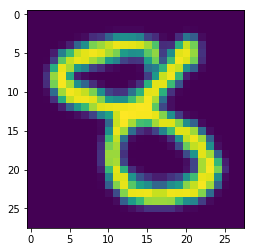

<class 'numpy.ndarray'>
(28, 28)
(28, 28, 3)


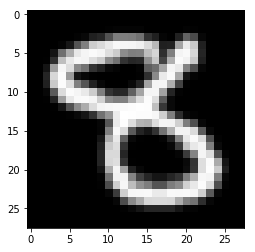

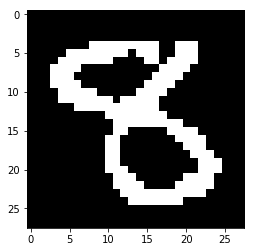

(28, 28, 3)


In [23]:
import os
from skimage.io import imsave
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2
datapath = '../Dataset/DigitMNIST/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        indx+=60
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        img = Image.fromarray(image)
        print(label)
        
        image=np.rot90(image,3)
        image=np.fliplr(image)
        
        plt.imshow(image)
        plt.show()
        print(type(image))
        print(image.shape)
       
        img=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        print(img.shape)
        plt.imshow(img)
        plt.show()
        
        copyImage = np.copy(img)
        copyImage[img > 127] = 255
        copyImage[img <= 127] = 0
        
        plt.imshow(copyImage)
        plt.show()
        print(copyImage.shape)
        break
    break